### Model Training

In [ ]:
import numpy as np
import pickle

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
!pip install Keras-Preprocessing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.1 MB/s eta 0:00:00


In [ ]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

In [ ]:
pip install tensorflow

In [ ]:
import tensorflow as tf

In [ ]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
tf.config.set_soft_device_placement(True)

Num GPUs Available:  1


In [ ]:
train_images = pickle.load(open("full_CNN_train.p", "rb" ))

labels = pickle.load(open("full_CNN_labels.p", "rb" ))

# Make into arrays as the neural network wants these
train_images = np.array(train_images)
labels = np.array(labels)

In [ ]:
# Normalize labels
labels= labels/255

train_images, labels = shuffle(train_images, labels)

X_train, X_val, y_train, y_val = train_test_split(train_images, labels, test_size=0.128)

# Batch size, epochs and pool size below are all paramaters to fiddle with for optimization
batch_size = 128
epochs = 25
pool_size = (2, 2)
input_shape = X_train.shape[1:]

In [ ]:
train_datagen = ImageDataGenerator(channel_shift_range=0.2)
train_datagen.fit(X_train)

In [ ]:
model=tf.keras.models.Sequential([
# Normalizes incoming inputs. First layer needs the input shape to work
tf.keras.layers.BatchNormalization(input_shape=input_shape),
tf.keras.layers.Conv2D(8, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv1'),
tf.keras.layers.Conv2D(16, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv2'),
# Pooling 1
tf.keras.layers.MaxPooling2D(pool_size=pool_size),

tf.keras.layers.Conv2D(16, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv3'),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Conv2D(32, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv4'),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Conv2D(32, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv5'),
tf.keras.layers.Dropout(0.2),
 # Pooling 2
tf.keras.layers.MaxPooling2D(pool_size=pool_size),

tf.keras.layers.Conv2D(64, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv6'),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Conv2D(64, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv7'),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Conv2D(64, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv8'),
# Pooling 3
tf.keras.layers.MaxPooling2D(pool_size=pool_size),
# Upsample 1
tf.keras.layers.UpSampling2D(size=pool_size),
#Deconv
tf.keras.layers.Conv2DTranspose(128, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv1'),
tf.keras.layers.Conv2DTranspose(64, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv2'),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Conv2DTranspose(64, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv3'),
tf.keras.layers.Dropout(0.25),
# Upsample 2
tf.keras.layers.UpSampling2D(size=pool_size),

tf.keras.layers.Conv2DTranspose(32, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv4'),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Conv2DTranspose(32, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv5'),
# Upsample 3
tf.keras.layers.UpSampling2D(size=pool_size),

tf.keras.layers.Conv2DTranspose(32, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv6'),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Conv2DTranspose(16, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv7'),
tf.keras.layers.Dropout(0.25),
tf.keras.layers.Conv2DTranspose(16, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv8'),
tf.keras.layers.Conv2DTranspose(1, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv9Finalone')
])

In [ ]:
# Compiling and training the model
model.compile(optimizer='Adam', loss='mean_squared_error',metrics=['accuracy'])

model.fit(train_datagen.flow(X_train, y_train, batch_size=batch_size),
                steps_per_epoch=len(X_train)/batch_size,
                epochs=epochs, verbose=1, validation_data=(X_val, y_val))

Epoch 1/25
86/86 [==============================] - 64s 453ms/step - loss: 0.0641 - accuracy: 0.8964 - val_loss: 0.0194 - val_accuracy: 0.9490
Epoch 2/25
86/86 [==============================] - 23s 267ms/step - loss: 0.0147 - accuracy: 0.9528 - val_loss: 0.0113 - val_accuracy: 0.9546
Epoch 3/25
86/86 [==============================] - 24s 281ms/step - loss: 0.0105 - accuracy: 0.9559 - val_loss: 0.0090 - val_accuracy: 0.9562
Epoch 4/25
86/86 [==============================] - 25s 284ms/step - loss: 0.0092 - accuracy: 0.9569 - val_loss: 0.0084 - val_accuracy: 0.9568
Epoch 5/25
86/86 [==============================] - 24s 279ms/step - loss: 0.0085 - accuracy: 0.9575 - val_loss: 0.0078 - val_accuracy: 0.9574
Epoch 6/25
86/86 [==============================] - 24s 274ms/step - loss: 0.0081 - accuracy: 0.9578 - val_loss: 0.0074 - val_accuracy: 0.9577
Epoch 7/25
86/86 [==============================] - 24s 279ms/step - loss: 0.0077 - accuracy: 0.9581 - val_loss: 0.0070 - val_accuracy: 0.9578

In [ ]:
model.trainable = False
model.save('./lanemodel.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model.save('./lane_modelpth.pth')

In [ ]:
model.save('./lane_modeltar.tar')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (Batch  (None, 80, 160, 3)        12        
 Normalization)                                                  
                                                                 
 Conv1 (Conv2D)              (None, 78, 158, 8)        224       
                                                                 
 Conv2 (Conv2D)              (None, 76, 156, 16)       1168      
                                                                 
 max_pooling2d (MaxPooling2  (None, 38, 78, 16)        0         
 D)                                                              
                                                                 
 Conv3 (Conv2D)              (None, 36, 76, 16)        2320      
                                                                 
 dropout (Dropout)           (None, 36, 76, 16)        0

### Model Testing

In [ ]:
!pip install scipy

Lane detection from cnn **model**

In [ ]:
import numpy as np
import cv2
from skimage.transform import resize
from moviepy.editor import VideoFileClip

from keras.models import load_model
import matplotlib.pyplot as plt

# Load Keras model
model = load_model('lanemodel.h5')

class Lanes():
    def __init__(self):
        self.recent_fit = []
        self.avg_fit = []

def road_lines(image):
    """ Takes in a road image, re-sizes for the model,
    predicts the lane to be drawn from the model in G color,
    recreates an RGB image of a lane and merges with the
    original road image.
    """
    image_shape = image.shape
    # Get image ready for feeding into model
    small_img = resize(image, (80, 160, 3), preserve_range=True)
    small_img = np.array(small_img)
    small_img = small_img[None, :, :, :]

    # Make prediction with neural network (un-normalize value by multiplying by 255)
    prediction = model.predict(small_img)[0] * 255
    # Add lane prediction to list for averaging
    lanes.recent_fit.append(prediction)

    # Only using last five for average
    if len(lanes.recent_fit) > 5:
        lanes.recent_fit = lanes.recent_fit[1:]

    # Calculate average detection
    lanes.avg_fit = np.mean(np.array([i for i in lanes.recent_fit]), axis=0)

    # Generate fake R & B color dimensions, stack with G
    blanks = np.zeros_like(lanes.avg_fit).astype(np.uint8)

    # for setting different color for the detection (Green color)
    lane_drawn = np.dstack((blanks, lanes.avg_fit, blanks))

    # Re-size to match the original image
    lane_image = resize(lane_drawn, image_shape, preserve_range=True).astype(np.uint8)

    # plt.imshow(lane_image)
    # plt.show()

    # Merge the lane drawing onto the original image
    result = cv2.addWeighted(image, 1, lane_image, 1, 0)

    return result

lanes = Lanes()

# Where to save the output video
vid_output = 'lane_output_model.mp4'

clip1 = VideoFileClip("test_3.mp4")

vid_clip = clip1.fl_image(road_lines)
vid_clip.write_videofile(vid_output, audio=False)


1/1 [==============================] - 1s 879ms/step
Moviepy - Building video lane_output.mp4.
Moviepy - Writing video lane_output.mp4



t:   0%|          | 0/1735 [00:00<?, ?it/s, now=None]

1/1 [==============================] - 0s 83ms/step


t:   0%|          | 2/1735 [00:00<11:54,  2.42it/s, now=None]

1/1 [==============================] - 0s 66ms/step


t:   0%|          | 3/1735 [00:01<16:08,  1.79it/s, now=None]

1/1 [==============================] - 0s 84ms/step


t:   0%|          | 4/1735 [00:02<19:07,  1.51it/s, now=None]

1/1 [==============================] - 0s 68ms/step


t:   0%|          | 5/1735 [00:03<20:10,  1.43it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:   0%|          | 6/1735 [00:03<18:07,  1.59it/s, now=None]

1/1 [==============================] - 0s 45ms/step


t:   0%|          | 7/1735 [00:04<16:31,  1.74it/s, now=None]

1/1 [==============================] - 0s 55ms/step


t:   0%|          | 8/1735 [00:04<15:31,  1.85it/s, now=None]

1/1 [==============================] - 0s 48ms/step


t:   1%|          | 9/1735 [00:05<14:47,  1.94it/s, now=None]

1/1 [==============================] - 0s 44ms/step


t:   1%|          | 10/1735 [00:05<14:18,  2.01it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:   1%|          | 11/1735 [00:05<13:55,  2.06it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:   1%|          | 12/1735 [00:06<13:46,  2.08it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:   1%|          | 13/1735 [00:06<13:29,  2.13it/s, now=None]

1/1 [==============================] - 0s 45ms/step


t:   1%|          | 14/1735 [00:07<13:27,  2.13it/s, now=None]

1/1 [==============================] - 0s 40ms/step


t:   1%|          | 15/1735 [00:07<13:11,  2.17it/s, now=None]

1/1 [==============================] - 0s 48ms/step


t:   1%|          | 16/1735 [00:08<13:16,  2.16it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:   1%|          | 17/1735 [00:08<13:15,  2.16it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:   1%|          | 18/1735 [00:09<13:10,  2.17it/s, now=None]

1/1 [==============================] - 0s 49ms/step


t:   1%|          | 19/1735 [00:09<13:15,  2.16it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:   1%|          | 20/1735 [00:10<13:06,  2.18it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:   1%|          | 21/1735 [00:10<13:10,  2.17it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:   1%|▏         | 22/1735 [00:11<13:04,  2.18it/s, now=None]

1/1 [==============================] - 0s 51ms/step


t:   1%|▏         | 23/1735 [00:11<13:08,  2.17it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:   1%|▏         | 24/1735 [00:11<13:04,  2.18it/s, now=None]

1/1 [==============================] - 0s 43ms/step


t:   1%|▏         | 25/1735 [00:12<13:14,  2.15it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:   1%|▏         | 26/1735 [00:12<13:10,  2.16it/s, now=None]

1/1 [==============================] - 0s 45ms/step


t:   2%|▏         | 27/1735 [00:13<13:22,  2.13it/s, now=None]

1/1 [==============================] - 0s 67ms/step


t:   2%|▏         | 28/1735 [00:14<15:41,  1.81it/s, now=None]

1/1 [==============================] - 0s 76ms/step


t:   2%|▏         | 29/1735 [00:14<17:36,  1.61it/s, now=None]

1/1 [==============================] - 0s 68ms/step


t:   2%|▏         | 30/1735 [00:15<18:36,  1.53it/s, now=None]

1/1 [==============================] - 0s 80ms/step


t:   2%|▏         | 31/1735 [00:16<19:39,  1.44it/s, now=None]

1/1 [==============================] - 0s 68ms/step


t:   2%|▏         | 32/1735 [00:17<20:39,  1.37it/s, now=None]

1/1 [==============================] - 0s 84ms/step


t:   2%|▏         | 33/1735 [00:18<21:25,  1.32it/s, now=None]

1/1 [==============================] - 0s 76ms/step


t:   2%|▏         | 34/1735 [00:18<21:33,  1.32it/s, now=None]

1/1 [==============================] - 0s 81ms/step


t:   2%|▏         | 35/1735 [00:19<21:42,  1.30it/s, now=None]

1/1 [==============================] - 0s 67ms/step


t:   2%|▏         | 36/1735 [00:20<20:52,  1.36it/s, now=None]

1/1 [==============================] - 0s 43ms/step


t:   2%|▏         | 37/1735 [00:20<18:32,  1.53it/s, now=None]

1/1 [==============================] - 0s 45ms/step


t:   2%|▏         | 38/1735 [00:21<16:49,  1.68it/s, now=None]

1/1 [==============================] - 0s 50ms/step


t:   2%|▏         | 39/1735 [00:21<15:37,  1.81it/s, now=None]

1/1 [==============================] - 0s 45ms/step


t:   2%|▏         | 40/1735 [00:22<14:52,  1.90it/s, now=None]

1/1 [==============================] - 0s 40ms/step


t:   2%|▏         | 41/1735 [00:22<14:15,  1.98it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:   2%|▏         | 42/1735 [00:23<13:57,  2.02it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:   2%|▏         | 43/1735 [00:23<13:37,  2.07it/s, now=None]

1/1 [==============================] - 0s 53ms/step


t:   3%|▎         | 44/1735 [00:23<13:48,  2.04it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:   3%|▎         | 45/1735 [00:24<13:28,  2.09it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:   3%|▎         | 46/1735 [00:24<13:26,  2.09it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:   3%|▎         | 47/1735 [00:25<13:17,  2.12it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:   3%|▎         | 48/1735 [00:25<13:28,  2.09it/s, now=None]

1/1 [==============================] - 0s 49ms/step


t:   3%|▎         | 49/1735 [00:26<13:30,  2.08it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:   3%|▎         | 50/1735 [00:26<13:20,  2.11it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:   3%|▎         | 51/1735 [00:27<13:27,  2.09it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:   3%|▎         | 52/1735 [00:27<13:16,  2.11it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:   3%|▎         | 53/1735 [00:28<13:26,  2.09it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:   3%|▎         | 54/1735 [00:28<13:18,  2.11it/s, now=None]

1/1 [==============================] - 0s 45ms/step


t:   3%|▎         | 55/1735 [00:29<13:17,  2.11it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:   3%|▎         | 56/1735 [00:29<13:11,  2.12it/s, now=None]

1/1 [==============================] - 0s 50ms/step


t:   3%|▎         | 57/1735 [00:30<13:28,  2.08it/s, now=None]

1/1 [==============================] - 0s 73ms/step


t:   3%|▎         | 58/1735 [00:30<15:45,  1.77it/s, now=None]

1/1 [==============================] - 0s 68ms/step


t:   3%|▎         | 59/1735 [00:31<17:31,  1.59it/s, now=None]

1/1 [==============================] - 0s 98ms/step


t:   3%|▎         | 60/1735 [00:32<18:49,  1.48it/s, now=None]

1/1 [==============================] - 0s 68ms/step


t:   4%|▎         | 61/1735 [00:33<19:56,  1.40it/s, now=None]

1/1 [==============================] - 0s 76ms/step


t:   4%|▎         | 62/1735 [00:34<20:25,  1.36it/s, now=None]

1/1 [==============================] - 0s 85ms/step


t:   4%|▎         | 63/1735 [00:34<21:28,  1.30it/s, now=None]

1/1 [==============================] - 0s 58ms/step


t:   4%|▎         | 64/1735 [00:35<19:05,  1.46it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:   4%|▎         | 65/1735 [00:35<17:21,  1.60it/s, now=None]

1/1 [==============================] - 0s 44ms/step


t:   4%|▍         | 66/1735 [00:36<16:09,  1.72it/s, now=None]

1/1 [==============================] - 0s 40ms/step


t:   4%|▍         | 67/1735 [00:36<15:07,  1.84it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:   4%|▍         | 68/1735 [00:37<14:43,  1.89it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:   4%|▍         | 69/1735 [00:37<14:17,  1.94it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:   4%|▍         | 70/1735 [00:38<14:01,  1.98it/s, now=None]

1/1 [==============================] - 0s 44ms/step


t:   4%|▍         | 71/1735 [00:38<13:39,  2.03it/s, now=None]

1/1 [==============================] - 0s 48ms/step


t:   4%|▍         | 72/1735 [00:39<13:28,  2.06it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:   4%|▍         | 73/1735 [00:39<13:32,  2.04it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:   4%|▍         | 74/1735 [00:40<13:21,  2.07it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:   4%|▍         | 75/1735 [00:40<13:15,  2.09it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:   4%|▍         | 76/1735 [00:41<13:06,  2.11it/s, now=None]

1/1 [==============================] - 0s 51ms/step


t:   4%|▍         | 77/1735 [00:41<13:17,  2.08it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:   4%|▍         | 78/1735 [00:42<13:11,  2.09it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:   5%|▍         | 79/1735 [00:42<13:12,  2.09it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:   5%|▍         | 80/1735 [00:43<13:02,  2.12it/s, now=None]

1/1 [==============================] - 0s 45ms/step


t:   5%|▍         | 81/1735 [00:43<13:12,  2.09it/s, now=None]

1/1 [==============================] - 0s 49ms/step


t:   5%|▍         | 82/1735 [00:43<13:12,  2.09it/s, now=None]

1/1 [==============================] - 0s 50ms/step


t:   5%|▍         | 83/1735 [00:44<13:12,  2.08it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:   5%|▍         | 84/1735 [00:44<13:06,  2.10it/s, now=None]

1/1 [==============================] - 0s 80ms/step


t:   5%|▍         | 85/1735 [00:45<15:36,  1.76it/s, now=None]

1/1 [==============================] - 0s 63ms/step


t:   5%|▍         | 86/1735 [00:46<17:17,  1.59it/s, now=None]

1/1 [==============================] - 0s 80ms/step


t:   5%|▌         | 87/1735 [00:47<18:17,  1.50it/s, now=None]

1/1 [==============================] - 0s 74ms/step


t:   5%|▌         | 88/1735 [00:48<19:16,  1.42it/s, now=None]

1/1 [==============================] - 0s 77ms/step


t:   5%|▌         | 89/1735 [00:48<20:13,  1.36it/s, now=None]

1/1 [==============================] - 0s 120ms/step


t:   5%|▌         | 90/1735 [00:49<21:06,  1.30it/s, now=None]

1/1 [==============================] - 0s 82ms/step


t:   5%|▌         | 91/1735 [00:50<20:04,  1.36it/s, now=None]

1/1 [==============================] - 0s 48ms/step


t:   5%|▌         | 92/1735 [00:50<18:02,  1.52it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:   5%|▌         | 93/1735 [00:51<17:10,  1.59it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:   5%|▌         | 94/1735 [00:51<16:08,  1.69it/s, now=None]

1/1 [==============================] - 0s 44ms/step


t:   5%|▌         | 95/1735 [00:52<15:24,  1.77it/s, now=None]

1/1 [==============================] - 0s 45ms/step


t:   6%|▌         | 96/1735 [00:52<14:53,  1.84it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:   6%|▌         | 97/1735 [00:53<14:45,  1.85it/s, now=None]

1/1 [==============================] - 0s 45ms/step


t:   6%|▌         | 98/1735 [00:53<14:26,  1.89it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:   6%|▌         | 99/1735 [00:54<14:03,  1.94it/s, now=None]

1/1 [==============================] - 0s 43ms/step


t:   6%|▌         | 100/1735 [00:54<13:53,  1.96it/s, now=None]

1/1 [==============================] - 0s 48ms/step


t:   6%|▌         | 101/1735 [00:55<14:04,  1.94it/s, now=None]

1/1 [==============================] - 0s 45ms/step


t:   6%|▌         | 102/1735 [00:55<13:59,  1.95it/s, now=None]

1/1 [==============================] - 0s 44ms/step


t:   6%|▌         | 103/1735 [00:56<13:42,  1.98it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:   6%|▌         | 104/1735 [00:56<13:36,  2.00it/s, now=None]

1/1 [==============================] - 0s 49ms/step


t:   6%|▌         | 105/1735 [00:57<13:55,  1.95it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:   6%|▌         | 106/1735 [00:57<13:51,  1.96it/s, now=None]

1/1 [==============================] - 0s 50ms/step


t:   6%|▌         | 107/1735 [00:58<13:35,  2.00it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:   6%|▌         | 108/1735 [00:58<13:28,  2.01it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:   6%|▋         | 109/1735 [00:59<13:51,  1.95it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:   6%|▋         | 110/1735 [00:59<13:47,  1.96it/s, now=None]

1/1 [==============================] - 0s 78ms/step


t:   6%|▋         | 111/1735 [01:00<15:30,  1.75it/s, now=None]

1/1 [==============================] - 0s 82ms/step


t:   6%|▋         | 112/1735 [01:01<17:35,  1.54it/s, now=None]

1/1 [==============================] - 0s 138ms/step


t:   7%|▋         | 113/1735 [01:02<19:20,  1.40it/s, now=None]

1/1 [==============================] - 0s 107ms/step


t:   7%|▋         | 114/1735 [01:03<20:06,  1.34it/s, now=None]

1/1 [==============================] - 0s 89ms/step


t:   7%|▋         | 115/1735 [01:03<20:22,  1.33it/s, now=None]

1/1 [==============================] - 0s 149ms/step


t:   7%|▋         | 116/1735 [01:05<23:47,  1.13it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:   7%|▋         | 117/1735 [01:05<22:44,  1.19it/s, now=None]

1/1 [==============================] - 0s 50ms/step


t:   7%|▋         | 118/1735 [01:06<19:57,  1.35it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:   7%|▋         | 119/1735 [01:06<17:51,  1.51it/s, now=None]

1/1 [==============================] - 0s 49ms/step


t:   7%|▋         | 120/1735 [01:07<16:55,  1.59it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:   7%|▋         | 121/1735 [01:07<15:48,  1.70it/s, now=None]

1/1 [==============================] - 0s 51ms/step


t:   7%|▋         | 122/1735 [01:08<15:07,  1.78it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:   7%|▋         | 123/1735 [01:08<14:37,  1.84it/s, now=None]

1/1 [==============================] - 0s 60ms/step


t:   7%|▋         | 124/1735 [01:09<14:32,  1.85it/s, now=None]

1/1 [==============================] - 0s 50ms/step


t:   7%|▋         | 125/1735 [01:09<14:09,  1.90it/s, now=None]

1/1 [==============================] - 0s 52ms/step


t:   7%|▋         | 126/1735 [01:10<13:52,  1.93it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:   7%|▋         | 127/1735 [01:11<14:05,  1.90it/s, now=None]

1/1 [==============================] - 0s 43ms/step


t:   7%|▋         | 128/1735 [01:11<13:55,  1.92it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:   7%|▋         | 129/1735 [01:12<13:37,  1.96it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:   7%|▋         | 130/1735 [01:12<13:40,  1.96it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:   8%|▊         | 131/1735 [01:13<13:45,  1.94it/s, now=None]

1/1 [==============================] - 0s 49ms/step


t:   8%|▊         | 132/1735 [01:13<13:39,  1.96it/s, now=None]

1/1 [==============================] - 0s 45ms/step


t:   8%|▊         | 133/1735 [01:14<13:38,  1.96it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:   8%|▊         | 134/1735 [01:14<13:50,  1.93it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:   8%|▊         | 135/1735 [01:15<13:36,  1.96it/s, now=None]

1/1 [==============================] - 0s 50ms/step


t:   8%|▊         | 136/1735 [01:15<13:37,  1.95it/s, now=None]

1/1 [==============================] - 0s 132ms/step


t:   8%|▊         | 137/1735 [01:16<16:34,  1.61it/s, now=None]

1/1 [==============================] - 0s 118ms/step


t:   8%|▊         | 138/1735 [01:17<18:17,  1.45it/s, now=None]

1/1 [==============================] - 0s 70ms/step


t:   8%|▊         | 139/1735 [01:18<19:05,  1.39it/s, now=None]

1/1 [==============================] - 0s 81ms/step


t:   8%|▊         | 140/1735 [01:18<19:49,  1.34it/s, now=None]

1/1 [==============================] - 0s 110ms/step


t:   8%|▊         | 141/1735 [01:19<21:15,  1.25it/s, now=None]

1/1 [==============================] - 0s 129ms/step


t:   8%|▊         | 142/1735 [01:20<21:39,  1.23it/s, now=None]

1/1 [==============================] - 0s 96ms/step


t:   8%|▊         | 143/1735 [01:21<21:15,  1.25it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:   8%|▊         | 144/1735 [01:21<18:43,  1.42it/s, now=None]

1/1 [==============================] - 0s 45ms/step


t:   8%|▊         | 145/1735 [01:22<17:19,  1.53it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:   8%|▊         | 146/1735 [01:22<16:00,  1.65it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:   8%|▊         | 147/1735 [01:23<15:45,  1.68it/s, now=None]

1/1 [==============================] - 0s 49ms/step


t:   9%|▊         | 148/1735 [01:24<15:04,  1.75it/s, now=None]

1/1 [==============================] - 0s 45ms/step


t:   9%|▊         | 149/1735 [01:24<14:27,  1.83it/s, now=None]

1/1 [==============================] - 0s 44ms/step


t:   9%|▊         | 150/1735 [01:25<14:00,  1.89it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:   9%|▊         | 151/1735 [01:25<14:54,  1.77it/s, now=None]

1/1 [==============================] - 0s 48ms/step


t:   9%|▉         | 152/1735 [01:26<16:22,  1.61it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:   9%|▉         | 153/1735 [01:26<15:18,  1.72it/s, now=None]

1/1 [==============================] - 0s 50ms/step


t:   9%|▉         | 154/1735 [01:27<14:40,  1.80it/s, now=None]

1/1 [==============================] - 0s 45ms/step


t:   9%|▉         | 155/1735 [01:27<14:31,  1.81it/s, now=None]

1/1 [==============================] - 0s 44ms/step


t:   9%|▉         | 156/1735 [01:28<14:13,  1.85it/s, now=None]

1/1 [==============================] - 0s 49ms/step


t:   9%|▉         | 157/1735 [01:28<13:54,  1.89it/s, now=None]

1/1 [==============================] - 0s 48ms/step


t:   9%|▉         | 158/1735 [01:29<13:42,  1.92it/s, now=None]

1/1 [==============================] - 0s 50ms/step


t:   9%|▉         | 159/1735 [01:30<13:57,  1.88it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:   9%|▉         | 160/1735 [01:30<13:48,  1.90it/s, now=None]

1/1 [==============================] - 0s 44ms/step


t:   9%|▉         | 161/1735 [01:31<13:30,  1.94it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:   9%|▉         | 162/1735 [01:31<14:40,  1.79it/s, now=None]

1/1 [==============================] - 0s 86ms/step


t:   9%|▉         | 163/1735 [01:32<17:18,  1.51it/s, now=None]

1/1 [==============================] - 0s 80ms/step


t:   9%|▉         | 164/1735 [01:33<18:36,  1.41it/s, now=None]

1/1 [==============================] - 0s 78ms/step


t:  10%|▉         | 165/1735 [01:34<19:01,  1.37it/s, now=None]

1/1 [==============================] - 0s 64ms/step


t:  10%|▉         | 166/1735 [01:34<19:30,  1.34it/s, now=None]

1/1 [==============================] - 0s 119ms/step


t:  10%|▉         | 167/1735 [01:35<20:47,  1.26it/s, now=None]

1/1 [==============================] - 0s 85ms/step


t:  10%|▉         | 168/1735 [01:36<21:09,  1.23it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  10%|▉         | 169/1735 [01:37<19:52,  1.31it/s, now=None]

1/1 [==============================] - 0s 43ms/step


t:  10%|▉         | 170/1735 [01:37<17:46,  1.47it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  10%|▉         | 171/1735 [01:38<16:44,  1.56it/s, now=None]

1/1 [==============================] - 0s 45ms/step


t:  10%|▉         | 172/1735 [01:38<15:49,  1.65it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  10%|▉         | 173/1735 [01:39<14:54,  1.75it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  10%|█         | 174/1735 [01:39<14:26,  1.80it/s, now=None]

1/1 [==============================] - 0s 40ms/step


t:  10%|█         | 175/1735 [01:40<14:21,  1.81it/s, now=None]

1/1 [==============================] - 0s 49ms/step


t:  10%|█         | 176/1735 [01:41<14:03,  1.85it/s, now=None]

1/1 [==============================] - 0s 40ms/step


t:  10%|█         | 177/1735 [01:41<13:39,  1.90it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  10%|█         | 178/1735 [01:42<13:29,  1.92it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  10%|█         | 179/1735 [01:42<13:38,  1.90it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  10%|█         | 180/1735 [01:43<13:30,  1.92it/s, now=None]

1/1 [==============================] - 0s 48ms/step


t:  10%|█         | 181/1735 [01:43<13:27,  1.92it/s, now=None]

1/1 [==============================] - 0s 44ms/step


t:  10%|█         | 182/1735 [01:44<13:18,  1.94it/s, now=None]

1/1 [==============================] - 0s 45ms/step


t:  11%|█         | 183/1735 [01:44<13:18,  1.94it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  11%|█         | 184/1735 [01:45<13:12,  1.96it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  11%|█         | 185/1735 [01:45<13:31,  1.91it/s, now=None]

1/1 [==============================] - 0s 44ms/step


t:  11%|█         | 186/1735 [01:46<13:30,  1.91it/s, now=None]

1/1 [==============================] - 0s 48ms/step


t:  11%|█         | 187/1735 [01:46<13:26,  1.92it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  11%|█         | 188/1735 [01:47<13:48,  1.87it/s, now=None]

1/1 [==============================] - 0s 96ms/step


t:  11%|█         | 189/1735 [01:48<16:02,  1.61it/s, now=None]

1/1 [==============================] - 0s 76ms/step


t:  11%|█         | 190/1735 [01:48<17:29,  1.47it/s, now=None]

1/1 [==============================] - 0s 98ms/step


t:  11%|█         | 191/1735 [01:49<18:58,  1.36it/s, now=None]

1/1 [==============================] - 0s 99ms/step


t:  11%|█         | 192/1735 [01:50<19:35,  1.31it/s, now=None]

1/1 [==============================] - 0s 82ms/step


t:  11%|█         | 193/1735 [01:51<20:33,  1.25it/s, now=None]

1/1 [==============================] - 0s 84ms/step


t:  11%|█         | 194/1735 [01:52<20:38,  1.24it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  11%|█         | 195/1735 [01:52<18:28,  1.39it/s, now=None]

1/1 [==============================] - 0s 48ms/step


t:  11%|█▏        | 196/1735 [01:53<16:51,  1.52it/s, now=None]

1/1 [==============================] - 0s 44ms/step


t:  11%|█▏        | 197/1735 [01:53<15:35,  1.64it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  11%|█▏        | 198/1735 [01:54<14:55,  1.72it/s, now=None]

1/1 [==============================] - 0s 45ms/step


t:  11%|█▏        | 199/1735 [01:54<14:31,  1.76it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  12%|█▏        | 200/1735 [01:55<13:58,  1.83it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  12%|█▏        | 201/1735 [01:55<13:26,  1.90it/s, now=None]

1/1 [==============================] - 0s 48ms/step


t:  12%|█▏        | 202/1735 [01:56<13:23,  1.91it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  12%|█▏        | 203/1735 [01:56<13:29,  1.89it/s, now=None]

1/1 [==============================] - 0s 51ms/step


t:  12%|█▏        | 204/1735 [01:57<13:21,  1.91it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  12%|█▏        | 205/1735 [01:57<13:05,  1.95it/s, now=None]

1/1 [==============================] - 0s 50ms/step


t:  12%|█▏        | 206/1735 [01:58<12:59,  1.96it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  12%|█▏        | 207/1735 [01:58<13:17,  1.92it/s, now=None]

1/1 [==============================] - 0s 50ms/step


t:  12%|█▏        | 208/1735 [01:59<13:15,  1.92it/s, now=None]

1/1 [==============================] - 0s 60ms/step


t:  12%|█▏        | 209/1735 [02:00<13:16,  1.92it/s, now=None]

1/1 [==============================] - 0s 43ms/step


t:  12%|█▏        | 210/1735 [02:00<13:09,  1.93it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  12%|█▏        | 211/1735 [02:01<13:20,  1.90it/s, now=None]

1/1 [==============================] - 0s 53ms/step


t:  12%|█▏        | 212/1735 [02:01<13:17,  1.91it/s, now=None]

1/1 [==============================] - 0s 44ms/step


t:  12%|█▏        | 213/1735 [02:02<13:01,  1.95it/s, now=None]

1/1 [==============================] - 0s 85ms/step


t:  12%|█▏        | 214/1735 [02:02<14:36,  1.73it/s, now=None]

1/1 [==============================] - 0s 97ms/step


t:  12%|█▏        | 215/1735 [02:03<16:29,  1.54it/s, now=None]

1/1 [==============================] - 0s 98ms/step


t:  12%|█▏        | 216/1735 [02:04<17:45,  1.43it/s, now=None]

1/1 [==============================] - 0s 77ms/step


t:  13%|█▎        | 217/1735 [02:05<18:33,  1.36it/s, now=None]

1/1 [==============================] - 0s 83ms/step


t:  13%|█▎        | 218/1735 [02:06<19:10,  1.32it/s, now=None]

1/1 [==============================] - 0s 119ms/step


t:  13%|█▎        | 219/1735 [02:06<20:13,  1.25it/s, now=None]

1/1 [==============================] - 0s 92ms/step


t:  13%|█▎        | 220/1735 [02:07<20:51,  1.21it/s, now=None]

1/1 [==============================] - 0s 45ms/step


t:  13%|█▎        | 221/1735 [02:08<19:08,  1.32it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  13%|█▎        | 222/1735 [02:08<17:19,  1.46it/s, now=None]

1/1 [==============================] - 0s 49ms/step


t:  13%|█▎        | 223/1735 [02:09<16:00,  1.57it/s, now=None]

1/1 [==============================] - 0s 48ms/step


t:  13%|█▎        | 224/1735 [02:09<15:01,  1.68it/s, now=None]

1/1 [==============================] - 0s 49ms/step


t:  13%|█▎        | 225/1735 [02:10<14:15,  1.77it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  13%|█▎        | 226/1735 [02:11<13:56,  1.80it/s, now=None]

1/1 [==============================] - 0s 49ms/step


t:  13%|█▎        | 227/1735 [02:11<13:29,  1.86it/s, now=None]

1/1 [==============================] - 0s 56ms/step


t:  13%|█▎        | 228/1735 [02:12<13:15,  1.89it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  13%|█▎        | 229/1735 [02:12<13:24,  1.87it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  13%|█▎        | 230/1735 [02:13<13:18,  1.88it/s, now=None]

1/1 [==============================] - 0s 45ms/step


t:  13%|█▎        | 231/1735 [02:13<12:56,  1.94it/s, now=None]

1/1 [==============================] - 0s 62ms/step


t:  13%|█▎        | 232/1735 [02:14<12:49,  1.95it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  13%|█▎        | 233/1735 [02:14<13:10,  1.90it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  13%|█▎        | 234/1735 [02:15<13:06,  1.91it/s, now=None]

1/1 [==============================] - 0s 43ms/step


t:  14%|█▎        | 235/1735 [02:15<12:47,  1.95it/s, now=None]

1/1 [==============================] - 0s 59ms/step


t:  14%|█▎        | 236/1735 [02:16<12:45,  1.96it/s, now=None]

1/1 [==============================] - 0s 40ms/step


t:  14%|█▎        | 237/1735 [02:16<13:00,  1.92it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  14%|█▎        | 238/1735 [02:17<13:04,  1.91it/s, now=None]

1/1 [==============================] - 0s 45ms/step


t:  14%|█▍        | 239/1735 [02:17<12:50,  1.94it/s, now=None]

1/1 [==============================] - 0s 54ms/step


t:  14%|█▍        | 240/1735 [02:18<13:17,  1.87it/s, now=None]

1/1 [==============================] - 0s 77ms/step


t:  14%|█▍        | 241/1735 [02:19<15:16,  1.63it/s, now=None]

1/1 [==============================] - 0s 88ms/step


t:  14%|█▍        | 242/1735 [02:19<17:02,  1.46it/s, now=None]

1/1 [==============================] - 0s 89ms/step


t:  14%|█▍        | 243/1735 [02:20<18:06,  1.37it/s, now=None]

1/1 [==============================] - 0s 72ms/step


t:  14%|█▍        | 244/1735 [02:21<18:36,  1.34it/s, now=None]

1/1 [==============================] - 0s 75ms/step


t:  14%|█▍        | 245/1735 [02:22<18:56,  1.31it/s, now=None]

1/1 [==============================] - 0s 89ms/step


t:  14%|█▍        | 246/1735 [02:23<20:12,  1.23it/s, now=None]

1/1 [==============================] - 0s 83ms/step


t:  14%|█▍        | 247/1735 [02:24<20:20,  1.22it/s, now=None]

1/1 [==============================] - 0s 44ms/step


t:  14%|█▍        | 248/1735 [02:24<17:58,  1.38it/s, now=None]

1/1 [==============================] - 0s 50ms/step


t:  14%|█▍        | 249/1735 [02:25<16:25,  1.51it/s, now=None]

1/1 [==============================] - 0s 48ms/step


t:  14%|█▍        | 250/1735 [02:25<15:23,  1.61it/s, now=None]

1/1 [==============================] - 0s 48ms/step


t:  14%|█▍        | 251/1735 [02:26<14:43,  1.68it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  15%|█▍        | 252/1735 [02:26<14:02,  1.76it/s, now=None]

1/1 [==============================] - 0s 50ms/step


t:  15%|█▍        | 253/1735 [02:27<13:35,  1.82it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  15%|█▍        | 254/1735 [02:27<13:13,  1.87it/s, now=None]

1/1 [==============================] - 0s 48ms/step


t:  15%|█▍        | 255/1735 [02:28<13:06,  1.88it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  15%|█▍        | 256/1735 [02:28<12:57,  1.90it/s, now=None]

1/1 [==============================] - 0s 45ms/step


t:  15%|█▍        | 257/1735 [02:29<12:41,  1.94it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  15%|█▍        | 258/1735 [02:29<12:46,  1.93it/s, now=None]

1/1 [==============================] - 0s 45ms/step


t:  15%|█▍        | 259/1735 [02:30<12:55,  1.90it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  15%|█▍        | 260/1735 [02:30<12:43,  1.93it/s, now=None]

1/1 [==============================] - 0s 48ms/step


t:  15%|█▌        | 261/1735 [02:31<12:33,  1.96it/s, now=None]

1/1 [==============================] - 0s 40ms/step


t:  15%|█▌        | 262/1735 [02:31<12:38,  1.94it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  15%|█▌        | 263/1735 [02:32<12:40,  1.94it/s, now=None]

1/1 [==============================] - 0s 48ms/step


t:  15%|█▌        | 264/1735 [02:32<12:36,  1.94it/s, now=None]

1/1 [==============================] - 0s 45ms/step


t:  15%|█▌        | 265/1735 [02:33<12:26,  1.97it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  15%|█▌        | 266/1735 [02:33<12:39,  1.93it/s, now=None]

1/1 [==============================] - 0s 106ms/step


t:  15%|█▌        | 267/1735 [02:34<14:59,  1.63it/s, now=None]

1/1 [==============================] - 0s 86ms/step


t:  15%|█▌        | 268/1735 [02:35<16:36,  1.47it/s, now=None]

1/1 [==============================] - 0s 79ms/step


t:  16%|█▌        | 269/1735 [02:36<17:37,  1.39it/s, now=None]

1/1 [==============================] - 0s 79ms/step


t:  16%|█▌        | 270/1735 [02:37<18:17,  1.33it/s, now=None]

1/1 [==============================] - 0s 93ms/step


t:  16%|█▌        | 271/1735 [02:38<19:10,  1.27it/s, now=None]

1/1 [==============================] - 0s 117ms/step


t:  16%|█▌        | 272/1735 [02:38<19:54,  1.22it/s, now=None]

1/1 [==============================] - 0s 45ms/step


t:  16%|█▌        | 273/1735 [02:39<17:40,  1.38it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  16%|█▌        | 274/1735 [02:39<16:00,  1.52it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  16%|█▌        | 275/1735 [02:40<15:14,  1.60it/s, now=None]

1/1 [==============================] - 0s 44ms/step


t:  16%|█▌        | 276/1735 [02:41<14:29,  1.68it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  16%|█▌        | 277/1735 [02:41<13:45,  1.77it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  16%|█▌        | 278/1735 [02:42<13:15,  1.83it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  16%|█▌        | 279/1735 [02:42<13:21,  1.82it/s, now=None]

1/1 [==============================] - 0s 49ms/step


t:  16%|█▌        | 280/1735 [02:43<13:05,  1.85it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  16%|█▌        | 281/1735 [02:43<12:42,  1.91it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  16%|█▋        | 282/1735 [02:44<12:39,  1.91it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  16%|█▋        | 283/1735 [02:44<12:49,  1.89it/s, now=None]

1/1 [==============================] - 0s 43ms/step


t:  16%|█▋        | 284/1735 [02:45<12:44,  1.90it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  16%|█▋        | 285/1735 [02:45<12:30,  1.93it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  16%|█▋        | 286/1735 [02:46<12:24,  1.95it/s, now=None]

1/1 [==============================] - 0s 40ms/step


t:  17%|█▋        | 287/1735 [02:46<12:37,  1.91it/s, now=None]

1/1 [==============================] - 0s 44ms/step


t:  17%|█▋        | 288/1735 [02:47<12:38,  1.91it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  17%|█▋        | 289/1735 [02:47<12:23,  1.95it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  17%|█▋        | 290/1735 [02:48<12:23,  1.94it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  17%|█▋        | 291/1735 [02:48<12:17,  1.96it/s, now=None]

1/1 [==============================] - 0s 76ms/step


t:  17%|█▋        | 292/1735 [02:49<13:37,  1.77it/s, now=None]

1/1 [==============================] - 0s 97ms/step


t:  17%|█▋        | 293/1735 [02:50<15:51,  1.52it/s, now=None]

1/1 [==============================] - 0s 142ms/step


t:  17%|█▋        | 294/1735 [02:51<17:50,  1.35it/s, now=None]

1/1 [==============================] - 0s 76ms/step


t:  17%|█▋        | 295/1735 [02:52<18:22,  1.31it/s, now=None]

1/1 [==============================] - 0s 67ms/step


t:  17%|█▋        | 296/1735 [02:52<18:43,  1.28it/s, now=None]

1/1 [==============================] - 0s 123ms/step


t:  17%|█▋        | 297/1735 [02:53<19:13,  1.25it/s, now=None]

1/1 [==============================] - 0s 94ms/step


t:  17%|█▋        | 298/1735 [02:54<19:30,  1.23it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  17%|█▋        | 299/1735 [02:55<17:56,  1.33it/s, now=None]

1/1 [==============================] - 0s 53ms/step


t:  17%|█▋        | 300/1735 [02:55<16:10,  1.48it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  17%|█▋        | 301/1735 [02:56<15:04,  1.58it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  17%|█▋        | 302/1735 [02:56<14:27,  1.65it/s, now=None]

1/1 [==============================] - 0s 45ms/step


t:  17%|█▋        | 303/1735 [02:57<13:46,  1.73it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  18%|█▊        | 304/1735 [02:57<13:13,  1.80it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  18%|█▊        | 305/1735 [02:58<13:23,  1.78it/s, now=None]

1/1 [==============================] - 0s 48ms/step


t:  18%|█▊        | 306/1735 [02:58<13:04,  1.82it/s, now=None]

1/1 [==============================] - 0s 44ms/step


t:  18%|█▊        | 307/1735 [02:59<12:47,  1.86it/s, now=None]

1/1 [==============================] - 0s 50ms/step


t:  18%|█▊        | 308/1735 [02:59<12:42,  1.87it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  18%|█▊        | 309/1735 [03:00<12:55,  1.84it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  18%|█▊        | 310/1735 [03:01<12:46,  1.86it/s, now=None]

1/1 [==============================] - 0s 40ms/step


t:  18%|█▊        | 311/1735 [03:01<12:24,  1.91it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  18%|█▊        | 312/1735 [03:02<12:18,  1.93it/s, now=None]

1/1 [==============================] - 0s 40ms/step


t:  18%|█▊        | 313/1735 [03:02<12:40,  1.87it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  18%|█▊        | 314/1735 [03:03<12:38,  1.87it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  18%|█▊        | 315/1735 [03:03<12:20,  1.92it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  18%|█▊        | 316/1735 [03:04<12:18,  1.92it/s, now=None]

1/1 [==============================] - 0s 45ms/step


t:  18%|█▊        | 317/1735 [03:04<12:27,  1.90it/s, now=None]

1/1 [==============================] - 0s 81ms/step


t:  18%|█▊        | 318/1735 [03:05<14:10,  1.67it/s, now=None]

1/1 [==============================] - 0s 111ms/step


t:  18%|█▊        | 319/1735 [03:06<15:45,  1.50it/s, now=None]

1/1 [==============================] - 0s 117ms/step


t:  18%|█▊        | 320/1735 [03:07<16:47,  1.41it/s, now=None]

1/1 [==============================] - 0s 83ms/step


t:  19%|█▊        | 321/1735 [03:08<18:02,  1.31it/s, now=None]

1/1 [==============================] - 0s 84ms/step


t:  19%|█▊        | 322/1735 [03:08<18:18,  1.29it/s, now=None]

1/1 [==============================] - 0s 86ms/step


t:  19%|█▊        | 323/1735 [03:09<18:47,  1.25it/s, now=None]

1/1 [==============================] - 0s 116ms/step


t:  19%|█▊        | 324/1735 [03:10<18:52,  1.25it/s, now=None]

1/1 [==============================] - 0s 49ms/step


t:  19%|█▊        | 325/1735 [03:10<16:55,  1.39it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  19%|█▉        | 326/1735 [03:11<15:26,  1.52it/s, now=None]

1/1 [==============================] - 0s 48ms/step


t:  19%|█▉        | 327/1735 [03:12<15:08,  1.55it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  19%|█▉        | 328/1735 [03:12<16:02,  1.46it/s, now=None]

1/1 [==============================] - 0s 62ms/step


t:  19%|█▉        | 329/1735 [03:13<14:57,  1.57it/s, now=None]

1/1 [==============================] - 0s 43ms/step


t:  19%|█▉        | 330/1735 [03:13<13:53,  1.68it/s, now=None]

1/1 [==============================] - 0s 51ms/step


t:  19%|█▉        | 331/1735 [03:14<13:17,  1.76it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  19%|█▉        | 332/1735 [03:14<13:03,  1.79it/s, now=None]

1/1 [==============================] - 0s 54ms/step


t:  19%|█▉        | 333/1735 [03:15<12:48,  1.82it/s, now=None]

1/1 [==============================] - 0s 48ms/step


t:  19%|█▉        | 334/1735 [03:15<12:24,  1.88it/s, now=None]

1/1 [==============================] - 0s 44ms/step


t:  19%|█▉        | 335/1735 [03:16<12:15,  1.90it/s, now=None]

1/1 [==============================] - 0s 49ms/step


t:  19%|█▉        | 336/1735 [03:17<12:27,  1.87it/s, now=None]

1/1 [==============================] - 0s 51ms/step


t:  19%|█▉        | 337/1735 [03:17<12:18,  1.89it/s, now=None]

1/1 [==============================] - 0s 45ms/step


t:  19%|█▉        | 338/1735 [03:18<12:02,  1.93it/s, now=None]

1/1 [==============================] - 0s 56ms/step


t:  20%|█▉        | 339/1735 [03:18<12:05,  1.92it/s, now=None]

1/1 [==============================] - 0s 44ms/step


t:  20%|█▉        | 340/1735 [03:19<12:16,  1.89it/s, now=None]

1/1 [==============================] - 0s 45ms/step


t:  20%|█▉        | 341/1735 [03:19<12:16,  1.89it/s, now=None]

1/1 [==============================] - 0s 44ms/step


t:  20%|█▉        | 342/1735 [03:20<12:13,  1.90it/s, now=None]

1/1 [==============================] - 0s 76ms/step


t:  20%|█▉        | 343/1735 [03:20<13:29,  1.72it/s, now=None]

1/1 [==============================] - 0s 86ms/step


t:  20%|█▉        | 344/1735 [03:21<15:09,  1.53it/s, now=None]

1/1 [==============================] - 0s 82ms/step


t:  20%|█▉        | 345/1735 [03:22<16:37,  1.39it/s, now=None]

1/1 [==============================] - 0s 76ms/step


t:  20%|█▉        | 346/1735 [03:23<17:54,  1.29it/s, now=None]

1/1 [==============================] - 0s 77ms/step


t:  20%|██        | 347/1735 [03:24<18:07,  1.28it/s, now=None]

1/1 [==============================] - 0s 79ms/step


t:  20%|██        | 348/1735 [03:25<18:32,  1.25it/s, now=None]

1/1 [==============================] - 0s 86ms/step


t:  20%|██        | 349/1735 [03:25<18:39,  1.24it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  20%|██        | 350/1735 [03:26<17:13,  1.34it/s, now=None]

1/1 [==============================] - 0s 48ms/step


t:  20%|██        | 351/1735 [03:27<15:28,  1.49it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  20%|██        | 352/1735 [03:27<14:39,  1.57it/s, now=None]

1/1 [==============================] - 0s 51ms/step


t:  20%|██        | 353/1735 [03:28<13:50,  1.66it/s, now=None]

1/1 [==============================] - 0s 50ms/step


t:  20%|██        | 354/1735 [03:28<13:06,  1.76it/s, now=None]

1/1 [==============================] - 0s 51ms/step


t:  20%|██        | 355/1735 [03:29<12:44,  1.81it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  21%|██        | 356/1735 [03:29<12:46,  1.80it/s, now=None]

1/1 [==============================] - 0s 48ms/step


t:  21%|██        | 357/1735 [03:30<12:38,  1.82it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  21%|██        | 358/1735 [03:30<12:13,  1.88it/s, now=None]

1/1 [==============================] - 0s 45ms/step


t:  21%|██        | 359/1735 [03:31<12:02,  1.90it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  21%|██        | 360/1735 [03:31<12:07,  1.89it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  21%|██        | 361/1735 [03:32<12:08,  1.89it/s, now=None]

1/1 [==============================] - 0s 50ms/step


t:  21%|██        | 362/1735 [03:32<11:51,  1.93it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  21%|██        | 363/1735 [03:33<11:47,  1.94it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  21%|██        | 364/1735 [03:33<11:57,  1.91it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  21%|██        | 365/1735 [03:34<11:56,  1.91it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  21%|██        | 366/1735 [03:34<11:45,  1.94it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  21%|██        | 367/1735 [03:35<11:46,  1.94it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  21%|██        | 368/1735 [03:35<11:56,  1.91it/s, now=None]

1/1 [==============================] - 0s 64ms/step


t:  21%|██▏       | 369/1735 [03:36<13:13,  1.72it/s, now=None]

1/1 [==============================] - 0s 97ms/step


t:  21%|██▏       | 370/1735 [03:37<14:52,  1.53it/s, now=None]

1/1 [==============================] - 0s 123ms/step


t:  21%|██▏       | 371/1735 [03:38<15:58,  1.42it/s, now=None]

1/1 [==============================] - 0s 66ms/step


t:  21%|██▏       | 372/1735 [03:39<17:09,  1.32it/s, now=None]

1/1 [==============================] - 0s 62ms/step


t:  21%|██▏       | 373/1735 [03:39<17:34,  1.29it/s, now=None]

1/1 [==============================] - 0s 82ms/step


t:  22%|██▏       | 374/1735 [03:40<17:52,  1.27it/s, now=None]

1/1 [==============================] - 0s 89ms/step


t:  22%|██▏       | 375/1735 [03:41<17:50,  1.27it/s, now=None]

1/1 [==============================] - 0s 44ms/step


t:  22%|██▏       | 376/1735 [03:42<16:12,  1.40it/s, now=None]

1/1 [==============================] - 0s 51ms/step


t:  22%|██▏       | 377/1735 [03:42<14:51,  1.52it/s, now=None]

1/1 [==============================] - 0s 52ms/step


t:  22%|██▏       | 378/1735 [03:43<13:48,  1.64it/s, now=None]

1/1 [==============================] - 0s 62ms/step


t:  22%|██▏       | 379/1735 [03:43<13:07,  1.72it/s, now=None]

1/1 [==============================] - 0s 49ms/step


t:  22%|██▏       | 380/1735 [03:44<12:41,  1.78it/s, now=None]

1/1 [==============================] - 0s 61ms/step


t:  22%|██▏       | 381/1735 [03:44<12:17,  1.84it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  22%|██▏       | 382/1735 [03:45<12:27,  1.81it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  22%|██▏       | 383/1735 [03:45<12:12,  1.85it/s, now=None]

1/1 [==============================] - 0s 44ms/step


t:  22%|██▏       | 384/1735 [03:46<12:03,  1.87it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  22%|██▏       | 385/1735 [03:46<11:53,  1.89it/s, now=None]

1/1 [==============================] - 0s 45ms/step


t:  22%|██▏       | 386/1735 [03:47<11:53,  1.89it/s, now=None]

1/1 [==============================] - 0s 44ms/step


t:  22%|██▏       | 387/1735 [03:47<11:39,  1.93it/s, now=None]

1/1 [==============================] - 0s 51ms/step


t:  22%|██▏       | 388/1735 [03:48<11:53,  1.89it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  22%|██▏       | 389/1735 [03:48<11:43,  1.91it/s, now=None]

1/1 [==============================] - 0s 51ms/step


t:  22%|██▏       | 390/1735 [03:49<11:34,  1.94it/s, now=None]

1/1 [==============================] - 0s 43ms/step


t:  23%|██▎       | 391/1735 [03:49<11:27,  1.95it/s, now=None]

1/1 [==============================] - 0s 61ms/step


t:  23%|██▎       | 392/1735 [03:50<11:53,  1.88it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  23%|██▎       | 393/1735 [03:50<11:46,  1.90it/s, now=None]

1/1 [==============================] - 0s 48ms/step


t:  23%|██▎       | 394/1735 [03:51<11:33,  1.93it/s, now=None]

1/1 [==============================] - 0s 69ms/step


t:  23%|██▎       | 395/1735 [03:52<13:33,  1.65it/s, now=None]

1/1 [==============================] - 0s 112ms/step


t:  23%|██▎       | 396/1735 [03:53<15:24,  1.45it/s, now=None]

1/1 [==============================] - 0s 70ms/step


t:  23%|██▎       | 397/1735 [03:54<16:18,  1.37it/s, now=None]

1/1 [==============================] - 0s 84ms/step


t:  23%|██▎       | 398/1735 [03:54<16:44,  1.33it/s, now=None]

1/1 [==============================] - 0s 75ms/step


t:  23%|██▎       | 399/1735 [03:55<17:06,  1.30it/s, now=None]

1/1 [==============================] - 0s 126ms/step


t:  23%|██▎       | 400/1735 [03:56<18:12,  1.22it/s, now=None]

1/1 [==============================] - 0s 94ms/step


t:  23%|██▎       | 401/1735 [03:57<17:41,  1.26it/s, now=None]

1/1 [==============================] - 0s 40ms/step


t:  23%|██▎       | 402/1735 [03:57<15:39,  1.42it/s, now=None]

1/1 [==============================] - 0s 57ms/step


t:  23%|██▎       | 403/1735 [03:58<14:18,  1.55it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  23%|██▎       | 404/1735 [03:58<13:41,  1.62it/s, now=None]

1/1 [==============================] - 0s 52ms/step


t:  23%|██▎       | 405/1735 [03:59<13:00,  1.70it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  23%|██▎       | 406/1735 [03:59<12:29,  1.77it/s, now=None]

1/1 [==============================] - 0s 51ms/step


t:  23%|██▎       | 407/1735 [04:00<12:05,  1.83it/s, now=None]

1/1 [==============================] - 0s 48ms/step


t:  24%|██▎       | 408/1735 [04:00<11:52,  1.86it/s, now=None]

1/1 [==============================] - 0s 48ms/step


t:  24%|██▎       | 409/1735 [04:01<11:36,  1.90it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  24%|██▎       | 410/1735 [04:01<11:43,  1.88it/s, now=None]

1/1 [==============================] - 0s 50ms/step


t:  24%|██▎       | 411/1735 [04:02<11:33,  1.91it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  24%|██▎       | 412/1735 [04:02<11:19,  1.95it/s, now=None]

1/1 [==============================] - 0s 60ms/step


t:  24%|██▍       | 413/1735 [04:03<11:15,  1.96it/s, now=None]

1/1 [==============================] - 0s 51ms/step


t:  24%|██▍       | 414/1735 [04:03<11:34,  1.90it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  24%|██▍       | 415/1735 [04:04<11:32,  1.91it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  24%|██▍       | 416/1735 [04:05<11:21,  1.93it/s, now=None]

1/1 [==============================] - 0s 51ms/step


t:  24%|██▍       | 417/1735 [04:05<11:13,  1.96it/s, now=None]

1/1 [==============================] - 0s 40ms/step


t:  24%|██▍       | 418/1735 [04:06<11:13,  1.95it/s, now=None]

1/1 [==============================] - 0s 49ms/step


t:  24%|██▍       | 419/1735 [04:06<11:10,  1.96it/s, now=None]

1/1 [==============================] - 0s 45ms/step


t:  24%|██▍       | 420/1735 [04:07<11:10,  1.96it/s, now=None]

1/1 [==============================] - 0s 65ms/step


t:  24%|██▍       | 421/1735 [04:07<13:08,  1.67it/s, now=None]

1/1 [==============================] - 0s 102ms/step


t:  24%|██▍       | 422/1735 [04:08<14:37,  1.50it/s, now=None]

1/1 [==============================] - 0s 77ms/step


t:  24%|██▍       | 423/1735 [04:09<15:51,  1.38it/s, now=None]

1/1 [==============================] - 0s 79ms/step


t:  24%|██▍       | 424/1735 [04:10<16:41,  1.31it/s, now=None]

1/1 [==============================] - 0s 69ms/step


t:  24%|██▍       | 425/1735 [04:11<17:12,  1.27it/s, now=None]

1/1 [==============================] - 0s 105ms/step


t:  25%|██▍       | 426/1735 [04:12<17:34,  1.24it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  25%|██▍       | 427/1735 [04:12<15:55,  1.37it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  25%|██▍       | 428/1735 [04:13<14:40,  1.48it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  25%|██▍       | 429/1735 [04:13<13:39,  1.59it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  25%|██▍       | 430/1735 [04:14<12:52,  1.69it/s, now=None]

1/1 [==============================] - 0s 49ms/step


t:  25%|██▍       | 431/1735 [04:14<12:31,  1.74it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  25%|██▍       | 432/1735 [04:15<12:17,  1.77it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  25%|██▍       | 433/1735 [04:15<12:00,  1.81it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  25%|██▌       | 434/1735 [04:16<11:37,  1.86it/s, now=None]

1/1 [==============================] - 0s 45ms/step


t:  25%|██▌       | 435/1735 [04:16<11:27,  1.89it/s, now=None]

1/1 [==============================] - 0s 40ms/step


t:  25%|██▌       | 436/1735 [04:17<11:38,  1.86it/s, now=None]

1/1 [==============================] - 0s 49ms/step


t:  25%|██▌       | 437/1735 [04:17<11:24,  1.90it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  25%|██▌       | 438/1735 [04:18<11:21,  1.90it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  25%|██▌       | 439/1735 [04:18<11:17,  1.91it/s, now=None]

1/1 [==============================] - 0s 44ms/step


t:  25%|██▌       | 440/1735 [04:19<11:19,  1.91it/s, now=None]

1/1 [==============================] - 0s 48ms/step


t:  25%|██▌       | 441/1735 [04:19<11:18,  1.91it/s, now=None]

1/1 [==============================] - 0s 68ms/step


t:  25%|██▌       | 442/1735 [04:20<11:20,  1.90it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  26%|██▌       | 443/1735 [04:21<11:15,  1.91it/s, now=None]

1/1 [==============================] - 0s 43ms/step


t:  26%|██▌       | 444/1735 [04:21<11:07,  1.93it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  26%|██▌       | 445/1735 [04:22<11:14,  1.91it/s, now=None]

1/1 [==============================] - 0s 87ms/step


t:  26%|██▌       | 446/1735 [04:22<12:46,  1.68it/s, now=None]

1/1 [==============================] - 0s 116ms/step


t:  26%|██▌       | 447/1735 [04:23<14:19,  1.50it/s, now=None]

1/1 [==============================] - 0s 99ms/step


t:  26%|██▌       | 448/1735 [04:24<15:31,  1.38it/s, now=None]

1/1 [==============================] - 0s 73ms/step


t:  26%|██▌       | 449/1735 [04:25<16:22,  1.31it/s, now=None]

1/1 [==============================] - 0s 104ms/step


t:  26%|██▌       | 450/1735 [04:26<16:51,  1.27it/s, now=None]

1/1 [==============================] - 0s 101ms/step


t:  26%|██▌       | 451/1735 [04:27<17:14,  1.24it/s, now=None]

1/1 [==============================] - 0s 101ms/step


t:  26%|██▌       | 452/1735 [04:27<17:04,  1.25it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  26%|██▌       | 453/1735 [04:28<15:24,  1.39it/s, now=None]

1/1 [==============================] - 0s 40ms/step


t:  26%|██▌       | 454/1735 [04:28<13:53,  1.54it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  26%|██▌       | 455/1735 [04:29<13:04,  1.63it/s, now=None]

1/1 [==============================] - 0s 49ms/step


t:  26%|██▋       | 456/1735 [04:29<12:24,  1.72it/s, now=None]

1/1 [==============================] - 0s 69ms/step


t:  26%|██▋       | 457/1735 [04:30<12:20,  1.73it/s, now=None]

1/1 [==============================] - 0s 44ms/step


t:  26%|██▋       | 458/1735 [04:30<11:55,  1.78it/s, now=None]

1/1 [==============================] - 0s 63ms/step


t:  26%|██▋       | 459/1735 [04:31<11:36,  1.83it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  27%|██▋       | 460/1735 [04:32<11:32,  1.84it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  27%|██▋       | 461/1735 [04:32<11:40,  1.82it/s, now=None]

1/1 [==============================] - 0s 49ms/step


t:  27%|██▋       | 462/1735 [04:33<11:21,  1.87it/s, now=None]

1/1 [==============================] - 0s 40ms/step


t:  27%|██▋       | 463/1735 [04:33<11:12,  1.89it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  27%|██▋       | 464/1735 [04:34<12:10,  1.74it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  27%|██▋       | 465/1735 [04:34<12:49,  1.65it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  27%|██▋       | 466/1735 [04:35<12:26,  1.70it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  27%|██▋       | 467/1735 [04:36<11:51,  1.78it/s, now=None]

1/1 [==============================] - 0s 43ms/step


t:  27%|██▋       | 468/1735 [04:36<11:38,  1.81it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  27%|██▋       | 469/1735 [04:37<11:29,  1.84it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  27%|██▋       | 470/1735 [04:37<11:25,  1.85it/s, now=None]

1/1 [==============================] - 0s 76ms/step


t:  27%|██▋       | 471/1735 [04:38<12:47,  1.65it/s, now=None]

1/1 [==============================] - 0s 109ms/step


t:  27%|██▋       | 472/1735 [04:39<14:05,  1.49it/s, now=None]

1/1 [==============================] - 0s 96ms/step


t:  27%|██▋       | 473/1735 [04:40<15:03,  1.40it/s, now=None]

1/1 [==============================] - 0s 74ms/step


t:  27%|██▋       | 474/1735 [04:40<15:55,  1.32it/s, now=None]

1/1 [==============================] - 0s 66ms/step


t:  27%|██▋       | 475/1735 [04:41<16:14,  1.29it/s, now=None]

1/1 [==============================] - 0s 112ms/step


t:  27%|██▋       | 476/1735 [04:42<16:37,  1.26it/s, now=None]

1/1 [==============================] - 0s 86ms/step


t:  27%|██▋       | 477/1735 [04:43<17:08,  1.22it/s, now=None]

1/1 [==============================] - 0s 80ms/step


t:  28%|██▊       | 478/1735 [04:44<16:03,  1.30it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  28%|██▊       | 479/1735 [04:44<14:25,  1.45it/s, now=None]

1/1 [==============================] - 0s 44ms/step


t:  28%|██▊       | 480/1735 [04:45<13:19,  1.57it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  28%|██▊       | 481/1735 [04:45<12:28,  1.67it/s, now=None]

1/1 [==============================] - 0s 44ms/step


t:  28%|██▊       | 482/1735 [04:46<12:00,  1.74it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  28%|██▊       | 483/1735 [04:46<11:42,  1.78it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  28%|██▊       | 484/1735 [04:47<11:26,  1.82it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  28%|██▊       | 485/1735 [04:47<11:13,  1.86it/s, now=None]

1/1 [==============================] - 0s 44ms/step


t:  28%|██▊       | 486/1735 [04:48<11:09,  1.87it/s, now=None]

1/1 [==============================] - 0s 49ms/step


t:  28%|██▊       | 487/1735 [04:48<11:03,  1.88it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  28%|██▊       | 488/1735 [04:49<11:04,  1.88it/s, now=None]

1/1 [==============================] - 0s 45ms/step


t:  28%|██▊       | 489/1735 [04:49<10:57,  1.90it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  28%|██▊       | 490/1735 [04:50<10:57,  1.89it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  28%|██▊       | 491/1735 [04:50<10:56,  1.89it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  28%|██▊       | 492/1735 [04:51<11:04,  1.87it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  28%|██▊       | 493/1735 [04:51<11:02,  1.88it/s, now=None]

1/1 [==============================] - 0s 43ms/step


t:  28%|██▊       | 494/1735 [04:52<10:56,  1.89it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  29%|██▊       | 495/1735 [04:52<10:43,  1.93it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  29%|██▊       | 496/1735 [04:53<11:07,  1.86it/s, now=None]

1/1 [==============================] - 0s 81ms/step


t:  29%|██▊       | 497/1735 [04:54<12:34,  1.64it/s, now=None]

1/1 [==============================] - 0s 73ms/step


t:  29%|██▊       | 498/1735 [04:55<13:49,  1.49it/s, now=None]

1/1 [==============================] - 0s 84ms/step


t:  29%|██▉       | 499/1735 [04:55<14:35,  1.41it/s, now=None]

1/1 [==============================] - 0s 84ms/step


t:  29%|██▉       | 500/1735 [04:56<15:42,  1.31it/s, now=None]

1/1 [==============================] - 0s 112ms/step


t:  29%|██▉       | 501/1735 [04:57<16:20,  1.26it/s, now=None]

1/1 [==============================] - 0s 100ms/step


t:  29%|██▉       | 502/1735 [04:58<16:35,  1.24it/s, now=None]

1/1 [==============================] - 0s 82ms/step


t:  29%|██▉       | 503/1735 [04:59<16:46,  1.22it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  29%|██▉       | 504/1735 [04:59<15:45,  1.30it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  29%|██▉       | 505/1735 [05:00<14:15,  1.44it/s, now=None]

1/1 [==============================] - 0s 56ms/step


t:  29%|██▉       | 506/1735 [05:01<13:09,  1.56it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  29%|██▉       | 507/1735 [05:01<12:24,  1.65it/s, now=None]

1/1 [==============================] - 0s 50ms/step


t:  29%|██▉       | 508/1735 [05:02<11:52,  1.72it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  29%|██▉       | 509/1735 [05:02<11:28,  1.78it/s, now=None]

1/1 [==============================] - 0s 49ms/step


t:  29%|██▉       | 510/1735 [05:03<11:03,  1.85it/s, now=None]

1/1 [==============================] - 0s 45ms/step


t:  29%|██▉       | 511/1735 [05:03<10:58,  1.86it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  30%|██▉       | 512/1735 [05:04<10:48,  1.89it/s, now=None]

1/1 [==============================] - 0s 43ms/step


t:  30%|██▉       | 513/1735 [05:04<10:42,  1.90it/s, now=None]

1/1 [==============================] - 0s 43ms/step


t:  30%|██▉       | 514/1735 [05:05<10:36,  1.92it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  30%|██▉       | 515/1735 [05:05<10:34,  1.92it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  30%|██▉       | 516/1735 [05:06<10:32,  1.93it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  30%|██▉       | 517/1735 [05:06<10:40,  1.90it/s, now=None]

1/1 [==============================] - 0s 49ms/step


t:  30%|██▉       | 518/1735 [05:07<10:44,  1.89it/s, now=None]

1/1 [==============================] - 0s 43ms/step


t:  30%|██▉       | 519/1735 [05:07<10:38,  1.91it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  30%|██▉       | 520/1735 [05:08<10:38,  1.90it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  30%|███       | 521/1735 [05:08<10:33,  1.92it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  30%|███       | 522/1735 [05:09<10:42,  1.89it/s, now=None]

1/1 [==============================] - 0s 82ms/step


t:  30%|███       | 523/1735 [05:10<12:09,  1.66it/s, now=None]

1/1 [==============================] - 0s 83ms/step


t:  30%|███       | 524/1735 [05:10<13:28,  1.50it/s, now=None]

1/1 [==============================] - 0s 95ms/step


t:  30%|███       | 525/1735 [05:11<14:37,  1.38it/s, now=None]

1/1 [==============================] - 0s 69ms/step


t:  30%|███       | 526/1735 [05:12<15:49,  1.27it/s, now=None]

1/1 [==============================] - 0s 101ms/step


t:  30%|███       | 527/1735 [05:13<16:27,  1.22it/s, now=None]

1/1 [==============================] - 0s 73ms/step


t:  30%|███       | 528/1735 [05:14<16:40,  1.21it/s, now=None]

1/1 [==============================] - 0s 90ms/step


t:  30%|███       | 529/1735 [05:15<16:25,  1.22it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  31%|███       | 530/1735 [05:15<14:31,  1.38it/s, now=None]

1/1 [==============================] - 0s 45ms/step


t:  31%|███       | 531/1735 [05:16<13:15,  1.51it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  31%|███       | 532/1735 [05:16<12:33,  1.60it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  31%|███       | 533/1735 [05:17<12:05,  1.66it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  31%|███       | 534/1735 [05:17<11:21,  1.76it/s, now=None]

1/1 [==============================] - 0s 43ms/step


t:  31%|███       | 535/1735 [05:18<11:12,  1.79it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  31%|███       | 536/1735 [05:18<10:53,  1.83it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  31%|███       | 537/1735 [05:19<11:05,  1.80it/s, now=None]

1/1 [==============================] - 0s 51ms/step


t:  31%|███       | 538/1735 [05:20<10:48,  1.85it/s, now=None]

1/1 [==============================] - 0s 43ms/step


t:  31%|███       | 539/1735 [05:20<10:52,  1.83it/s, now=None]

1/1 [==============================] - 0s 44ms/step


t:  31%|███       | 540/1735 [05:21<10:37,  1.87it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  31%|███       | 541/1735 [05:21<10:44,  1.85it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  31%|███       | 542/1735 [05:22<10:41,  1.86it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  31%|███▏      | 543/1735 [05:22<10:35,  1.88it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  31%|███▏      | 544/1735 [05:23<10:27,  1.90it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  31%|███▏      | 545/1735 [05:23<10:23,  1.91it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  31%|███▏      | 546/1735 [05:24<10:18,  1.92it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  32%|███▏      | 547/1735 [05:24<10:26,  1.90it/s, now=None]

1/1 [==============================] - 0s 45ms/step


t:  32%|███▏      | 548/1735 [05:25<10:46,  1.84it/s, now=None]

1/1 [==============================] - 0s 78ms/step


t:  32%|███▏      | 549/1735 [05:26<12:46,  1.55it/s, now=None]

1/1 [==============================] - 0s 112ms/step


t:  32%|███▏      | 550/1735 [05:27<13:47,  1.43it/s, now=None]

1/1 [==============================] - 0s 69ms/step


t:  32%|███▏      | 551/1735 [05:27<14:36,  1.35it/s, now=None]

1/1 [==============================] - 0s 99ms/step


t:  32%|███▏      | 552/1735 [05:28<15:23,  1.28it/s, now=None]

1/1 [==============================] - 0s 88ms/step


t:  32%|███▏      | 553/1735 [05:29<15:54,  1.24it/s, now=None]

1/1 [==============================] - 0s 84ms/step


t:  32%|███▏      | 554/1735 [05:30<16:09,  1.22it/s, now=None]

1/1 [==============================] - 0s 99ms/step


t:  32%|███▏      | 555/1735 [05:31<15:56,  1.23it/s, now=None]

1/1 [==============================] - 0s 86ms/step


t:  32%|███▏      | 556/1735 [05:32<15:26,  1.27it/s, now=None]

1/1 [==============================] - 0s 68ms/step


t:  32%|███▏      | 557/1735 [05:32<14:55,  1.32it/s, now=None]

1/1 [==============================] - 0s 54ms/step


t:  32%|███▏      | 558/1735 [05:33<14:42,  1.33it/s, now=None]

1/1 [==============================] - 0s 61ms/step


t:  32%|███▏      | 559/1735 [05:34<14:25,  1.36it/s, now=None]

1/1 [==============================] - 0s 49ms/step


t:  32%|███▏      | 560/1735 [05:34<14:40,  1.33it/s, now=None]

1/1 [==============================] - 0s 65ms/step


t:  32%|███▏      | 561/1735 [05:35<14:39,  1.33it/s, now=None]

1/1 [==============================] - 0s 59ms/step


t:  32%|███▏      | 562/1735 [05:36<14:11,  1.38it/s, now=None]

1/1 [==============================] - 0s 66ms/step


t:  32%|███▏      | 563/1735 [05:37<15:05,  1.29it/s, now=None]

1/1 [==============================] - 0s 76ms/step


t:  33%|███▎      | 564/1735 [05:38<16:19,  1.20it/s, now=None]

1/1 [==============================] - 0s 77ms/step


t:  33%|███▎      | 565/1735 [05:39<16:18,  1.20it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  33%|███▎      | 566/1735 [05:39<14:35,  1.33it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  33%|███▎      | 567/1735 [05:40<13:28,  1.44it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  33%|███▎      | 568/1735 [05:40<12:49,  1.52it/s, now=None]

1/1 [==============================] - 0s 63ms/step


t:  33%|███▎      | 569/1735 [05:41<13:14,  1.47it/s, now=None]

1/1 [==============================] - 0s 86ms/step


t:  33%|███▎      | 570/1735 [05:42<14:04,  1.38it/s, now=None]

1/1 [==============================] - 0s 71ms/step


t:  33%|███▎      | 571/1735 [05:43<15:02,  1.29it/s, now=None]

1/1 [==============================] - 0s 106ms/step


t:  33%|███▎      | 572/1735 [05:44<15:35,  1.24it/s, now=None]

1/1 [==============================] - 0s 106ms/step


t:  33%|███▎      | 573/1735 [05:44<16:07,  1.20it/s, now=None]

1/1 [==============================] - 0s 72ms/step


t:  33%|███▎      | 574/1735 [05:45<16:13,  1.19it/s, now=None]

1/1 [==============================] - 0s 140ms/step


t:  33%|███▎      | 575/1735 [05:46<16:49,  1.15it/s, now=None]

1/1 [==============================] - 0s 43ms/step


t:  33%|███▎      | 576/1735 [05:47<15:39,  1.23it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  33%|███▎      | 577/1735 [05:47<13:55,  1.39it/s, now=None]

1/1 [==============================] - 0s 51ms/step


t:  33%|███▎      | 578/1735 [05:48<12:39,  1.52it/s, now=None]

1/1 [==============================] - 0s 40ms/step


t:  33%|███▎      | 579/1735 [05:48<12:06,  1.59it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  33%|███▎      | 580/1735 [05:49<11:41,  1.65it/s, now=None]

1/1 [==============================] - 0s 45ms/step


t:  33%|███▎      | 581/1735 [05:50<11:17,  1.70it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  34%|███▎      | 582/1735 [05:50<11:09,  1.72it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  34%|███▎      | 583/1735 [05:51<10:52,  1.77it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  34%|███▎      | 584/1735 [05:51<10:35,  1.81it/s, now=None]

1/1 [==============================] - 0s 44ms/step


t:  34%|███▎      | 585/1735 [05:52<10:33,  1.82it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  34%|███▍      | 586/1735 [05:52<10:27,  1.83it/s, now=None]

1/1 [==============================] - 0s 40ms/step


t:  34%|███▍      | 587/1735 [05:53<10:27,  1.83it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  34%|███▍      | 588/1735 [05:53<10:28,  1.83it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  34%|███▍      | 589/1735 [05:54<10:30,  1.82it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  34%|███▍      | 590/1735 [05:54<10:22,  1.84it/s, now=None]

1/1 [==============================] - 0s 49ms/step


t:  34%|███▍      | 591/1735 [05:55<10:17,  1.85it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  34%|███▍      | 592/1735 [05:56<10:18,  1.85it/s, now=None]

1/1 [==============================] - 0s 49ms/step


t:  34%|███▍      | 593/1735 [05:56<10:16,  1.85it/s, now=None]

1/1 [==============================] - 0s 44ms/step


t:  34%|███▍      | 594/1735 [05:57<10:09,  1.87it/s, now=None]

1/1 [==============================] - 0s 97ms/step


t:  34%|███▍      | 595/1735 [05:57<12:07,  1.57it/s, now=None]

1/1 [==============================] - 0s 96ms/step


t:  34%|███▍      | 596/1735 [05:58<13:04,  1.45it/s, now=None]

1/1 [==============================] - 0s 85ms/step


t:  34%|███▍      | 597/1735 [05:59<14:02,  1.35it/s, now=None]

1/1 [==============================] - 0s 90ms/step


t:  34%|███▍      | 598/1735 [06:00<14:48,  1.28it/s, now=None]

1/1 [==============================] - 0s 85ms/step


t:  35%|███▍      | 599/1735 [06:01<15:40,  1.21it/s, now=None]

1/1 [==============================] - 0s 85ms/step


t:  35%|███▍      | 600/1735 [06:02<15:58,  1.18it/s, now=None]

1/1 [==============================] - 0s 122ms/step


t:  35%|███▍      | 601/1735 [06:03<15:38,  1.21it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  35%|███▍      | 602/1735 [06:03<14:01,  1.35it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  35%|███▍      | 603/1735 [06:04<12:46,  1.48it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  35%|███▍      | 604/1735 [06:04<12:06,  1.56it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  35%|███▍      | 605/1735 [06:05<11:23,  1.65it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  35%|███▍      | 606/1735 [06:05<11:00,  1.71it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  35%|███▍      | 607/1735 [06:06<10:43,  1.75it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  35%|███▌      | 608/1735 [06:06<10:36,  1.77it/s, now=None]

1/1 [==============================] - 0s 55ms/step


t:  35%|███▌      | 609/1735 [06:07<10:24,  1.80it/s, now=None]

1/1 [==============================] - 0s 48ms/step


t:  35%|███▌      | 610/1735 [06:07<10:09,  1.85it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  35%|███▌      | 611/1735 [06:08<10:23,  1.80it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  35%|███▌      | 612/1735 [06:09<10:12,  1.83it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  35%|███▌      | 613/1735 [06:09<10:06,  1.85it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  35%|███▌      | 614/1735 [06:10<09:59,  1.87it/s, now=None]

1/1 [==============================] - 0s 44ms/step


t:  35%|███▌      | 615/1735 [06:10<10:15,  1.82it/s, now=None]

1/1 [==============================] - 0s 48ms/step


t:  36%|███▌      | 616/1735 [06:11<10:11,  1.83it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  36%|███▌      | 617/1735 [06:11<10:03,  1.85it/s, now=None]

1/1 [==============================] - 0s 48ms/step


t:  36%|███▌      | 618/1735 [06:12<09:55,  1.88it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  36%|███▌      | 619/1735 [06:12<09:53,  1.88it/s, now=None]

1/1 [==============================] - 0s 65ms/step


t:  36%|███▌      | 620/1735 [06:13<10:49,  1.72it/s, now=None]

1/1 [==============================] - 0s 126ms/step


t:  36%|███▌      | 621/1735 [06:14<12:48,  1.45it/s, now=None]

1/1 [==============================] - 0s 86ms/step


t:  36%|███▌      | 622/1735 [06:15<13:29,  1.38it/s, now=None]

1/1 [==============================] - 0s 79ms/step


t:  36%|███▌      | 623/1735 [06:16<14:32,  1.27it/s, now=None]

1/1 [==============================] - 0s 74ms/step


t:  36%|███▌      | 624/1735 [06:17<14:57,  1.24it/s, now=None]

1/1 [==============================] - 0s 84ms/step


t:  36%|███▌      | 625/1735 [06:17<15:41,  1.18it/s, now=None]

1/1 [==============================] - 0s 87ms/step


t:  36%|███▌      | 626/1735 [06:18<15:59,  1.16it/s, now=None]

1/1 [==============================] - 0s 51ms/step


t:  36%|███▌      | 627/1735 [06:19<14:26,  1.28it/s, now=None]

1/1 [==============================] - 0s 43ms/step


t:  36%|███▌      | 628/1735 [06:19<12:54,  1.43it/s, now=None]

1/1 [==============================] - 0s 45ms/step


t:  36%|███▋      | 629/1735 [06:20<12:19,  1.50it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  36%|███▋      | 630/1735 [06:21<11:48,  1.56it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  36%|███▋      | 631/1735 [06:21<11:02,  1.67it/s, now=None]

1/1 [==============================] - 0s 49ms/step


t:  36%|███▋      | 632/1735 [06:22<10:37,  1.73it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  36%|███▋      | 633/1735 [06:22<10:36,  1.73it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  37%|███▋      | 634/1735 [06:23<10:27,  1.76it/s, now=None]

1/1 [==============================] - 0s 48ms/step


t:  37%|███▋      | 635/1735 [06:23<10:06,  1.81it/s, now=None]

1/1 [==============================] - 0s 44ms/step


t:  37%|███▋      | 636/1735 [06:24<09:57,  1.84it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  37%|███▋      | 637/1735 [06:24<10:02,  1.82it/s, now=None]

1/1 [==============================] - 0s 52ms/step


t:  37%|███▋      | 638/1735 [06:25<09:59,  1.83it/s, now=None]

1/1 [==============================] - 0s 48ms/step


t:  37%|███▋      | 639/1735 [06:26<09:57,  1.84it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  37%|███▋      | 640/1735 [06:26<09:48,  1.86it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  37%|███▋      | 641/1735 [06:27<09:53,  1.84it/s, now=None]

1/1 [==============================] - 0s 48ms/step


t:  37%|███▋      | 642/1735 [06:27<09:48,  1.86it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  37%|███▋      | 643/1735 [06:28<09:39,  1.88it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  37%|███▋      | 644/1735 [06:28<09:40,  1.88it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  37%|███▋      | 645/1735 [06:29<10:42,  1.70it/s, now=None]

1/1 [==============================] - 0s 96ms/step


t:  37%|███▋      | 646/1735 [06:30<12:07,  1.50it/s, now=None]

1/1 [==============================] - 0s 83ms/step


t:  37%|███▋      | 647/1735 [06:31<13:02,  1.39it/s, now=None]

1/1 [==============================] - 0s 110ms/step


t:  37%|███▋      | 648/1735 [06:31<13:38,  1.33it/s, now=None]

1/1 [==============================] - 0s 64ms/step


t:  37%|███▋      | 649/1735 [06:32<14:26,  1.25it/s, now=None]

1/1 [==============================] - 0s 92ms/step


t:  37%|███▋      | 650/1735 [06:33<14:58,  1.21it/s, now=None]

1/1 [==============================] - 0s 103ms/step


t:  38%|███▊      | 651/1735 [06:34<15:08,  1.19it/s, now=None]

1/1 [==============================] - 0s 83ms/step


t:  38%|███▊      | 652/1735 [06:35<14:13,  1.27it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  38%|███▊      | 653/1735 [06:35<13:07,  1.37it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  38%|███▊      | 654/1735 [06:36<12:08,  1.48it/s, now=None]

1/1 [==============================] - 0s 53ms/step


t:  38%|███▊      | 655/1735 [06:36<11:18,  1.59it/s, now=None]

1/1 [==============================] - 0s 50ms/step


t:  38%|███▊      | 656/1735 [06:37<10:41,  1.68it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  38%|███▊      | 657/1735 [06:37<10:32,  1.71it/s, now=None]

1/1 [==============================] - 0s 40ms/step


t:  38%|███▊      | 658/1735 [06:38<10:08,  1.77it/s, now=None]

1/1 [==============================] - 0s 53ms/step


t:  38%|███▊      | 659/1735 [06:39<09:53,  1.81it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  38%|███▊      | 660/1735 [06:39<09:39,  1.85it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  38%|███▊      | 661/1735 [06:40<09:54,  1.81it/s, now=None]

1/1 [==============================] - 0s 48ms/step


t:  38%|███▊      | 662/1735 [06:40<09:48,  1.82it/s, now=None]

1/1 [==============================] - 0s 48ms/step


t:  38%|███▊      | 663/1735 [06:41<09:42,  1.84it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  38%|███▊      | 664/1735 [06:41<09:31,  1.87it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  38%|███▊      | 665/1735 [06:42<09:50,  1.81it/s, now=None]

1/1 [==============================] - 0s 40ms/step


t:  38%|███▊      | 666/1735 [06:42<09:37,  1.85it/s, now=None]

1/1 [==============================] - 0s 48ms/step


t:  38%|███▊      | 667/1735 [06:43<09:33,  1.86it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  39%|███▊      | 668/1735 [06:43<09:21,  1.90it/s, now=None]

1/1 [==============================] - 0s 49ms/step


t:  39%|███▊      | 669/1735 [06:44<09:37,  1.84it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  39%|███▊      | 670/1735 [06:44<09:36,  1.85it/s, now=None]

1/1 [==============================] - 0s 64ms/step


t:  39%|███▊      | 671/1735 [06:45<10:51,  1.63it/s, now=None]

1/1 [==============================] - 0s 116ms/step


t:  39%|███▊      | 672/1735 [06:46<12:12,  1.45it/s, now=None]

1/1 [==============================] - 0s 110ms/step


t:  39%|███▉      | 673/1735 [06:47<13:06,  1.35it/s, now=None]

1/1 [==============================] - 0s 89ms/step


t:  39%|███▉      | 674/1735 [06:48<13:50,  1.28it/s, now=None]

1/1 [==============================] - 0s 79ms/step


t:  39%|███▉      | 675/1735 [06:49<14:11,  1.25it/s, now=None]

1/1 [==============================] - 0s 116ms/step


t:  39%|███▉      | 676/1735 [06:50<14:38,  1.20it/s, now=None]

1/1 [==============================] - 0s 72ms/step


t:  39%|███▉      | 677/1735 [06:50<14:53,  1.18it/s, now=None]

1/1 [==============================] - 0s 49ms/step


t:  39%|███▉      | 678/1735 [06:51<13:14,  1.33it/s, now=None]

1/1 [==============================] - 0s 52ms/step


t:  39%|███▉      | 679/1735 [06:52<12:19,  1.43it/s, now=None]

1/1 [==============================] - 0s 49ms/step


t:  39%|███▉      | 680/1735 [06:52<11:31,  1.53it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  39%|███▉      | 681/1735 [06:53<10:43,  1.64it/s, now=None]

1/1 [==============================] - 0s 44ms/step


t:  39%|███▉      | 682/1735 [06:53<10:16,  1.71it/s, now=None]

1/1 [==============================] - 0s 44ms/step


t:  39%|███▉      | 683/1735 [06:54<10:08,  1.73it/s, now=None]

1/1 [==============================] - 0s 45ms/step


t:  39%|███▉      | 684/1735 [06:54<09:54,  1.77it/s, now=None]

1/1 [==============================] - 0s 45ms/step


t:  39%|███▉      | 685/1735 [06:55<09:39,  1.81it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  40%|███▉      | 686/1735 [06:55<09:28,  1.84it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  40%|███▉      | 687/1735 [06:56<09:39,  1.81it/s, now=None]

1/1 [==============================] - 0s 45ms/step


t:  40%|███▉      | 688/1735 [06:56<09:31,  1.83it/s, now=None]

1/1 [==============================] - 0s 45ms/step


t:  40%|███▉      | 689/1735 [06:57<09:19,  1.87it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  40%|███▉      | 690/1735 [06:57<09:15,  1.88it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  40%|███▉      | 691/1735 [06:58<09:22,  1.85it/s, now=None]

1/1 [==============================] - 0s 50ms/step


t:  40%|███▉      | 692/1735 [06:59<09:22,  1.85it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  40%|███▉      | 693/1735 [06:59<09:11,  1.89it/s, now=None]

1/1 [==============================] - 0s 49ms/step


t:  40%|████      | 694/1735 [07:00<09:11,  1.89it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  40%|████      | 695/1735 [07:00<09:37,  1.80it/s, now=None]

1/1 [==============================] - 0s 49ms/step


t:  40%|████      | 696/1735 [07:01<10:22,  1.67it/s, now=None]

1/1 [==============================] - 0s 85ms/step


t:  40%|████      | 697/1735 [07:02<11:34,  1.50it/s, now=None]

1/1 [==============================] - 0s 76ms/step


t:  40%|████      | 698/1735 [07:03<12:23,  1.39it/s, now=None]

1/1 [==============================] - 0s 141ms/step


t:  40%|████      | 699/1735 [07:04<13:42,  1.26it/s, now=None]

1/1 [==============================] - 0s 74ms/step


t:  40%|████      | 700/1735 [07:04<14:02,  1.23it/s, now=None]

1/1 [==============================] - 0s 83ms/step


t:  40%|████      | 701/1735 [07:05<14:13,  1.21it/s, now=None]

1/1 [==============================] - 0s 69ms/step


t:  40%|████      | 702/1735 [07:06<13:51,  1.24it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  41%|████      | 703/1735 [07:07<12:40,  1.36it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  41%|████      | 704/1735 [07:07<11:38,  1.48it/s, now=None]

1/1 [==============================] - 0s 49ms/step


t:  41%|████      | 705/1735 [07:08<10:51,  1.58it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  41%|████      | 706/1735 [07:08<10:13,  1.68it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  41%|████      | 707/1735 [07:09<09:55,  1.73it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  41%|████      | 708/1735 [07:09<09:32,  1.80it/s, now=None]

1/1 [==============================] - 0s 58ms/step


t:  41%|████      | 709/1735 [07:10<09:40,  1.77it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  41%|████      | 710/1735 [07:10<09:29,  1.80it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  41%|████      | 711/1735 [07:11<09:22,  1.82it/s, now=None]

1/1 [==============================] - 0s 44ms/step


t:  41%|████      | 712/1735 [07:11<09:06,  1.87it/s, now=None]

1/1 [==============================] - 0s 49ms/step


t:  41%|████      | 713/1735 [07:12<09:16,  1.84it/s, now=None]

1/1 [==============================] - 0s 43ms/step


t:  41%|████      | 714/1735 [07:12<09:09,  1.86it/s, now=None]

1/1 [==============================] - 0s 50ms/step


t:  41%|████      | 715/1735 [07:13<09:09,  1.86it/s, now=None]

1/1 [==============================] - 0s 49ms/step


t:  41%|████▏     | 716/1735 [07:13<09:05,  1.87it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  41%|████▏     | 717/1735 [07:14<09:10,  1.85it/s, now=None]

1/1 [==============================] - 0s 45ms/step


t:  41%|████▏     | 718/1735 [07:15<09:03,  1.87it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  41%|████▏     | 719/1735 [07:15<08:59,  1.88it/s, now=None]

1/1 [==============================] - 0s 48ms/step


t:  41%|████▏     | 720/1735 [07:16<09:10,  1.84it/s, now=None]

1/1 [==============================] - 0s 73ms/step


t:  42%|████▏     | 721/1735 [07:16<10:08,  1.67it/s, now=None]

1/1 [==============================] - 0s 91ms/step


t:  42%|████▏     | 722/1735 [07:17<11:16,  1.50it/s, now=None]

1/1 [==============================] - 0s 77ms/step


t:  42%|████▏     | 723/1735 [07:18<12:05,  1.39it/s, now=None]

1/1 [==============================] - 0s 130ms/step


t:  42%|████▏     | 724/1735 [07:19<13:09,  1.28it/s, now=None]

1/1 [==============================] - 0s 102ms/step


t:  42%|████▏     | 725/1735 [07:20<13:34,  1.24it/s, now=None]

1/1 [==============================] - 0s 114ms/step


t:  42%|████▏     | 726/1735 [07:21<13:50,  1.21it/s, now=None]

1/1 [==============================] - 0s 74ms/step


t:  42%|████▏     | 727/1735 [07:22<14:07,  1.19it/s, now=None]

1/1 [==============================] - 0s 45ms/step


t:  42%|████▏     | 728/1735 [07:22<12:57,  1.29it/s, now=None]

1/1 [==============================] - 0s 48ms/step


t:  42%|████▏     | 729/1735 [07:23<11:48,  1.42it/s, now=None]

1/1 [==============================] - 0s 49ms/step


t:  42%|████▏     | 730/1735 [07:23<10:54,  1.53it/s, now=None]

1/1 [==============================] - 0s 43ms/step


t:  42%|████▏     | 731/1735 [07:24<10:18,  1.62it/s, now=None]

1/1 [==============================] - 0s 59ms/step


t:  42%|████▏     | 732/1735 [07:24<09:50,  1.70it/s, now=None]

1/1 [==============================] - 0s 44ms/step


t:  42%|████▏     | 733/1735 [07:25<09:35,  1.74it/s, now=None]

1/1 [==============================] - 0s 43ms/step


t:  42%|████▏     | 734/1735 [07:25<09:36,  1.74it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  42%|████▏     | 735/1735 [07:26<09:24,  1.77it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  42%|████▏     | 736/1735 [07:27<09:14,  1.80it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  42%|████▏     | 737/1735 [07:27<09:06,  1.83it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  43%|████▎     | 738/1735 [07:28<09:00,  1.84it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  43%|████▎     | 739/1735 [07:28<08:56,  1.86it/s, now=None]

1/1 [==============================] - 0s 49ms/step


t:  43%|████▎     | 740/1735 [07:29<08:51,  1.87it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  43%|████▎     | 741/1735 [07:29<08:42,  1.90it/s, now=None]

1/1 [==============================] - 0s 48ms/step


t:  43%|████▎     | 742/1735 [07:30<08:39,  1.91it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  43%|████▎     | 743/1735 [07:30<08:34,  1.93it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  43%|████▎     | 744/1735 [07:31<09:00,  1.84it/s, now=None]

1/1 [==============================] - 0s 40ms/step


t:  43%|████▎     | 745/1735 [07:31<08:51,  1.86it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  43%|████▎     | 746/1735 [07:32<09:16,  1.78it/s, now=None]

1/1 [==============================] - 0s 71ms/step


t:  43%|████▎     | 747/1735 [07:33<10:34,  1.56it/s, now=None]

1/1 [==============================] - 0s 83ms/step


t:  43%|████▎     | 748/1735 [07:34<11:34,  1.42it/s, now=None]

1/1 [==============================] - 0s 77ms/step


t:  43%|████▎     | 749/1735 [07:34<12:18,  1.33it/s, now=None]

1/1 [==============================] - 0s 81ms/step


t:  43%|████▎     | 750/1735 [07:35<13:01,  1.26it/s, now=None]

1/1 [==============================] - 0s 79ms/step


t:  43%|████▎     | 751/1735 [07:36<13:22,  1.23it/s, now=None]

1/1 [==============================] - 0s 79ms/step


t:  43%|████▎     | 752/1735 [07:37<13:36,  1.20it/s, now=None]

1/1 [==============================] - 0s 101ms/step


t:  43%|████▎     | 753/1735 [07:38<13:12,  1.24it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  43%|████▎     | 754/1735 [07:38<11:41,  1.40it/s, now=None]

1/1 [==============================] - 0s 49ms/step


t:  44%|████▎     | 755/1735 [07:39<11:00,  1.48it/s, now=None]

1/1 [==============================] - 0s 48ms/step


t:  44%|████▎     | 756/1735 [07:39<10:22,  1.57it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  44%|████▎     | 757/1735 [07:40<09:50,  1.66it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  44%|████▎     | 758/1735 [07:41<09:25,  1.73it/s, now=None]

1/1 [==============================] - 0s 59ms/step


t:  44%|████▎     | 759/1735 [07:41<09:16,  1.75it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  44%|████▍     | 760/1735 [07:42<09:07,  1.78it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  44%|████▍     | 761/1735 [07:42<09:01,  1.80it/s, now=None]

1/1 [==============================] - 0s 44ms/step


t:  44%|████▍     | 762/1735 [07:43<08:48,  1.84it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  44%|████▍     | 763/1735 [07:43<08:45,  1.85it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  44%|████▍     | 764/1735 [07:44<08:53,  1.82it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  44%|████▍     | 765/1735 [07:44<08:49,  1.83it/s, now=None]

1/1 [==============================] - 0s 49ms/step


t:  44%|████▍     | 766/1735 [07:45<08:50,  1.83it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  44%|████▍     | 767/1735 [07:45<08:43,  1.85it/s, now=None]

1/1 [==============================] - 0s 50ms/step


t:  44%|████▍     | 768/1735 [07:46<08:54,  1.81it/s, now=None]

1/1 [==============================] - 0s 43ms/step


t:  44%|████▍     | 769/1735 [07:46<08:52,  1.82it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  44%|████▍     | 770/1735 [07:47<08:39,  1.86it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  44%|████▍     | 771/1735 [07:48<08:39,  1.85it/s, now=None]

1/1 [==============================] - 0s 71ms/step


t:  44%|████▍     | 772/1735 [07:48<10:05,  1.59it/s, now=None]

1/1 [==============================] - 0s 84ms/step


t:  45%|████▍     | 773/1735 [07:49<11:09,  1.44it/s, now=None]

1/1 [==============================] - 0s 89ms/step


t:  45%|████▍     | 774/1735 [07:50<12:12,  1.31it/s, now=None]

1/1 [==============================] - 0s 109ms/step


t:  45%|████▍     | 775/1735 [07:51<13:11,  1.21it/s, now=None]

1/1 [==============================] - 0s 72ms/step


t:  45%|████▍     | 776/1735 [07:52<13:09,  1.21it/s, now=None]

1/1 [==============================] - 0s 99ms/step


t:  45%|████▍     | 777/1735 [07:53<13:18,  1.20it/s, now=None]

1/1 [==============================] - 0s 69ms/step


t:  45%|████▍     | 778/1735 [07:54<13:46,  1.16it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  45%|████▍     | 779/1735 [07:54<12:09,  1.31it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  45%|████▍     | 780/1735 [07:55<11:05,  1.43it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  45%|████▌     | 781/1735 [07:55<10:09,  1.57it/s, now=None]

1/1 [==============================] - 0s 50ms/step


t:  45%|████▌     | 782/1735 [07:56<09:53,  1.60it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  45%|████▌     | 783/1735 [07:56<09:26,  1.68it/s, now=None]

1/1 [==============================] - 0s 49ms/step


t:  45%|████▌     | 784/1735 [07:57<09:13,  1.72it/s, now=None]

1/1 [==============================] - 0s 48ms/step


t:  45%|████▌     | 785/1735 [07:57<08:49,  1.79it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  45%|████▌     | 786/1735 [07:58<08:55,  1.77it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  45%|████▌     | 787/1735 [07:59<09:06,  1.73it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  45%|████▌     | 788/1735 [07:59<08:54,  1.77it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  45%|████▌     | 789/1735 [08:00<08:44,  1.80it/s, now=None]

1/1 [==============================] - 0s 48ms/step


t:  46%|████▌     | 790/1735 [08:00<08:34,  1.84it/s, now=None]

1/1 [==============================] - 0s 52ms/step


t:  46%|████▌     | 791/1735 [08:01<08:55,  1.76it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  46%|████▌     | 792/1735 [08:01<08:44,  1.80it/s, now=None]

1/1 [==============================] - 0s 64ms/step


t:  46%|████▌     | 793/1735 [08:02<08:37,  1.82it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  46%|████▌     | 794/1735 [08:02<08:26,  1.86it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  46%|████▌     | 795/1735 [08:03<08:36,  1.82it/s, now=None]

1/1 [==============================] - 0s 48ms/step


t:  46%|████▌     | 796/1735 [08:04<08:31,  1.84it/s, now=None]

1/1 [==============================] - 0s 68ms/step


t:  46%|████▌     | 797/1735 [08:04<09:40,  1.62it/s, now=None]

1/1 [==============================] - 0s 117ms/step


t:  46%|████▌     | 798/1735 [08:05<10:50,  1.44it/s, now=None]

1/1 [==============================] - 0s 71ms/step


t:  46%|████▌     | 799/1735 [08:06<11:20,  1.38it/s, now=None]

1/1 [==============================] - 0s 89ms/step


t:  46%|████▌     | 800/1735 [08:07<12:27,  1.25it/s, now=None]

1/1 [==============================] - 0s 100ms/step


t:  46%|████▌     | 801/1735 [08:08<12:35,  1.24it/s, now=None]

1/1 [==============================] - 0s 70ms/step


t:  46%|████▌     | 802/1735 [08:09<12:44,  1.22it/s, now=None]

1/1 [==============================] - 0s 88ms/step


t:  46%|████▋     | 803/1735 [08:09<12:41,  1.22it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  46%|████▋     | 804/1735 [08:10<11:27,  1.35it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  46%|████▋     | 805/1735 [08:11<10:33,  1.47it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  46%|████▋     | 806/1735 [08:11<09:46,  1.58it/s, now=None]

1/1 [==============================] - 0s 50ms/step


t:  47%|████▋     | 807/1735 [08:12<09:13,  1.68it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  47%|████▋     | 808/1735 [08:12<09:07,  1.69it/s, now=None]

1/1 [==============================] - 0s 49ms/step


t:  47%|████▋     | 809/1735 [08:13<08:56,  1.73it/s, now=None]

1/1 [==============================] - 0s 45ms/step


t:  47%|████▋     | 810/1735 [08:13<08:43,  1.77it/s, now=None]

1/1 [==============================] - 0s 48ms/step


t:  47%|████▋     | 811/1735 [08:14<08:35,  1.79it/s, now=None]

1/1 [==============================] - 0s 40ms/step


t:  47%|████▋     | 812/1735 [08:14<08:33,  1.80it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  47%|████▋     | 813/1735 [08:15<08:22,  1.83it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  47%|████▋     | 814/1735 [08:15<08:22,  1.83it/s, now=None]

1/1 [==============================] - 0s 49ms/step


t:  47%|████▋     | 815/1735 [08:16<08:24,  1.82it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  47%|████▋     | 816/1735 [08:17<08:21,  1.83it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  47%|████▋     | 817/1735 [08:17<08:17,  1.84it/s, now=None]

1/1 [==============================] - 0s 43ms/step


t:  47%|████▋     | 818/1735 [08:18<08:34,  1.78it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  47%|████▋     | 819/1735 [08:18<08:24,  1.82it/s, now=None]

1/1 [==============================] - 0s 45ms/step


t:  47%|████▋     | 820/1735 [08:19<08:19,  1.83it/s, now=None]

1/1 [==============================] - 0s 48ms/step


t:  47%|████▋     | 821/1735 [08:19<08:10,  1.86it/s, now=None]

1/1 [==============================] - 0s 65ms/step


t:  47%|████▋     | 822/1735 [08:20<09:20,  1.63it/s, now=None]

1/1 [==============================] - 0s 91ms/step


t:  47%|████▋     | 823/1735 [08:21<10:13,  1.49it/s, now=None]

1/1 [==============================] - 0s 96ms/step


t:  47%|████▋     | 824/1735 [08:22<11:10,  1.36it/s, now=None]

1/1 [==============================] - 0s 91ms/step


t:  48%|████▊     | 825/1735 [08:23<12:03,  1.26it/s, now=None]

1/1 [==============================] - 0s 67ms/step


t:  48%|████▊     | 826/1735 [08:24<12:21,  1.23it/s, now=None]

1/1 [==============================] - 0s 92ms/step


t:  48%|████▊     | 827/1735 [08:24<12:38,  1.20it/s, now=None]

1/1 [==============================] - 0s 70ms/step


t:  48%|████▊     | 828/1735 [08:25<12:54,  1.17it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  48%|████▊     | 829/1735 [08:26<11:32,  1.31it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  48%|████▊     | 830/1735 [08:26<10:26,  1.44it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  48%|████▊     | 831/1735 [08:27<09:41,  1.55it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  48%|████▊     | 832/1735 [08:27<09:07,  1.65it/s, now=None]

1/1 [==============================] - 0s 49ms/step


t:  48%|████▊     | 833/1735 [08:28<08:49,  1.70it/s, now=None]

1/1 [==============================] - 0s 50ms/step


t:  48%|████▊     | 834/1735 [08:29<08:46,  1.71it/s, now=None]

1/1 [==============================] - 0s 53ms/step


t:  48%|████▊     | 835/1735 [08:29<08:34,  1.75it/s, now=None]

1/1 [==============================] - 0s 44ms/step


t:  48%|████▊     | 836/1735 [08:30<08:22,  1.79it/s, now=None]

1/1 [==============================] - 0s 55ms/step


t:  48%|████▊     | 837/1735 [08:30<08:10,  1.83it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  48%|████▊     | 838/1735 [08:31<08:24,  1.78it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  48%|████▊     | 839/1735 [08:31<08:21,  1.79it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  48%|████▊     | 840/1735 [08:32<08:09,  1.83it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  48%|████▊     | 841/1735 [08:32<08:04,  1.85it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  49%|████▊     | 842/1735 [08:33<08:01,  1.86it/s, now=None]

1/1 [==============================] - 0s 48ms/step


t:  49%|████▊     | 843/1735 [08:33<08:00,  1.86it/s, now=None]

1/1 [==============================] - 0s 48ms/step


t:  49%|████▊     | 844/1735 [08:34<07:58,  1.86it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  49%|████▊     | 845/1735 [08:35<08:04,  1.84it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  49%|████▉     | 846/1735 [08:35<08:02,  1.84it/s, now=None]

1/1 [==============================] - 0s 79ms/step


t:  49%|████▉     | 847/1735 [08:36<09:14,  1.60it/s, now=None]

1/1 [==============================] - 0s 130ms/step


t:  49%|████▉     | 848/1735 [08:37<10:21,  1.43it/s, now=None]

1/1 [==============================] - 0s 112ms/step


t:  49%|████▉     | 849/1735 [08:38<10:53,  1.36it/s, now=None]

1/1 [==============================] - 0s 101ms/step


t:  49%|████▉     | 850/1735 [08:38<11:29,  1.28it/s, now=None]

1/1 [==============================] - 0s 85ms/step


t:  49%|████▉     | 851/1735 [08:39<11:42,  1.26it/s, now=None]

1/1 [==============================] - 0s 90ms/step


t:  49%|████▉     | 852/1735 [08:40<12:09,  1.21it/s, now=None]

1/1 [==============================] - 0s 74ms/step


t:  49%|████▉     | 853/1735 [08:41<12:16,  1.20it/s, now=None]

1/1 [==============================] - 0s 48ms/step


t:  49%|████▉     | 854/1735 [08:42<11:29,  1.28it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  49%|████▉     | 855/1735 [08:42<10:25,  1.41it/s, now=None]

1/1 [==============================] - 0s 61ms/step


t:  49%|████▉     | 856/1735 [08:43<09:39,  1.52it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  49%|████▉     | 857/1735 [08:43<08:57,  1.63it/s, now=None]

1/1 [==============================] - 0s 49ms/step


t:  49%|████▉     | 858/1735 [08:44<08:42,  1.68it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  50%|████▉     | 859/1735 [08:44<08:28,  1.72it/s, now=None]

1/1 [==============================] - 0s 43ms/step


t:  50%|████▉     | 860/1735 [08:45<08:23,  1.74it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  50%|████▉     | 861/1735 [08:45<08:08,  1.79it/s, now=None]

1/1 [==============================] - 0s 40ms/step


t:  50%|████▉     | 862/1735 [08:46<07:59,  1.82it/s, now=None]

1/1 [==============================] - 0s 52ms/step


t:  50%|████▉     | 863/1735 [08:47<07:59,  1.82it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  50%|████▉     | 864/1735 [08:47<08:04,  1.80it/s, now=None]

1/1 [==============================] - 0s 49ms/step


t:  50%|████▉     | 865/1735 [08:48<07:54,  1.84it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  50%|████▉     | 866/1735 [08:48<07:55,  1.83it/s, now=None]

1/1 [==============================] - 0s 49ms/step


t:  50%|████▉     | 867/1735 [08:49<07:46,  1.86it/s, now=None]

1/1 [==============================] - 0s 40ms/step


t:  50%|█████     | 868/1735 [08:49<07:55,  1.82it/s, now=None]

1/1 [==============================] - 0s 48ms/step


t:  50%|█████     | 869/1735 [08:50<07:51,  1.84it/s, now=None]

1/1 [==============================] - 0s 45ms/step


t:  50%|█████     | 870/1735 [08:50<07:49,  1.84it/s, now=None]

1/1 [==============================] - 0s 43ms/step


t:  50%|█████     | 871/1735 [08:51<07:57,  1.81it/s, now=None]

1/1 [==============================] - 0s 59ms/step


t:  50%|█████     | 872/1735 [08:52<08:37,  1.67it/s, now=None]

1/1 [==============================] - 0s 67ms/step


t:  50%|█████     | 873/1735 [08:52<09:37,  1.49it/s, now=None]

1/1 [==============================] - 0s 109ms/step


t:  50%|█████     | 874/1735 [08:53<10:19,  1.39it/s, now=None]

1/1 [==============================] - 0s 88ms/step


t:  50%|█████     | 875/1735 [08:54<10:49,  1.32it/s, now=None]

1/1 [==============================] - 0s 73ms/step


t:  50%|█████     | 876/1735 [08:55<11:15,  1.27it/s, now=None]

1/1 [==============================] - 0s 98ms/step


t:  51%|█████     | 877/1735 [08:56<11:43,  1.22it/s, now=None]

1/1 [==============================] - 0s 76ms/step


t:  51%|█████     | 878/1735 [08:57<11:59,  1.19it/s, now=None]

1/1 [==============================] - 0s 54ms/step


t:  51%|█████     | 879/1735 [08:57<11:03,  1.29it/s, now=None]

1/1 [==============================] - 0s 44ms/step


t:  51%|█████     | 880/1735 [08:58<10:00,  1.42it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  51%|█████     | 881/1735 [08:59<09:25,  1.51it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  51%|█████     | 882/1735 [08:59<08:52,  1.60it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  51%|█████     | 883/1735 [09:00<08:30,  1.67it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  51%|█████     | 884/1735 [09:00<08:13,  1.72it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  51%|█████     | 885/1735 [09:01<08:02,  1.76it/s, now=None]

1/1 [==============================] - 0s 48ms/step


t:  51%|█████     | 886/1735 [09:01<07:51,  1.80it/s, now=None]

1/1 [==============================] - 0s 43ms/step


t:  51%|█████     | 887/1735 [09:02<07:44,  1.83it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  51%|█████     | 888/1735 [09:02<07:52,  1.79it/s, now=None]

1/1 [==============================] - 0s 43ms/step


t:  51%|█████     | 889/1735 [09:03<07:52,  1.79it/s, now=None]

1/1 [==============================] - 0s 51ms/step


t:  51%|█████▏    | 890/1735 [09:03<07:39,  1.84it/s, now=None]

1/1 [==============================] - 0s 48ms/step


t:  51%|█████▏    | 891/1735 [09:04<07:38,  1.84it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  51%|█████▏    | 892/1735 [09:04<07:41,  1.83it/s, now=None]

1/1 [==============================] - 0s 51ms/step


t:  51%|█████▏    | 893/1735 [09:05<07:32,  1.86it/s, now=None]

1/1 [==============================] - 0s 51ms/step


t:  52%|█████▏    | 894/1735 [09:06<07:28,  1.87it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  52%|█████▏    | 895/1735 [09:06<07:32,  1.86it/s, now=None]

1/1 [==============================] - 0s 45ms/step


t:  52%|█████▏    | 896/1735 [09:07<07:34,  1.85it/s, now=None]

1/1 [==============================] - 0s 43ms/step


t:  52%|█████▏    | 897/1735 [09:07<07:48,  1.79it/s, now=None]

1/1 [==============================] - 0s 78ms/step


t:  52%|█████▏    | 898/1735 [09:08<09:02,  1.54it/s, now=None]

1/1 [==============================] - 0s 78ms/step


t:  52%|█████▏    | 899/1735 [09:09<09:59,  1.40it/s, now=None]

1/1 [==============================] - 0s 82ms/step


t:  52%|█████▏    | 900/1735 [09:10<10:38,  1.31it/s, now=None]

1/1 [==============================] - 0s 74ms/step


t:  52%|█████▏    | 901/1735 [09:11<10:51,  1.28it/s, now=None]

1/1 [==============================] - 0s 112ms/step


t:  52%|█████▏    | 902/1735 [09:12<11:30,  1.21it/s, now=None]

1/1 [==============================] - 0s 93ms/step


t:  52%|█████▏    | 903/1735 [09:12<11:41,  1.19it/s, now=None]

1/1 [==============================] - 0s 56ms/step


t:  52%|█████▏    | 904/1735 [09:13<10:56,  1.27it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  52%|█████▏    | 905/1735 [09:14<09:47,  1.41it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  52%|█████▏    | 906/1735 [09:14<09:16,  1.49it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  52%|█████▏    | 907/1735 [09:15<08:42,  1.59it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  52%|█████▏    | 908/1735 [09:15<08:14,  1.67it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  52%|█████▏    | 909/1735 [09:16<07:54,  1.74it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  52%|█████▏    | 910/1735 [09:16<07:54,  1.74it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  53%|█████▎    | 911/1735 [09:17<07:41,  1.78it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  53%|█████▎    | 912/1735 [09:17<07:29,  1.83it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  53%|█████▎    | 913/1735 [09:18<07:21,  1.86it/s, now=None]

1/1 [==============================] - 0s 51ms/step


t:  53%|█████▎    | 914/1735 [09:19<07:33,  1.81it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  53%|█████▎    | 915/1735 [09:19<07:32,  1.81it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  53%|█████▎    | 916/1735 [09:20<07:21,  1.86it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  53%|█████▎    | 917/1735 [09:20<07:17,  1.87it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  53%|█████▎    | 918/1735 [09:21<07:22,  1.85it/s, now=None]

1/1 [==============================] - 0s 52ms/step


t:  53%|█████▎    | 919/1735 [09:21<07:31,  1.81it/s, now=None]

1/1 [==============================] - 0s 43ms/step


t:  53%|█████▎    | 920/1735 [09:22<07:21,  1.85it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  53%|█████▎    | 921/1735 [09:22<07:16,  1.87it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  53%|█████▎    | 922/1735 [09:23<07:20,  1.85it/s, now=None]

1/1 [==============================] - 0s 81ms/step


t:  53%|█████▎    | 923/1735 [09:24<08:25,  1.61it/s, now=None]

1/1 [==============================] - 0s 97ms/step


t:  53%|█████▎    | 924/1735 [09:24<09:10,  1.47it/s, now=None]

1/1 [==============================] - 0s 74ms/step


t:  53%|█████▎    | 925/1735 [09:25<09:54,  1.36it/s, now=None]

1/1 [==============================] - 0s 151ms/step


t:  53%|█████▎    | 926/1735 [09:26<10:35,  1.27it/s, now=None]

1/1 [==============================] - 0s 76ms/step


t:  53%|█████▎    | 927/1735 [09:27<10:52,  1.24it/s, now=None]

1/1 [==============================] - 0s 85ms/step


t:  53%|█████▎    | 928/1735 [09:28<11:03,  1.22it/s, now=None]

1/1 [==============================] - 0s 101ms/step


t:  54%|█████▎    | 929/1735 [09:29<11:20,  1.18it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  54%|█████▎    | 930/1735 [09:29<09:57,  1.35it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  54%|█████▎    | 931/1735 [09:30<09:18,  1.44it/s, now=None]

1/1 [==============================] - 0s 49ms/step


t:  54%|█████▎    | 932/1735 [09:30<08:36,  1.55it/s, now=None]

1/1 [==============================] - 0s 44ms/step


t:  54%|█████▍    | 933/1735 [09:31<08:10,  1.64it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  54%|█████▍    | 934/1735 [09:31<07:48,  1.71it/s, now=None]

1/1 [==============================] - 0s 43ms/step


t:  54%|█████▍    | 935/1735 [09:32<07:40,  1.74it/s, now=None]

1/1 [==============================] - 0s 49ms/step


t:  54%|█████▍    | 936/1735 [09:33<07:26,  1.79it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  54%|█████▍    | 937/1735 [09:33<07:19,  1.82it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  54%|█████▍    | 938/1735 [09:34<07:09,  1.86it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  54%|█████▍    | 939/1735 [09:34<07:22,  1.80it/s, now=None]

1/1 [==============================] - 0s 49ms/step


t:  54%|█████▍    | 940/1735 [09:35<07:18,  1.81it/s, now=None]

1/1 [==============================] - 0s 40ms/step


t:  54%|█████▍    | 941/1735 [09:35<07:08,  1.86it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  54%|█████▍    | 942/1735 [09:36<07:07,  1.85it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  54%|█████▍    | 943/1735 [09:37<08:58,  1.47it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  54%|█████▍    | 944/1735 [09:37<08:22,  1.57it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  54%|█████▍    | 945/1735 [09:38<07:59,  1.65it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  55%|█████▍    | 946/1735 [09:38<07:41,  1.71it/s, now=None]

1/1 [==============================] - 0s 51ms/step


t:  55%|█████▍    | 947/1735 [09:39<08:06,  1.62it/s, now=None]

1/1 [==============================] - 0s 84ms/step


t:  55%|█████▍    | 948/1735 [09:40<08:51,  1.48it/s, now=None]

1/1 [==============================] - 0s 82ms/step


t:  55%|█████▍    | 949/1735 [09:41<09:24,  1.39it/s, now=None]

1/1 [==============================] - 0s 69ms/step


t:  55%|█████▍    | 950/1735 [09:42<10:02,  1.30it/s, now=None]

1/1 [==============================] - 0s 82ms/step


t:  55%|█████▍    | 951/1735 [09:43<10:33,  1.24it/s, now=None]

1/1 [==============================] - 0s 70ms/step


t:  55%|█████▍    | 952/1735 [09:43<10:44,  1.21it/s, now=None]

1/1 [==============================] - 0s 94ms/step


t:  55%|█████▍    | 953/1735 [09:44<10:53,  1.20it/s, now=None]

1/1 [==============================] - 0s 73ms/step


t:  55%|█████▍    | 954/1735 [09:45<10:32,  1.24it/s, now=None]

1/1 [==============================] - 0s 49ms/step


t:  55%|█████▌    | 955/1735 [09:46<09:39,  1.35it/s, now=None]

1/1 [==============================] - 0s 43ms/step


t:  55%|█████▌    | 956/1735 [09:46<08:50,  1.47it/s, now=None]

1/1 [==============================] - 0s 52ms/step


t:  55%|█████▌    | 957/1735 [09:47<08:19,  1.56it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  55%|█████▌    | 958/1735 [09:47<07:56,  1.63it/s, now=None]

1/1 [==============================] - 0s 48ms/step


t:  55%|█████▌    | 959/1735 [09:48<07:40,  1.68it/s, now=None]

1/1 [==============================] - 0s 43ms/step


t:  55%|█████▌    | 960/1735 [09:48<07:27,  1.73it/s, now=None]

1/1 [==============================] - 0s 48ms/step


t:  55%|█████▌    | 961/1735 [09:49<07:19,  1.76it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  55%|█████▌    | 962/1735 [09:49<07:16,  1.77it/s, now=None]

1/1 [==============================] - 0s 51ms/step


t:  56%|█████▌    | 963/1735 [09:50<07:08,  1.80it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  56%|█████▌    | 964/1735 [09:50<07:05,  1.81it/s, now=None]

1/1 [==============================] - 0s 48ms/step


t:  56%|█████▌    | 965/1735 [09:51<06:59,  1.83it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  56%|█████▌    | 966/1735 [09:52<07:05,  1.81it/s, now=None]

1/1 [==============================] - 0s 48ms/step


t:  56%|█████▌    | 967/1735 [09:52<07:07,  1.80it/s, now=None]

1/1 [==============================] - 0s 45ms/step


t:  56%|█████▌    | 968/1735 [09:53<07:01,  1.82it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  56%|█████▌    | 969/1735 [09:53<07:00,  1.82it/s, now=None]

1/1 [==============================] - 0s 43ms/step


t:  56%|█████▌    | 970/1735 [09:54<07:03,  1.80it/s, now=None]

1/1 [==============================] - 0s 50ms/step


t:  56%|█████▌    | 971/1735 [09:54<07:02,  1.81it/s, now=None]

1/1 [==============================] - 0s 43ms/step


t:  56%|█████▌    | 972/1735 [09:55<07:18,  1.74it/s, now=None]

1/1 [==============================] - 0s 72ms/step


t:  56%|█████▌    | 973/1735 [09:56<08:14,  1.54it/s, now=None]

1/1 [==============================] - 0s 123ms/step


t:  56%|█████▌    | 974/1735 [09:57<09:03,  1.40it/s, now=None]

1/1 [==============================] - 0s 134ms/step


t:  56%|█████▌    | 975/1735 [09:58<09:53,  1.28it/s, now=None]

1/1 [==============================] - 0s 104ms/step


t:  56%|█████▋    | 976/1735 [09:58<10:18,  1.23it/s, now=None]

1/1 [==============================] - 0s 88ms/step


t:  56%|█████▋    | 977/1735 [09:59<10:23,  1.22it/s, now=None]

1/1 [==============================] - 0s 119ms/step


t:  56%|█████▋    | 978/1735 [10:00<10:43,  1.18it/s, now=None]

1/1 [==============================] - 0s 121ms/step


t:  56%|█████▋    | 979/1735 [10:01<10:29,  1.20it/s, now=None]

1/1 [==============================] - 0s 52ms/step


t:  56%|█████▋    | 980/1735 [10:02<09:23,  1.34it/s, now=None]

1/1 [==============================] - 0s 50ms/step


t:  57%|█████▋    | 981/1735 [10:02<08:33,  1.47it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  57%|█████▋    | 982/1735 [10:03<07:55,  1.58it/s, now=None]

1/1 [==============================] - 0s 48ms/step


t:  57%|█████▋    | 983/1735 [10:03<07:42,  1.62it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  57%|█████▋    | 984/1735 [10:04<07:25,  1.68it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  57%|█████▋    | 985/1735 [10:04<07:11,  1.74it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  57%|█████▋    | 986/1735 [10:05<06:57,  1.79it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  57%|█████▋    | 987/1735 [10:05<07:05,  1.76it/s, now=None]

1/1 [==============================] - 0s 50ms/step


t:  57%|█████▋    | 988/1735 [10:06<07:03,  1.76it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  57%|█████▋    | 989/1735 [10:06<06:53,  1.80it/s, now=None]

1/1 [==============================] - 0s 49ms/step


t:  57%|█████▋    | 990/1735 [10:07<06:47,  1.83it/s, now=None]

1/1 [==============================] - 0s 51ms/step


t:  57%|█████▋    | 991/1735 [10:08<06:38,  1.87it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  57%|█████▋    | 992/1735 [10:08<06:41,  1.85it/s, now=None]

1/1 [==============================] - 0s 43ms/step


t:  57%|█████▋    | 993/1735 [10:09<06:38,  1.86it/s, now=None]

1/1 [==============================] - 0s 49ms/step


t:  57%|█████▋    | 994/1735 [10:09<06:39,  1.86it/s, now=None]

1/1 [==============================] - 0s 43ms/step


t:  57%|█████▋    | 995/1735 [10:10<06:34,  1.88it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  57%|█████▋    | 996/1735 [10:10<06:46,  1.82it/s, now=None]

1/1 [==============================] - 0s 49ms/step


t:  57%|█████▋    | 997/1735 [10:11<06:49,  1.80it/s, now=None]

1/1 [==============================] - 0s 73ms/step


t:  58%|█████▊    | 998/1735 [10:12<07:46,  1.58it/s, now=None]

1/1 [==============================] - 0s 82ms/step


t:  58%|█████▊    | 999/1735 [10:12<08:35,  1.43it/s, now=None]

1/1 [==============================] - 0s 113ms/step


t:  58%|█████▊    | 1000/1735 [10:13<09:13,  1.33it/s, now=None]

1/1 [==============================] - 0s 144ms/step


t:  58%|█████▊    | 1001/1735 [10:14<09:42,  1.26it/s, now=None]

1/1 [==============================] - 0s 76ms/step


t:  58%|█████▊    | 1002/1735 [10:15<09:56,  1.23it/s, now=None]

1/1 [==============================] - 0s 139ms/step


t:  58%|█████▊    | 1003/1735 [10:16<10:25,  1.17it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  58%|█████▊    | 1004/1735 [10:17<09:21,  1.30it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  58%|█████▊    | 1005/1735 [10:17<08:29,  1.43it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  58%|█████▊    | 1006/1735 [10:18<07:55,  1.53it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  58%|█████▊    | 1007/1735 [10:18<07:29,  1.62it/s, now=None]

1/1 [==============================] - 0s 49ms/step


t:  58%|█████▊    | 1008/1735 [10:19<07:11,  1.68it/s, now=None]

1/1 [==============================] - 0s 48ms/step


t:  58%|█████▊    | 1009/1735 [10:19<07:00,  1.73it/s, now=None]

1/1 [==============================] - 0s 49ms/step


t:  58%|█████▊    | 1010/1735 [10:20<06:49,  1.77it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  58%|█████▊    | 1011/1735 [10:20<06:48,  1.77it/s, now=None]

1/1 [==============================] - 0s 49ms/step


t:  58%|█████▊    | 1012/1735 [10:21<06:44,  1.79it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  58%|█████▊    | 1013/1735 [10:22<06:46,  1.78it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  58%|█████▊    | 1014/1735 [10:22<06:42,  1.79it/s, now=None]

1/1 [==============================] - 0s 51ms/step


t:  59%|█████▊    | 1015/1735 [10:23<06:38,  1.80it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  59%|█████▊    | 1016/1735 [10:23<06:38,  1.80it/s, now=None]

1/1 [==============================] - 0s 53ms/step


t:  59%|█████▊    | 1017/1735 [10:24<06:43,  1.78it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  59%|█████▊    | 1018/1735 [10:24<06:36,  1.81it/s, now=None]

1/1 [==============================] - 0s 50ms/step


t:  59%|█████▊    | 1019/1735 [10:25<06:42,  1.78it/s, now=None]

1/1 [==============================] - 0s 43ms/step


t:  59%|█████▉    | 1020/1735 [10:25<06:35,  1.81it/s, now=None]

1/1 [==============================] - 0s 51ms/step


t:  59%|█████▉    | 1021/1735 [10:26<06:29,  1.83it/s, now=None]

1/1 [==============================] - 0s 84ms/step


t:  59%|█████▉    | 1022/1735 [10:27<07:33,  1.57it/s, now=None]

1/1 [==============================] - 0s 96ms/step


t:  59%|█████▉    | 1023/1735 [10:28<08:15,  1.44it/s, now=None]

1/1 [==============================] - 0s 109ms/step


t:  59%|█████▉    | 1024/1735 [10:29<08:51,  1.34it/s, now=None]

1/1 [==============================] - 0s 87ms/step


t:  59%|█████▉    | 1025/1735 [10:29<09:21,  1.26it/s, now=None]

1/1 [==============================] - 0s 78ms/step


t:  59%|█████▉    | 1026/1735 [10:30<09:41,  1.22it/s, now=None]

1/1 [==============================] - 0s 86ms/step


t:  59%|█████▉    | 1027/1735 [10:31<09:46,  1.21it/s, now=None]

1/1 [==============================] - 0s 77ms/step


t:  59%|█████▉    | 1028/1735 [10:32<09:52,  1.19it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  59%|█████▉    | 1029/1735 [10:33<08:50,  1.33it/s, now=None]

1/1 [==============================] - 0s 43ms/step


t:  59%|█████▉    | 1030/1735 [10:33<08:08,  1.44it/s, now=None]

1/1 [==============================] - 0s 43ms/step


t:  59%|█████▉    | 1031/1735 [10:34<07:32,  1.56it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  59%|█████▉    | 1032/1735 [10:34<07:13,  1.62it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  60%|█████▉    | 1033/1735 [10:35<06:53,  1.70it/s, now=None]

1/1 [==============================] - 0s 48ms/step


t:  60%|█████▉    | 1034/1735 [10:35<06:46,  1.72it/s, now=None]

1/1 [==============================] - 0s 50ms/step


t:  60%|█████▉    | 1035/1735 [10:36<06:43,  1.74it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  60%|█████▉    | 1036/1735 [10:36<06:36,  1.76it/s, now=None]

1/1 [==============================] - 0s 48ms/step


t:  60%|█████▉    | 1037/1735 [10:37<06:28,  1.80it/s, now=None]

1/1 [==============================] - 0s 53ms/step


t:  60%|█████▉    | 1038/1735 [10:37<06:30,  1.79it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  60%|█████▉    | 1039/1735 [10:38<06:24,  1.81it/s, now=None]

1/1 [==============================] - 0s 48ms/step


t:  60%|█████▉    | 1040/1735 [10:39<06:24,  1.81it/s, now=None]

1/1 [==============================] - 0s 44ms/step


t:  60%|██████    | 1041/1735 [10:39<06:20,  1.82it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  60%|██████    | 1042/1735 [10:40<06:22,  1.81it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  60%|██████    | 1043/1735 [10:40<06:15,  1.84it/s, now=None]

1/1 [==============================] - 0s 44ms/step


t:  60%|██████    | 1044/1735 [10:41<06:17,  1.83it/s, now=None]

1/1 [==============================] - 0s 48ms/step


t:  60%|██████    | 1045/1735 [10:41<06:18,  1.82it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  60%|██████    | 1046/1735 [10:42<06:14,  1.84it/s, now=None]

1/1 [==============================] - 0s 73ms/step


t:  60%|██████    | 1047/1735 [10:43<06:56,  1.65it/s, now=None]

1/1 [==============================] - 0s 103ms/step


t:  60%|██████    | 1048/1735 [10:43<07:42,  1.48it/s, now=None]

1/1 [==============================] - 0s 86ms/step


t:  60%|██████    | 1049/1735 [10:44<08:32,  1.34it/s, now=None]

1/1 [==============================] - 0s 103ms/step


t:  61%|██████    | 1050/1735 [10:45<08:52,  1.29it/s, now=None]

1/1 [==============================] - 0s 92ms/step


t:  61%|██████    | 1051/1735 [10:46<09:06,  1.25it/s, now=None]

1/1 [==============================] - 0s 101ms/step


t:  61%|██████    | 1052/1735 [10:47<09:18,  1.22it/s, now=None]

1/1 [==============================] - 0s 107ms/step


t:  61%|██████    | 1053/1735 [10:48<09:31,  1.19it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  61%|██████    | 1054/1735 [10:48<08:26,  1.35it/s, now=None]

1/1 [==============================] - 0s 50ms/step


t:  61%|██████    | 1055/1735 [10:49<07:41,  1.47it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  61%|██████    | 1056/1735 [10:49<07:12,  1.57it/s, now=None]

1/1 [==============================] - 0s 51ms/step


t:  61%|██████    | 1057/1735 [10:50<07:05,  1.59it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  61%|██████    | 1058/1735 [10:50<06:45,  1.67it/s, now=None]

1/1 [==============================] - 0s 59ms/step


t:  61%|██████    | 1059/1735 [10:51<06:34,  1.71it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  61%|██████    | 1060/1735 [10:52<06:27,  1.74it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  61%|██████    | 1061/1735 [10:52<06:21,  1.77it/s, now=None]

1/1 [==============================] - 0s 48ms/step


t:  61%|██████    | 1062/1735 [10:53<06:15,  1.79it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  61%|██████▏   | 1063/1735 [10:53<06:12,  1.81it/s, now=None]

1/1 [==============================] - 0s 48ms/step


t:  61%|██████▏   | 1064/1735 [10:54<06:17,  1.78it/s, now=None]

1/1 [==============================] - 0s 43ms/step


t:  61%|██████▏   | 1065/1735 [10:54<06:11,  1.80it/s, now=None]

1/1 [==============================] - 0s 49ms/step


t:  61%|██████▏   | 1066/1735 [10:55<06:05,  1.83it/s, now=None]

1/1 [==============================] - 0s 43ms/step


t:  61%|██████▏   | 1067/1735 [10:55<06:14,  1.78it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  62%|██████▏   | 1068/1735 [10:56<06:13,  1.78it/s, now=None]

1/1 [==============================] - 0s 43ms/step


t:  62%|██████▏   | 1069/1735 [10:57<06:05,  1.82it/s, now=None]

1/1 [==============================] - 0s 50ms/step


t:  62%|██████▏   | 1070/1735 [10:57<06:03,  1.83it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  62%|██████▏   | 1071/1735 [10:58<06:06,  1.81it/s, now=None]

1/1 [==============================] - 0s 87ms/step


t:  62%|██████▏   | 1072/1735 [10:58<06:56,  1.59it/s, now=None]

1/1 [==============================] - 0s 113ms/step


t:  62%|██████▏   | 1073/1735 [10:59<07:33,  1.46it/s, now=None]

1/1 [==============================] - 0s 102ms/step


t:  62%|██████▏   | 1074/1735 [11:00<08:11,  1.35it/s, now=None]

1/1 [==============================] - 0s 84ms/step


t:  62%|██████▏   | 1075/1735 [11:01<08:43,  1.26it/s, now=None]

1/1 [==============================] - 0s 97ms/step


t:  62%|██████▏   | 1076/1735 [11:02<08:46,  1.25it/s, now=None]

1/1 [==============================] - 0s 104ms/step


t:  62%|██████▏   | 1077/1735 [11:03<09:00,  1.22it/s, now=None]

1/1 [==============================] - 0s 82ms/step


t:  62%|██████▏   | 1078/1735 [11:03<08:30,  1.29it/s, now=None]

1/1 [==============================] - 0s 48ms/step


t:  62%|██████▏   | 1079/1735 [11:04<07:40,  1.42it/s, now=None]

1/1 [==============================] - 0s 48ms/step


t:  62%|██████▏   | 1080/1735 [11:04<07:07,  1.53it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  62%|██████▏   | 1081/1735 [11:05<06:41,  1.63it/s, now=None]

1/1 [==============================] - 0s 58ms/step


t:  62%|██████▏   | 1082/1735 [11:06<06:26,  1.69it/s, now=None]

1/1 [==============================] - 0s 43ms/step


t:  62%|██████▏   | 1083/1735 [11:06<06:14,  1.74it/s, now=None]

1/1 [==============================] - 0s 57ms/step


t:  62%|██████▏   | 1084/1735 [11:07<06:05,  1.78it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  63%|██████▎   | 1085/1735 [11:07<05:58,  1.81it/s, now=None]

1/1 [==============================] - 0s 51ms/step


t:  63%|██████▎   | 1086/1735 [11:08<05:57,  1.82it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  63%|██████▎   | 1087/1735 [11:08<05:53,  1.83it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  63%|██████▎   | 1088/1735 [11:09<05:50,  1.85it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  63%|██████▎   | 1089/1735 [11:09<05:58,  1.80it/s, now=None]

1/1 [==============================] - 0s 43ms/step


t:  63%|██████▎   | 1090/1735 [11:10<05:55,  1.82it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  63%|██████▎   | 1091/1735 [11:10<05:54,  1.82it/s, now=None]

1/1 [==============================] - 0s 54ms/step


t:  63%|██████▎   | 1092/1735 [11:11<05:52,  1.82it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  63%|██████▎   | 1093/1735 [11:12<05:49,  1.83it/s, now=None]

1/1 [==============================] - 0s 49ms/step


t:  63%|██████▎   | 1094/1735 [11:12<05:48,  1.84it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  63%|██████▎   | 1095/1735 [11:13<05:45,  1.85it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  63%|██████▎   | 1096/1735 [11:13<05:43,  1.86it/s, now=None]

1/1 [==============================] - 0s 78ms/step


t:  63%|██████▎   | 1097/1735 [11:14<06:43,  1.58it/s, now=None]

1/1 [==============================] - 0s 78ms/step


t:  63%|██████▎   | 1098/1735 [11:15<07:21,  1.44it/s, now=None]

1/1 [==============================] - 0s 91ms/step


t:  63%|██████▎   | 1099/1735 [11:16<07:47,  1.36it/s, now=None]

1/1 [==============================] - 0s 74ms/step


t:  63%|██████▎   | 1100/1735 [11:17<08:11,  1.29it/s, now=None]

1/1 [==============================] - 0s 78ms/step


t:  63%|██████▎   | 1101/1735 [11:17<08:26,  1.25it/s, now=None]

1/1 [==============================] - 0s 84ms/step


t:  64%|██████▎   | 1102/1735 [11:18<08:43,  1.21it/s, now=None]

1/1 [==============================] - 0s 97ms/step


t:  64%|██████▎   | 1103/1735 [11:19<08:49,  1.19it/s, now=None]

1/1 [==============================] - 0s 48ms/step


t:  64%|██████▎   | 1104/1735 [11:20<07:51,  1.34it/s, now=None]

1/1 [==============================] - 0s 62ms/step


t:  64%|██████▎   | 1105/1735 [11:20<07:10,  1.46it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  64%|██████▎   | 1106/1735 [11:21<06:41,  1.57it/s, now=None]

1/1 [==============================] - 0s 48ms/step


t:  64%|██████▍   | 1107/1735 [11:21<06:21,  1.65it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  64%|██████▍   | 1108/1735 [11:22<06:13,  1.68it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  64%|██████▍   | 1109/1735 [11:22<06:04,  1.72it/s, now=None]

1/1 [==============================] - 0s 50ms/step


t:  64%|██████▍   | 1110/1735 [11:23<05:54,  1.76it/s, now=None]

1/1 [==============================] - 0s 43ms/step


t:  64%|██████▍   | 1111/1735 [11:23<05:50,  1.78it/s, now=None]

1/1 [==============================] - 0s 52ms/step


t:  64%|██████▍   | 1112/1735 [11:24<05:43,  1.82it/s, now=None]

1/1 [==============================] - 0s 45ms/step


t:  64%|██████▍   | 1113/1735 [11:25<05:40,  1.83it/s, now=None]

1/1 [==============================] - 0s 49ms/step


t:  64%|██████▍   | 1114/1735 [11:25<05:39,  1.83it/s, now=None]

1/1 [==============================] - 0s 44ms/step


t:  64%|██████▍   | 1115/1735 [11:26<05:39,  1.82it/s, now=None]

1/1 [==============================] - 0s 49ms/step


t:  64%|██████▍   | 1116/1735 [11:26<05:41,  1.81it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  64%|██████▍   | 1117/1735 [11:27<05:38,  1.83it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  64%|██████▍   | 1118/1735 [11:27<05:36,  1.83it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  64%|██████▍   | 1119/1735 [11:28<05:37,  1.82it/s, now=None]

1/1 [==============================] - 0s 54ms/step


t:  65%|██████▍   | 1120/1735 [11:28<05:34,  1.84it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  65%|██████▍   | 1121/1735 [11:29<05:31,  1.85it/s, now=None]

1/1 [==============================] - 0s 81ms/step


t:  65%|██████▍   | 1122/1735 [11:30<06:15,  1.63it/s, now=None]

1/1 [==============================] - 0s 84ms/step


t:  65%|██████▍   | 1123/1735 [11:30<06:52,  1.48it/s, now=None]

1/1 [==============================] - 0s 106ms/step


t:  65%|██████▍   | 1124/1735 [11:31<07:17,  1.40it/s, now=None]

1/1 [==============================] - 0s 75ms/step


t:  65%|██████▍   | 1125/1735 [11:32<07:42,  1.32it/s, now=None]

1/1 [==============================] - 0s 82ms/step


t:  65%|██████▍   | 1126/1735 [11:33<08:09,  1.24it/s, now=None]

1/1 [==============================] - 0s 100ms/step


t:  65%|██████▍   | 1127/1735 [11:34<08:38,  1.17it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  65%|██████▌   | 1128/1735 [11:35<07:47,  1.30it/s, now=None]

1/1 [==============================] - 0s 56ms/step


t:  65%|██████▌   | 1129/1735 [11:35<07:08,  1.41it/s, now=None]

1/1 [==============================] - 0s 43ms/step


t:  65%|██████▌   | 1130/1735 [11:36<06:36,  1.52it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  65%|██████▌   | 1131/1735 [11:36<06:15,  1.61it/s, now=None]

1/1 [==============================] - 0s 61ms/step


t:  65%|██████▌   | 1132/1735 [11:37<06:01,  1.67it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  65%|██████▌   | 1133/1735 [11:37<05:49,  1.72it/s, now=None]

1/1 [==============================] - 0s 53ms/step


t:  65%|██████▌   | 1134/1735 [11:38<05:44,  1.74it/s, now=None]

1/1 [==============================] - 0s 45ms/step


t:  65%|██████▌   | 1135/1735 [11:38<05:34,  1.79it/s, now=None]

1/1 [==============================] - 0s 44ms/step


t:  65%|██████▌   | 1136/1735 [11:39<05:33,  1.80it/s, now=None]

1/1 [==============================] - 0s 43ms/step


t:  66%|██████▌   | 1137/1735 [11:39<05:28,  1.82it/s, now=None]

1/1 [==============================] - 0s 50ms/step


t:  66%|██████▌   | 1138/1735 [11:40<05:27,  1.82it/s, now=None]

1/1 [==============================] - 0s 44ms/step


t:  66%|██████▌   | 1139/1735 [11:41<05:25,  1.83it/s, now=None]

1/1 [==============================] - 0s 44ms/step


t:  66%|██████▌   | 1140/1735 [11:41<05:22,  1.85it/s, now=None]

1/1 [==============================] - 0s 45ms/step


t:  66%|██████▌   | 1141/1735 [11:42<05:23,  1.84it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  66%|██████▌   | 1142/1735 [11:42<05:25,  1.82it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  66%|██████▌   | 1143/1735 [11:43<05:23,  1.83it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  66%|██████▌   | 1144/1735 [11:43<05:24,  1.82it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  66%|██████▌   | 1145/1735 [11:44<05:27,  1.80it/s, now=None]

1/1 [==============================] - 0s 81ms/step


t:  66%|██████▌   | 1146/1735 [11:45<05:59,  1.64it/s, now=None]

1/1 [==============================] - 0s 78ms/step


t:  66%|██████▌   | 1147/1735 [11:45<06:40,  1.47it/s, now=None]

1/1 [==============================] - 0s 66ms/step


t:  66%|██████▌   | 1148/1735 [11:46<06:59,  1.40it/s, now=None]

1/1 [==============================] - 0s 87ms/step


t:  66%|██████▌   | 1149/1735 [11:47<07:17,  1.34it/s, now=None]

1/1 [==============================] - 0s 118ms/step


t:  66%|██████▋   | 1150/1735 [11:48<07:47,  1.25it/s, now=None]

1/1 [==============================] - 0s 104ms/step


t:  66%|██████▋   | 1151/1735 [11:49<07:59,  1.22it/s, now=None]

1/1 [==============================] - 0s 83ms/step


t:  66%|██████▋   | 1152/1735 [11:50<08:08,  1.19it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  66%|██████▋   | 1153/1735 [11:50<07:32,  1.29it/s, now=None]

1/1 [==============================] - 0s 43ms/step


t:  67%|██████▋   | 1154/1735 [11:51<06:53,  1.41it/s, now=None]

1/1 [==============================] - 0s 62ms/step


t:  67%|██████▋   | 1155/1735 [11:51<06:23,  1.51it/s, now=None]

1/1 [==============================] - 0s 43ms/step


t:  67%|██████▋   | 1156/1735 [11:52<06:06,  1.58it/s, now=None]

1/1 [==============================] - 0s 48ms/step


t:  67%|██████▋   | 1157/1735 [11:53<05:51,  1.64it/s, now=None]

1/1 [==============================] - 0s 48ms/step


t:  67%|██████▋   | 1158/1735 [11:53<05:45,  1.67it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  67%|██████▋   | 1159/1735 [11:54<05:37,  1.71it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  67%|██████▋   | 1160/1735 [11:54<05:28,  1.75it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  67%|██████▋   | 1161/1735 [11:55<05:24,  1.77it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  67%|██████▋   | 1162/1735 [11:55<05:26,  1.75it/s, now=None]

1/1 [==============================] - 0s 44ms/step


t:  67%|██████▋   | 1163/1735 [11:56<05:25,  1.76it/s, now=None]

1/1 [==============================] - 0s 50ms/step


t:  67%|██████▋   | 1164/1735 [11:57<05:25,  1.75it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  67%|██████▋   | 1165/1735 [11:57<05:14,  1.81it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  67%|██████▋   | 1166/1735 [11:58<05:18,  1.79it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  67%|██████▋   | 1167/1735 [11:58<05:14,  1.80it/s, now=None]

1/1 [==============================] - 0s 43ms/step


t:  67%|██████▋   | 1168/1735 [11:59<05:18,  1.78it/s, now=None]

1/1 [==============================] - 0s 49ms/step


t:  67%|██████▋   | 1169/1735 [11:59<05:16,  1.79it/s, now=None]

1/1 [==============================] - 0s 43ms/step


t:  67%|██████▋   | 1170/1735 [12:00<05:21,  1.76it/s, now=None]

1/1 [==============================] - 0s 86ms/step


t:  67%|██████▋   | 1171/1735 [12:01<06:01,  1.56it/s, now=None]

1/1 [==============================] - 0s 73ms/step


t:  68%|██████▊   | 1172/1735 [12:02<06:39,  1.41it/s, now=None]

1/1 [==============================] - 0s 113ms/step


t:  68%|██████▊   | 1173/1735 [12:02<07:03,  1.33it/s, now=None]

1/1 [==============================] - 0s 143ms/step


t:  68%|██████▊   | 1174/1735 [12:03<07:32,  1.24it/s, now=None]

1/1 [==============================] - 0s 103ms/step


t:  68%|██████▊   | 1175/1735 [12:04<07:34,  1.23it/s, now=None]

1/1 [==============================] - 0s 92ms/step


t:  68%|██████▊   | 1176/1735 [12:05<07:49,  1.19it/s, now=None]

1/1 [==============================] - 0s 105ms/step


t:  68%|██████▊   | 1177/1735 [12:06<07:55,  1.17it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  68%|██████▊   | 1178/1735 [12:07<07:05,  1.31it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  68%|██████▊   | 1179/1735 [12:07<06:26,  1.44it/s, now=None]

1/1 [==============================] - 0s 45ms/step


t:  68%|██████▊   | 1180/1735 [12:08<05:59,  1.55it/s, now=None]

1/1 [==============================] - 0s 59ms/step


t:  68%|██████▊   | 1181/1735 [12:08<05:43,  1.61it/s, now=None]

1/1 [==============================] - 0s 58ms/step


t:  68%|██████▊   | 1182/1735 [12:09<05:27,  1.69it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  68%|██████▊   | 1183/1735 [12:09<05:23,  1.71it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  68%|██████▊   | 1184/1735 [12:10<05:15,  1.74it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  68%|██████▊   | 1185/1735 [12:10<05:10,  1.77it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  68%|██████▊   | 1186/1735 [12:11<05:03,  1.81it/s, now=None]

1/1 [==============================] - 0s 45ms/step


t:  68%|██████▊   | 1187/1735 [12:11<05:03,  1.81it/s, now=None]

1/1 [==============================] - 0s 45ms/step


t:  68%|██████▊   | 1188/1735 [12:12<04:59,  1.82it/s, now=None]

1/1 [==============================] - 0s 45ms/step


t:  69%|██████▊   | 1189/1735 [12:13<05:00,  1.82it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  69%|██████▊   | 1190/1735 [12:13<04:58,  1.83it/s, now=None]

1/1 [==============================] - 0s 50ms/step


t:  69%|██████▊   | 1191/1735 [12:14<04:59,  1.82it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  69%|██████▊   | 1192/1735 [12:14<04:56,  1.83it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  69%|██████▉   | 1193/1735 [12:15<04:51,  1.86it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  69%|██████▉   | 1194/1735 [12:15<05:01,  1.80it/s, now=None]

1/1 [==============================] - 0s 51ms/step


t:  69%|██████▉   | 1195/1735 [12:16<04:59,  1.80it/s, now=None]

1/1 [==============================] - 0s 84ms/step


t:  69%|██████▉   | 1196/1735 [12:17<05:37,  1.60it/s, now=None]

1/1 [==============================] - 0s 68ms/step


t:  69%|██████▉   | 1197/1735 [12:17<06:12,  1.44it/s, now=None]

1/1 [==============================] - 0s 88ms/step


t:  69%|██████▉   | 1198/1735 [12:18<06:47,  1.32it/s, now=None]

1/1 [==============================] - 0s 91ms/step


t:  69%|██████▉   | 1199/1735 [12:19<07:16,  1.23it/s, now=None]

1/1 [==============================] - 0s 73ms/step


t:  69%|██████▉   | 1200/1735 [12:20<07:23,  1.21it/s, now=None]

1/1 [==============================] - 0s 105ms/step


t:  69%|██████▉   | 1201/1735 [12:21<07:41,  1.16it/s, now=None]

1/1 [==============================] - 0s 112ms/step


t:  69%|██████▉   | 1202/1735 [12:22<07:27,  1.19it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  69%|██████▉   | 1203/1735 [12:22<06:36,  1.34it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  69%|██████▉   | 1204/1735 [12:23<06:05,  1.45it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  69%|██████▉   | 1205/1735 [12:24<05:46,  1.53it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  70%|██████▉   | 1206/1735 [12:24<05:29,  1.61it/s, now=None]

1/1 [==============================] - 0s 48ms/step


t:  70%|██████▉   | 1207/1735 [12:25<05:15,  1.67it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  70%|██████▉   | 1208/1735 [12:25<05:09,  1.70it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  70%|██████▉   | 1209/1735 [12:26<05:00,  1.75it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  70%|██████▉   | 1210/1735 [12:26<04:52,  1.79it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  70%|██████▉   | 1211/1735 [12:27<04:51,  1.80it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  70%|██████▉   | 1212/1735 [12:27<04:48,  1.81it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  70%|██████▉   | 1213/1735 [12:28<04:48,  1.81it/s, now=None]

1/1 [==============================] - 0s 45ms/step


t:  70%|██████▉   | 1214/1735 [12:28<04:45,  1.83it/s, now=None]

1/1 [==============================] - 0s 59ms/step


t:  70%|███████   | 1215/1735 [12:29<04:43,  1.83it/s, now=None]

1/1 [==============================] - 0s 44ms/step


t:  70%|███████   | 1216/1735 [12:30<04:45,  1.82it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  70%|███████   | 1217/1735 [12:30<04:43,  1.82it/s, now=None]

1/1 [==============================] - 0s 44ms/step


t:  70%|███████   | 1218/1735 [12:31<04:44,  1.82it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  70%|███████   | 1219/1735 [12:31<04:41,  1.83it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  70%|███████   | 1220/1735 [12:32<04:39,  1.84it/s, now=None]

1/1 [==============================] - 0s 84ms/step


t:  70%|███████   | 1221/1735 [12:33<05:24,  1.58it/s, now=None]

1/1 [==============================] - 0s 72ms/step


t:  70%|███████   | 1222/1735 [12:33<05:55,  1.44it/s, now=None]

1/1 [==============================] - 0s 114ms/step


t:  70%|███████   | 1223/1735 [12:34<06:20,  1.35it/s, now=None]

1/1 [==============================] - 0s 88ms/step


t:  71%|███████   | 1224/1735 [12:35<06:33,  1.30it/s, now=None]

1/1 [==============================] - 0s 77ms/step


t:  71%|███████   | 1225/1735 [12:36<06:46,  1.25it/s, now=None]

1/1 [==============================] - 0s 109ms/step


t:  71%|███████   | 1226/1735 [12:37<06:52,  1.23it/s, now=None]

1/1 [==============================] - 0s 87ms/step


t:  71%|███████   | 1227/1735 [12:38<06:54,  1.22it/s, now=None]

1/1 [==============================] - 0s 69ms/step


t:  71%|███████   | 1228/1735 [12:38<06:40,  1.27it/s, now=None]

1/1 [==============================] - 0s 50ms/step


t:  71%|███████   | 1229/1735 [12:39<06:03,  1.39it/s, now=None]

1/1 [==============================] - 0s 52ms/step


t:  71%|███████   | 1230/1735 [12:39<05:34,  1.51it/s, now=None]

1/1 [==============================] - 0s 53ms/step


t:  71%|███████   | 1231/1735 [12:40<05:14,  1.60it/s, now=None]

1/1 [==============================] - 0s 49ms/step


t:  71%|███████   | 1232/1735 [12:41<05:01,  1.67it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  71%|███████   | 1233/1735 [12:41<04:49,  1.73it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  71%|███████   | 1234/1735 [12:42<04:43,  1.77it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  71%|███████   | 1235/1735 [12:42<04:39,  1.79it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  71%|███████   | 1236/1735 [12:43<04:44,  1.75it/s, now=None]

1/1 [==============================] - 0s 50ms/step


t:  71%|███████▏  | 1237/1735 [12:43<04:42,  1.76it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  71%|███████▏  | 1238/1735 [12:44<04:39,  1.78it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  71%|███████▏  | 1239/1735 [12:44<04:33,  1.81it/s, now=None]

1/1 [==============================] - 0s 48ms/step


t:  71%|███████▏  | 1240/1735 [12:45<04:30,  1.83it/s, now=None]

1/1 [==============================] - 0s 43ms/step


t:  72%|███████▏  | 1241/1735 [12:45<04:23,  1.88it/s, now=None]

1/1 [==============================] - 0s 51ms/step


t:  72%|███████▏  | 1242/1735 [12:46<04:29,  1.83it/s, now=None]

1/1 [==============================] - 0s 56ms/step


t:  72%|███████▏  | 1243/1735 [12:47<04:29,  1.83it/s, now=None]

1/1 [==============================] - 0s 45ms/step


t:  72%|███████▏  | 1244/1735 [12:47<04:26,  1.84it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  72%|███████▏  | 1245/1735 [12:48<04:28,  1.83it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  72%|███████▏  | 1246/1735 [12:48<04:45,  1.71it/s, now=None]

1/1 [==============================] - 0s 73ms/step


t:  72%|███████▏  | 1247/1735 [12:49<05:19,  1.53it/s, now=None]

1/1 [==============================] - 0s 132ms/step


t:  72%|███████▏  | 1248/1735 [12:50<05:50,  1.39it/s, now=None]

1/1 [==============================] - 0s 143ms/step


t:  72%|███████▏  | 1249/1735 [12:51<06:18,  1.28it/s, now=None]

1/1 [==============================] - 0s 129ms/step


t:  72%|███████▏  | 1250/1735 [12:52<06:36,  1.22it/s, now=None]

1/1 [==============================] - 0s 84ms/step


t:  72%|███████▏  | 1251/1735 [12:53<06:38,  1.21it/s, now=None]

1/1 [==============================] - 0s 87ms/step


t:  72%|███████▏  | 1252/1735 [12:54<06:48,  1.18it/s, now=None]

1/1 [==============================] - 0s 90ms/step


t:  72%|███████▏  | 1253/1735 [12:54<06:29,  1.24it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  72%|███████▏  | 1254/1735 [12:55<05:49,  1.37it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  72%|███████▏  | 1255/1735 [12:55<05:23,  1.48it/s, now=None]

1/1 [==============================] - 0s 54ms/step


t:  72%|███████▏  | 1256/1735 [12:56<05:06,  1.56it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  72%|███████▏  | 1257/1735 [12:56<04:49,  1.65it/s, now=None]

1/1 [==============================] - 0s 45ms/step


t:  73%|███████▎  | 1258/1735 [12:57<04:41,  1.70it/s, now=None]

1/1 [==============================] - 0s 49ms/step


t:  73%|███████▎  | 1259/1735 [12:58<04:32,  1.75it/s, now=None]

1/1 [==============================] - 0s 48ms/step


t:  73%|███████▎  | 1260/1735 [12:58<04:28,  1.77it/s, now=None]

1/1 [==============================] - 0s 51ms/step


t:  73%|███████▎  | 1261/1735 [12:59<04:26,  1.78it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  73%|███████▎  | 1262/1735 [12:59<04:23,  1.79it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  73%|███████▎  | 1263/1735 [13:00<04:21,  1.81it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  73%|███████▎  | 1264/1735 [13:00<04:17,  1.83it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  73%|███████▎  | 1265/1735 [13:01<04:22,  1.79it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  73%|███████▎  | 1266/1735 [13:01<04:20,  1.80it/s, now=None]

1/1 [==============================] - 0s 45ms/step


t:  73%|███████▎  | 1267/1735 [13:02<04:14,  1.84it/s, now=None]

1/1 [==============================] - 0s 51ms/step


t:  73%|███████▎  | 1268/1735 [13:02<04:12,  1.85it/s, now=None]

1/1 [==============================] - 0s 44ms/step


t:  73%|███████▎  | 1269/1735 [13:03<04:14,  1.83it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  73%|███████▎  | 1270/1735 [13:04<04:17,  1.80it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  73%|███████▎  | 1271/1735 [13:04<04:22,  1.77it/s, now=None]

1/1 [==============================] - 0s 92ms/step


t:  73%|███████▎  | 1272/1735 [13:05<05:04,  1.52it/s, now=None]

1/1 [==============================] - 0s 82ms/step


t:  73%|███████▎  | 1273/1735 [13:06<05:29,  1.40it/s, now=None]

1/1 [==============================] - 0s 100ms/step


t:  73%|███████▎  | 1274/1735 [13:07<05:54,  1.30it/s, now=None]

1/1 [==============================] - 0s 108ms/step


t:  73%|███████▎  | 1275/1735 [13:08<06:09,  1.24it/s, now=None]

1/1 [==============================] - 0s 67ms/step


t:  74%|███████▎  | 1276/1735 [13:09<06:20,  1.21it/s, now=None]

1/1 [==============================] - 0s 88ms/step


t:  74%|███████▎  | 1277/1735 [13:09<06:20,  1.20it/s, now=None]

1/1 [==============================] - 0s 101ms/step


t:  74%|███████▎  | 1278/1735 [13:10<06:14,  1.22it/s, now=None]

1/1 [==============================] - 0s 48ms/step


t:  74%|███████▎  | 1279/1735 [13:11<05:42,  1.33it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  74%|███████▍  | 1280/1735 [13:11<05:11,  1.46it/s, now=None]

1/1 [==============================] - 0s 48ms/step


t:  74%|███████▍  | 1281/1735 [13:12<04:52,  1.55it/s, now=None]

1/1 [==============================] - 0s 48ms/step


t:  74%|███████▍  | 1282/1735 [13:12<04:36,  1.64it/s, now=None]

1/1 [==============================] - 0s 53ms/step


t:  74%|███████▍  | 1283/1735 [13:13<04:25,  1.70it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  74%|███████▍  | 1284/1735 [13:13<04:15,  1.77it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  74%|███████▍  | 1285/1735 [13:14<04:17,  1.75it/s, now=None]

1/1 [==============================] - 0s 52ms/step


t:  74%|███████▍  | 1286/1735 [13:15<04:14,  1.77it/s, now=None]

1/1 [==============================] - 0s 44ms/step


t:  74%|███████▍  | 1287/1735 [13:15<04:09,  1.80it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  74%|███████▍  | 1288/1735 [13:16<04:04,  1.83it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  74%|███████▍  | 1289/1735 [13:16<04:07,  1.80it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  74%|███████▍  | 1290/1735 [13:17<04:08,  1.79it/s, now=None]

1/1 [==============================] - 0s 43ms/step


t:  74%|███████▍  | 1291/1735 [13:17<04:04,  1.82it/s, now=None]

1/1 [==============================] - 0s 50ms/step


t:  74%|███████▍  | 1292/1735 [13:18<04:04,  1.81it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  75%|███████▍  | 1293/1735 [13:18<04:02,  1.83it/s, now=None]

1/1 [==============================] - 0s 43ms/step


t:  75%|███████▍  | 1294/1735 [13:19<04:03,  1.81it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  75%|███████▍  | 1295/1735 [13:19<03:59,  1.84it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  75%|███████▍  | 1296/1735 [13:20<04:00,  1.83it/s, now=None]

1/1 [==============================] - 0s 68ms/step


t:  75%|███████▍  | 1297/1735 [13:21<04:34,  1.60it/s, now=None]

1/1 [==============================] - 0s 95ms/step


t:  75%|███████▍  | 1298/1735 [13:22<05:10,  1.41it/s, now=None]

1/1 [==============================] - 0s 88ms/step


t:  75%|███████▍  | 1299/1735 [13:23<05:33,  1.31it/s, now=None]

1/1 [==============================] - 0s 127ms/step


t:  75%|███████▍  | 1300/1735 [13:24<05:47,  1.25it/s, now=None]

1/1 [==============================] - 0s 90ms/step


t:  75%|███████▍  | 1301/1735 [13:24<05:55,  1.22it/s, now=None]

1/1 [==============================] - 0s 114ms/step


t:  75%|███████▌  | 1302/1735 [13:25<06:10,  1.17it/s, now=None]

1/1 [==============================] - 0s 51ms/step


t:  75%|███████▌  | 1303/1735 [13:26<05:34,  1.29it/s, now=None]

1/1 [==============================] - 0s 50ms/step


t:  75%|███████▌  | 1304/1735 [13:26<05:06,  1.41it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  75%|███████▌  | 1305/1735 [13:27<04:44,  1.51it/s, now=None]

1/1 [==============================] - 0s 45ms/step


t:  75%|███████▌  | 1306/1735 [13:28<04:32,  1.57it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  75%|███████▌  | 1307/1735 [13:28<04:17,  1.66it/s, now=None]

1/1 [==============================] - 0s 48ms/step


t:  75%|███████▌  | 1308/1735 [13:29<04:13,  1.69it/s, now=None]

1/1 [==============================] - 0s 45ms/step


t:  75%|███████▌  | 1309/1735 [13:29<04:05,  1.73it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  76%|███████▌  | 1310/1735 [13:30<04:04,  1.74it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  76%|███████▌  | 1311/1735 [13:30<03:56,  1.79it/s, now=None]

1/1 [==============================] - 0s 43ms/step


t:  76%|███████▌  | 1312/1735 [13:31<03:59,  1.77it/s, now=None]

1/1 [==============================] - 0s 52ms/step


t:  76%|███████▌  | 1313/1735 [13:31<03:59,  1.76it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  76%|███████▌  | 1314/1735 [13:32<03:56,  1.78it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  76%|███████▌  | 1315/1735 [13:33<03:51,  1.81it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  76%|███████▌  | 1316/1735 [13:33<03:50,  1.82it/s, now=None]

1/1 [==============================] - 0s 61ms/step


t:  76%|███████▌  | 1317/1735 [13:34<03:52,  1.80it/s, now=None]

1/1 [==============================] - 0s 40ms/step


t:  76%|███████▌  | 1318/1735 [13:34<03:48,  1.83it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  76%|███████▌  | 1319/1735 [13:35<03:51,  1.80it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  76%|███████▌  | 1320/1735 [13:35<03:48,  1.82it/s, now=None]

1/1 [==============================] - 0s 87ms/step


t:  76%|███████▌  | 1321/1735 [13:36<04:19,  1.60it/s, now=None]

1/1 [==============================] - 0s 95ms/step


t:  76%|███████▌  | 1322/1735 [13:37<04:42,  1.46it/s, now=None]

1/1 [==============================] - 0s 89ms/step


t:  76%|███████▋  | 1323/1735 [13:38<05:01,  1.36it/s, now=None]

1/1 [==============================] - 0s 80ms/step


t:  76%|███████▋  | 1324/1735 [13:39<05:18,  1.29it/s, now=None]

1/1 [==============================] - 0s 96ms/step


t:  76%|███████▋  | 1325/1735 [13:40<05:31,  1.24it/s, now=None]

1/1 [==============================] - 0s 126ms/step


t:  76%|███████▋  | 1326/1735 [13:40<05:44,  1.19it/s, now=None]

1/1 [==============================] - 0s 87ms/step


t:  76%|███████▋  | 1327/1735 [13:41<05:47,  1.18it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  77%|███████▋  | 1328/1735 [13:42<05:08,  1.32it/s, now=None]

1/1 [==============================] - 0s 50ms/step


t:  77%|███████▋  | 1329/1735 [13:42<04:39,  1.45it/s, now=None]

1/1 [==============================] - 0s 44ms/step


t:  77%|███████▋  | 1330/1735 [13:43<04:23,  1.54it/s, now=None]

1/1 [==============================] - 0s 52ms/step


t:  77%|███████▋  | 1331/1735 [13:44<04:14,  1.58it/s, now=None]

1/1 [==============================] - 0s 53ms/step


t:  77%|███████▋  | 1332/1735 [13:44<04:04,  1.65it/s, now=None]

1/1 [==============================] - 0s 50ms/step


t:  77%|███████▋  | 1333/1735 [13:45<03:54,  1.72it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  77%|███████▋  | 1334/1735 [13:45<03:48,  1.76it/s, now=None]

1/1 [==============================] - 0s 48ms/step


t:  77%|███████▋  | 1335/1735 [13:46<03:44,  1.78it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  77%|███████▋  | 1336/1735 [13:46<03:45,  1.77it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  77%|███████▋  | 1337/1735 [13:47<03:41,  1.80it/s, now=None]

1/1 [==============================] - 0s 44ms/step


t:  77%|███████▋  | 1338/1735 [13:47<03:37,  1.82it/s, now=None]

1/1 [==============================] - 0s 50ms/step


t:  77%|███████▋  | 1339/1735 [13:48<03:38,  1.81it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  77%|███████▋  | 1340/1735 [13:48<03:40,  1.79it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  77%|███████▋  | 1341/1735 [13:49<03:35,  1.83it/s, now=None]

1/1 [==============================] - 0s 50ms/step


t:  77%|███████▋  | 1342/1735 [13:50<03:33,  1.84it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  77%|███████▋  | 1343/1735 [13:50<03:35,  1.82it/s, now=None]

1/1 [==============================] - 0s 43ms/step


t:  77%|███████▋  | 1344/1735 [13:51<03:35,  1.81it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  78%|███████▊  | 1345/1735 [13:51<03:35,  1.81it/s, now=None]

1/1 [==============================] - 0s 71ms/step


t:  78%|███████▊  | 1346/1735 [13:52<04:04,  1.59it/s, now=None]

1/1 [==============================] - 0s 73ms/step


t:  78%|███████▊  | 1347/1735 [13:53<04:27,  1.45it/s, now=None]

1/1 [==============================] - 0s 116ms/step


t:  78%|███████▊  | 1348/1735 [13:54<04:52,  1.32it/s, now=None]

1/1 [==============================] - 0s 128ms/step


t:  78%|███████▊  | 1349/1735 [13:55<05:07,  1.25it/s, now=None]

1/1 [==============================] - 0s 68ms/step


t:  78%|███████▊  | 1350/1735 [13:55<05:11,  1.24it/s, now=None]

1/1 [==============================] - 0s 116ms/step


t:  78%|███████▊  | 1351/1735 [13:56<05:16,  1.21it/s, now=None]

1/1 [==============================] - 0s 93ms/step


t:  78%|███████▊  | 1352/1735 [13:57<05:19,  1.20it/s, now=None]

1/1 [==============================] - 0s 96ms/step


t:  78%|███████▊  | 1353/1735 [13:58<05:06,  1.24it/s, now=None]

1/1 [==============================] - 0s 49ms/step


t:  78%|███████▊  | 1354/1735 [13:58<04:34,  1.39it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  78%|███████▊  | 1355/1735 [13:59<04:20,  1.46it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  78%|███████▊  | 1356/1735 [14:00<04:07,  1.53it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  78%|███████▊  | 1357/1735 [14:00<03:53,  1.62it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  78%|███████▊  | 1358/1735 [14:01<03:45,  1.67it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  78%|███████▊  | 1359/1735 [14:01<03:38,  1.72it/s, now=None]

1/1 [==============================] - 0s 44ms/step


t:  78%|███████▊  | 1360/1735 [14:02<03:35,  1.74it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  78%|███████▊  | 1361/1735 [14:02<03:30,  1.77it/s, now=None]

1/1 [==============================] - 0s 53ms/step


t:  79%|███████▊  | 1362/1735 [14:03<03:28,  1.79it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  79%|███████▊  | 1363/1735 [14:03<03:25,  1.81it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  79%|███████▊  | 1364/1735 [14:04<03:24,  1.81it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  79%|███████▊  | 1365/1735 [14:05<03:22,  1.83it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  79%|███████▊  | 1366/1735 [14:05<03:24,  1.81it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  79%|███████▉  | 1367/1735 [14:06<03:21,  1.82it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  79%|███████▉  | 1368/1735 [14:06<03:22,  1.81it/s, now=None]

1/1 [==============================] - 0s 45ms/step


t:  79%|███████▉  | 1369/1735 [14:07<03:23,  1.80it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  79%|███████▉  | 1370/1735 [14:07<03:22,  1.80it/s, now=None]

1/1 [==============================] - 0s 49ms/step


t:  79%|███████▉  | 1371/1735 [14:08<03:37,  1.67it/s, now=None]

1/1 [==============================] - 0s 97ms/step


t:  79%|███████▉  | 1372/1735 [14:09<04:06,  1.47it/s, now=None]

1/1 [==============================] - 0s 88ms/step


t:  79%|███████▉  | 1373/1735 [14:10<04:25,  1.36it/s, now=None]

1/1 [==============================] - 0s 74ms/step


t:  79%|███████▉  | 1374/1735 [14:11<04:37,  1.30it/s, now=None]

1/1 [==============================] - 0s 94ms/step


t:  79%|███████▉  | 1375/1735 [14:12<04:51,  1.24it/s, now=None]

1/1 [==============================] - 0s 84ms/step


t:  79%|███████▉  | 1376/1735 [14:12<04:54,  1.22it/s, now=None]

1/1 [==============================] - 0s 114ms/step


t:  79%|███████▉  | 1377/1735 [14:13<05:06,  1.17it/s, now=None]

1/1 [==============================] - 0s 81ms/step


t:  79%|███████▉  | 1378/1735 [14:14<04:51,  1.23it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  79%|███████▉  | 1379/1735 [14:15<04:23,  1.35it/s, now=None]

1/1 [==============================] - 0s 48ms/step


t:  80%|███████▉  | 1380/1735 [14:15<04:01,  1.47it/s, now=None]

1/1 [==============================] - 0s 44ms/step


t:  80%|███████▉  | 1381/1735 [14:16<03:48,  1.55it/s, now=None]

1/1 [==============================] - 0s 50ms/step


t:  80%|███████▉  | 1382/1735 [14:16<03:34,  1.64it/s, now=None]

1/1 [==============================] - 0s 44ms/step


t:  80%|███████▉  | 1383/1735 [14:17<03:31,  1.67it/s, now=None]

1/1 [==============================] - 0s 50ms/step


t:  80%|███████▉  | 1384/1735 [14:17<03:23,  1.72it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  80%|███████▉  | 1385/1735 [14:18<03:20,  1.75it/s, now=None]

1/1 [==============================] - 0s 44ms/step


t:  80%|███████▉  | 1386/1735 [14:18<03:16,  1.77it/s, now=None]

1/1 [==============================] - 0s 51ms/step


t:  80%|███████▉  | 1387/1735 [14:19<03:15,  1.78it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  80%|████████  | 1388/1735 [14:20<03:13,  1.79it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  80%|████████  | 1389/1735 [14:20<03:13,  1.79it/s, now=None]

1/1 [==============================] - 0s 52ms/step


t:  80%|████████  | 1390/1735 [14:21<03:10,  1.81it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  80%|████████  | 1391/1735 [14:21<03:08,  1.83it/s, now=None]

1/1 [==============================] - 0s 45ms/step


t:  80%|████████  | 1392/1735 [14:22<03:07,  1.83it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  80%|████████  | 1393/1735 [14:22<03:08,  1.81it/s, now=None]

1/1 [==============================] - 0s 53ms/step


t:  80%|████████  | 1394/1735 [14:23<03:07,  1.81it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  80%|████████  | 1395/1735 [14:23<03:03,  1.85it/s, now=None]

1/1 [==============================] - 0s 48ms/step


t:  80%|████████  | 1396/1735 [14:24<03:12,  1.76it/s, now=None]

1/1 [==============================] - 0s 101ms/step


t:  81%|████████  | 1397/1735 [14:25<03:42,  1.52it/s, now=None]

1/1 [==============================] - 0s 83ms/step


t:  81%|████████  | 1398/1735 [14:26<03:59,  1.41it/s, now=None]

1/1 [==============================] - 0s 71ms/step


t:  81%|████████  | 1399/1735 [14:27<04:12,  1.33it/s, now=None]

1/1 [==============================] - 0s 79ms/step


t:  81%|████████  | 1400/1735 [14:27<04:24,  1.27it/s, now=None]

1/1 [==============================] - 0s 87ms/step


t:  81%|████████  | 1401/1735 [14:28<04:29,  1.24it/s, now=None]

1/1 [==============================] - 0s 116ms/step


t:  81%|████████  | 1402/1735 [14:29<04:38,  1.20it/s, now=None]

1/1 [==============================] - 0s 50ms/step


t:  81%|████████  | 1403/1735 [14:30<04:18,  1.28it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  81%|████████  | 1404/1735 [14:30<03:57,  1.40it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  81%|████████  | 1405/1735 [14:31<03:44,  1.47it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  81%|████████  | 1406/1735 [14:32<03:30,  1.56it/s, now=None]

1/1 [==============================] - 0s 43ms/step


t:  81%|████████  | 1407/1735 [14:32<03:20,  1.63it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  81%|████████  | 1408/1735 [14:33<03:12,  1.70it/s, now=None]

1/1 [==============================] - 0s 50ms/step


t:  81%|████████  | 1409/1735 [14:33<03:09,  1.72it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  81%|████████▏ | 1410/1735 [14:34<03:05,  1.76it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  81%|████████▏ | 1411/1735 [14:34<03:03,  1.77it/s, now=None]

1/1 [==============================] - 0s 43ms/step


t:  81%|████████▏ | 1412/1735 [14:35<03:01,  1.78it/s, now=None]

1/1 [==============================] - 0s 49ms/step


t:  81%|████████▏ | 1413/1735 [14:35<02:59,  1.79it/s, now=None]

1/1 [==============================] - 0s 45ms/step


t:  81%|████████▏ | 1414/1735 [14:36<02:58,  1.80it/s, now=None]

1/1 [==============================] - 0s 55ms/step


t:  82%|████████▏ | 1415/1735 [14:36<02:56,  1.81it/s, now=None]

1/1 [==============================] - 0s 52ms/step


t:  82%|████████▏ | 1416/1735 [14:37<02:53,  1.84it/s, now=None]

1/1 [==============================] - 0s 60ms/step


t:  82%|████████▏ | 1417/1735 [14:38<02:51,  1.85it/s, now=None]

1/1 [==============================] - 0s 40ms/step


t:  82%|████████▏ | 1418/1735 [14:38<02:52,  1.84it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  82%|████████▏ | 1419/1735 [14:39<02:52,  1.84it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  82%|████████▏ | 1420/1735 [14:39<02:49,  1.86it/s, now=None]

1/1 [==============================] - 0s 48ms/step


t:  82%|████████▏ | 1421/1735 [14:40<03:02,  1.72it/s, now=None]

1/1 [==============================] - 0s 84ms/step


t:  82%|████████▏ | 1422/1735 [14:41<03:24,  1.53it/s, now=None]

1/1 [==============================] - 0s 132ms/step


t:  82%|████████▏ | 1423/1735 [14:41<03:43,  1.40it/s, now=None]

1/1 [==============================] - 0s 91ms/step


t:  82%|████████▏ | 1424/1735 [14:42<03:56,  1.31it/s, now=None]

1/1 [==============================] - 0s 96ms/step


t:  82%|████████▏ | 1425/1735 [14:43<04:05,  1.26it/s, now=None]

1/1 [==============================] - 0s 79ms/step


t:  82%|████████▏ | 1426/1735 [14:44<04:13,  1.22it/s, now=None]

1/1 [==============================] - 0s 115ms/step


t:  82%|████████▏ | 1427/1735 [14:45<04:19,  1.19it/s, now=None]

1/1 [==============================] - 0s 120ms/step


t:  82%|████████▏ | 1428/1735 [14:46<04:13,  1.21it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  82%|████████▏ | 1429/1735 [14:46<03:45,  1.35it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  82%|████████▏ | 1430/1735 [14:47<03:29,  1.45it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  82%|████████▏ | 1431/1735 [14:47<03:15,  1.55it/s, now=None]

1/1 [==============================] - 0s 62ms/step


t:  83%|████████▎ | 1432/1735 [14:48<03:06,  1.63it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  83%|████████▎ | 1433/1735 [14:49<02:57,  1.70it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  83%|████████▎ | 1434/1735 [14:49<02:55,  1.71it/s, now=None]

1/1 [==============================] - 0s 50ms/step


t:  83%|████████▎ | 1435/1735 [14:50<02:50,  1.76it/s, now=None]

1/1 [==============================] - 0s 40ms/step


t:  83%|████████▎ | 1436/1735 [14:50<02:47,  1.78it/s, now=None]

1/1 [==============================] - 0s 48ms/step


t:  83%|████████▎ | 1437/1735 [14:51<02:45,  1.80it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  83%|████████▎ | 1438/1735 [14:51<02:45,  1.80it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  83%|████████▎ | 1439/1735 [14:52<02:44,  1.80it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  83%|████████▎ | 1440/1735 [14:52<02:44,  1.79it/s, now=None]

1/1 [==============================] - 0s 45ms/step


t:  83%|████████▎ | 1441/1735 [14:53<02:43,  1.80it/s, now=None]

1/1 [==============================] - 0s 43ms/step


t:  83%|████████▎ | 1442/1735 [14:53<02:41,  1.82it/s, now=None]

1/1 [==============================] - 0s 50ms/step


t:  83%|████████▎ | 1443/1735 [14:54<02:39,  1.83it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  83%|████████▎ | 1444/1735 [14:55<02:40,  1.81it/s, now=None]

1/1 [==============================] - 0s 49ms/step


t:  83%|████████▎ | 1445/1735 [14:55<02:41,  1.79it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  83%|████████▎ | 1446/1735 [14:56<02:41,  1.79it/s, now=None]

1/1 [==============================] - 0s 83ms/step


t:  83%|████████▎ | 1447/1735 [14:57<03:04,  1.56it/s, now=None]

1/1 [==============================] - 0s 83ms/step


t:  83%|████████▎ | 1448/1735 [14:57<03:25,  1.40it/s, now=None]

1/1 [==============================] - 0s 107ms/step


t:  84%|████████▎ | 1449/1735 [14:58<03:38,  1.31it/s, now=None]

1/1 [==============================] - 0s 86ms/step


t:  84%|████████▎ | 1450/1735 [14:59<03:45,  1.26it/s, now=None]

1/1 [==============================] - 0s 75ms/step


t:  84%|████████▎ | 1451/1735 [15:00<03:55,  1.21it/s, now=None]

1/1 [==============================] - 0s 86ms/step


t:  84%|████████▎ | 1452/1735 [15:01<03:58,  1.19it/s, now=None]

1/1 [==============================] - 0s 71ms/step


t:  84%|████████▎ | 1453/1735 [15:02<03:55,  1.20it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  84%|████████▍ | 1454/1735 [15:02<03:27,  1.35it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  84%|████████▍ | 1455/1735 [15:03<03:12,  1.45it/s, now=None]

1/1 [==============================] - 0s 48ms/step


t:  84%|████████▍ | 1456/1735 [15:03<03:02,  1.53it/s, now=None]

1/1 [==============================] - 0s 49ms/step


t:  84%|████████▍ | 1457/1735 [15:04<02:53,  1.60it/s, now=None]

1/1 [==============================] - 0s 49ms/step


t:  84%|████████▍ | 1458/1735 [15:05<02:44,  1.68it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  84%|████████▍ | 1459/1735 [15:05<02:41,  1.70it/s, now=None]

1/1 [==============================] - 0s 45ms/step


t:  84%|████████▍ | 1460/1735 [15:06<02:40,  1.71it/s, now=None]

1/1 [==============================] - 0s 48ms/step


t:  84%|████████▍ | 1461/1735 [15:06<02:35,  1.76it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  84%|████████▍ | 1462/1735 [15:07<02:32,  1.79it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  84%|████████▍ | 1463/1735 [15:07<02:32,  1.79it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  84%|████████▍ | 1464/1735 [15:08<02:34,  1.76it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  84%|████████▍ | 1465/1735 [15:08<02:30,  1.79it/s, now=None]

1/1 [==============================] - 0s 50ms/step


t:  84%|████████▍ | 1466/1735 [15:09<02:28,  1.81it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  85%|████████▍ | 1467/1735 [15:10<02:28,  1.80it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  85%|████████▍ | 1468/1735 [15:10<02:31,  1.77it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  85%|████████▍ | 1469/1735 [15:11<02:27,  1.80it/s, now=None]

1/1 [==============================] - 0s 53ms/step


t:  85%|████████▍ | 1470/1735 [15:11<02:27,  1.80it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  85%|████████▍ | 1471/1735 [15:12<02:33,  1.72it/s, now=None]

1/1 [==============================] - 0s 100ms/step


t:  85%|████████▍ | 1472/1735 [15:13<02:53,  1.52it/s, now=None]

1/1 [==============================] - 0s 86ms/step


t:  85%|████████▍ | 1473/1735 [15:13<03:04,  1.42it/s, now=None]

1/1 [==============================] - 0s 90ms/step


t:  85%|████████▍ | 1474/1735 [15:14<03:14,  1.34it/s, now=None]

1/1 [==============================] - 0s 92ms/step


t:  85%|████████▌ | 1475/1735 [15:15<03:26,  1.26it/s, now=None]

1/1 [==============================] - 0s 99ms/step


t:  85%|████████▌ | 1476/1735 [15:16<03:31,  1.22it/s, now=None]

1/1 [==============================] - 0s 88ms/step


t:  85%|████████▌ | 1477/1735 [15:17<03:33,  1.21it/s, now=None]

1/1 [==============================] - 0s 88ms/step


t:  85%|████████▌ | 1478/1735 [15:18<03:35,  1.19it/s, now=None]

1/1 [==============================] - 0s 48ms/step


t:  85%|████████▌ | 1479/1735 [15:18<03:17,  1.30it/s, now=None]

1/1 [==============================] - 0s 44ms/step


t:  85%|████████▌ | 1480/1735 [15:19<02:58,  1.42it/s, now=None]

1/1 [==============================] - 0s 49ms/step


t:  85%|████████▌ | 1481/1735 [15:20<02:47,  1.51it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  85%|████████▌ | 1482/1735 [15:20<02:37,  1.60it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  85%|████████▌ | 1483/1735 [15:21<02:32,  1.65it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  86%|████████▌ | 1484/1735 [15:21<02:28,  1.69it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  86%|████████▌ | 1485/1735 [15:22<02:26,  1.71it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  86%|████████▌ | 1486/1735 [15:22<02:21,  1.76it/s, now=None]

1/1 [==============================] - 0s 40ms/step


t:  86%|████████▌ | 1487/1735 [15:23<02:22,  1.74it/s, now=None]

1/1 [==============================] - 0s 59ms/step


t:  86%|████████▌ | 1488/1735 [15:23<02:23,  1.73it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  86%|████████▌ | 1489/1735 [15:24<02:19,  1.77it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  86%|████████▌ | 1490/1735 [15:25<02:17,  1.79it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  86%|████████▌ | 1491/1735 [15:25<02:13,  1.82it/s, now=None]

1/1 [==============================] - 0s 51ms/step


t:  86%|████████▌ | 1492/1735 [15:26<02:11,  1.85it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  86%|████████▌ | 1493/1735 [15:26<02:11,  1.84it/s, now=None]

1/1 [==============================] - 0s 49ms/step


t:  86%|████████▌ | 1494/1735 [15:27<02:10,  1.85it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  86%|████████▌ | 1495/1735 [15:27<02:13,  1.80it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  86%|████████▌ | 1496/1735 [15:28<02:14,  1.77it/s, now=None]

1/1 [==============================] - 0s 73ms/step


t:  86%|████████▋ | 1497/1735 [15:29<02:31,  1.58it/s, now=None]

1/1 [==============================] - 0s 109ms/step


t:  86%|████████▋ | 1498/1735 [15:30<02:45,  1.43it/s, now=None]

1/1 [==============================] - 0s 108ms/step


t:  86%|████████▋ | 1499/1735 [15:30<02:58,  1.32it/s, now=None]

1/1 [==============================] - 0s 117ms/step


t:  86%|████████▋ | 1500/1735 [15:31<03:05,  1.26it/s, now=None]

1/1 [==============================] - 0s 66ms/step


t:  87%|████████▋ | 1501/1735 [15:32<03:08,  1.24it/s, now=None]

1/1 [==============================] - 0s 106ms/step


t:  87%|████████▋ | 1502/1735 [15:33<03:13,  1.21it/s, now=None]

1/1 [==============================] - 0s 80ms/step


t:  87%|████████▋ | 1503/1735 [15:34<03:19,  1.16it/s, now=None]

1/1 [==============================] - 0s 48ms/step


t:  87%|████████▋ | 1504/1735 [15:35<03:03,  1.26it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  87%|████████▋ | 1505/1735 [15:35<02:45,  1.39it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  87%|████████▋ | 1506/1735 [15:36<02:31,  1.52it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  87%|████████▋ | 1507/1735 [15:36<02:23,  1.59it/s, now=None]

1/1 [==============================] - 0s 52ms/step


t:  87%|████████▋ | 1508/1735 [15:37<02:20,  1.62it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  87%|████████▋ | 1509/1735 [15:37<02:14,  1.68it/s, now=None]

1/1 [==============================] - 0s 51ms/step


t:  87%|████████▋ | 1510/1735 [15:38<02:09,  1.73it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  87%|████████▋ | 1511/1735 [15:38<02:09,  1.73it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  87%|████████▋ | 1512/1735 [15:39<02:08,  1.73it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  87%|████████▋ | 1513/1735 [15:40<02:05,  1.76it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  87%|████████▋ | 1514/1735 [15:40<02:03,  1.79it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  87%|████████▋ | 1515/1735 [15:41<02:01,  1.81it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  87%|████████▋ | 1516/1735 [15:41<02:11,  1.67it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  87%|████████▋ | 1517/1735 [15:42<02:23,  1.52it/s, now=None]

1/1 [==============================] - 0s 65ms/step


t:  87%|████████▋ | 1518/1735 [15:43<02:28,  1.47it/s, now=None]

1/1 [==============================] - 0s 63ms/step


t:  88%|████████▊ | 1519/1735 [15:44<02:30,  1.44it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  88%|████████▊ | 1520/1735 [15:44<02:40,  1.34it/s, now=None]

1/1 [==============================] - 0s 122ms/step


t:  88%|████████▊ | 1521/1735 [15:46<03:15,  1.10it/s, now=None]

1/1 [==============================] - 0s 71ms/step


t:  88%|████████▊ | 1522/1735 [15:47<03:36,  1.02s/it, now=None]

1/1 [==============================] - 0s 86ms/step


t:  88%|████████▊ | 1523/1735 [15:48<03:49,  1.08s/it, now=None]

1/1 [==============================] - 0s 69ms/step


t:  88%|████████▊ | 1524/1735 [15:49<03:58,  1.13s/it, now=None]

1/1 [==============================] - 0s 94ms/step


t:  88%|████████▊ | 1525/1735 [15:50<03:44,  1.07s/it, now=None]

1/1 [==============================] - 0s 87ms/step


t:  88%|████████▊ | 1526/1735 [15:51<03:35,  1.03s/it, now=None]

1/1 [==============================] - 0s 101ms/step


t:  88%|████████▊ | 1527/1735 [15:52<03:14,  1.07it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  88%|████████▊ | 1528/1735 [15:53<02:52,  1.20it/s, now=None]

1/1 [==============================] - 0s 56ms/step


t:  88%|████████▊ | 1529/1735 [15:53<02:32,  1.35it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  88%|████████▊ | 1530/1735 [15:54<02:22,  1.44it/s, now=None]

1/1 [==============================] - 0s 49ms/step


t:  88%|████████▊ | 1531/1735 [15:54<02:14,  1.52it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  88%|████████▊ | 1532/1735 [15:55<02:06,  1.60it/s, now=None]

1/1 [==============================] - 0s 48ms/step


t:  88%|████████▊ | 1533/1735 [15:55<02:01,  1.66it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  88%|████████▊ | 1534/1735 [15:56<01:58,  1.69it/s, now=None]

1/1 [==============================] - 0s 48ms/step


t:  88%|████████▊ | 1535/1735 [15:57<01:55,  1.73it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  89%|████████▊ | 1536/1735 [15:57<01:55,  1.73it/s, now=None]

1/1 [==============================] - 0s 48ms/step


t:  89%|████████▊ | 1537/1735 [15:58<01:53,  1.75it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  89%|████████▊ | 1538/1735 [15:58<01:51,  1.77it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  89%|████████▊ | 1539/1735 [15:59<01:49,  1.79it/s, now=None]

1/1 [==============================] - 0s 52ms/step


t:  89%|████████▉ | 1540/1735 [15:59<01:49,  1.77it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  89%|████████▉ | 1541/1735 [16:00<01:47,  1.80it/s, now=None]

1/1 [==============================] - 0s 56ms/step


t:  89%|████████▉ | 1542/1735 [16:00<01:47,  1.79it/s, now=None]

1/1 [==============================] - 0s 55ms/step


t:  89%|████████▉ | 1543/1735 [16:01<01:46,  1.80it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  89%|████████▉ | 1544/1735 [16:02<01:48,  1.76it/s, now=None]

1/1 [==============================] - 0s 82ms/step


t:  89%|████████▉ | 1545/1735 [16:02<01:59,  1.59it/s, now=None]

1/1 [==============================] - 0s 77ms/step


t:  89%|████████▉ | 1546/1735 [16:03<02:10,  1.44it/s, now=None]

1/1 [==============================] - 0s 99ms/step


t:  89%|████████▉ | 1547/1735 [16:04<02:21,  1.33it/s, now=None]

1/1 [==============================] - 0s 121ms/step


t:  89%|████████▉ | 1548/1735 [16:05<02:27,  1.27it/s, now=None]

1/1 [==============================] - 0s 103ms/step


t:  89%|████████▉ | 1549/1735 [16:06<02:33,  1.22it/s, now=None]

1/1 [==============================] - 0s 99ms/step


t:  89%|████████▉ | 1550/1735 [16:07<02:35,  1.19it/s, now=None]

1/1 [==============================] - 0s 75ms/step


t:  89%|████████▉ | 1551/1735 [16:08<02:37,  1.17it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  89%|████████▉ | 1552/1735 [16:08<02:23,  1.27it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  90%|████████▉ | 1553/1735 [16:09<02:10,  1.40it/s, now=None]

1/1 [==============================] - 0s 43ms/step


t:  90%|████████▉ | 1554/1735 [16:09<02:00,  1.51it/s, now=None]

1/1 [==============================] - 0s 62ms/step


t:  90%|████████▉ | 1555/1735 [16:10<01:53,  1.59it/s, now=None]

1/1 [==============================] - 0s 43ms/step


t:  90%|████████▉ | 1556/1735 [16:11<01:49,  1.63it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  90%|████████▉ | 1557/1735 [16:11<01:46,  1.68it/s, now=None]

1/1 [==============================] - 0s 40ms/step


t:  90%|████████▉ | 1558/1735 [16:12<01:43,  1.71it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  90%|████████▉ | 1559/1735 [16:12<01:41,  1.74it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  90%|████████▉ | 1560/1735 [16:13<01:41,  1.72it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  90%|████████▉ | 1561/1735 [16:13<01:38,  1.76it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  90%|█████████ | 1562/1735 [16:14<01:37,  1.77it/s, now=None]

1/1 [==============================] - 0s 44ms/step


t:  90%|█████████ | 1563/1735 [16:14<01:36,  1.78it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  90%|█████████ | 1564/1735 [16:15<01:37,  1.75it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  90%|█████████ | 1565/1735 [16:16<01:35,  1.78it/s, now=None]

1/1 [==============================] - 0s 58ms/step


t:  90%|█████████ | 1566/1735 [16:16<01:34,  1.78it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  90%|█████████ | 1567/1735 [16:17<01:33,  1.80it/s, now=None]

1/1 [==============================] - 0s 53ms/step


t:  90%|█████████ | 1568/1735 [16:17<01:32,  1.80it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  90%|█████████ | 1569/1735 [16:18<01:32,  1.80it/s, now=None]

1/1 [==============================] - 0s 82ms/step


t:  90%|█████████ | 1570/1735 [16:19<01:45,  1.56it/s, now=None]

1/1 [==============================] - 0s 101ms/step


t:  91%|█████████ | 1571/1735 [16:19<01:56,  1.41it/s, now=None]

1/1 [==============================] - 0s 144ms/step


t:  91%|█████████ | 1572/1735 [16:20<02:05,  1.29it/s, now=None]

1/1 [==============================] - 0s 117ms/step


t:  91%|█████████ | 1573/1735 [16:21<02:09,  1.25it/s, now=None]

1/1 [==============================] - 0s 115ms/step


t:  91%|█████████ | 1574/1735 [16:22<02:12,  1.22it/s, now=None]

1/1 [==============================] - 0s 75ms/step


t:  91%|█████████ | 1575/1735 [16:23<02:12,  1.21it/s, now=None]

1/1 [==============================] - 0s 86ms/step


t:  91%|█████████ | 1576/1735 [16:24<02:12,  1.20it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  91%|█████████ | 1577/1735 [16:25<02:05,  1.26it/s, now=None]

1/1 [==============================] - 0s 49ms/step


t:  91%|█████████ | 1578/1735 [16:25<01:51,  1.40it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  91%|█████████ | 1579/1735 [16:26<01:43,  1.51it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  91%|█████████ | 1580/1735 [16:26<01:39,  1.55it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  91%|█████████ | 1581/1735 [16:27<01:35,  1.60it/s, now=None]

1/1 [==============================] - 0s 49ms/step


t:  91%|█████████ | 1582/1735 [16:27<01:30,  1.69it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  91%|█████████ | 1583/1735 [16:28<01:27,  1.74it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  91%|█████████▏| 1584/1735 [16:28<01:27,  1.73it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  91%|█████████▏| 1585/1735 [16:29<01:25,  1.75it/s, now=None]

1/1 [==============================] - 0s 49ms/step


t:  91%|█████████▏| 1586/1735 [16:30<01:25,  1.74it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  91%|█████████▏| 1587/1735 [16:30<01:23,  1.77it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  92%|█████████▏| 1588/1735 [16:31<01:23,  1.76it/s, now=None]

1/1 [==============================] - 0s 48ms/step


t:  92%|█████████▏| 1589/1735 [16:31<01:21,  1.79it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  92%|█████████▏| 1590/1735 [16:32<01:21,  1.78it/s, now=None]

1/1 [==============================] - 0s 54ms/step


t:  92%|█████████▏| 1591/1735 [16:32<01:20,  1.79it/s, now=None]

1/1 [==============================] - 0s 50ms/step


t:  92%|█████████▏| 1592/1735 [16:33<01:20,  1.79it/s, now=None]

1/1 [==============================] - 0s 49ms/step


t:  92%|█████████▏| 1593/1735 [16:33<01:18,  1.80it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  92%|█████████▏| 1594/1735 [16:34<01:18,  1.79it/s, now=None]

1/1 [==============================] - 0s 81ms/step


t:  92%|█████████▏| 1595/1735 [16:35<01:28,  1.57it/s, now=None]

1/1 [==============================] - 0s 117ms/step


t:  92%|█████████▏| 1596/1735 [16:36<01:36,  1.44it/s, now=None]

1/1 [==============================] - 0s 82ms/step


t:  92%|█████████▏| 1597/1735 [16:36<01:41,  1.37it/s, now=None]

1/1 [==============================] - 0s 75ms/step


t:  92%|█████████▏| 1598/1735 [16:37<01:45,  1.30it/s, now=None]

1/1 [==============================] - 0s 95ms/step


t:  92%|█████████▏| 1599/1735 [16:38<01:49,  1.25it/s, now=None]

1/1 [==============================] - 0s 80ms/step


t:  92%|█████████▏| 1600/1735 [16:39<01:51,  1.21it/s, now=None]

1/1 [==============================] - 0s 112ms/step


t:  92%|█████████▏| 1601/1735 [16:40<01:52,  1.19it/s, now=None]

1/1 [==============================] - 0s 43ms/step


t:  92%|█████████▏| 1602/1735 [16:41<01:40,  1.32it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  92%|█████████▏| 1603/1735 [16:41<01:32,  1.43it/s, now=None]

1/1 [==============================] - 0s 44ms/step


t:  92%|█████████▏| 1604/1735 [16:42<01:26,  1.52it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  93%|█████████▎| 1605/1735 [16:42<01:20,  1.61it/s, now=None]

1/1 [==============================] - 0s 45ms/step


t:  93%|█████████▎| 1606/1735 [16:43<01:17,  1.66it/s, now=None]

1/1 [==============================] - 0s 60ms/step


t:  93%|█████████▎| 1607/1735 [16:43<01:15,  1.71it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  93%|█████████▎| 1608/1735 [16:44<01:14,  1.71it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  93%|█████████▎| 1609/1735 [16:44<01:11,  1.76it/s, now=None]

1/1 [==============================] - 0s 51ms/step


t:  93%|█████████▎| 1610/1735 [16:45<01:09,  1.79it/s, now=None]

1/1 [==============================] - 0s 45ms/step


t:  93%|█████████▎| 1611/1735 [16:46<01:09,  1.78it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  93%|█████████▎| 1612/1735 [16:46<01:09,  1.77it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  93%|█████████▎| 1613/1735 [16:47<01:08,  1.79it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  93%|█████████▎| 1614/1735 [16:47<01:07,  1.79it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  93%|█████████▎| 1615/1735 [16:48<01:07,  1.78it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  93%|█████████▎| 1616/1735 [16:48<01:07,  1.77it/s, now=None]

1/1 [==============================] - 0s 44ms/step


t:  93%|█████████▎| 1617/1735 [16:49<01:05,  1.81it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  93%|█████████▎| 1618/1735 [16:49<01:04,  1.80it/s, now=None]

1/1 [==============================] - 0s 51ms/step


t:  93%|█████████▎| 1619/1735 [16:50<01:04,  1.79it/s, now=None]

1/1 [==============================] - 0s 119ms/step


t:  93%|█████████▎| 1620/1735 [16:51<01:15,  1.52it/s, now=None]

1/1 [==============================] - 0s 66ms/step


t:  93%|█████████▎| 1621/1735 [16:52<01:20,  1.42it/s, now=None]

1/1 [==============================] - 0s 81ms/step


t:  93%|█████████▎| 1622/1735 [16:53<01:24,  1.33it/s, now=None]

1/1 [==============================] - 0s 68ms/step


t:  94%|█████████▎| 1623/1735 [16:53<01:27,  1.28it/s, now=None]

1/1 [==============================] - 0s 81ms/step


t:  94%|█████████▎| 1624/1735 [16:54<01:30,  1.22it/s, now=None]

1/1 [==============================] - 0s 85ms/step


t:  94%|█████████▎| 1625/1735 [16:55<01:30,  1.21it/s, now=None]

1/1 [==============================] - 0s 95ms/step


t:  94%|█████████▎| 1626/1735 [16:56<01:31,  1.19it/s, now=None]

1/1 [==============================] - 0s 54ms/step


t:  94%|█████████▍| 1627/1735 [16:57<01:26,  1.25it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  94%|█████████▍| 1628/1735 [16:57<01:17,  1.38it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  94%|█████████▍| 1629/1735 [16:58<01:11,  1.48it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  94%|█████████▍| 1630/1735 [16:58<01:07,  1.57it/s, now=None]

1/1 [==============================] - 0s 60ms/step


t:  94%|█████████▍| 1631/1735 [16:59<01:03,  1.63it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  94%|█████████▍| 1632/1735 [17:00<01:01,  1.67it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  94%|█████████▍| 1633/1735 [17:00<01:00,  1.70it/s, now=None]

1/1 [==============================] - 0s 49ms/step


t:  94%|█████████▍| 1634/1735 [17:01<00:57,  1.75it/s, now=None]

1/1 [==============================] - 0s 43ms/step


t:  94%|█████████▍| 1635/1735 [17:01<00:56,  1.77it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  94%|█████████▍| 1636/1735 [17:02<00:56,  1.74it/s, now=None]

1/1 [==============================] - 0s 43ms/step


t:  94%|█████████▍| 1637/1735 [17:02<00:56,  1.74it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  94%|█████████▍| 1638/1735 [17:03<00:54,  1.76it/s, now=None]

1/1 [==============================] - 0s 43ms/step


t:  94%|█████████▍| 1639/1735 [17:03<00:53,  1.80it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  95%|█████████▍| 1640/1735 [17:04<00:54,  1.76it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  95%|█████████▍| 1641/1735 [17:05<00:53,  1.77it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  95%|█████████▍| 1642/1735 [17:05<00:51,  1.79it/s, now=None]

1/1 [==============================] - 0s 51ms/step


t:  95%|█████████▍| 1643/1735 [17:06<00:50,  1.81it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  95%|█████████▍| 1644/1735 [17:06<00:51,  1.76it/s, now=None]

1/1 [==============================] - 0s 80ms/step


t:  95%|█████████▍| 1645/1735 [17:07<00:57,  1.56it/s, now=None]

1/1 [==============================] - 0s 96ms/step


t:  95%|█████████▍| 1646/1735 [17:08<01:02,  1.42it/s, now=None]

1/1 [==============================] - 0s 106ms/step


t:  95%|█████████▍| 1647/1735 [17:09<01:06,  1.32it/s, now=None]

1/1 [==============================] - 0s 147ms/step


t:  95%|█████████▍| 1648/1735 [17:10<01:11,  1.22it/s, now=None]

1/1 [==============================] - 0s 90ms/step


t:  95%|█████████▌| 1649/1735 [17:11<01:11,  1.20it/s, now=None]

1/1 [==============================] - 0s 86ms/step


t:  95%|█████████▌| 1650/1735 [17:11<01:11,  1.19it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  95%|█████████▌| 1651/1735 [17:12<01:06,  1.27it/s, now=None]

1/1 [==============================] - 0s 50ms/step


t:  95%|█████████▌| 1652/1735 [17:13<01:00,  1.36it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  95%|█████████▌| 1653/1735 [17:13<00:56,  1.46it/s, now=None]

1/1 [==============================] - 0s 49ms/step


t:  95%|█████████▌| 1654/1735 [17:14<00:52,  1.55it/s, now=None]

1/1 [==============================] - 0s 43ms/step


t:  95%|█████████▌| 1655/1735 [17:14<00:48,  1.63it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  95%|█████████▌| 1656/1735 [17:15<00:47,  1.65it/s, now=None]

1/1 [==============================] - 0s 40ms/step


t:  96%|█████████▌| 1657/1735 [17:16<00:46,  1.69it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  96%|█████████▌| 1658/1735 [17:16<00:44,  1.74it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  96%|█████████▌| 1659/1735 [17:17<00:42,  1.78it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  96%|█████████▌| 1660/1735 [17:17<00:43,  1.74it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  96%|█████████▌| 1661/1735 [17:18<00:42,  1.75it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  96%|█████████▌| 1662/1735 [17:18<00:40,  1.79it/s, now=None]

1/1 [==============================] - 0s 53ms/step


t:  96%|█████████▌| 1663/1735 [17:19<00:40,  1.80it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  96%|█████████▌| 1664/1735 [17:19<00:40,  1.77it/s, now=None]

1/1 [==============================] - 0s 50ms/step


t:  96%|█████████▌| 1665/1735 [17:20<00:39,  1.76it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  96%|█████████▌| 1666/1735 [17:21<00:38,  1.79it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  96%|█████████▌| 1667/1735 [17:21<00:37,  1.81it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  96%|█████████▌| 1668/1735 [17:22<00:38,  1.75it/s, now=None]

1/1 [==============================] - 0s 94ms/step


t:  96%|█████████▌| 1669/1735 [17:23<00:42,  1.54it/s, now=None]

1/1 [==============================] - 0s 127ms/step


t:  96%|█████████▋| 1670/1735 [17:23<00:47,  1.36it/s, now=None]

1/1 [==============================] - 0s 79ms/step


t:  96%|█████████▋| 1671/1735 [17:24<00:48,  1.32it/s, now=None]

1/1 [==============================] - 0s 69ms/step


t:  96%|█████████▋| 1672/1735 [17:25<00:48,  1.30it/s, now=None]

1/1 [==============================] - 0s 80ms/step


t:  96%|█████████▋| 1673/1735 [17:26<00:49,  1.25it/s, now=None]

1/1 [==============================] - 0s 76ms/step


t:  96%|█████████▋| 1674/1735 [17:27<00:51,  1.19it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  97%|█████████▋| 1675/1735 [17:28<00:46,  1.28it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  97%|█████████▋| 1676/1735 [17:28<00:42,  1.40it/s, now=None]

1/1 [==============================] - 0s 43ms/step


t:  97%|█████████▋| 1677/1735 [17:29<00:38,  1.50it/s, now=None]

1/1 [==============================] - 0s 64ms/step


t:  97%|█████████▋| 1678/1735 [17:29<00:36,  1.57it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  97%|█████████▋| 1679/1735 [17:30<00:34,  1.62it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  97%|█████████▋| 1680/1735 [17:30<00:33,  1.65it/s, now=None]

1/1 [==============================] - 0s 48ms/step


t:  97%|█████████▋| 1681/1735 [17:31<00:31,  1.71it/s, now=None]

1/1 [==============================] - 0s 43ms/step


t:  97%|█████████▋| 1682/1735 [17:31<00:30,  1.74it/s, now=None]

1/1 [==============================] - 0s 45ms/step


t:  97%|█████████▋| 1683/1735 [17:32<00:29,  1.78it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  97%|█████████▋| 1684/1735 [17:33<00:29,  1.73it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  97%|█████████▋| 1685/1735 [17:33<00:28,  1.74it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  97%|█████████▋| 1686/1735 [17:34<00:27,  1.77it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  97%|█████████▋| 1687/1735 [17:34<00:26,  1.81it/s, now=None]

1/1 [==============================] - 0s 44ms/step


t:  97%|█████████▋| 1688/1735 [17:35<00:26,  1.78it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  97%|█████████▋| 1689/1735 [17:35<00:25,  1.79it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  97%|█████████▋| 1690/1735 [17:36<00:24,  1.80it/s, now=None]

1/1 [==============================] - 0s 61ms/step


t:  97%|█████████▋| 1691/1735 [17:36<00:24,  1.81it/s, now=None]

1/1 [==============================] - 0s 40ms/step


t:  98%|█████████▊| 1692/1735 [17:37<00:23,  1.81it/s, now=None]

1/1 [==============================] - 0s 66ms/step


t:  98%|█████████▊| 1693/1735 [17:38<00:26,  1.61it/s, now=None]

1/1 [==============================] - 0s 105ms/step


t:  98%|█████████▊| 1694/1735 [17:39<00:28,  1.44it/s, now=None]

1/1 [==============================] - 0s 116ms/step


t:  98%|█████████▊| 1695/1735 [17:40<00:29,  1.34it/s, now=None]

1/1 [==============================] - 0s 82ms/step


t:  98%|█████████▊| 1696/1735 [17:40<00:30,  1.27it/s, now=None]

1/1 [==============================] - 0s 76ms/step


t:  98%|█████████▊| 1697/1735 [17:41<00:30,  1.25it/s, now=None]

1/1 [==============================] - 0s 91ms/step


t:  98%|█████████▊| 1698/1735 [17:42<00:29,  1.24it/s, now=None]

1/1 [==============================] - 0s 87ms/step


t:  98%|█████████▊| 1699/1735 [17:43<00:29,  1.24it/s, now=None]

1/1 [==============================] - 0s 90ms/step


t:  98%|█████████▊| 1700/1735 [17:44<00:28,  1.24it/s, now=None]

1/1 [==============================] - 0s 45ms/step


t:  98%|█████████▊| 1701/1735 [17:44<00:24,  1.38it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  98%|█████████▊| 1702/1735 [17:45<00:22,  1.49it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  98%|█████████▊| 1703/1735 [17:45<00:20,  1.59it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  98%|█████████▊| 1704/1735 [17:46<00:19,  1.60it/s, now=None]

1/1 [==============================] - 0s 50ms/step


t:  98%|█████████▊| 1705/1735 [17:46<00:18,  1.66it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  98%|█████████▊| 1706/1735 [17:47<00:17,  1.70it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  98%|█████████▊| 1707/1735 [17:48<00:16,  1.74it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  98%|█████████▊| 1708/1735 [17:48<00:15,  1.76it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  99%|█████████▊| 1709/1735 [17:49<00:14,  1.79it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  99%|█████████▊| 1710/1735 [17:49<00:13,  1.80it/s, now=None]

1/1 [==============================] - 0s 48ms/step


t:  99%|█████████▊| 1711/1735 [17:50<00:13,  1.76it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  99%|█████████▊| 1712/1735 [17:50<00:12,  1.78it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  99%|█████████▊| 1713/1735 [17:51<00:12,  1.79it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  99%|█████████▉| 1714/1735 [17:51<00:11,  1.78it/s, now=None]

1/1 [==============================] - 0s 43ms/step


t:  99%|█████████▉| 1715/1735 [17:52<00:11,  1.77it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  99%|█████████▉| 1716/1735 [17:53<00:10,  1.79it/s, now=None]

1/1 [==============================] - 0s 52ms/step


t:  99%|█████████▉| 1717/1735 [17:53<00:10,  1.78it/s, now=None]

1/1 [==============================] - 0s 49ms/step


t:  99%|█████████▉| 1718/1735 [17:54<00:09,  1.73it/s, now=None]

1/1 [==============================] - 0s 67ms/step


t:  99%|█████████▉| 1719/1735 [17:55<00:10,  1.52it/s, now=None]

1/1 [==============================] - 0s 126ms/step


t:  99%|█████████▉| 1720/1735 [17:55<00:10,  1.39it/s, now=None]

1/1 [==============================] - 0s 104ms/step


t:  99%|█████████▉| 1721/1735 [17:56<00:10,  1.31it/s, now=None]

1/1 [==============================] - 0s 91ms/step


t:  99%|█████████▉| 1722/1735 [17:57<00:10,  1.26it/s, now=None]

1/1 [==============================] - 0s 83ms/step


t:  99%|█████████▉| 1723/1735 [17:58<00:09,  1.24it/s, now=None]

1/1 [==============================] - 0s 99ms/step


t:  99%|█████████▉| 1724/1735 [17:59<00:09,  1.20it/s, now=None]

1/1 [==============================] - 0s 72ms/step


t:  99%|█████████▉| 1725/1735 [18:00<00:08,  1.21it/s, now=None]

1/1 [==============================] - 0s 49ms/step


t:  99%|█████████▉| 1726/1735 [18:00<00:06,  1.34it/s, now=None]

1/1 [==============================] - 0s 43ms/step


t: 100%|█████████▉| 1727/1735 [18:01<00:05,  1.45it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t: 100%|█████████▉| 1728/1735 [18:01<00:04,  1.55it/s, now=None]

1/1 [==============================] - 0s 44ms/step


t: 100%|█████████▉| 1729/1735 [18:02<00:03,  1.62it/s, now=None]

1/1 [==============================] - 0s 54ms/step


t: 100%|█████████▉| 1730/1735 [18:03<00:02,  1.67it/s, now=None]

1/1 [==============================] - 0s 49ms/step


t: 100%|█████████▉| 1731/1735 [18:03<00:02,  1.71it/s, now=None]

1/1 [==============================] - 0s 53ms/step


t: 100%|█████████▉| 1732/1735 [18:04<00:01,  1.73it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t: 100%|█████████▉| 1733/1735 [18:04<00:01,  1.76it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t: 100%|█████████▉| 1734/1735 [18:05<00:00,  1.79it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t: 100%|██████████| 1735/1735 [18:05<00:00,  1.81it/s, now=None]WARNING:py.warnings:/usr/local/lib/python3.10/dist-packages/moviepy/video/io/ffmpeg_reader.py:123: UserWarning: Warning: in file test_3.mp4, 2764800 bytes wanted but 0 bytes read,at frame 1734/1735, at time 72.32/72.33 sec. Using the last valid frame instead.
  warnings.warn("Warning: in file %s, "%(self.filename)+



1/1 [==============================] - 0s 43ms/step


Moviepy - Done !
Moviepy - video ready lane_output.mp4


Lane detection using Compter Vision

In [ ]:
import cv2
import numpy as np
from moviepy.editor import VideoFileClip

def process_frame(frame):
    # Convert the frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian Blur to reduce noise and smoothen the image
    blur = cv2.GaussianBlur(gray, (5, 5), 0)

    # Use Canny Edge Detector to detect edges
    edges = cv2.Canny(blur, 50, 150)

    return edges

def region_of_interest(edges):
    height, width = edges.shape
    mask = np.zeros_like(edges)

    # Define a polygonal region of interest starting from 0.85 * height
    polygon = np.array([[
        (0, int(height * 0.85)),
        (width, int(height * 0.85)),
        (width, height),
        (0, height),
    ]], np.int32)

    cv2.fillPoly(mask, polygon, 255)

    # Mask the edges image to only keep the region of interest
    cropped_edges = cv2.bitwise_and(edges, mask)
    return cropped_edges

def detect_lines(cropped_edges):
    # Detect lines using HoughLinesP
    lines = cv2.HoughLinesP(cropped_edges,
                            rho=1,
                            theta=np.pi/180,
                            threshold=30,
                            lines=np.array([]),
                            minLineLength=50,
                            maxLineGap=200)
    return lines

def draw_lines(frame, lines):
    line_image = np.zeros_like(frame)

    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(line_image, (x1, y1), (x2, y2), (0, 255, 0), 10)

    # Combine the original frame with the line image
    frame_with_lines = cv2.addWeighted(frame, 0.8, line_image, 1, 1)
    return frame_with_lines

def process_video(input_path, output_path):
    def process_frame_moviepy(frame):
        frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)  # Moviepy uses RGB
        edges = process_frame(frame)
        cropped_edges = region_of_interest(edges)
        lines = detect_lines(cropped_edges)
        frame_with_lines = draw_lines(frame, lines)
        return cv2.cvtColor(frame_with_lines, cv2.COLOR_BGR2RGB)  # Convert back to RGB

    # Load the video clip
    clip = VideoFileClip(input_path)

    # Process the video clip
    processed_clip = clip.fl_image(process_frame_moviepy)

    # Write the processed video clip to a file
    processed_clip.write_videofile(output_path, audio=False)

if __name__ == "__main__":
    input_path = 'night_lane.mp4'
    output_path = 'lane_output_cv.mp4'
    process_video(input_path, output_path)


Moviepy - Building video lane_output_cv.mp4.
Moviepy - Writing video lane_output_cv.mp4



t: 100%|██████████| 1584/1584 [10:25<00:00,  2.99it/s, now=None]WARNING:py.warnings:/usr/local/lib/python3.10/dist-packages/moviepy/video/io/ffmpeg_reader.py:123: UserWarning: Warning: in file night_lane.mp4, 24883200 bytes wanted but 0 bytes read,at frame 1583/1584, at time 26.41/26.41 sec. Using the last valid frame instead.
  warnings.warn("Warning: in file %s, "%(self.filename)+



Moviepy - Done !
Moviepy - video ready lane_output_cv.mp4


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Advanced lane detection using computer vision and deep learning

In [ ]:
import numpy as np
import cv2
from skimage.transform import resize
from moviepy.editor import VideoFileClip
from keras.models import load_model

# Load Keras model
#model = load_model('lanemodel.h5')
model = load_model('/content/drive/MyDrive/Advanced Lane Detection/lanemodel.h5')

class Lanes():
    def __init__(self):
        self.recent_fit = []
        self.avg_fit = []

lanes = Lanes()

def road_lines(image):
    """ Takes in a road image, re-sizes for the model,
    predicts the lane to be drawn from the model in G color,
    recreates an RGB image of a lane and merges with the
    original road image.
    """
    image_shape = image.shape
    # Get image ready for feeding into model
    small_img = resize(image, (80, 160, 3), preserve_range=True)
    small_img = np.array(small_img)
    small_img = small_img[None, :, :, :]

    # Make prediction with neural network (un-normalize value by multiplying by 255)
    prediction = model.predict(small_img)[0] * 255
    # Add lane prediction to list for averaging
    lanes.recent_fit.append(prediction)

    # Only using last five for average
    if len(lanes.recent_fit) > 5:
        lanes.recent_fit = lanes.recent_fit[1:]

    # Calculate average detection
    lanes.avg_fit = np.mean(np.array([i for i in lanes.recent_fit]), axis=0)

    # Generate fake R & B color dimensions, stack with G
    blanks = np.zeros_like(lanes.avg_fit).astype(np.uint8)

    # for setting different color for the detection (Green color)
    lane_drawn = np.dstack((blanks, lanes.avg_fit, blanks))

    # Re-size to match the original image
    lane_image = resize(lane_drawn, image_shape, preserve_range=True).astype(np.uint8)

    return lane_image

def process_frame(frame):
    # Convert the frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian Blur to reduce noise and smoothen the image
    blur = cv2.GaussianBlur(gray, (5, 5), 0)

    # Use Canny Edge Detector to detect edges
    edges = cv2.Canny(blur, 50, 150)

    return edges

def region_of_interest(edges):
    height, width = edges.shape
    mask = np.zeros_like(edges)

    # Define a polygonal region of interest
    polygon = np.array([[
        (0, height * 0.8),
        (width, height * 0.8),
        (width, height),
        (0, height),
    ]], np.int32)

    cv2.fillPoly(mask, polygon, 255)

    # Mask the edges image to only keep the region of interest
    cropped_edges = cv2.bitwise_and(edges, mask)
    return cropped_edges

def detect_lines(cropped_edges):
    # Detect lines using HoughLinesP
    lines = cv2.HoughLinesP(cropped_edges,
                            rho=1,
                            theta=np.pi/180,
                            threshold=50,
                            lines=np.array([]),
                            minLineLength=50,
                            maxLineGap=150)
    return lines

def draw_lines(frame, lines):
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(frame, (x1, y1), (x2, y2), (0, 0, 255), 5)  # Red lines for CV detection
    return frame

def cv_lane_detection(image):
    # Process the image for traditional computer vision lane detection
    edges = process_frame(image)
    cropped_edges = region_of_interest(edges)
    lines = detect_lines(cropped_edges)
    image_with_lines = draw_lines(image.copy(), lines)  # Ensure original image is not modified

    return image_with_lines

def model_lane_detection(image):
    # Get the lane image from deep learning model
    lane_image = road_lines(image)

    # Merge the deep learning lane image with the original image
    result = cv2.addWeighted(image, 1, lane_image, 1, 0)

    return result

def combined_road_lines(image):
    # Get the lane image from deep learning model
    lane_image = road_lines(image)

    # Process the image for traditional computer vision lane detection
    edges = process_frame(image)
    cropped_edges = region_of_interest(edges)
    lines = detect_lines(cropped_edges)
    image_with_lines = draw_lines(image.copy(), lines)  # Ensure original image is not modified

    # Merge the deep learning lane image and the CV lane image
    result = cv2.addWeighted(image_with_lines, 1, lane_image, 1, 0)

    return result

# Where to save the output videos
cv_output = 'cv_lane_output.mp4'
model_output = 'model_lane_output.mp4'
combined_output = 'combined_lane_output.mp4'

# Open the input video
#clip1 = VideoFileClip("night_lane.mp4")
clip1 = VideoFileClip("/content/drive/MyDrive/Advanced Lane Detection/test_3.mp4")

# Save the CV lane detection video
vid_clip_cv = clip1.fl_image(cv_lane_detection)
vid_clip_cv.write_videofile(cv_output, audio=False)

# Save the model lane detection video
vid_clip_model = clip1.fl_image(model_lane_detection)
vid_clip_model.write_videofile(model_output, audio=False)

# Save the combined lane detection video
vid_clip_combined = clip1.fl_image(combined_road_lines)
vid_clip_combined.write_videofile(combined_output, audio=False)


Moviepy - Building video cv_lane_output.mp4.
Moviepy - Writing video cv_lane_output.mp4



t: 100%|██████████| 1735/1735 [02:58<00:00,  5.68it/s, now=None]WARNING:py.warnings:/usr/local/lib/python3.10/dist-packages/moviepy/video/io/ffmpeg_reader.py:123: UserWarning: Warning: in file /content/drive/MyDrive/Advanced Lane Detection/test_3.mp4, 2764800 bytes wanted but 0 bytes read,at frame 1734/1735, at time 72.32/72.33 sec. Using the last valid frame instead.
  warnings.warn("Warning: in file %s, "%(self.filename)+



Moviepy - Done !
Moviepy - video ready cv_lane_output.mp4
1/1 [==============================] - 3s 3s/step
Moviepy - Building video model_lane_output.mp4.
Moviepy - Writing video model_lane_output.mp4



t:   0%|          | 0/1735 [00:00<?, ?it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:   0%|          | 2/1735 [00:00<05:22,  5.38it/s, now=None]

1/1 [==============================] - 0s 22ms/step


t:   0%|          | 3/1735 [00:00<07:40,  3.76it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:   0%|          | 4/1735 [00:01<08:44,  3.30it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:   0%|          | 5/1735 [00:01<09:22,  3.08it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:   0%|          | 6/1735 [00:01<09:45,  2.95it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:   0%|          | 7/1735 [00:02<10:02,  2.87it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:   0%|          | 8/1735 [00:02<10:22,  2.77it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:   1%|          | 9/1735 [00:02<10:18,  2.79it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:   1%|          | 10/1735 [00:03<10:18,  2.79it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:   1%|          | 11/1735 [00:03<10:29,  2.74it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:   1%|          | 12/1735 [00:04<11:18,  2.54it/s, now=None]

1/1 [==============================] - 0s 35ms/step


t:   1%|          | 13/1735 [00:04<13:07,  2.19it/s, now=None]

1/1 [==============================] - 0s 24ms/step


t:   1%|          | 14/1735 [00:05<14:02,  2.04it/s, now=None]

1/1 [==============================] - 0s 25ms/step


t:   1%|          | 15/1735 [00:05<15:12,  1.88it/s, now=None]

1/1 [==============================] - 0s 26ms/step


t:   1%|          | 16/1735 [00:06<15:53,  1.80it/s, now=None]

1/1 [==============================] - 0s 30ms/step


t:   1%|          | 17/1735 [00:07<16:11,  1.77it/s, now=None]

1/1 [==============================] - 0s 27ms/step


t:   1%|          | 18/1735 [00:07<16:47,  1.70it/s, now=None]

1/1 [==============================] - 0s 30ms/step


t:   1%|          | 19/1735 [00:08<16:58,  1.68it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:   1%|          | 20/1735 [00:08<15:11,  1.88it/s, now=None]

1/1 [==============================] - 0s 17ms/step


t:   1%|          | 21/1735 [00:09<13:42,  2.09it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:   1%|▏         | 22/1735 [00:09<12:39,  2.25it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:   1%|▏         | 23/1735 [00:09<12:04,  2.36it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:   1%|▏         | 24/1735 [00:10<11:33,  2.47it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:   1%|▏         | 25/1735 [00:10<11:18,  2.52it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:   1%|▏         | 26/1735 [00:10<11:01,  2.59it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:   2%|▏         | 27/1735 [00:11<10:45,  2.65it/s, now=None]

1/1 [==============================] - 0s 17ms/step


t:   2%|▏         | 28/1735 [00:11<10:51,  2.62it/s, now=None]

1/1 [==============================] - 0s 22ms/step


t:   2%|▏         | 29/1735 [00:12<10:38,  2.67it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:   2%|▏         | 30/1735 [00:12<10:29,  2.71it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:   2%|▏         | 31/1735 [00:12<10:32,  2.69it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:   2%|▏         | 32/1735 [00:13<10:26,  2.72it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:   2%|▏         | 33/1735 [00:13<10:23,  2.73it/s, now=None]

1/1 [==============================] - 0s 17ms/step


t:   2%|▏         | 34/1735 [00:13<10:29,  2.70it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:   2%|▏         | 35/1735 [00:14<10:21,  2.73it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:   2%|▏         | 36/1735 [00:14<10:40,  2.65it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:   2%|▏         | 37/1735 [00:15<10:58,  2.58it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:   2%|▏         | 38/1735 [00:15<11:05,  2.55it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:   2%|▏         | 39/1735 [00:15<11:13,  2.52it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:   2%|▏         | 40/1735 [00:16<11:09,  2.53it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:   2%|▏         | 41/1735 [00:16<10:58,  2.57it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:   2%|▏         | 42/1735 [00:17<11:02,  2.56it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:   2%|▏         | 43/1735 [00:17<10:49,  2.60it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:   3%|▎         | 44/1735 [00:17<11:02,  2.55it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:   3%|▎         | 45/1735 [00:18<10:55,  2.58it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:   3%|▎         | 46/1735 [00:18<11:46,  2.39it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:   3%|▎         | 47/1735 [00:19<14:34,  1.93it/s, now=None]

1/1 [==============================] - 0s 36ms/step


t:   3%|▎         | 48/1735 [00:20<16:12,  1.73it/s, now=None]

1/1 [==============================] - 0s 28ms/step


t:   3%|▎         | 49/1735 [00:20<16:53,  1.66it/s, now=None]

1/1 [==============================] - 0s 28ms/step


t:   3%|▎         | 50/1735 [00:21<17:07,  1.64it/s, now=None]

1/1 [==============================] - 0s 29ms/step


t:   3%|▎         | 51/1735 [00:22<17:31,  1.60it/s, now=None]

1/1 [==============================] - 0s 30ms/step


t:   3%|▎         | 52/1735 [00:22<17:37,  1.59it/s, now=None]

1/1 [==============================] - 0s 43ms/step


t:   3%|▎         | 53/1735 [00:23<18:12,  1.54it/s, now=None]

1/1 [==============================] - 0s 28ms/step


t:   3%|▎         | 54/1735 [00:24<17:41,  1.58it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:   3%|▎         | 55/1735 [00:24<15:41,  1.78it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:   3%|▎         | 56/1735 [00:24<14:13,  1.97it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:   3%|▎         | 57/1735 [00:25<13:29,  2.07it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:   3%|▎         | 58/1735 [00:25<13:09,  2.12it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:   3%|▎         | 59/1735 [00:26<12:35,  2.22it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:   3%|▎         | 60/1735 [00:26<12:21,  2.26it/s, now=None]

1/1 [==============================] - 0s 30ms/step


t:   4%|▎         | 61/1735 [00:26<12:24,  2.25it/s, now=None]

1/1 [==============================] - 0s 30ms/step


t:   4%|▎         | 62/1735 [00:27<12:25,  2.24it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:   4%|▎         | 63/1735 [00:27<12:05,  2.31it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:   4%|▎         | 64/1735 [00:28<11:52,  2.34it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:   4%|▎         | 65/1735 [00:28<12:01,  2.31it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:   4%|▍         | 66/1735 [00:29<12:02,  2.31it/s, now=None]

1/1 [==============================] - 0s 23ms/step


t:   4%|▍         | 67/1735 [00:29<11:41,  2.38it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:   4%|▍         | 68/1735 [00:29<11:26,  2.43it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:   4%|▍         | 69/1735 [00:30<11:37,  2.39it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:   4%|▍         | 70/1735 [00:30<11:27,  2.42it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:   4%|▍         | 71/1735 [00:31<11:10,  2.48it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:   4%|▍         | 72/1735 [00:31<11:08,  2.49it/s, now=None]

1/1 [==============================] - 0s 35ms/step


t:   4%|▍         | 73/1735 [00:31<11:37,  2.38it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:   4%|▍         | 74/1735 [00:32<11:48,  2.34it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:   4%|▍         | 75/1735 [00:32<11:54,  2.32it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:   4%|▍         | 76/1735 [00:33<11:32,  2.40it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:   4%|▍         | 77/1735 [00:33<11:34,  2.39it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:   4%|▍         | 78/1735 [00:34<11:56,  2.31it/s, now=None]

1/1 [==============================] - 0s 27ms/step


t:   5%|▍         | 79/1735 [00:34<13:40,  2.02it/s, now=None]

1/1 [==============================] - 0s 28ms/step


t:   5%|▍         | 80/1735 [00:35<14:52,  1.85it/s, now=None]

1/1 [==============================] - 0s 29ms/step


t:   5%|▍         | 81/1735 [00:36<15:51,  1.74it/s, now=None]

1/1 [==============================] - 0s 27ms/step


t:   5%|▍         | 82/1735 [00:36<16:28,  1.67it/s, now=None]

1/1 [==============================] - 0s 29ms/step


t:   5%|▍         | 83/1735 [00:37<16:43,  1.65it/s, now=None]

1/1 [==============================] - 0s 37ms/step


t:   5%|▍         | 84/1735 [00:38<17:06,  1.61it/s, now=None]

1/1 [==============================] - 0s 27ms/step


t:   5%|▍         | 85/1735 [00:38<17:54,  1.54it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:   5%|▍         | 86/1735 [00:39<15:52,  1.73it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:   5%|▌         | 87/1735 [00:39<14:20,  1.92it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:   5%|▌         | 88/1735 [00:39<13:26,  2.04it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:   5%|▌         | 89/1735 [00:40<12:46,  2.15it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:   5%|▌         | 90/1735 [00:40<12:28,  2.20it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:   5%|▌         | 91/1735 [00:41<11:57,  2.29it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:   5%|▌         | 92/1735 [00:41<11:38,  2.35it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:   5%|▌         | 93/1735 [00:42<12:07,  2.26it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:   5%|▌         | 94/1735 [00:42<12:00,  2.28it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:   5%|▌         | 95/1735 [00:42<12:03,  2.27it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:   6%|▌         | 96/1735 [00:43<11:53,  2.30it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:   6%|▌         | 97/1735 [00:43<11:45,  2.32it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:   6%|▌         | 98/1735 [00:44<12:14,  2.23it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:   6%|▌         | 99/1735 [00:44<12:04,  2.26it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:   6%|▌         | 100/1735 [00:45<11:51,  2.30it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:   6%|▌         | 101/1735 [00:45<11:41,  2.33it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:   6%|▌         | 102/1735 [00:45<12:01,  2.26it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:   6%|▌         | 103/1735 [00:46<11:51,  2.29it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:   6%|▌         | 104/1735 [00:46<11:53,  2.29it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:   6%|▌         | 105/1735 [00:47<12:00,  2.26it/s, now=None]

1/1 [==============================] - 0s 25ms/step


t:   6%|▌         | 106/1735 [00:47<12:10,  2.23it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:   6%|▌         | 107/1735 [00:48<12:07,  2.24it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:   6%|▌         | 108/1735 [00:48<11:52,  2.28it/s, now=None]

1/1 [==============================] - 0s 33ms/step


t:   6%|▋         | 109/1735 [00:49<13:55,  1.95it/s, now=None]

1/1 [==============================] - 0s 37ms/step


t:   6%|▋         | 110/1735 [00:50<15:19,  1.77it/s, now=None]

1/1 [==============================] - 0s 39ms/step


t:   6%|▋         | 111/1735 [00:50<16:13,  1.67it/s, now=None]

1/1 [==============================] - 0s 25ms/step


t:   6%|▋         | 112/1735 [00:51<16:59,  1.59it/s, now=None]

1/1 [==============================] - 0s 33ms/step


t:   7%|▋         | 113/1735 [00:52<17:34,  1.54it/s, now=None]

1/1 [==============================] - 0s 45ms/step


t:   7%|▋         | 114/1735 [00:52<18:41,  1.45it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:   7%|▋         | 115/1735 [00:53<18:54,  1.43it/s, now=None]

1/1 [==============================] - 0s 36ms/step


t:   7%|▋         | 116/1735 [00:54<19:09,  1.41it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:   7%|▋         | 117/1735 [00:54<16:53,  1.60it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:   7%|▋         | 118/1735 [00:55<15:15,  1.77it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:   7%|▋         | 119/1735 [00:55<14:12,  1.90it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:   7%|▋         | 120/1735 [00:56<13:41,  1.97it/s, now=None]

1/1 [==============================] - 0s 28ms/step


t:   7%|▋         | 121/1735 [00:56<13:17,  2.02it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:   7%|▋         | 122/1735 [00:56<12:46,  2.10it/s, now=None]

1/1 [==============================] - 0s 22ms/step


t:   7%|▋         | 123/1735 [00:57<12:35,  2.13it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:   7%|▋         | 124/1735 [00:57<12:28,  2.15it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:   7%|▋         | 125/1735 [00:58<12:14,  2.19it/s, now=None]

1/1 [==============================] - 0s 24ms/step


t:   7%|▋         | 126/1735 [00:58<12:18,  2.18it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:   7%|▋         | 127/1735 [00:59<12:28,  2.15it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:   7%|▋         | 128/1735 [00:59<12:12,  2.19it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:   7%|▋         | 129/1735 [01:00<11:48,  2.27it/s, now=None]

1/1 [==============================] - 0s 22ms/step


t:   7%|▋         | 130/1735 [01:00<12:13,  2.19it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:   8%|▊         | 131/1735 [01:01<11:58,  2.23it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:   8%|▊         | 132/1735 [01:01<11:54,  2.24it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:   8%|▊         | 133/1735 [01:01<11:47,  2.26it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:   8%|▊         | 134/1735 [01:02<11:51,  2.25it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:   8%|▊         | 135/1735 [01:02<11:41,  2.28it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:   8%|▊         | 136/1735 [01:03<12:08,  2.20it/s, now=None]

1/1 [==============================] - 0s 30ms/step


t:   8%|▊         | 137/1735 [01:03<12:09,  2.19it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:   8%|▊         | 138/1735 [01:04<11:55,  2.23it/s, now=None]

1/1 [==============================] - 0s 28ms/step


t:   8%|▊         | 139/1735 [01:04<13:43,  1.94it/s, now=None]

1/1 [==============================] - 0s 30ms/step


t:   8%|▊         | 140/1735 [01:05<15:44,  1.69it/s, now=None]

1/1 [==============================] - 0s 38ms/step


t:   8%|▊         | 141/1735 [01:06<16:43,  1.59it/s, now=None]

1/1 [==============================] - 0s 32ms/step


t:   8%|▊         | 142/1735 [01:07<17:25,  1.52it/s, now=None]

1/1 [==============================] - 0s 29ms/step


t:   8%|▊         | 143/1735 [01:07<17:44,  1.50it/s, now=None]

1/1 [==============================] - 0s 36ms/step


t:   8%|▊         | 144/1735 [01:08<18:19,  1.45it/s, now=None]

1/1 [==============================] - 0s 37ms/step


t:   8%|▊         | 145/1735 [01:09<19:13,  1.38it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:   8%|▊         | 146/1735 [01:09<17:26,  1.52it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:   8%|▊         | 147/1735 [01:10<15:33,  1.70it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:   9%|▊         | 148/1735 [01:10<14:22,  1.84it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:   9%|▊         | 149/1735 [01:11<14:04,  1.88it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:   9%|▊         | 150/1735 [01:11<13:24,  1.97it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:   9%|▊         | 151/1735 [01:12<12:50,  2.06it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:   9%|▉         | 152/1735 [01:12<12:19,  2.14it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:   9%|▉         | 153/1735 [01:12<12:05,  2.18it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:   9%|▉         | 154/1735 [01:13<11:53,  2.22it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:   9%|▉         | 155/1735 [01:13<12:03,  2.18it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:   9%|▉         | 156/1735 [01:14<11:56,  2.20it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:   9%|▉         | 157/1735 [01:14<11:45,  2.24it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:   9%|▉         | 158/1735 [01:15<11:35,  2.27it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:   9%|▉         | 159/1735 [01:15<12:12,  2.15it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:   9%|▉         | 160/1735 [01:16<12:03,  2.18it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:   9%|▉         | 161/1735 [01:16<11:42,  2.24it/s, now=None]

1/1 [==============================] - 0s 22ms/step


t:   9%|▉         | 162/1735 [01:16<11:40,  2.24it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:   9%|▉         | 163/1735 [01:17<11:57,  2.19it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:   9%|▉         | 164/1735 [01:17<11:59,  2.18it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  10%|▉         | 165/1735 [01:18<11:43,  2.23it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  10%|▉         | 166/1735 [01:18<11:31,  2.27it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  10%|▉         | 167/1735 [01:19<11:55,  2.19it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  10%|▉         | 168/1735 [01:19<12:50,  2.03it/s, now=None]

1/1 [==============================] - 0s 40ms/step


t:  10%|▉         | 169/1735 [01:20<14:20,  1.82it/s, now=None]

1/1 [==============================] - 0s 33ms/step


t:  10%|▉         | 170/1735 [01:21<15:33,  1.68it/s, now=None]

1/1 [==============================] - 0s 31ms/step


t:  10%|▉         | 171/1735 [01:21<16:38,  1.57it/s, now=None]

1/1 [==============================] - 0s 36ms/step


t:  10%|▉         | 172/1735 [01:22<17:03,  1.53it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  10%|▉         | 173/1735 [01:23<17:33,  1.48it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  10%|█         | 174/1735 [01:24<17:40,  1.47it/s, now=None]

1/1 [==============================] - 0s 34ms/step


t:  10%|█         | 175/1735 [01:24<18:34,  1.40it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  10%|█         | 176/1735 [01:25<17:01,  1.53it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  10%|█         | 177/1735 [01:25<15:20,  1.69it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  10%|█         | 178/1735 [01:26<13:54,  1.87it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  10%|█         | 179/1735 [01:26<13:32,  1.92it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  10%|█         | 180/1735 [01:27<12:53,  2.01it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  10%|█         | 181/1735 [01:27<12:33,  2.06it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  10%|█         | 182/1735 [01:27<12:01,  2.15it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  11%|█         | 183/1735 [01:28<11:49,  2.19it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  11%|█         | 184/1735 [01:28<11:30,  2.25it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  11%|█         | 185/1735 [01:29<11:44,  2.20it/s, now=None]

1/1 [==============================] - 0s 27ms/step


t:  11%|█         | 186/1735 [01:29<11:44,  2.20it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  11%|█         | 187/1735 [01:30<11:28,  2.25it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  11%|█         | 188/1735 [01:30<11:20,  2.27it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  11%|█         | 189/1735 [01:31<11:19,  2.28it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  11%|█         | 190/1735 [01:31<11:09,  2.31it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  11%|█         | 191/1735 [01:31<11:32,  2.23it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  11%|█         | 192/1735 [01:32<11:22,  2.26it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  11%|█         | 193/1735 [01:32<11:15,  2.28it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  11%|█         | 194/1735 [01:33<11:15,  2.28it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:  11%|█         | 195/1735 [01:33<11:34,  2.22it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  11%|█▏        | 196/1735 [01:34<11:19,  2.26it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  11%|█▏        | 197/1735 [01:34<11:27,  2.24it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  11%|█▏        | 198/1735 [01:35<12:14,  2.09it/s, now=None]

1/1 [==============================] - 0s 31ms/step


t:  11%|█▏        | 199/1735 [01:35<13:59,  1.83it/s, now=None]

1/1 [==============================] - 0s 39ms/step


t:  12%|█▏        | 200/1735 [01:36<15:05,  1.70it/s, now=None]

1/1 [==============================] - 0s 37ms/step


t:  12%|█▏        | 201/1735 [01:37<16:05,  1.59it/s, now=None]

1/1 [==============================] - 0s 35ms/step


t:  12%|█▏        | 202/1735 [01:38<16:45,  1.52it/s, now=None]

1/1 [==============================] - 0s 35ms/step


t:  12%|█▏        | 203/1735 [01:38<17:32,  1.46it/s, now=None]

1/1 [==============================] - 0s 39ms/step


t:  12%|█▏        | 204/1735 [01:39<17:45,  1.44it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  12%|█▏        | 205/1735 [01:40<17:59,  1.42it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  12%|█▏        | 206/1735 [01:40<15:50,  1.61it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  12%|█▏        | 207/1735 [01:41<14:45,  1.73it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  12%|█▏        | 208/1735 [01:41<13:39,  1.86it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  12%|█▏        | 209/1735 [01:42<12:55,  1.97it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  12%|█▏        | 210/1735 [01:42<12:22,  2.05it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  12%|█▏        | 211/1735 [01:42<12:21,  2.05it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  12%|█▏        | 212/1735 [01:43<12:02,  2.11it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  12%|█▏        | 213/1735 [01:43<11:43,  2.16it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  12%|█▏        | 214/1735 [01:44<11:27,  2.21it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  12%|█▏        | 215/1735 [01:44<11:33,  2.19it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  12%|█▏        | 216/1735 [01:45<11:17,  2.24it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  13%|█▎        | 217/1735 [01:45<11:05,  2.28it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:  13%|█▎        | 218/1735 [01:45<10:58,  2.31it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  13%|█▎        | 219/1735 [01:46<11:21,  2.22it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:  13%|█▎        | 220/1735 [01:46<11:25,  2.21it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  13%|█▎        | 221/1735 [01:47<11:15,  2.24it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  13%|█▎        | 222/1735 [01:47<11:19,  2.23it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  13%|█▎        | 223/1735 [01:48<11:18,  2.23it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  13%|█▎        | 224/1735 [01:48<11:18,  2.23it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  13%|█▎        | 225/1735 [01:49<11:12,  2.25it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  13%|█▎        | 226/1735 [01:49<11:18,  2.22it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  13%|█▎        | 227/1735 [01:50<11:05,  2.27it/s, now=None]

1/1 [==============================] - 0s 23ms/step


t:  13%|█▎        | 228/1735 [01:50<11:50,  2.12it/s, now=None]

1/1 [==============================] - 0s 38ms/step


t:  13%|█▎        | 229/1735 [01:51<13:49,  1.82it/s, now=None]

1/1 [==============================] - 0s 31ms/step


t:  13%|█▎        | 230/1735 [01:52<15:00,  1.67it/s, now=None]

1/1 [==============================] - 0s 35ms/step


t:  13%|█▎        | 231/1735 [01:52<15:47,  1.59it/s, now=None]

1/1 [==============================] - 0s 45ms/step


t:  13%|█▎        | 232/1735 [01:53<16:15,  1.54it/s, now=None]

1/1 [==============================] - 0s 36ms/step


t:  13%|█▎        | 233/1735 [01:54<16:52,  1.48it/s, now=None]

1/1 [==============================] - 0s 39ms/step


t:  13%|█▎        | 234/1735 [01:54<17:12,  1.45it/s, now=None]

1/1 [==============================] - 0s 38ms/step


t:  14%|█▎        | 235/1735 [01:55<17:32,  1.42it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  14%|█▎        | 236/1735 [01:56<16:12,  1.54it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  14%|█▎        | 237/1735 [01:56<15:15,  1.64it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  14%|█▎        | 238/1735 [01:57<14:10,  1.76it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  14%|█▍        | 239/1735 [01:57<13:09,  1.89it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  14%|█▍        | 240/1735 [01:57<12:35,  1.98it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  14%|█▍        | 241/1735 [01:58<12:08,  2.05it/s, now=None]

1/1 [==============================] - 0s 22ms/step


t:  14%|█▍        | 242/1735 [01:58<11:53,  2.09it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  14%|█▍        | 243/1735 [01:59<11:54,  2.09it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  14%|█▍        | 244/1735 [01:59<11:47,  2.11it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  14%|█▍        | 245/1735 [02:00<11:22,  2.18it/s, now=None]

1/1 [==============================] - 0s 24ms/step


t:  14%|█▍        | 246/1735 [02:00<11:39,  2.13it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  14%|█▍        | 247/1735 [02:01<11:30,  2.15it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  14%|█▍        | 248/1735 [02:01<11:19,  2.19it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  14%|█▍        | 249/1735 [02:02<11:15,  2.20it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  14%|█▍        | 250/1735 [02:02<11:13,  2.20it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  14%|█▍        | 251/1735 [02:03<11:24,  2.17it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  15%|█▍        | 252/1735 [02:03<11:10,  2.21it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  15%|█▍        | 253/1735 [02:03<11:03,  2.24it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  15%|█▍        | 254/1735 [02:04<10:53,  2.27it/s, now=None]

1/1 [==============================] - 0s 22ms/step


t:  15%|█▍        | 255/1735 [02:04<10:55,  2.26it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  15%|█▍        | 256/1735 [02:05<10:53,  2.26it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  15%|█▍        | 257/1735 [02:05<10:58,  2.25it/s, now=None]

1/1 [==============================] - 0s 33ms/step


t:  15%|█▍        | 258/1735 [02:06<12:32,  1.96it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  15%|█▍        | 259/1735 [02:07<14:20,  1.72it/s, now=None]

1/1 [==============================] - 0s 28ms/step


t:  15%|█▍        | 260/1735 [02:07<15:16,  1.61it/s, now=None]

1/1 [==============================] - 0s 26ms/step


t:  15%|█▌        | 261/1735 [02:08<15:54,  1.54it/s, now=None]

1/1 [==============================] - 0s 37ms/step


t:  15%|█▌        | 262/1735 [02:09<16:49,  1.46it/s, now=None]

1/1 [==============================] - 0s 31ms/step


t:  15%|█▌        | 263/1735 [02:09<17:04,  1.44it/s, now=None]

1/1 [==============================] - 0s 36ms/step


t:  15%|█▌        | 264/1735 [02:10<17:14,  1.42it/s, now=None]

1/1 [==============================] - 0s 36ms/step


t:  15%|█▌        | 265/1735 [02:11<17:08,  1.43it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  15%|█▌        | 266/1735 [02:11<15:20,  1.60it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  15%|█▌        | 267/1735 [02:12<14:14,  1.72it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:  15%|█▌        | 268/1735 [02:12<13:09,  1.86it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  16%|█▌        | 269/1735 [02:13<12:25,  1.97it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  16%|█▌        | 270/1735 [02:13<12:06,  2.02it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  16%|█▌        | 271/1735 [02:14<11:44,  2.08it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  16%|█▌        | 272/1735 [02:14<11:18,  2.16it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  16%|█▌        | 273/1735 [02:14<11:02,  2.21it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  16%|█▌        | 274/1735 [02:15<10:55,  2.23it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  16%|█▌        | 275/1735 [02:15<11:09,  2.18it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  16%|█▌        | 276/1735 [02:16<11:07,  2.19it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  16%|█▌        | 277/1735 [02:16<10:51,  2.24it/s, now=None]

1/1 [==============================] - 0s 22ms/step


t:  16%|█▌        | 278/1735 [02:17<10:42,  2.27it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  16%|█▌        | 279/1735 [02:17<10:58,  2.21it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  16%|█▌        | 280/1735 [02:18<10:54,  2.22it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  16%|█▌        | 281/1735 [02:18<10:48,  2.24it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  16%|█▋        | 282/1735 [02:18<10:44,  2.26it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  16%|█▋        | 283/1735 [02:19<11:05,  2.18it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  16%|█▋        | 284/1735 [02:19<11:01,  2.19it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  16%|█▋        | 285/1735 [02:20<10:50,  2.23it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  16%|█▋        | 286/1735 [02:20<10:43,  2.25it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  17%|█▋        | 287/1735 [02:21<10:58,  2.20it/s, now=None]

1/1 [==============================] - 0s 26ms/step


t:  17%|█▋        | 288/1735 [02:22<12:51,  1.88it/s, now=None]

1/1 [==============================] - 0s 27ms/step


t:  17%|█▋        | 289/1735 [02:22<14:01,  1.72it/s, now=None]

1/1 [==============================] - 0s 28ms/step


t:  17%|█▋        | 290/1735 [02:23<14:47,  1.63it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  17%|█▋        | 291/1735 [02:24<15:45,  1.53it/s, now=None]

1/1 [==============================] - 0s 32ms/step


t:  17%|█▋        | 292/1735 [02:24<15:53,  1.51it/s, now=None]

1/1 [==============================] - 0s 34ms/step


t:  17%|█▋        | 293/1735 [02:25<16:44,  1.44it/s, now=None]

1/1 [==============================] - 0s 34ms/step


t:  17%|█▋        | 294/1735 [02:26<17:11,  1.40it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  17%|█▋        | 295/1735 [02:27<16:58,  1.41it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  17%|█▋        | 296/1735 [02:27<14:57,  1.60it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  17%|█▋        | 297/1735 [02:27<13:49,  1.73it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:  17%|█▋        | 298/1735 [02:28<12:42,  1.89it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  17%|█▋        | 299/1735 [02:28<12:09,  1.97it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  17%|█▋        | 300/1735 [02:29<11:35,  2.06it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  17%|█▋        | 301/1735 [02:29<11:13,  2.13it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  17%|█▋        | 302/1735 [02:30<11:07,  2.15it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  17%|█▋        | 303/1735 [02:30<11:32,  2.07it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  18%|█▊        | 304/1735 [02:31<11:15,  2.12it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  18%|█▊        | 305/1735 [02:31<11:07,  2.14it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  18%|█▊        | 306/1735 [02:32<11:05,  2.15it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  18%|█▊        | 307/1735 [02:32<11:09,  2.13it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  18%|█▊        | 308/1735 [02:32<10:56,  2.17it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  18%|█▊        | 309/1735 [02:33<10:47,  2.20it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  18%|█▊        | 310/1735 [02:33<11:16,  2.11it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:  18%|█▊        | 311/1735 [02:34<11:15,  2.11it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  18%|█▊        | 312/1735 [02:34<11:02,  2.15it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  18%|█▊        | 313/1735 [02:35<10:56,  2.16it/s, now=None]

1/1 [==============================] - 0s 28ms/step


t:  18%|█▊        | 314/1735 [02:35<11:04,  2.14it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  18%|█▊        | 315/1735 [02:36<11:00,  2.15it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  18%|█▊        | 316/1735 [02:36<10:53,  2.17it/s, now=None]

1/1 [==============================] - 0s 30ms/step


t:  18%|█▊        | 317/1735 [02:37<12:15,  1.93it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  18%|█▊        | 318/1735 [02:38<13:26,  1.76it/s, now=None]

1/1 [==============================] - 0s 30ms/step


t:  18%|█▊        | 319/1735 [02:38<14:24,  1.64it/s, now=None]

1/1 [==============================] - 0s 32ms/step


t:  18%|█▊        | 320/1735 [02:39<14:51,  1.59it/s, now=None]

1/1 [==============================] - 0s 37ms/step


t:  19%|█▊        | 321/1735 [02:40<15:41,  1.50it/s, now=None]

1/1 [==============================] - 0s 61ms/step


t:  19%|█▊        | 322/1735 [02:40<16:42,  1.41it/s, now=None]

1/1 [==============================] - 0s 34ms/step


t:  19%|█▊        | 323/1735 [02:41<16:54,  1.39it/s, now=None]

1/1 [==============================] - 0s 56ms/step


t:  19%|█▊        | 324/1735 [02:42<16:56,  1.39it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  19%|█▊        | 325/1735 [02:42<15:08,  1.55it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  19%|█▉        | 326/1735 [02:43<13:37,  1.72it/s, now=None]

1/1 [==============================] - 0s 27ms/step


t:  19%|█▉        | 327/1735 [02:43<12:40,  1.85it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  19%|█▉        | 328/1735 [02:44<12:12,  1.92it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  19%|█▉        | 329/1735 [02:44<11:57,  1.96it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  19%|█▉        | 330/1735 [02:45<11:22,  2.06it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  19%|█▉        | 331/1735 [02:45<11:09,  2.10it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  19%|█▉        | 332/1735 [02:46<11:09,  2.09it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  19%|█▉        | 333/1735 [02:46<11:01,  2.12it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  19%|█▉        | 334/1735 [02:46<10:45,  2.17it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  19%|█▉        | 335/1735 [02:47<10:28,  2.23it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  19%|█▉        | 336/1735 [02:47<11:00,  2.12it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  19%|█▉        | 337/1735 [02:48<10:46,  2.16it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  19%|█▉        | 338/1735 [02:48<10:38,  2.19it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  20%|█▉        | 339/1735 [02:49<10:31,  2.21it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  20%|█▉        | 340/1735 [02:49<10:58,  2.12it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  20%|█▉        | 341/1735 [02:50<10:46,  2.16it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  20%|█▉        | 342/1735 [02:50<10:34,  2.20it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  20%|█▉        | 343/1735 [02:51<10:23,  2.23it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  20%|█▉        | 344/1735 [02:51<10:20,  2.24it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  20%|█▉        | 345/1735 [02:52<10:51,  2.13it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  20%|█▉        | 346/1735 [02:52<11:39,  1.99it/s, now=None]

1/1 [==============================] - 0s 29ms/step


t:  20%|██        | 347/1735 [02:53<12:57,  1.78it/s, now=None]

1/1 [==============================] - 0s 33ms/step


t:  20%|██        | 348/1735 [02:54<14:14,  1.62it/s, now=None]

1/1 [==============================] - 0s 34ms/step


t:  20%|██        | 349/1735 [02:54<15:13,  1.52it/s, now=None]

1/1 [==============================] - 0s 34ms/step


t:  20%|██        | 350/1735 [02:55<15:22,  1.50it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  20%|██        | 351/1735 [02:56<15:51,  1.46it/s, now=None]

1/1 [==============================] - 0s 39ms/step


t:  20%|██        | 352/1735 [02:57<16:26,  1.40it/s, now=None]

1/1 [==============================] - 0s 37ms/step


t:  20%|██        | 353/1735 [02:57<16:58,  1.36it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  20%|██        | 354/1735 [02:58<14:50,  1.55it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  20%|██        | 355/1735 [02:58<13:19,  1.73it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  21%|██        | 356/1735 [02:59<12:39,  1.81it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  21%|██        | 357/1735 [02:59<12:01,  1.91it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  21%|██        | 358/1735 [03:00<11:23,  2.01it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  21%|██        | 359/1735 [03:00<10:54,  2.10it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  21%|██        | 360/1735 [03:00<11:02,  2.08it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  21%|██        | 361/1735 [03:01<10:54,  2.10it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  21%|██        | 362/1735 [03:01<10:32,  2.17it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:  21%|██        | 363/1735 [03:02<10:29,  2.18it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  21%|██        | 364/1735 [03:02<10:41,  2.14it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  21%|██        | 365/1735 [03:03<10:28,  2.18it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  21%|██        | 366/1735 [03:03<10:16,  2.22it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  21%|██        | 367/1735 [03:04<10:08,  2.25it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  21%|██        | 368/1735 [03:04<10:33,  2.16it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  21%|██▏       | 369/1735 [03:05<10:25,  2.18it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  21%|██▏       | 370/1735 [03:05<10:11,  2.23it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  21%|██▏       | 371/1735 [03:05<10:06,  2.25it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  21%|██▏       | 372/1735 [03:06<10:25,  2.18it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  21%|██▏       | 373/1735 [03:06<10:22,  2.19it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  22%|██▏       | 374/1735 [03:07<10:09,  2.23it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  22%|██▏       | 375/1735 [03:07<10:03,  2.25it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  22%|██▏       | 376/1735 [03:08<12:06,  1.87it/s, now=None]

1/1 [==============================] - 0s 43ms/step


t:  22%|██▏       | 377/1735 [03:09<13:05,  1.73it/s, now=None]

1/1 [==============================] - 0s 28ms/step


t:  22%|██▏       | 378/1735 [03:09<13:46,  1.64it/s, now=None]

1/1 [==============================] - 0s 29ms/step


t:  22%|██▏       | 379/1735 [03:10<14:14,  1.59it/s, now=None]

1/1 [==============================] - 0s 35ms/step


t:  22%|██▏       | 380/1735 [03:11<14:54,  1.52it/s, now=None]

1/1 [==============================] - 0s 31ms/step


t:  22%|██▏       | 381/1735 [03:11<15:14,  1.48it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  22%|██▏       | 382/1735 [03:12<15:51,  1.42it/s, now=None]

1/1 [==============================] - 0s 48ms/step


t:  22%|██▏       | 383/1735 [03:13<15:56,  1.41it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  22%|██▏       | 384/1735 [03:13<14:13,  1.58it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  22%|██▏       | 385/1735 [03:14<12:42,  1.77it/s, now=None]

1/1 [==============================] - 0s 22ms/step


t:  22%|██▏       | 386/1735 [03:14<12:13,  1.84it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  22%|██▏       | 387/1735 [03:15<11:18,  1.99it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  22%|██▏       | 388/1735 [03:15<11:18,  1.99it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  22%|██▏       | 389/1735 [03:16<10:51,  2.06it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  22%|██▏       | 390/1735 [03:16<10:35,  2.11it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  23%|██▎       | 391/1735 [03:17<10:24,  2.15it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  23%|██▎       | 392/1735 [03:17<10:30,  2.13it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  23%|██▎       | 393/1735 [03:17<10:32,  2.12it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  23%|██▎       | 394/1735 [03:18<10:13,  2.19it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  23%|██▎       | 395/1735 [03:18<10:08,  2.20it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  23%|██▎       | 396/1735 [03:19<10:17,  2.17it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  23%|██▎       | 397/1735 [03:19<10:17,  2.17it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  23%|██▎       | 398/1735 [03:20<10:02,  2.22it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  23%|██▎       | 399/1735 [03:20<09:59,  2.23it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:  23%|██▎       | 400/1735 [03:21<10:31,  2.11it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  23%|██▎       | 401/1735 [03:21<10:23,  2.14it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  23%|██▎       | 402/1735 [03:22<10:18,  2.16it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  23%|██▎       | 403/1735 [03:22<10:05,  2.20it/s, now=None]

1/1 [==============================] - 0s 26ms/step


t:  23%|██▎       | 404/1735 [03:23<10:38,  2.08it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  23%|██▎       | 405/1735 [03:23<11:15,  1.97it/s, now=None]

1/1 [==============================] - 0s 40ms/step


t:  23%|██▎       | 406/1735 [03:24<12:29,  1.77it/s, now=None]

1/1 [==============================] - 0s 34ms/step


t:  23%|██▎       | 407/1735 [03:25<13:20,  1.66it/s, now=None]

1/1 [==============================] - 0s 32ms/step


t:  24%|██▎       | 408/1735 [03:25<14:03,  1.57it/s, now=None]

1/1 [==============================] - 0s 34ms/step


t:  24%|██▎       | 409/1735 [03:26<14:10,  1.56it/s, now=None]

1/1 [==============================] - 0s 53ms/step


t:  24%|██▎       | 410/1735 [03:27<14:56,  1.48it/s, now=None]

1/1 [==============================] - 0s 53ms/step


t:  24%|██▎       | 411/1735 [03:27<15:17,  1.44it/s, now=None]

1/1 [==============================] - 0s 32ms/step


t:  24%|██▎       | 412/1735 [03:28<15:25,  1.43it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  24%|██▍       | 413/1735 [03:29<14:02,  1.57it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  24%|██▍       | 414/1735 [03:29<13:04,  1.68it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  24%|██▍       | 415/1735 [03:30<12:05,  1.82it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  24%|██▍       | 416/1735 [03:30<11:28,  1.92it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  24%|██▍       | 417/1735 [03:30<10:51,  2.02it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  24%|██▍       | 418/1735 [03:31<10:38,  2.06it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  24%|██▍       | 419/1735 [03:31<10:17,  2.13it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  24%|██▍       | 420/1735 [03:32<10:17,  2.13it/s, now=None]

1/1 [==============================] - 0s 22ms/step


t:  24%|██▍       | 421/1735 [03:32<10:14,  2.14it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  24%|██▍       | 422/1735 [03:33<10:09,  2.15it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  24%|██▍       | 423/1735 [03:33<10:00,  2.19it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  24%|██▍       | 424/1735 [03:34<09:49,  2.22it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  24%|██▍       | 425/1735 [03:34<09:58,  2.19it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  25%|██▍       | 426/1735 [03:34<09:44,  2.24it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  25%|██▍       | 427/1735 [03:35<09:39,  2.26it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  25%|██▍       | 428/1735 [03:35<09:54,  2.20it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  25%|██▍       | 429/1735 [03:36<09:49,  2.22it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  25%|██▍       | 430/1735 [03:36<09:45,  2.23it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  25%|██▍       | 431/1735 [03:37<09:42,  2.24it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  25%|██▍       | 432/1735 [03:37<10:02,  2.16it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  25%|██▍       | 433/1735 [03:38<09:49,  2.21it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  25%|██▌       | 434/1735 [03:38<09:42,  2.23it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  25%|██▌       | 435/1735 [03:39<10:29,  2.06it/s, now=None]

1/1 [==============================] - 0s 49ms/step


t:  25%|██▌       | 436/1735 [03:39<12:01,  1.80it/s, now=None]

1/1 [==============================] - 0s 28ms/step


t:  25%|██▌       | 437/1735 [03:40<13:06,  1.65it/s, now=None]

1/1 [==============================] - 0s 34ms/step


t:  25%|██▌       | 438/1735 [03:41<13:45,  1.57it/s, now=None]

1/1 [==============================] - 0s 38ms/step


t:  25%|██▌       | 439/1735 [03:42<14:12,  1.52it/s, now=None]

1/1 [==============================] - 0s 33ms/step


t:  25%|██▌       | 440/1735 [03:42<14:38,  1.47it/s, now=None]

1/1 [==============================] - 0s 38ms/step


t:  25%|██▌       | 441/1735 [03:43<14:53,  1.45it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  25%|██▌       | 442/1735 [03:44<14:27,  1.49it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  26%|██▌       | 443/1735 [03:44<12:55,  1.67it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  26%|██▌       | 444/1735 [03:44<11:55,  1.80it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:  26%|██▌       | 445/1735 [03:45<11:17,  1.90it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  26%|██▌       | 446/1735 [03:45<10:57,  1.96it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  26%|██▌       | 447/1735 [03:46<10:30,  2.04it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  26%|██▌       | 448/1735 [03:46<10:19,  2.08it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  26%|██▌       | 449/1735 [03:47<10:12,  2.10it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  26%|██▌       | 450/1735 [03:47<10:13,  2.09it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  26%|██▌       | 451/1735 [03:48<09:58,  2.14it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  26%|██▌       | 452/1735 [03:48<09:51,  2.17it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  26%|██▌       | 453/1735 [03:49<09:49,  2.17it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  26%|██▌       | 454/1735 [03:49<09:33,  2.23it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  26%|██▌       | 455/1735 [03:49<09:36,  2.22it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  26%|██▋       | 456/1735 [03:50<09:37,  2.22it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  26%|██▋       | 457/1735 [03:50<09:46,  2.18it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  26%|██▋       | 458/1735 [03:51<09:43,  2.19it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  26%|██▋       | 459/1735 [03:51<09:37,  2.21it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:  27%|██▋       | 460/1735 [03:52<09:36,  2.21it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  27%|██▋       | 461/1735 [03:52<09:39,  2.20it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  27%|██▋       | 462/1735 [03:53<09:49,  2.16it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  27%|██▋       | 463/1735 [03:53<09:44,  2.18it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  27%|██▋       | 464/1735 [03:54<10:09,  2.08it/s, now=None]

1/1 [==============================] - 0s 29ms/step


t:  27%|██▋       | 465/1735 [03:54<11:51,  1.78it/s, now=None]

1/1 [==============================] - 0s 33ms/step


t:  27%|██▋       | 466/1735 [03:55<12:56,  1.63it/s, now=None]

1/1 [==============================] - 0s 28ms/step


t:  27%|██▋       | 467/1735 [03:56<13:29,  1.57it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  27%|██▋       | 468/1735 [03:57<14:00,  1.51it/s, now=None]

1/1 [==============================] - 0s 58ms/step


t:  27%|██▋       | 469/1735 [03:57<14:45,  1.43it/s, now=None]

1/1 [==============================] - 0s 34ms/step


t:  27%|██▋       | 470/1735 [03:58<15:01,  1.40it/s, now=None]

1/1 [==============================] - 0s 36ms/step


t:  27%|██▋       | 471/1735 [03:59<15:04,  1.40it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  27%|██▋       | 472/1735 [03:59<13:54,  1.51it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  27%|██▋       | 473/1735 [04:00<12:33,  1.67it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  27%|██▋       | 474/1735 [04:00<11:51,  1.77it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  27%|██▋       | 475/1735 [04:01<10:56,  1.92it/s, now=None]

1/1 [==============================] - 0s 23ms/step


t:  27%|██▋       | 476/1735 [04:01<10:32,  1.99it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  27%|██▋       | 477/1735 [04:02<10:10,  2.06it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  28%|██▊       | 478/1735 [04:02<10:19,  2.03it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  28%|██▊       | 479/1735 [04:03<09:57,  2.10it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  28%|██▊       | 480/1735 [04:03<09:41,  2.16it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  28%|██▊       | 481/1735 [04:03<09:41,  2.15it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  28%|██▊       | 482/1735 [04:04<09:33,  2.19it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  28%|██▊       | 483/1735 [04:04<09:41,  2.15it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  28%|██▊       | 484/1735 [04:05<09:34,  2.18it/s, now=None]

1/1 [==============================] - 0s 22ms/step


t:  28%|██▊       | 485/1735 [04:05<09:35,  2.17it/s, now=None]

1/1 [==============================] - 0s 25ms/step


t:  28%|██▊       | 486/1735 [04:06<09:27,  2.20it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  28%|██▊       | 487/1735 [04:06<09:32,  2.18it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  28%|██▊       | 488/1735 [04:07<09:27,  2.20it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  28%|██▊       | 489/1735 [04:07<09:32,  2.18it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  28%|██▊       | 490/1735 [04:08<09:33,  2.17it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  28%|██▊       | 491/1735 [04:08<09:18,  2.23it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  28%|██▊       | 492/1735 [04:08<09:30,  2.18it/s, now=None]

1/1 [==============================] - 0s 23ms/step


t:  28%|██▊       | 493/1735 [04:09<09:34,  2.16it/s, now=None]

1/1 [==============================] - 0s 28ms/step


t:  28%|██▊       | 494/1735 [04:10<10:48,  1.91it/s, now=None]

1/1 [==============================] - 0s 26ms/step


t:  29%|██▊       | 495/1735 [04:10<11:45,  1.76it/s, now=None]

1/1 [==============================] - 0s 37ms/step


t:  29%|██▊       | 496/1735 [04:11<12:45,  1.62it/s, now=None]

1/1 [==============================] - 0s 39ms/step


t:  29%|██▊       | 497/1735 [04:12<13:10,  1.57it/s, now=None]

1/1 [==============================] - 0s 51ms/step


t:  29%|██▊       | 498/1735 [04:12<13:37,  1.51it/s, now=None]

1/1 [==============================] - 0s 31ms/step


t:  29%|██▉       | 499/1735 [04:13<14:09,  1.46it/s, now=None]

1/1 [==============================] - 0s 27ms/step


t:  29%|██▉       | 500/1735 [04:14<13:43,  1.50it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  29%|██▉       | 501/1735 [04:14<12:36,  1.63it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  29%|██▉       | 502/1735 [04:15<11:39,  1.76it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  29%|██▉       | 503/1735 [04:15<10:54,  1.88it/s, now=None]

1/1 [==============================] - 0s 24ms/step


t:  29%|██▉       | 504/1735 [04:16<10:44,  1.91it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  29%|██▉       | 505/1735 [04:16<10:23,  1.97it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  29%|██▉       | 506/1735 [04:17<10:05,  2.03it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  29%|██▉       | 507/1735 [04:17<09:58,  2.05it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  29%|██▉       | 508/1735 [04:18<10:08,  2.02it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  29%|██▉       | 509/1735 [04:18<09:46,  2.09it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  29%|██▉       | 510/1735 [04:19<09:32,  2.14it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  29%|██▉       | 511/1735 [04:19<09:28,  2.15it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  30%|██▉       | 512/1735 [04:19<09:24,  2.17it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  30%|██▉       | 513/1735 [04:20<09:16,  2.19it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  30%|██▉       | 514/1735 [04:20<09:17,  2.19it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  30%|██▉       | 515/1735 [04:21<09:22,  2.17it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  30%|██▉       | 516/1735 [04:21<09:21,  2.17it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  30%|██▉       | 517/1735 [04:22<09:22,  2.16it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  30%|██▉       | 518/1735 [04:22<09:23,  2.16it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:  30%|██▉       | 519/1735 [04:23<09:16,  2.18it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  30%|██▉       | 520/1735 [04:23<09:24,  2.15it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  30%|███       | 521/1735 [04:24<09:15,  2.19it/s, now=None]

1/1 [==============================] - 0s 29ms/step


t:  30%|███       | 522/1735 [04:24<10:33,  1.92it/s, now=None]

1/1 [==============================] - 0s 29ms/step


t:  30%|███       | 523/1735 [04:25<11:23,  1.77it/s, now=None]

1/1 [==============================] - 0s 30ms/step


t:  30%|███       | 524/1735 [04:26<12:01,  1.68it/s, now=None]

1/1 [==============================] - 0s 38ms/step


t:  30%|███       | 525/1735 [04:26<12:37,  1.60it/s, now=None]

1/1 [==============================] - 0s 33ms/step


t:  30%|███       | 526/1735 [04:27<13:11,  1.53it/s, now=None]

1/1 [==============================] - 0s 36ms/step


t:  30%|███       | 527/1735 [04:28<14:02,  1.43it/s, now=None]

1/1 [==============================] - 0s 39ms/step


t:  30%|███       | 528/1735 [04:29<14:23,  1.40it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  30%|███       | 529/1735 [04:29<14:22,  1.40it/s, now=None]

1/1 [==============================] - 0s 23ms/step


t:  31%|███       | 530/1735 [04:30<12:51,  1.56it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  31%|███       | 531/1735 [04:30<11:47,  1.70it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  31%|███       | 532/1735 [04:31<11:13,  1.79it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  31%|███       | 533/1735 [04:31<10:40,  1.88it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  31%|███       | 534/1735 [04:32<10:05,  1.98it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  31%|███       | 535/1735 [04:32<09:44,  2.05it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:  31%|███       | 536/1735 [04:32<09:34,  2.09it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  31%|███       | 537/1735 [04:33<09:36,  2.08it/s, now=None]

1/1 [==============================] - 0s 31ms/step


t:  31%|███       | 538/1735 [04:33<09:33,  2.09it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  31%|███       | 539/1735 [04:34<09:18,  2.14it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  31%|███       | 540/1735 [04:34<09:13,  2.16it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  31%|███       | 541/1735 [04:35<09:12,  2.16it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  31%|███       | 542/1735 [04:35<09:02,  2.20it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  31%|███▏      | 543/1735 [04:36<08:56,  2.22it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  31%|███▏      | 544/1735 [04:36<09:07,  2.18it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  31%|███▏      | 545/1735 [04:37<09:03,  2.19it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  31%|███▏      | 546/1735 [04:37<08:53,  2.23it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  32%|███▏      | 547/1735 [04:38<08:59,  2.20it/s, now=None]

1/1 [==============================] - 0s 22ms/step


t:  32%|███▏      | 548/1735 [04:38<09:03,  2.19it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  32%|███▏      | 549/1735 [04:38<09:00,  2.19it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  32%|███▏      | 550/1735 [04:39<08:45,  2.25it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  32%|███▏      | 551/1735 [04:39<08:51,  2.23it/s, now=None]

1/1 [==============================] - 0s 28ms/step


t:  32%|███▏      | 552/1735 [04:40<10:13,  1.93it/s, now=None]

1/1 [==============================] - 0s 40ms/step


t:  32%|███▏      | 553/1735 [04:41<11:36,  1.70it/s, now=None]

1/1 [==============================] - 0s 31ms/step


t:  32%|███▏      | 554/1735 [04:41<12:03,  1.63it/s, now=None]

1/1 [==============================] - 0s 31ms/step


t:  32%|███▏      | 555/1735 [04:42<12:54,  1.52it/s, now=None]

1/1 [==============================] - 0s 33ms/step


t:  32%|███▏      | 556/1735 [04:43<13:24,  1.47it/s, now=None]

1/1 [==============================] - 0s 30ms/step


t:  32%|███▏      | 557/1735 [04:44<13:26,  1.46it/s, now=None]

1/1 [==============================] - 0s 36ms/step


t:  32%|███▏      | 558/1735 [04:44<13:40,  1.43it/s, now=None]

1/1 [==============================] - 0s 33ms/step


t:  32%|███▏      | 559/1735 [04:45<13:28,  1.45it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  32%|███▏      | 560/1735 [04:45<12:22,  1.58it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  32%|███▏      | 561/1735 [04:46<11:27,  1.71it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  32%|███▏      | 562/1735 [04:46<10:35,  1.84it/s, now=None]

1/1 [==============================] - 0s 17ms/step


t:  32%|███▏      | 563/1735 [04:47<09:58,  1.96it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  33%|███▎      | 564/1735 [04:47<09:47,  1.99it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  33%|███▎      | 565/1735 [04:48<09:36,  2.03it/s, now=None]

1/1 [==============================] - 0s 22ms/step


t:  33%|███▎      | 566/1735 [04:48<09:28,  2.06it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  33%|███▎      | 567/1735 [04:49<09:14,  2.11it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  33%|███▎      | 568/1735 [04:49<09:33,  2.03it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  33%|███▎      | 569/1735 [04:50<09:15,  2.10it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  33%|███▎      | 570/1735 [04:50<09:08,  2.12it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  33%|███▎      | 571/1735 [04:51<08:59,  2.16it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  33%|███▎      | 572/1735 [04:51<09:05,  2.13it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  33%|███▎      | 573/1735 [04:52<08:58,  2.16it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  33%|███▎      | 574/1735 [04:52<08:56,  2.16it/s, now=None]

1/1 [==============================] - 0s 23ms/step


t:  33%|███▎      | 575/1735 [04:52<09:00,  2.15it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  33%|███▎      | 576/1735 [04:53<09:00,  2.15it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  33%|███▎      | 577/1735 [04:53<09:05,  2.12it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  33%|███▎      | 578/1735 [04:54<08:50,  2.18it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  33%|███▎      | 579/1735 [04:54<08:54,  2.16it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  33%|███▎      | 580/1735 [04:55<08:55,  2.16it/s, now=None]

1/1 [==============================] - 0s 31ms/step


t:  33%|███▎      | 581/1735 [04:55<10:09,  1.89it/s, now=None]

1/1 [==============================] - 0s 33ms/step


t:  34%|███▎      | 582/1735 [04:56<11:10,  1.72it/s, now=None]

1/1 [==============================] - 0s 34ms/step


t:  34%|███▎      | 583/1735 [04:57<11:47,  1.63it/s, now=None]

1/1 [==============================] - 0s 30ms/step


t:  34%|███▎      | 584/1735 [04:58<12:20,  1.56it/s, now=None]

1/1 [==============================] - 0s 34ms/step


t:  34%|███▎      | 585/1735 [04:58<12:55,  1.48it/s, now=None]

1/1 [==============================] - 0s 31ms/step


t:  34%|███▍      | 586/1735 [04:59<13:23,  1.43it/s, now=None]

1/1 [==============================] - 0s 33ms/step


t:  34%|███▍      | 587/1735 [05:00<13:28,  1.42it/s, now=None]

1/1 [==============================] - 0s 44ms/step


t:  34%|███▍      | 588/1735 [05:01<13:42,  1.39it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  34%|███▍      | 589/1735 [05:01<12:14,  1.56it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  34%|███▍      | 590/1735 [05:01<11:11,  1.71it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  34%|███▍      | 591/1735 [05:02<10:31,  1.81it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  34%|███▍      | 592/1735 [05:02<10:06,  1.88it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  34%|███▍      | 593/1735 [05:03<09:37,  1.98it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  34%|███▍      | 594/1735 [05:03<09:20,  2.04it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  34%|███▍      | 595/1735 [05:04<09:18,  2.04it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:  34%|███▍      | 596/1735 [05:04<09:08,  2.08it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  34%|███▍      | 597/1735 [05:05<08:53,  2.13it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  34%|███▍      | 598/1735 [05:05<08:42,  2.18it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  35%|███▍      | 599/1735 [05:06<08:51,  2.14it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  35%|███▍      | 600/1735 [05:06<08:56,  2.12it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  35%|███▍      | 601/1735 [05:07<08:54,  2.12it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  35%|███▍      | 602/1735 [05:07<08:49,  2.14it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  35%|███▍      | 603/1735 [05:08<08:55,  2.11it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  35%|███▍      | 604/1735 [05:08<08:46,  2.15it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  35%|███▍      | 605/1735 [05:08<08:35,  2.19it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  35%|███▍      | 606/1735 [05:09<08:38,  2.18it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  35%|███▍      | 607/1735 [05:09<08:34,  2.19it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  35%|███▌      | 608/1735 [05:10<08:57,  2.10it/s, now=None]

1/1 [==============================] - 0s 22ms/step


t:  35%|███▌      | 609/1735 [05:10<08:49,  2.13it/s, now=None]

1/1 [==============================] - 0s 45ms/step


t:  35%|███▌      | 610/1735 [05:11<09:57,  1.88it/s, now=None]

1/1 [==============================] - 0s 27ms/step


t:  35%|███▌      | 611/1735 [05:12<10:47,  1.74it/s, now=None]

1/1 [==============================] - 0s 34ms/step


t:  35%|███▌      | 612/1735 [05:12<11:30,  1.63it/s, now=None]

1/1 [==============================] - 0s 54ms/step


t:  35%|███▌      | 613/1735 [05:13<12:03,  1.55it/s, now=None]

1/1 [==============================] - 0s 33ms/step


t:  35%|███▌      | 614/1735 [05:14<12:26,  1.50it/s, now=None]

1/1 [==============================] - 0s 55ms/step


t:  35%|███▌      | 615/1735 [05:15<13:16,  1.41it/s, now=None]

1/1 [==============================] - 0s 34ms/step


t:  36%|███▌      | 616/1735 [05:15<13:11,  1.41it/s, now=None]

1/1 [==============================] - 0s 17ms/step


t:  36%|███▌      | 617/1735 [05:16<11:35,  1.61it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  36%|███▌      | 618/1735 [05:16<10:39,  1.75it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  36%|███▌      | 619/1735 [05:17<10:11,  1.83it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  36%|███▌      | 620/1735 [05:17<09:39,  1.92it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  36%|███▌      | 621/1735 [05:18<09:29,  1.96it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  36%|███▌      | 622/1735 [05:18<09:06,  2.04it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  36%|███▌      | 623/1735 [05:19<08:58,  2.06it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  36%|███▌      | 624/1735 [05:19<08:49,  2.10it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  36%|███▌      | 625/1735 [05:19<08:50,  2.09it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  36%|███▌      | 626/1735 [05:20<08:38,  2.14it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  36%|███▌      | 627/1735 [05:20<08:37,  2.14it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  36%|███▌      | 628/1735 [05:21<08:32,  2.16it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:  36%|███▋      | 629/1735 [05:21<08:27,  2.18it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  36%|███▋      | 630/1735 [05:22<08:27,  2.18it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  36%|███▋      | 631/1735 [05:22<08:22,  2.20it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  36%|███▋      | 632/1735 [05:23<08:31,  2.16it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  36%|███▋      | 633/1735 [05:23<08:31,  2.16it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  37%|███▋      | 634/1735 [05:24<08:33,  2.14it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  37%|███▋      | 635/1735 [05:24<08:29,  2.16it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  37%|███▋      | 636/1735 [05:25<08:39,  2.12it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  37%|███▋      | 637/1735 [05:25<08:31,  2.15it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  37%|███▋      | 638/1735 [05:26<09:14,  1.98it/s, now=None]

1/1 [==============================] - 0s 44ms/step


t:  37%|███▋      | 639/1735 [05:26<10:26,  1.75it/s, now=None]

1/1 [==============================] - 0s 27ms/step


t:  37%|███▋      | 640/1735 [05:27<11:07,  1.64it/s, now=None]

1/1 [==============================] - 0s 34ms/step


t:  37%|███▋      | 641/1735 [05:28<11:47,  1.55it/s, now=None]

1/1 [==============================] - 0s 59ms/step


t:  37%|███▋      | 642/1735 [05:28<12:10,  1.50it/s, now=None]

1/1 [==============================] - 0s 36ms/step


t:  37%|███▋      | 643/1735 [05:29<12:30,  1.46it/s, now=None]

1/1 [==============================] - 0s 31ms/step


t:  37%|███▋      | 644/1735 [05:30<12:39,  1.44it/s, now=None]

1/1 [==============================] - 0s 25ms/step


t:  37%|███▋      | 645/1735 [05:30<11:39,  1.56it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  37%|███▋      | 646/1735 [05:31<10:35,  1.71it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  37%|███▋      | 647/1735 [05:31<09:52,  1.83it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  37%|███▋      | 648/1735 [05:32<09:23,  1.93it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  37%|███▋      | 649/1735 [05:32<09:16,  1.95it/s, now=None]

1/1 [==============================] - 0s 23ms/step


t:  37%|███▋      | 650/1735 [05:33<09:05,  1.99it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  38%|███▊      | 651/1735 [05:33<08:44,  2.07it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  38%|███▊      | 652/1735 [05:34<08:40,  2.08it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  38%|███▊      | 653/1735 [05:34<08:46,  2.05it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:  38%|███▊      | 654/1735 [05:35<08:52,  2.03it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  38%|███▊      | 655/1735 [05:35<08:35,  2.09it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  38%|███▊      | 656/1735 [05:36<08:26,  2.13it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  38%|███▊      | 657/1735 [05:36<08:42,  2.06it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  38%|███▊      | 658/1735 [05:37<08:36,  2.08it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  38%|███▊      | 659/1735 [05:37<08:16,  2.17it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  38%|███▊      | 660/1735 [05:37<08:09,  2.20it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  38%|███▊      | 661/1735 [05:38<08:32,  2.10it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  38%|███▊      | 662/1735 [05:38<08:42,  2.05it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:  38%|███▊      | 663/1735 [05:39<08:41,  2.06it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  38%|███▊      | 664/1735 [05:39<08:26,  2.11it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  38%|███▊      | 665/1735 [05:40<08:26,  2.11it/s, now=None]

1/1 [==============================] - 0s 29ms/step


t:  38%|███▊      | 666/1735 [05:41<09:45,  1.83it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  38%|███▊      | 667/1735 [05:41<10:44,  1.66it/s, now=None]

1/1 [==============================] - 0s 32ms/step


t:  39%|███▊      | 668/1735 [05:42<11:09,  1.59it/s, now=None]

1/1 [==============================] - 0s 30ms/step


t:  39%|███▊      | 669/1735 [05:43<11:38,  1.53it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  39%|███▊      | 670/1735 [05:43<11:52,  1.50it/s, now=None]

1/1 [==============================] - 0s 34ms/step


t:  39%|███▊      | 671/1735 [05:44<12:09,  1.46it/s, now=None]

1/1 [==============================] - 0s 31ms/step


t:  39%|███▊      | 672/1735 [05:45<12:35,  1.41it/s, now=None]

1/1 [==============================] - 0s 53ms/step


t:  39%|███▉      | 673/1735 [05:46<12:28,  1.42it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  39%|███▉      | 674/1735 [05:46<11:05,  1.60it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  39%|███▉      | 675/1735 [05:47<10:20,  1.71it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  39%|███▉      | 676/1735 [05:47<09:48,  1.80it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  39%|███▉      | 677/1735 [05:48<09:22,  1.88it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  39%|███▉      | 678/1735 [05:48<09:08,  1.93it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  39%|███▉      | 679/1735 [05:48<08:48,  2.00it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  39%|███▉      | 680/1735 [05:49<08:30,  2.07it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  39%|███▉      | 681/1735 [05:49<08:23,  2.09it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  39%|███▉      | 682/1735 [05:50<08:18,  2.11it/s, now=None]

1/1 [==============================] - 0s 22ms/step


t:  39%|███▉      | 683/1735 [05:50<08:10,  2.14it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  39%|███▉      | 684/1735 [05:51<08:13,  2.13it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  39%|███▉      | 685/1735 [05:51<08:14,  2.12it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  40%|███▉      | 686/1735 [05:52<08:01,  2.18it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  40%|███▉      | 687/1735 [05:52<08:02,  2.17it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  40%|███▉      | 688/1735 [05:53<08:19,  2.10it/s, now=None]

1/1 [==============================] - 0s 17ms/step


t:  40%|███▉      | 689/1735 [05:53<08:11,  2.13it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  40%|███▉      | 690/1735 [05:54<08:08,  2.14it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  40%|███▉      | 691/1735 [05:54<08:09,  2.13it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  40%|███▉      | 692/1735 [05:55<08:14,  2.11it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  40%|███▉      | 693/1735 [05:55<08:02,  2.16it/s, now=None]

1/1 [==============================] - 0s 29ms/step


t:  40%|████      | 694/1735 [05:55<08:02,  2.16it/s, now=None]

1/1 [==============================] - 0s 37ms/step


t:  40%|████      | 695/1735 [05:56<09:17,  1.87it/s, now=None]

1/1 [==============================] - 0s 43ms/step


t:  40%|████      | 696/1735 [05:57<10:10,  1.70it/s, now=None]

1/1 [==============================] - 0s 28ms/step


t:  40%|████      | 697/1735 [05:58<10:48,  1.60it/s, now=None]

1/1 [==============================] - 0s 36ms/step


t:  40%|████      | 698/1735 [05:58<11:22,  1.52it/s, now=None]

1/1 [==============================] - 0s 34ms/step


t:  40%|████      | 699/1735 [05:59<11:56,  1.45it/s, now=None]

1/1 [==============================] - 0s 28ms/step


t:  40%|████      | 700/1735 [06:00<12:05,  1.43it/s, now=None]

1/1 [==============================] - 0s 45ms/step


t:  40%|████      | 701/1735 [06:01<12:36,  1.37it/s, now=None]

1/1 [==============================] - 0s 50ms/step


t:  40%|████      | 702/1735 [06:01<12:31,  1.38it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  41%|████      | 703/1735 [06:02<11:03,  1.56it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  41%|████      | 704/1735 [06:02<10:02,  1.71it/s, now=None]

1/1 [==============================] - 0s 23ms/step


t:  41%|████      | 705/1735 [06:03<09:40,  1.77it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  41%|████      | 706/1735 [06:03<09:09,  1.87it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  41%|████      | 707/1735 [06:04<08:40,  1.97it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  41%|████      | 708/1735 [06:04<08:22,  2.04it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  41%|████      | 709/1735 [06:05<08:25,  2.03it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  41%|████      | 710/1735 [06:05<08:24,  2.03it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  41%|████      | 711/1735 [06:05<08:05,  2.11it/s, now=None]

1/1 [==============================] - 0s 24ms/step


t:  41%|████      | 712/1735 [06:06<08:04,  2.11it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  41%|████      | 713/1735 [06:06<08:06,  2.10it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  41%|████      | 714/1735 [06:07<08:06,  2.10it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  41%|████      | 715/1735 [06:07<07:59,  2.13it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  41%|████▏     | 716/1735 [06:08<07:59,  2.13it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  41%|████▏     | 717/1735 [06:08<08:05,  2.10it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:  41%|████▏     | 718/1735 [06:09<08:09,  2.08it/s, now=None]

1/1 [==============================] - 0s 23ms/step


t:  41%|████▏     | 719/1735 [06:09<07:59,  2.12it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:  41%|████▏     | 720/1735 [06:10<08:09,  2.07it/s, now=None]

1/1 [==============================] - 0s 23ms/step


t:  42%|████▏     | 721/1735 [06:10<08:10,  2.07it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  42%|████▏     | 722/1735 [06:11<07:51,  2.15it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  42%|████▏     | 723/1735 [06:11<07:43,  2.19it/s, now=None]

1/1 [==============================] - 0s 67ms/step


t:  42%|████▏     | 724/1735 [06:12<09:01,  1.87it/s, now=None]

1/1 [==============================] - 0s 36ms/step


t:  42%|████▏     | 725/1735 [06:13<09:56,  1.69it/s, now=None]

1/1 [==============================] - 0s 32ms/step


t:  42%|████▏     | 726/1735 [06:13<10:34,  1.59it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  42%|████▏     | 727/1735 [06:14<11:06,  1.51it/s, now=None]

1/1 [==============================] - 0s 32ms/step


t:  42%|████▏     | 728/1735 [06:15<11:30,  1.46it/s, now=None]

1/1 [==============================] - 0s 48ms/step


t:  42%|████▏     | 729/1735 [06:15<11:40,  1.44it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  42%|████▏     | 730/1735 [06:16<11:54,  1.41it/s, now=None]

1/1 [==============================] - 0s 31ms/step


t:  42%|████▏     | 731/1735 [06:17<12:07,  1.38it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  42%|████▏     | 732/1735 [06:17<10:57,  1.53it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  42%|████▏     | 733/1735 [06:18<10:01,  1.67it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  42%|████▏     | 734/1735 [06:18<09:33,  1.75it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  42%|████▏     | 735/1735 [06:19<09:00,  1.85it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  42%|████▏     | 736/1735 [06:19<08:36,  1.94it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  42%|████▏     | 737/1735 [06:20<08:11,  2.03it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  43%|████▎     | 738/1735 [06:20<07:57,  2.09it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  43%|████▎     | 739/1735 [06:21<07:52,  2.11it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  43%|████▎     | 740/1735 [06:21<07:39,  2.17it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  43%|████▎     | 741/1735 [06:22<07:22,  2.24it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  43%|████▎     | 742/1735 [06:22<07:18,  2.26it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  43%|████▎     | 743/1735 [06:22<07:20,  2.25it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  43%|████▎     | 744/1735 [06:23<07:33,  2.18it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  43%|████▎     | 745/1735 [06:23<07:32,  2.19it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  43%|████▎     | 746/1735 [06:24<07:27,  2.21it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  43%|████▎     | 747/1735 [06:24<07:25,  2.22it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  43%|████▎     | 748/1735 [06:25<07:31,  2.19it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  43%|████▎     | 749/1735 [06:25<07:37,  2.15it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  43%|████▎     | 750/1735 [06:26<07:40,  2.14it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  43%|████▎     | 751/1735 [06:26<07:38,  2.14it/s, now=None]

1/1 [==============================] - 0s 27ms/step


t:  43%|████▎     | 752/1735 [06:27<07:42,  2.13it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  43%|████▎     | 753/1735 [06:27<07:51,  2.08it/s, now=None]

1/1 [==============================] - 0s 34ms/step


t:  43%|████▎     | 754/1735 [06:28<08:55,  1.83it/s, now=None]

1/1 [==============================] - 0s 36ms/step


t:  44%|████▎     | 755/1735 [06:29<09:39,  1.69it/s, now=None]

1/1 [==============================] - 0s 50ms/step


t:  44%|████▎     | 756/1735 [06:29<10:24,  1.57it/s, now=None]

1/1 [==============================] - 0s 44ms/step


t:  44%|████▎     | 757/1735 [06:30<10:39,  1.53it/s, now=None]

1/1 [==============================] - 0s 37ms/step


t:  44%|████▎     | 758/1735 [06:31<10:49,  1.50it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  44%|████▎     | 759/1735 [06:31<11:14,  1.45it/s, now=None]

1/1 [==============================] - 0s 45ms/step


t:  44%|████▍     | 760/1735 [06:32<11:30,  1.41it/s, now=None]

1/1 [==============================] - 0s 40ms/step


t:  44%|████▍     | 761/1735 [06:33<11:17,  1.44it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  44%|████▍     | 762/1735 [06:33<10:05,  1.61it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  44%|████▍     | 763/1735 [06:34<09:22,  1.73it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  44%|████▍     | 764/1735 [06:34<08:58,  1.80it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  44%|████▍     | 765/1735 [06:35<08:32,  1.89it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  44%|████▍     | 766/1735 [06:35<08:17,  1.95it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  44%|████▍     | 767/1735 [06:36<07:53,  2.04it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  44%|████▍     | 768/1735 [06:36<08:04,  2.00it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  44%|████▍     | 769/1735 [06:37<07:48,  2.06it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  44%|████▍     | 770/1735 [06:37<07:41,  2.09it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  44%|████▍     | 771/1735 [06:38<07:31,  2.13it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  44%|████▍     | 772/1735 [06:38<07:34,  2.12it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  45%|████▍     | 773/1735 [06:38<07:29,  2.14it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  45%|████▍     | 774/1735 [06:39<07:19,  2.19it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  45%|████▍     | 775/1735 [06:39<07:18,  2.19it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  45%|████▍     | 776/1735 [06:40<07:19,  2.18it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  45%|████▍     | 777/1735 [06:40<07:21,  2.17it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  45%|████▍     | 778/1735 [06:41<07:20,  2.17it/s, now=None]

1/1 [==============================] - 0s 25ms/step


t:  45%|████▍     | 779/1735 [06:41<07:19,  2.17it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  45%|████▍     | 780/1735 [06:42<07:29,  2.13it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  45%|████▌     | 781/1735 [06:42<07:22,  2.16it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  45%|████▌     | 782/1735 [06:43<07:22,  2.15it/s, now=None]

1/1 [==============================] - 0s 32ms/step


t:  45%|████▌     | 783/1735 [06:43<08:25,  1.88it/s, now=None]

1/1 [==============================] - 0s 33ms/step


t:  45%|████▌     | 784/1735 [06:44<09:22,  1.69it/s, now=None]

1/1 [==============================] - 0s 36ms/step


t:  45%|████▌     | 785/1735 [06:45<09:47,  1.62it/s, now=None]

1/1 [==============================] - 0s 31ms/step


t:  45%|████▌     | 786/1735 [06:45<10:03,  1.57it/s, now=None]

1/1 [==============================] - 0s 33ms/step


t:  45%|████▌     | 787/1735 [06:46<10:27,  1.51it/s, now=None]

1/1 [==============================] - 0s 37ms/step


t:  45%|████▌     | 788/1735 [06:47<10:59,  1.44it/s, now=None]

1/1 [==============================] - 0s 44ms/step


t:  45%|████▌     | 789/1735 [06:48<11:22,  1.39it/s, now=None]

1/1 [==============================] - 0s 43ms/step


t:  46%|████▌     | 790/1735 [06:48<10:53,  1.45it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  46%|████▌     | 791/1735 [06:49<09:59,  1.57it/s, now=None]

1/1 [==============================] - 0s 23ms/step


t:  46%|████▌     | 792/1735 [06:49<09:09,  1.72it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  46%|████▌     | 793/1735 [06:50<08:28,  1.85it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  46%|████▌     | 794/1735 [06:50<08:04,  1.94it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:  46%|████▌     | 795/1735 [06:51<07:55,  1.98it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  46%|████▌     | 796/1735 [06:51<07:47,  2.01it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  46%|████▌     | 797/1735 [06:52<07:31,  2.08it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  46%|████▌     | 798/1735 [06:52<07:18,  2.14it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  46%|████▌     | 799/1735 [06:52<07:13,  2.16it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  46%|████▌     | 800/1735 [06:53<07:26,  2.09it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  46%|████▌     | 801/1735 [06:53<07:21,  2.12it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  46%|████▌     | 802/1735 [06:54<07:11,  2.16it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  46%|████▋     | 803/1735 [06:54<07:05,  2.19it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  46%|████▋     | 804/1735 [06:55<07:16,  2.13it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:  46%|████▋     | 805/1735 [06:55<07:14,  2.14it/s, now=None]

1/1 [==============================] - 0s 22ms/step


t:  46%|████▋     | 806/1735 [06:56<07:13,  2.14it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  47%|████▋     | 807/1735 [06:56<07:07,  2.17it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  47%|████▋     | 808/1735 [06:57<07:19,  2.11it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  47%|████▋     | 809/1735 [06:57<07:20,  2.10it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  47%|████▋     | 810/1735 [06:58<07:19,  2.10it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  47%|████▋     | 811/1735 [06:58<07:11,  2.14it/s, now=None]

1/1 [==============================] - 0s 33ms/step


t:  47%|████▋     | 812/1735 [06:59<08:13,  1.87it/s, now=None]

1/1 [==============================] - 0s 40ms/step


t:  47%|████▋     | 813/1735 [06:59<08:53,  1.73it/s, now=None]

1/1 [==============================] - 0s 36ms/step


t:  47%|████▋     | 814/1735 [07:00<09:40,  1.59it/s, now=None]

1/1 [==============================] - 0s 37ms/step


t:  47%|████▋     | 815/1735 [07:01<09:59,  1.54it/s, now=None]

1/1 [==============================] - 0s 37ms/step


t:  47%|████▋     | 816/1735 [07:02<10:31,  1.45it/s, now=None]

1/1 [==============================] - 0s 39ms/step


t:  47%|████▋     | 817/1735 [07:02<10:50,  1.41it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  47%|████▋     | 818/1735 [07:03<11:05,  1.38it/s, now=None]

1/1 [==============================] - 0s 34ms/step


t:  47%|████▋     | 819/1735 [07:04<10:37,  1.44it/s, now=None]

1/1 [==============================] - 0s 22ms/step


t:  47%|████▋     | 820/1735 [07:04<09:31,  1.60it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  47%|████▋     | 821/1735 [07:05<08:49,  1.73it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  47%|████▋     | 822/1735 [07:05<08:13,  1.85it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  47%|████▋     | 823/1735 [07:06<07:43,  1.97it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  47%|████▋     | 824/1735 [07:06<07:51,  1.93it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  48%|████▊     | 825/1735 [07:07<07:40,  1.98it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  48%|████▊     | 826/1735 [07:07<07:24,  2.05it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  48%|████▊     | 827/1735 [07:08<07:08,  2.12it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  48%|████▊     | 828/1735 [07:08<07:05,  2.13it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  48%|████▊     | 829/1735 [07:08<07:07,  2.12it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  48%|████▊     | 830/1735 [07:09<06:58,  2.16it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  48%|████▊     | 831/1735 [07:09<06:54,  2.18it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  48%|████▊     | 832/1735 [07:10<06:46,  2.22it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:  48%|████▊     | 833/1735 [07:10<06:50,  2.20it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  48%|████▊     | 834/1735 [07:11<07:03,  2.13it/s, now=None]

1/1 [==============================] - 0s 23ms/step


t:  48%|████▊     | 835/1735 [07:11<07:00,  2.14it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  48%|████▊     | 836/1735 [07:12<06:51,  2.19it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  48%|████▊     | 837/1735 [07:12<06:50,  2.19it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  48%|████▊     | 838/1735 [07:13<07:00,  2.13it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  48%|████▊     | 839/1735 [07:13<06:59,  2.14it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  48%|████▊     | 840/1735 [07:14<06:52,  2.17it/s, now=None]

1/1 [==============================] - 0s 33ms/step


t:  48%|████▊     | 841/1735 [07:14<07:37,  1.96it/s, now=None]

1/1 [==============================] - 0s 29ms/step


t:  49%|████▊     | 842/1735 [07:15<08:29,  1.75it/s, now=None]

1/1 [==============================] - 0s 28ms/step


t:  49%|████▊     | 843/1735 [07:16<09:04,  1.64it/s, now=None]

1/1 [==============================] - 0s 40ms/step


t:  49%|████▊     | 844/1735 [07:16<09:25,  1.58it/s, now=None]

1/1 [==============================] - 0s 33ms/step


t:  49%|████▊     | 845/1735 [07:17<09:50,  1.51it/s, now=None]

1/1 [==============================] - 0s 30ms/step


t:  49%|████▉     | 846/1735 [07:18<10:10,  1.46it/s, now=None]

1/1 [==============================] - 0s 44ms/step


t:  49%|████▉     | 847/1735 [07:18<10:13,  1.45it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  49%|████▉     | 848/1735 [07:19<09:11,  1.61it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  49%|████▉     | 849/1735 [07:19<08:24,  1.75it/s, now=None]

1/1 [==============================] - 0s 22ms/step


t:  49%|████▉     | 850/1735 [07:20<07:57,  1.85it/s, now=None]

1/1 [==============================] - 0s 23ms/step


t:  49%|████▉     | 851/1735 [07:20<07:29,  1.97it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  49%|████▉     | 852/1735 [07:21<07:19,  2.01it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  49%|████▉     | 853/1735 [07:21<07:03,  2.08it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  49%|████▉     | 854/1735 [07:22<07:05,  2.07it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  49%|████▉     | 855/1735 [07:22<07:08,  2.05it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  49%|████▉     | 856/1735 [07:23<06:53,  2.13it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  49%|████▉     | 857/1735 [07:23<06:44,  2.17it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  49%|████▉     | 858/1735 [07:24<06:46,  2.16it/s, now=None]

1/1 [==============================] - 0s 27ms/step


t:  50%|████▉     | 859/1735 [07:24<06:49,  2.14it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  50%|████▉     | 860/1735 [07:24<06:48,  2.14it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  50%|████▉     | 861/1735 [07:25<06:40,  2.18it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  50%|████▉     | 862/1735 [07:25<06:37,  2.20it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  50%|████▉     | 863/1735 [07:26<06:40,  2.18it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  50%|████▉     | 864/1735 [07:26<06:55,  2.10it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  50%|████▉     | 865/1735 [07:27<06:45,  2.15it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  50%|████▉     | 866/1735 [07:27<06:43,  2.15it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  50%|████▉     | 867/1735 [07:28<06:39,  2.17it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  50%|█████     | 868/1735 [07:28<06:50,  2.11it/s, now=None]

1/1 [==============================] - 0s 30ms/step


t:  50%|█████     | 869/1735 [07:29<07:16,  1.98it/s, now=None]

1/1 [==============================] - 0s 33ms/step


t:  50%|█████     | 870/1735 [07:29<08:14,  1.75it/s, now=None]

1/1 [==============================] - 0s 36ms/step


t:  50%|█████     | 871/1735 [07:30<09:03,  1.59it/s, now=None]

1/1 [==============================] - 0s 37ms/step


t:  50%|█████     | 872/1735 [07:31<09:20,  1.54it/s, now=None]

1/1 [==============================] - 0s 33ms/step


t:  50%|█████     | 873/1735 [07:32<09:32,  1.51it/s, now=None]

1/1 [==============================] - 0s 33ms/step


t:  50%|█████     | 874/1735 [07:32<09:44,  1.47it/s, now=None]

1/1 [==============================] - 0s 32ms/step


t:  50%|█████     | 875/1735 [07:33<09:53,  1.45it/s, now=None]

1/1 [==============================] - 0s 35ms/step


t:  50%|█████     | 876/1735 [07:34<10:20,  1.39it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  51%|█████     | 877/1735 [07:34<09:29,  1.51it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  51%|█████     | 878/1735 [07:35<08:38,  1.65it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  51%|█████     | 879/1735 [07:35<08:04,  1.77it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:  51%|█████     | 880/1735 [07:36<07:32,  1.89it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  51%|█████     | 881/1735 [07:36<07:15,  1.96it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  51%|█████     | 882/1735 [07:37<07:00,  2.03it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  51%|█████     | 883/1735 [07:37<06:55,  2.05it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  51%|█████     | 884/1735 [07:38<06:49,  2.08it/s, now=None]

1/1 [==============================] - 0s 17ms/step


t:  51%|█████     | 885/1735 [07:38<06:47,  2.09it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  51%|█████     | 886/1735 [07:39<06:39,  2.12it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  51%|█████     | 887/1735 [07:39<06:33,  2.15it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  51%|█████     | 888/1735 [07:40<06:44,  2.10it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  51%|█████     | 889/1735 [07:40<06:38,  2.12it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  51%|█████▏    | 890/1735 [07:40<06:39,  2.11it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  51%|█████▏    | 891/1735 [07:41<06:31,  2.15it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  51%|█████▏    | 892/1735 [07:41<06:34,  2.14it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  51%|█████▏    | 893/1735 [07:42<06:27,  2.17it/s, now=None]

1/1 [==============================] - 0s 22ms/step


t:  52%|█████▏    | 894/1735 [07:42<06:23,  2.19it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  52%|█████▏    | 895/1735 [07:43<06:24,  2.19it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  52%|█████▏    | 896/1735 [07:43<06:25,  2.18it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  52%|█████▏    | 897/1735 [07:44<06:24,  2.18it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  52%|█████▏    | 898/1735 [07:44<06:45,  2.07it/s, now=None]

1/1 [==============================] - 0s 56ms/step


t:  52%|█████▏    | 899/1735 [07:45<07:42,  1.81it/s, now=None]

1/1 [==============================] - 0s 44ms/step


t:  52%|█████▏    | 900/1735 [07:46<08:16,  1.68it/s, now=None]

1/1 [==============================] - 0s 30ms/step


t:  52%|█████▏    | 901/1735 [07:46<08:47,  1.58it/s, now=None]

1/1 [==============================] - 0s 52ms/step


t:  52%|█████▏    | 902/1735 [07:47<09:09,  1.52it/s, now=None]

1/1 [==============================] - 0s 29ms/step


t:  52%|█████▏    | 903/1735 [07:48<09:20,  1.48it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  52%|█████▏    | 904/1735 [07:48<09:29,  1.46it/s, now=None]

1/1 [==============================] - 0s 48ms/step


t:  52%|█████▏    | 905/1735 [07:49<09:34,  1.44it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  52%|█████▏    | 906/1735 [07:50<09:06,  1.52it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  52%|█████▏    | 907/1735 [07:50<08:18,  1.66it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  52%|█████▏    | 908/1735 [07:51<07:34,  1.82it/s, now=None]

1/1 [==============================] - 0s 22ms/step


t:  52%|█████▏    | 909/1735 [07:51<07:09,  1.92it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  52%|█████▏    | 910/1735 [07:52<07:00,  1.96it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  53%|█████▎    | 911/1735 [07:52<06:48,  2.02it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  53%|█████▎    | 912/1735 [07:52<06:30,  2.11it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  53%|█████▎    | 913/1735 [07:53<06:25,  2.13it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  53%|█████▎    | 914/1735 [07:53<06:33,  2.09it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  53%|█████▎    | 915/1735 [07:54<06:24,  2.13it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  53%|█████▎    | 916/1735 [07:54<06:18,  2.16it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  53%|█████▎    | 917/1735 [07:55<06:12,  2.20it/s, now=None]

1/1 [==============================] - 0s 23ms/step


t:  53%|█████▎    | 918/1735 [07:55<06:24,  2.13it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  53%|█████▎    | 919/1735 [07:56<06:21,  2.14it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  53%|█████▎    | 920/1735 [07:56<06:26,  2.11it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  53%|█████▎    | 921/1735 [07:57<06:15,  2.17it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  53%|█████▎    | 922/1735 [07:57<06:21,  2.13it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  53%|█████▎    | 923/1735 [07:58<06:20,  2.14it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  53%|█████▎    | 924/1735 [07:58<06:12,  2.18it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  53%|█████▎    | 925/1735 [07:59<06:16,  2.15it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  53%|█████▎    | 926/1735 [07:59<06:19,  2.13it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  53%|█████▎    | 927/1735 [07:59<06:19,  2.13it/s, now=None]

1/1 [==============================] - 0s 38ms/step


t:  53%|█████▎    | 928/1735 [08:00<07:13,  1.86it/s, now=None]

1/1 [==============================] - 0s 31ms/step


t:  54%|█████▎    | 929/1735 [08:01<07:57,  1.69it/s, now=None]

1/1 [==============================] - 0s 27ms/step


t:  54%|█████▎    | 930/1735 [08:02<08:18,  1.62it/s, now=None]

1/1 [==============================] - 0s 49ms/step


t:  54%|█████▎    | 931/1735 [08:02<08:49,  1.52it/s, now=None]

1/1 [==============================] - 0s 44ms/step


t:  54%|█████▎    | 932/1735 [08:03<09:03,  1.48it/s, now=None]

1/1 [==============================] - 0s 29ms/step


t:  54%|█████▍    | 933/1735 [08:04<09:23,  1.42it/s, now=None]

1/1 [==============================] - 0s 29ms/step


t:  54%|█████▍    | 934/1735 [08:05<11:08,  1.20it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  54%|█████▍    | 935/1735 [08:05<09:44,  1.37it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:  54%|█████▍    | 936/1735 [08:06<08:38,  1.54it/s, now=None]

1/1 [==============================] - 0s 22ms/step


t:  54%|█████▍    | 937/1735 [08:06<07:49,  1.70it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  54%|█████▍    | 938/1735 [08:07<07:14,  1.83it/s, now=None]

1/1 [==============================] - 0s 22ms/step


t:  54%|█████▍    | 939/1735 [08:07<07:01,  1.89it/s, now=None]

1/1 [==============================] - 0s 29ms/step


t:  54%|█████▍    | 940/1735 [08:08<06:47,  1.95it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  54%|█████▍    | 941/1735 [08:08<06:33,  2.02it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  54%|█████▍    | 942/1735 [08:09<06:17,  2.10it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  54%|█████▍    | 943/1735 [08:09<06:21,  2.08it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  54%|█████▍    | 944/1735 [08:10<06:16,  2.10it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  54%|█████▍    | 945/1735 [08:10<06:06,  2.15it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  55%|█████▍    | 946/1735 [08:10<06:02,  2.18it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  55%|█████▍    | 947/1735 [08:11<06:06,  2.15it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  55%|█████▍    | 948/1735 [08:11<05:59,  2.19it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  55%|█████▍    | 949/1735 [08:12<05:56,  2.21it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  55%|█████▍    | 950/1735 [08:12<06:00,  2.18it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  55%|█████▍    | 951/1735 [08:13<06:06,  2.14it/s, now=None]

1/1 [==============================] - 0s 27ms/step


t:  55%|█████▍    | 952/1735 [08:13<06:07,  2.13it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  55%|█████▍    | 953/1735 [08:14<05:59,  2.18it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  55%|█████▍    | 954/1735 [08:14<06:03,  2.15it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  55%|█████▌    | 955/1735 [08:15<05:58,  2.18it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  55%|█████▌    | 956/1735 [08:15<06:21,  2.04it/s, now=None]

1/1 [==============================] - 0s 27ms/step


t:  55%|█████▌    | 957/1735 [08:16<07:14,  1.79it/s, now=None]

1/1 [==============================] - 0s 51ms/step


t:  55%|█████▌    | 958/1735 [08:17<07:48,  1.66it/s, now=None]

1/1 [==============================] - 0s 36ms/step


t:  55%|█████▌    | 959/1735 [08:17<08:17,  1.56it/s, now=None]

1/1 [==============================] - 0s 29ms/step


t:  55%|█████▌    | 960/1735 [08:18<08:31,  1.52it/s, now=None]

1/1 [==============================] - 0s 27ms/step


t:  55%|█████▌    | 961/1735 [08:19<08:44,  1.48it/s, now=None]

1/1 [==============================] - 0s 29ms/step


t:  55%|█████▌    | 962/1735 [08:20<09:03,  1.42it/s, now=None]

1/1 [==============================] - 0s 43ms/step


t:  56%|█████▌    | 963/1735 [08:20<09:25,  1.37it/s, now=None]

1/1 [==============================] - 0s 25ms/step


t:  56%|█████▌    | 964/1735 [08:21<08:41,  1.48it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:  56%|█████▌    | 965/1735 [08:21<07:50,  1.64it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  56%|█████▌    | 966/1735 [08:22<07:11,  1.78it/s, now=None]

1/1 [==============================] - 0s 22ms/step


t:  56%|█████▌    | 967/1735 [08:22<06:53,  1.86it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  56%|█████▌    | 968/1735 [08:23<06:28,  1.97it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  56%|█████▌    | 969/1735 [08:23<06:19,  2.02it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  56%|█████▌    | 970/1735 [08:24<06:10,  2.07it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:  56%|█████▌    | 971/1735 [08:24<06:08,  2.07it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  56%|█████▌    | 972/1735 [08:25<06:03,  2.10it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  56%|█████▌    | 973/1735 [08:25<05:58,  2.12it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  56%|█████▌    | 974/1735 [08:25<05:56,  2.14it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  56%|█████▌    | 975/1735 [08:26<06:01,  2.10it/s, now=None]

1/1 [==============================] - 0s 25ms/step


t:  56%|█████▋    | 976/1735 [08:26<06:02,  2.09it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  56%|█████▋    | 977/1735 [08:27<05:54,  2.14it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  56%|█████▋    | 978/1735 [08:27<05:54,  2.13it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  56%|█████▋    | 979/1735 [08:28<06:06,  2.06it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  56%|█████▋    | 980/1735 [08:28<06:05,  2.07it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  57%|█████▋    | 981/1735 [08:29<05:53,  2.13it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:  57%|█████▋    | 982/1735 [08:29<05:47,  2.16it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  57%|█████▋    | 983/1735 [08:30<05:56,  2.11it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  57%|█████▋    | 984/1735 [08:30<05:58,  2.09it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  57%|█████▋    | 985/1735 [08:31<06:08,  2.03it/s, now=None]

1/1 [==============================] - 0s 29ms/step


t:  57%|█████▋    | 986/1735 [08:31<06:56,  1.80it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  57%|█████▋    | 987/1735 [08:32<07:41,  1.62it/s, now=None]

1/1 [==============================] - 0s 62ms/step


t:  57%|█████▋    | 988/1735 [08:33<08:00,  1.55it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  57%|█████▋    | 989/1735 [08:34<08:17,  1.50it/s, now=None]

1/1 [==============================] - 0s 26ms/step


t:  57%|█████▋    | 990/1735 [08:34<08:15,  1.50it/s, now=None]

1/1 [==============================] - 0s 65ms/step


t:  57%|█████▋    | 991/1735 [08:35<08:51,  1.40it/s, now=None]

1/1 [==============================] - 0s 36ms/step


t:  57%|█████▋    | 992/1735 [08:36<08:26,  1.47it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  57%|█████▋    | 993/1735 [08:36<07:30,  1.65it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  57%|█████▋    | 994/1735 [08:37<06:52,  1.80it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  57%|█████▋    | 995/1735 [08:37<06:42,  1.84it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  57%|█████▋    | 996/1735 [08:38<06:25,  1.92it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  57%|█████▋    | 997/1735 [08:38<06:16,  1.96it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  58%|█████▊    | 998/1735 [08:39<05:59,  2.05it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  58%|█████▊    | 999/1735 [08:39<05:56,  2.07it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  58%|█████▊    | 1000/1735 [08:40<05:59,  2.04it/s, now=None]

1/1 [==============================] - 0s 22ms/step


t:  58%|█████▊    | 1001/1735 [08:40<05:54,  2.07it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  58%|█████▊    | 1002/1735 [08:40<05:46,  2.12it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  58%|█████▊    | 1003/1735 [08:41<05:49,  2.10it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  58%|█████▊    | 1004/1735 [08:41<05:43,  2.13it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  58%|█████▊    | 1005/1735 [08:42<05:46,  2.11it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:  58%|█████▊    | 1006/1735 [08:42<05:43,  2.12it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  58%|█████▊    | 1007/1735 [08:43<05:36,  2.16it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  58%|█████▊    | 1008/1735 [08:43<05:35,  2.17it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  58%|█████▊    | 1009/1735 [08:44<05:39,  2.14it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  58%|█████▊    | 1010/1735 [08:44<05:36,  2.16it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  58%|█████▊    | 1011/1735 [08:45<05:40,  2.13it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  58%|█████▊    | 1012/1735 [08:45<05:38,  2.14it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  58%|█████▊    | 1013/1735 [08:46<05:33,  2.17it/s, now=None]

1/1 [==============================] - 0s 34ms/step


t:  58%|█████▊    | 1014/1735 [08:46<06:21,  1.89it/s, now=None]

1/1 [==============================] - 0s 51ms/step


t:  59%|█████▊    | 1015/1735 [08:47<07:12,  1.67it/s, now=None]

1/1 [==============================] - 0s 35ms/step


t:  59%|█████▊    | 1016/1735 [08:48<07:30,  1.60it/s, now=None]

1/1 [==============================] - 0s 76ms/step


t:  59%|█████▊    | 1017/1735 [08:48<08:04,  1.48it/s, now=None]

1/1 [==============================] - 0s 37ms/step


t:  59%|█████▊    | 1018/1735 [08:49<08:11,  1.46it/s, now=None]

1/1 [==============================] - 0s 34ms/step


t:  59%|█████▊    | 1019/1735 [08:50<08:15,  1.44it/s, now=None]

1/1 [==============================] - 0s 37ms/step


t:  59%|█████▉    | 1020/1735 [08:51<08:22,  1.42it/s, now=None]

1/1 [==============================] - 0s 73ms/step


t:  59%|█████▉    | 1021/1735 [08:51<08:23,  1.42it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  59%|█████▉    | 1022/1735 [08:52<07:35,  1.57it/s, now=None]

1/1 [==============================] - 0s 24ms/step


t:  59%|█████▉    | 1023/1735 [08:52<06:55,  1.71it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  59%|█████▉    | 1024/1735 [08:53<06:37,  1.79it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  59%|█████▉    | 1025/1735 [08:53<06:17,  1.88it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  59%|█████▉    | 1026/1735 [08:54<06:10,  1.91it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  59%|█████▉    | 1027/1735 [08:54<05:52,  2.01it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  59%|█████▉    | 1028/1735 [08:55<05:40,  2.08it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  59%|█████▉    | 1029/1735 [08:55<05:33,  2.12it/s, now=None]

1/1 [==============================] - 0s 23ms/step


t:  59%|█████▉    | 1030/1735 [08:56<05:32,  2.12it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  59%|█████▉    | 1031/1735 [08:56<05:23,  2.17it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  59%|█████▉    | 1032/1735 [08:56<05:24,  2.17it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  60%|█████▉    | 1033/1735 [08:57<05:26,  2.15it/s, now=None]

1/1 [==============================] - 0s 22ms/step


t:  60%|█████▉    | 1034/1735 [08:57<05:23,  2.17it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  60%|█████▉    | 1035/1735 [08:58<05:31,  2.11it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  60%|█████▉    | 1036/1735 [08:58<05:30,  2.11it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  60%|█████▉    | 1037/1735 [08:59<05:24,  2.15it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:  60%|█████▉    | 1038/1735 [08:59<05:25,  2.14it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  60%|█████▉    | 1039/1735 [09:00<05:19,  2.18it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  60%|█████▉    | 1040/1735 [09:00<05:23,  2.15it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  60%|██████    | 1041/1735 [09:01<05:21,  2.16it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  60%|██████    | 1042/1735 [09:01<05:24,  2.13it/s, now=None]

1/1 [==============================] - 0s 26ms/step


t:  60%|██████    | 1043/1735 [09:02<06:02,  1.91it/s, now=None]

1/1 [==============================] - 0s 33ms/step


t:  60%|██████    | 1044/1735 [09:02<06:33,  1.75it/s, now=None]

1/1 [==============================] - 0s 29ms/step


t:  60%|██████    | 1045/1735 [09:03<07:10,  1.60it/s, now=None]

1/1 [==============================] - 0s 57ms/step


t:  60%|██████    | 1046/1735 [09:04<07:25,  1.55it/s, now=None]

1/1 [==============================] - 0s 48ms/step


t:  60%|██████    | 1047/1735 [09:05<07:43,  1.49it/s, now=None]

1/1 [==============================] - 0s 29ms/step


t:  60%|██████    | 1048/1735 [09:05<07:51,  1.46it/s, now=None]

1/1 [==============================] - 0s 39ms/step


t:  60%|██████    | 1049/1735 [09:06<08:13,  1.39it/s, now=None]

1/1 [==============================] - 0s 38ms/step


t:  61%|██████    | 1050/1735 [09:07<08:28,  1.35it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  61%|██████    | 1051/1735 [09:07<07:28,  1.52it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  61%|██████    | 1052/1735 [09:08<06:49,  1.67it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  61%|██████    | 1053/1735 [09:08<06:22,  1.78it/s, now=None]

1/1 [==============================] - 0s 24ms/step


t:  61%|██████    | 1054/1735 [09:09<05:57,  1.91it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  61%|██████    | 1055/1735 [09:09<05:45,  1.97it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  61%|██████    | 1056/1735 [09:10<05:32,  2.04it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  61%|██████    | 1057/1735 [09:10<05:40,  1.99it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  61%|██████    | 1058/1735 [09:11<05:30,  2.05it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  61%|██████    | 1059/1735 [09:11<05:22,  2.09it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  61%|██████    | 1060/1735 [09:12<05:15,  2.14it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  61%|██████    | 1061/1735 [09:12<05:15,  2.13it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  61%|██████    | 1062/1735 [09:12<05:09,  2.17it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  61%|██████▏   | 1063/1735 [09:13<05:05,  2.20it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  61%|██████▏   | 1064/1735 [09:13<05:12,  2.14it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  61%|██████▏   | 1065/1735 [09:14<05:07,  2.18it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  61%|██████▏   | 1066/1735 [09:14<05:04,  2.20it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  61%|██████▏   | 1067/1735 [09:15<05:18,  2.10it/s, now=None]

1/1 [==============================] - 0s 23ms/step


t:  62%|██████▏   | 1068/1735 [09:15<05:16,  2.11it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  62%|██████▏   | 1069/1735 [09:16<05:10,  2.15it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  62%|██████▏   | 1070/1735 [09:16<05:05,  2.18it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  62%|██████▏   | 1071/1735 [09:17<05:17,  2.09it/s, now=None]

1/1 [==============================] - 0s 32ms/step


t:  62%|██████▏   | 1072/1735 [09:17<05:50,  1.89it/s, now=None]

1/1 [==============================] - 0s 45ms/step


t:  62%|██████▏   | 1073/1735 [09:18<06:15,  1.77it/s, now=None]

1/1 [==============================] - 0s 28ms/step


t:  62%|██████▏   | 1074/1735 [09:19<06:34,  1.67it/s, now=None]

1/1 [==============================] - 0s 35ms/step


t:  62%|██████▏   | 1075/1735 [09:19<06:52,  1.60it/s, now=None]

1/1 [==============================] - 0s 32ms/step


t:  62%|██████▏   | 1076/1735 [09:20<07:03,  1.56it/s, now=None]

1/1 [==============================] - 0s 45ms/step


t:  62%|██████▏   | 1077/1735 [09:21<07:26,  1.48it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  62%|██████▏   | 1078/1735 [09:22<07:36,  1.44it/s, now=None]

1/1 [==============================] - 0s 36ms/step


t:  62%|██████▏   | 1079/1735 [09:22<07:41,  1.42it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  62%|██████▏   | 1080/1735 [09:23<06:48,  1.60it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  62%|██████▏   | 1081/1735 [09:23<06:13,  1.75it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  62%|██████▏   | 1082/1735 [09:24<05:49,  1.87it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  62%|██████▏   | 1083/1735 [09:24<05:35,  1.94it/s, now=None]

1/1 [==============================] - 0s 22ms/step


t:  62%|██████▏   | 1084/1735 [09:25<05:21,  2.03it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  63%|██████▎   | 1085/1735 [09:25<05:12,  2.08it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  63%|██████▎   | 1086/1735 [09:25<05:11,  2.08it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  63%|██████▎   | 1087/1735 [09:26<05:08,  2.10it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  63%|██████▎   | 1088/1735 [09:26<04:59,  2.16it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  63%|██████▎   | 1089/1735 [09:27<05:03,  2.13it/s, now=None]

1/1 [==============================] - 0s 22ms/step


t:  63%|██████▎   | 1090/1735 [09:27<05:10,  2.08it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  63%|██████▎   | 1091/1735 [09:28<05:08,  2.09it/s, now=None]

1/1 [==============================] - 0s 25ms/step


t:  63%|██████▎   | 1092/1735 [09:28<05:00,  2.14it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  63%|██████▎   | 1093/1735 [09:29<04:57,  2.16it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  63%|██████▎   | 1094/1735 [09:29<04:57,  2.16it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  63%|██████▎   | 1095/1735 [09:30<04:53,  2.18it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  63%|██████▎   | 1096/1735 [09:30<04:54,  2.17it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  63%|██████▎   | 1097/1735 [09:31<04:49,  2.21it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  63%|██████▎   | 1098/1735 [09:31<04:46,  2.22it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  63%|██████▎   | 1099/1735 [09:31<04:45,  2.23it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  63%|██████▎   | 1100/1735 [09:32<04:47,  2.21it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  63%|██████▎   | 1101/1735 [09:32<04:58,  2.13it/s, now=None]

1/1 [==============================] - 0s 44ms/step


t:  64%|██████▎   | 1102/1735 [09:33<05:45,  1.83it/s, now=None]

1/1 [==============================] - 0s 38ms/step


t:  64%|██████▎   | 1103/1735 [09:34<06:11,  1.70it/s, now=None]

1/1 [==============================] - 0s 26ms/step


t:  64%|██████▎   | 1104/1735 [09:34<06:28,  1.63it/s, now=None]

1/1 [==============================] - 0s 28ms/step


t:  64%|██████▎   | 1105/1735 [09:35<06:55,  1.52it/s, now=None]

1/1 [==============================] - 0s 37ms/step


t:  64%|██████▎   | 1106/1735 [09:36<07:02,  1.49it/s, now=None]

1/1 [==============================] - 0s 30ms/step


t:  64%|██████▍   | 1107/1735 [09:37<07:07,  1.47it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  64%|██████▍   | 1108/1735 [09:37<07:06,  1.47it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  64%|██████▍   | 1109/1735 [09:38<06:26,  1.62it/s, now=None]

1/1 [==============================] - 0s 22ms/step


t:  64%|██████▍   | 1110/1735 [09:38<05:58,  1.75it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  64%|██████▍   | 1111/1735 [09:39<05:35,  1.86it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  64%|██████▍   | 1112/1735 [09:39<05:19,  1.95it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  64%|██████▍   | 1113/1735 [09:40<05:04,  2.04it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  64%|██████▍   | 1114/1735 [09:40<05:00,  2.07it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  64%|██████▍   | 1115/1735 [09:41<04:52,  2.12it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  64%|██████▍   | 1116/1735 [09:41<04:46,  2.16it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  64%|██████▍   | 1117/1735 [09:41<04:48,  2.14it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  64%|██████▍   | 1118/1735 [09:42<04:43,  2.17it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  64%|██████▍   | 1119/1735 [09:42<04:47,  2.14it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  65%|██████▍   | 1120/1735 [09:43<04:41,  2.19it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  65%|██████▍   | 1121/1735 [09:43<04:39,  2.20it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  65%|██████▍   | 1122/1735 [09:44<04:40,  2.18it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  65%|██████▍   | 1123/1735 [09:44<04:46,  2.14it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  65%|██████▍   | 1124/1735 [09:45<04:40,  2.17it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  65%|██████▍   | 1125/1735 [09:45<04:39,  2.18it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  65%|██████▍   | 1126/1735 [09:46<04:44,  2.14it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  65%|██████▍   | 1127/1735 [09:46<04:41,  2.16it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:  65%|██████▌   | 1128/1735 [09:47<04:48,  2.10it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:  65%|██████▌   | 1129/1735 [09:47<04:48,  2.10it/s, now=None]

1/1 [==============================] - 0s 31ms/step


t:  65%|██████▌   | 1130/1735 [09:48<05:16,  1.91it/s, now=None]

1/1 [==============================] - 0s 38ms/step


t:  65%|██████▌   | 1131/1735 [09:48<05:46,  1.75it/s, now=None]

1/1 [==============================] - 0s 28ms/step


t:  65%|██████▌   | 1132/1735 [09:49<06:08,  1.64it/s, now=None]

1/1 [==============================] - 0s 35ms/step


t:  65%|██████▌   | 1133/1735 [09:50<06:27,  1.55it/s, now=None]

1/1 [==============================] - 0s 37ms/step


t:  65%|██████▌   | 1134/1735 [09:50<06:36,  1.52it/s, now=None]

1/1 [==============================] - 0s 33ms/step


t:  65%|██████▌   | 1135/1735 [09:51<06:42,  1.49it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  65%|██████▌   | 1136/1735 [09:52<06:54,  1.44it/s, now=None]

1/1 [==============================] - 0s 34ms/step


t:  66%|██████▌   | 1137/1735 [09:53<06:52,  1.45it/s, now=None]

1/1 [==============================] - 0s 31ms/step


t:  66%|██████▌   | 1138/1735 [09:53<06:29,  1.53it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  66%|██████▌   | 1139/1735 [09:54<05:53,  1.68it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  66%|██████▌   | 1140/1735 [09:54<05:27,  1.81it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  66%|██████▌   | 1141/1735 [09:55<05:12,  1.90it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  66%|██████▌   | 1142/1735 [09:55<05:04,  1.95it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  66%|██████▌   | 1143/1735 [09:55<04:53,  2.01it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  66%|██████▌   | 1144/1735 [09:56<04:46,  2.06it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  66%|██████▌   | 1145/1735 [09:56<04:45,  2.07it/s, now=None]

1/1 [==============================] - 0s 28ms/step


t:  66%|██████▌   | 1146/1735 [09:57<04:40,  2.10it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  66%|██████▌   | 1147/1735 [09:57<04:32,  2.16it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  66%|██████▌   | 1148/1735 [09:58<04:39,  2.10it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  66%|██████▌   | 1149/1735 [09:58<04:31,  2.16it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  66%|██████▋   | 1150/1735 [09:59<04:40,  2.08it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  66%|██████▋   | 1151/1735 [09:59<04:37,  2.11it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  66%|██████▋   | 1152/1735 [10:00<04:33,  2.13it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  66%|██████▋   | 1153/1735 [10:00<04:30,  2.15it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  67%|██████▋   | 1154/1735 [10:01<04:30,  2.14it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  67%|██████▋   | 1155/1735 [10:01<04:25,  2.18it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  67%|██████▋   | 1156/1735 [10:02<04:30,  2.14it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  67%|██████▋   | 1157/1735 [10:02<04:38,  2.07it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  67%|██████▋   | 1158/1735 [10:03<04:32,  2.12it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  67%|██████▋   | 1159/1735 [10:03<04:35,  2.09it/s, now=None]

1/1 [==============================] - 0s 29ms/step


t:  67%|██████▋   | 1160/1735 [10:04<05:15,  1.82it/s, now=None]

1/1 [==============================] - 0s 26ms/step


t:  67%|██████▋   | 1161/1735 [10:04<05:44,  1.67it/s, now=None]

1/1 [==============================] - 0s 34ms/step


t:  67%|██████▋   | 1162/1735 [10:05<05:57,  1.60it/s, now=None]

1/1 [==============================] - 0s 44ms/step


t:  67%|██████▋   | 1163/1735 [10:06<06:27,  1.48it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  67%|██████▋   | 1164/1735 [10:07<06:46,  1.41it/s, now=None]

1/1 [==============================] - 0s 40ms/step


t:  67%|██████▋   | 1165/1735 [10:07<06:52,  1.38it/s, now=None]

1/1 [==============================] - 0s 37ms/step


t:  67%|██████▋   | 1166/1735 [10:08<06:59,  1.36it/s, now=None]

1/1 [==============================] - 0s 31ms/step


t:  67%|██████▋   | 1167/1735 [10:09<06:36,  1.43it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  67%|██████▋   | 1168/1735 [10:09<06:06,  1.55it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  67%|██████▋   | 1169/1735 [10:10<05:31,  1.71it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  67%|██████▋   | 1170/1735 [10:10<05:09,  1.82it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  67%|██████▋   | 1171/1735 [10:11<04:57,  1.89it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  68%|██████▊   | 1172/1735 [10:11<04:46,  1.96it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  68%|██████▊   | 1173/1735 [10:12<04:38,  2.02it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  68%|██████▊   | 1174/1735 [10:12<04:38,  2.02it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  68%|██████▊   | 1175/1735 [10:13<04:27,  2.09it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  68%|██████▊   | 1176/1735 [10:13<04:24,  2.11it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  68%|██████▊   | 1177/1735 [10:14<04:26,  2.09it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  68%|██████▊   | 1178/1735 [10:14<04:26,  2.09it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  68%|██████▊   | 1179/1735 [10:14<04:21,  2.12it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  68%|██████▊   | 1180/1735 [10:15<04:17,  2.16it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  68%|██████▊   | 1181/1735 [10:15<04:17,  2.15it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  68%|██████▊   | 1182/1735 [10:16<04:11,  2.20it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  68%|██████▊   | 1183/1735 [10:16<04:16,  2.15it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  68%|██████▊   | 1184/1735 [10:17<04:14,  2.17it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:  68%|██████▊   | 1185/1735 [10:17<04:16,  2.15it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  68%|██████▊   | 1186/1735 [10:18<04:14,  2.16it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  68%|██████▊   | 1187/1735 [10:18<04:13,  2.16it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  68%|██████▊   | 1188/1735 [10:19<04:17,  2.13it/s, now=None]

1/1 [==============================] - 0s 28ms/step


t:  69%|██████▊   | 1189/1735 [10:19<04:55,  1.85it/s, now=None]

1/1 [==============================] - 0s 37ms/step


t:  69%|██████▊   | 1190/1735 [10:20<05:21,  1.70it/s, now=None]

1/1 [==============================] - 0s 31ms/step


t:  69%|██████▊   | 1191/1735 [10:21<05:31,  1.64it/s, now=None]

1/1 [==============================] - 0s 51ms/step


t:  69%|██████▊   | 1192/1735 [10:21<05:50,  1.55it/s, now=None]

1/1 [==============================] - 0s 26ms/step


t:  69%|██████▉   | 1193/1735 [10:22<05:58,  1.51it/s, now=None]

1/1 [==============================] - 0s 29ms/step


t:  69%|██████▉   | 1194/1735 [10:23<06:13,  1.45it/s, now=None]

1/1 [==============================] - 0s 31ms/step


t:  69%|██████▉   | 1195/1735 [10:24<06:15,  1.44it/s, now=None]

1/1 [==============================] - 0s 36ms/step


t:  69%|██████▉   | 1196/1735 [10:24<06:19,  1.42it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  69%|██████▉   | 1197/1735 [10:25<05:36,  1.60it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  69%|██████▉   | 1198/1735 [10:25<05:19,  1.68it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  69%|██████▉   | 1199/1735 [10:26<04:55,  1.81it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  69%|██████▉   | 1200/1735 [10:26<04:40,  1.91it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  69%|██████▉   | 1201/1735 [10:27<04:26,  2.00it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  69%|██████▉   | 1202/1735 [10:27<04:23,  2.03it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  69%|██████▉   | 1203/1735 [10:28<04:18,  2.06it/s, now=None]

1/1 [==============================] - 0s 22ms/step


t:  69%|██████▉   | 1204/1735 [10:28<04:25,  2.00it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  69%|██████▉   | 1205/1735 [10:29<04:21,  2.03it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  70%|██████▉   | 1206/1735 [10:29<04:23,  2.00it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  70%|██████▉   | 1207/1735 [10:30<04:10,  2.10it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  70%|██████▉   | 1208/1735 [10:30<04:09,  2.11it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  70%|██████▉   | 1209/1735 [10:30<04:02,  2.17it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  70%|██████▉   | 1210/1735 [10:31<03:59,  2.19it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  70%|██████▉   | 1211/1735 [10:31<03:58,  2.20it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  70%|██████▉   | 1212/1735 [10:32<03:59,  2.18it/s, now=None]

1/1 [==============================] - 0s 26ms/step


t:  70%|██████▉   | 1213/1735 [10:32<04:01,  2.16it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  70%|██████▉   | 1214/1735 [10:33<03:55,  2.21it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  70%|███████   | 1215/1735 [10:33<04:01,  2.15it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  70%|███████   | 1216/1735 [10:34<04:00,  2.16it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  70%|███████   | 1217/1735 [10:34<03:58,  2.17it/s, now=None]

1/1 [==============================] - 0s 30ms/step


t:  70%|███████   | 1218/1735 [10:35<04:28,  1.92it/s, now=None]

1/1 [==============================] - 0s 35ms/step


t:  70%|███████   | 1219/1735 [10:35<04:55,  1.75it/s, now=None]

1/1 [==============================] - 0s 34ms/step


t:  70%|███████   | 1220/1735 [10:36<05:15,  1.63it/s, now=None]

1/1 [==============================] - 0s 36ms/step


t:  70%|███████   | 1221/1735 [10:37<05:27,  1.57it/s, now=None]

1/1 [==============================] - 0s 38ms/step


t:  70%|███████   | 1222/1735 [10:38<05:30,  1.55it/s, now=None]

1/1 [==============================] - 0s 26ms/step


t:  70%|███████   | 1223/1735 [10:38<05:46,  1.48it/s, now=None]

1/1 [==============================] - 0s 40ms/step


t:  71%|███████   | 1224/1735 [10:39<05:48,  1.47it/s, now=None]

1/1 [==============================] - 0s 45ms/step


t:  71%|███████   | 1225/1735 [10:40<05:54,  1.44it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  71%|███████   | 1226/1735 [10:40<05:20,  1.59it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  71%|███████   | 1227/1735 [10:41<04:54,  1.73it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  71%|███████   | 1228/1735 [10:41<04:40,  1.81it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  71%|███████   | 1229/1735 [10:42<04:27,  1.89it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  71%|███████   | 1230/1735 [10:42<04:12,  2.00it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  71%|███████   | 1231/1735 [10:42<04:06,  2.05it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  71%|███████   | 1232/1735 [10:43<04:02,  2.08it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  71%|███████   | 1233/1735 [10:43<03:53,  2.15it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  71%|███████   | 1234/1735 [10:44<03:51,  2.16it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  71%|███████   | 1235/1735 [10:44<03:51,  2.16it/s, now=None]

1/1 [==============================] - 0s 25ms/step


t:  71%|███████   | 1236/1735 [10:45<03:55,  2.12it/s, now=None]

1/1 [==============================] - 0s 23ms/step


t:  71%|███████▏  | 1237/1735 [10:45<03:53,  2.14it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  71%|███████▏  | 1238/1735 [10:46<03:49,  2.17it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:  71%|███████▏  | 1239/1735 [10:46<03:45,  2.20it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  71%|███████▏  | 1240/1735 [10:47<03:58,  2.08it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  72%|███████▏  | 1241/1735 [10:47<04:00,  2.06it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  72%|███████▏  | 1242/1735 [10:48<03:54,  2.10it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  72%|███████▏  | 1243/1735 [10:48<03:53,  2.11it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  72%|███████▏  | 1244/1735 [10:49<03:47,  2.16it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  72%|███████▏  | 1245/1735 [10:49<03:48,  2.15it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  72%|███████▏  | 1246/1735 [10:50<03:50,  2.12it/s, now=None]

1/1 [==============================] - 0s 30ms/step


t:  72%|███████▏  | 1247/1735 [10:50<04:06,  1.98it/s, now=None]

1/1 [==============================] - 0s 27ms/step


t:  72%|███████▏  | 1248/1735 [10:51<04:31,  1.79it/s, now=None]

1/1 [==============================] - 0s 32ms/step


t:  72%|███████▏  | 1249/1735 [10:51<04:53,  1.66it/s, now=None]

1/1 [==============================] - 0s 35ms/step


t:  72%|███████▏  | 1250/1735 [10:52<05:06,  1.58it/s, now=None]

1/1 [==============================] - 0s 36ms/step


t:  72%|███████▏  | 1251/1735 [10:53<05:19,  1.51it/s, now=None]

1/1 [==============================] - 0s 61ms/step


t:  72%|███████▏  | 1252/1735 [10:54<05:28,  1.47it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  72%|███████▏  | 1253/1735 [10:54<05:40,  1.41it/s, now=None]

1/1 [==============================] - 0s 44ms/step


t:  72%|███████▏  | 1254/1735 [10:55<05:46,  1.39it/s, now=None]

1/1 [==============================] - 0s 35ms/step


t:  72%|███████▏  | 1255/1735 [10:56<05:18,  1.51it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  72%|███████▏  | 1256/1735 [10:56<04:48,  1.66it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  72%|███████▏  | 1257/1735 [10:57<04:26,  1.79it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  73%|███████▎  | 1258/1735 [10:57<04:16,  1.86it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  73%|███████▎  | 1259/1735 [10:58<04:06,  1.93it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  73%|███████▎  | 1260/1735 [10:58<03:56,  2.01it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  73%|███████▎  | 1261/1735 [10:59<03:59,  1.98it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  73%|███████▎  | 1262/1735 [10:59<03:48,  2.07it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  73%|███████▎  | 1263/1735 [10:59<03:47,  2.08it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  73%|███████▎  | 1264/1735 [11:00<03:43,  2.11it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  73%|███████▎  | 1265/1735 [11:00<03:46,  2.08it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  73%|███████▎  | 1266/1735 [11:01<03:42,  2.10it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  73%|███████▎  | 1267/1735 [11:01<03:43,  2.10it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  73%|███████▎  | 1268/1735 [11:02<03:39,  2.12it/s, now=None]

1/1 [==============================] - 0s 23ms/step


t:  73%|███████▎  | 1269/1735 [11:02<03:38,  2.13it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  73%|███████▎  | 1270/1735 [11:03<03:42,  2.09it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  73%|███████▎  | 1271/1735 [11:03<03:39,  2.11it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  73%|███████▎  | 1272/1735 [11:04<03:40,  2.10it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  73%|███████▎  | 1273/1735 [11:04<03:37,  2.12it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  73%|███████▎  | 1274/1735 [11:05<03:36,  2.13it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  73%|███████▎  | 1275/1735 [11:05<03:32,  2.17it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  74%|███████▎  | 1276/1735 [11:06<03:45,  2.04it/s, now=None]

1/1 [==============================] - 0s 37ms/step


t:  74%|███████▎  | 1277/1735 [11:06<04:17,  1.78it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  74%|███████▎  | 1278/1735 [11:07<04:37,  1.65it/s, now=None]

1/1 [==============================] - 0s 30ms/step


t:  74%|███████▎  | 1279/1735 [11:08<04:46,  1.59it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  74%|███████▍  | 1280/1735 [11:08<04:55,  1.54it/s, now=None]

1/1 [==============================] - 0s 35ms/step


t:  74%|███████▍  | 1281/1735 [11:09<05:06,  1.48it/s, now=None]

1/1 [==============================] - 0s 39ms/step


t:  74%|███████▍  | 1282/1735 [11:10<05:11,  1.45it/s, now=None]

1/1 [==============================] - 0s 31ms/step


t:  74%|███████▍  | 1283/1735 [11:11<05:10,  1.46it/s, now=None]

1/1 [==============================] - 0s 30ms/step


t:  74%|███████▍  | 1284/1735 [11:11<05:00,  1.50it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  74%|███████▍  | 1285/1735 [11:12<04:40,  1.61it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  74%|███████▍  | 1286/1735 [11:12<04:22,  1.71it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  74%|███████▍  | 1287/1735 [11:13<04:01,  1.86it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  74%|███████▍  | 1288/1735 [11:13<03:50,  1.94it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  74%|███████▍  | 1289/1735 [11:14<03:47,  1.96it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  74%|███████▍  | 1290/1735 [11:14<03:46,  1.97it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  74%|███████▍  | 1291/1735 [11:15<03:38,  2.03it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  74%|███████▍  | 1292/1735 [11:15<03:34,  2.07it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  75%|███████▍  | 1293/1735 [11:16<03:32,  2.08it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  75%|███████▍  | 1294/1735 [11:16<03:32,  2.07it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:  75%|███████▍  | 1295/1735 [11:16<03:30,  2.09it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  75%|███████▍  | 1296/1735 [11:17<03:29,  2.09it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  75%|███████▍  | 1297/1735 [11:17<03:27,  2.11it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  75%|███████▍  | 1298/1735 [11:18<03:26,  2.12it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  75%|███████▍  | 1299/1735 [11:18<03:24,  2.14it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  75%|███████▍  | 1300/1735 [11:19<03:21,  2.15it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  75%|███████▍  | 1301/1735 [11:19<03:28,  2.08it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  75%|███████▌  | 1302/1735 [11:20<03:28,  2.08it/s, now=None]

1/1 [==============================] - 0s 22ms/step


t:  75%|███████▌  | 1303/1735 [11:20<03:24,  2.12it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  75%|███████▌  | 1304/1735 [11:21<03:20,  2.15it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  75%|███████▌  | 1305/1735 [11:21<03:31,  2.04it/s, now=None]

1/1 [==============================] - 0s 34ms/step


t:  75%|███████▌  | 1306/1735 [11:22<03:59,  1.79it/s, now=None]

1/1 [==============================] - 0s 31ms/step


t:  75%|███████▌  | 1307/1735 [11:23<04:14,  1.68it/s, now=None]

1/1 [==============================] - 0s 48ms/step


t:  75%|███████▌  | 1308/1735 [11:23<04:26,  1.60it/s, now=None]

1/1 [==============================] - 0s 50ms/step


t:  75%|███████▌  | 1309/1735 [11:24<04:37,  1.53it/s, now=None]

1/1 [==============================] - 0s 36ms/step


t:  76%|███████▌  | 1310/1735 [11:25<04:47,  1.48it/s, now=None]

1/1 [==============================] - 0s 33ms/step


t:  76%|███████▌  | 1311/1735 [11:25<04:52,  1.45it/s, now=None]

1/1 [==============================] - 0s 39ms/step


t:  76%|███████▌  | 1312/1735 [11:26<04:58,  1.42it/s, now=None]

1/1 [==============================] - 0s 29ms/step


t:  76%|███████▌  | 1313/1735 [11:27<04:47,  1.47it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  76%|███████▌  | 1314/1735 [11:27<04:20,  1.62it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  76%|███████▌  | 1315/1735 [11:28<03:55,  1.78it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  76%|███████▌  | 1316/1735 [11:28<03:45,  1.86it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:  76%|███████▌  | 1317/1735 [11:29<03:41,  1.89it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  76%|███████▌  | 1318/1735 [11:29<03:30,  1.98it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  76%|███████▌  | 1319/1735 [11:30<03:25,  2.03it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  76%|███████▌  | 1320/1735 [11:30<03:24,  2.03it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:  76%|███████▌  | 1321/1735 [11:31<03:19,  2.08it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  76%|███████▌  | 1322/1735 [11:31<03:14,  2.12it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  76%|███████▋  | 1323/1735 [11:32<03:12,  2.14it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  76%|███████▋  | 1324/1735 [11:32<03:11,  2.15it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  76%|███████▋  | 1325/1735 [11:32<03:09,  2.16it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  76%|███████▋  | 1326/1735 [11:33<03:17,  2.07it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:  76%|███████▋  | 1327/1735 [11:33<03:17,  2.06it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  77%|███████▋  | 1328/1735 [11:34<03:16,  2.07it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  77%|███████▋  | 1329/1735 [11:34<03:13,  2.10it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  77%|███████▋  | 1330/1735 [11:35<03:12,  2.10it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  77%|███████▋  | 1331/1735 [11:35<03:18,  2.03it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  77%|███████▋  | 1332/1735 [11:36<03:17,  2.04it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  77%|███████▋  | 1333/1735 [11:36<03:12,  2.09it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  77%|███████▋  | 1334/1735 [11:37<03:23,  1.97it/s, now=None]

1/1 [==============================] - 0s 37ms/step


t:  77%|███████▋  | 1335/1735 [11:38<03:48,  1.75it/s, now=None]

1/1 [==============================] - 0s 45ms/step


t:  77%|███████▋  | 1336/1735 [11:38<04:09,  1.60it/s, now=None]

1/1 [==============================] - 0s 56ms/step


t:  77%|███████▋  | 1337/1735 [11:39<04:17,  1.55it/s, now=None]

1/1 [==============================] - 0s 34ms/step


t:  77%|███████▋  | 1338/1735 [11:40<04:19,  1.53it/s, now=None]

1/1 [==============================] - 0s 30ms/step


t:  77%|███████▋  | 1339/1735 [11:40<04:30,  1.46it/s, now=None]

1/1 [==============================] - 0s 37ms/step


t:  77%|███████▋  | 1340/1735 [11:41<04:36,  1.43it/s, now=None]

1/1 [==============================] - 0s 35ms/step


t:  77%|███████▋  | 1341/1735 [11:42<04:41,  1.40it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  77%|███████▋  | 1342/1735 [11:42<04:16,  1.53it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  77%|███████▋  | 1343/1735 [11:43<03:53,  1.68it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  77%|███████▋  | 1344/1735 [11:43<03:41,  1.77it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  78%|███████▊  | 1345/1735 [11:44<03:26,  1.89it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:  78%|███████▊  | 1346/1735 [11:44<03:17,  1.97it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  78%|███████▊  | 1347/1735 [11:45<03:07,  2.07it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  78%|███████▊  | 1348/1735 [11:45<03:06,  2.07it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  78%|███████▊  | 1349/1735 [11:46<03:05,  2.08it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  78%|███████▊  | 1350/1735 [11:46<03:03,  2.10it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  78%|███████▊  | 1351/1735 [11:47<03:00,  2.13it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  78%|███████▊  | 1352/1735 [11:47<02:58,  2.15it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  78%|███████▊  | 1353/1735 [11:48<03:00,  2.12it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  78%|███████▊  | 1354/1735 [11:48<02:56,  2.16it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  78%|███████▊  | 1355/1735 [11:49<03:00,  2.10it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  78%|███████▊  | 1356/1735 [11:49<03:00,  2.10it/s, now=None]

1/1 [==============================] - 0s 28ms/step


t:  78%|███████▊  | 1357/1735 [11:49<02:58,  2.12it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  78%|███████▊  | 1358/1735 [11:50<02:57,  2.12it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  78%|███████▊  | 1359/1735 [11:50<02:57,  2.11it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  78%|███████▊  | 1360/1735 [11:51<02:54,  2.14it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  78%|███████▊  | 1361/1735 [11:51<02:57,  2.11it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  79%|███████▊  | 1362/1735 [11:52<02:54,  2.14it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  79%|███████▊  | 1363/1735 [11:52<02:58,  2.09it/s, now=None]

1/1 [==============================] - 0s 30ms/step


t:  79%|███████▊  | 1364/1735 [11:53<03:23,  1.83it/s, now=None]

1/1 [==============================] - 0s 43ms/step


t:  79%|███████▊  | 1365/1735 [11:54<03:39,  1.68it/s, now=None]

1/1 [==============================] - 0s 48ms/step


t:  79%|███████▊  | 1366/1735 [11:54<03:54,  1.58it/s, now=None]

1/1 [==============================] - 0s 27ms/step


t:  79%|███████▉  | 1367/1735 [11:55<04:04,  1.50it/s, now=None]

1/1 [==============================] - 0s 45ms/step


t:  79%|███████▉  | 1368/1735 [11:56<04:10,  1.46it/s, now=None]

1/1 [==============================] - 0s 51ms/step


t:  79%|███████▉  | 1369/1735 [11:57<04:16,  1.43it/s, now=None]

1/1 [==============================] - 0s 32ms/step


t:  79%|███████▉  | 1370/1735 [11:57<04:18,  1.41it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  79%|███████▉  | 1371/1735 [11:58<04:12,  1.44it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  79%|███████▉  | 1372/1735 [11:59<03:45,  1.61it/s, now=None]

1/1 [==============================] - 0s 34ms/step


t:  79%|███████▉  | 1373/1735 [11:59<03:31,  1.71it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  79%|███████▉  | 1374/1735 [11:59<03:17,  1.83it/s, now=None]

1/1 [==============================] - 0s 22ms/step


t:  79%|███████▉  | 1375/1735 [12:00<03:09,  1.90it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  79%|███████▉  | 1376/1735 [12:00<03:02,  1.97it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  79%|███████▉  | 1377/1735 [12:01<03:01,  1.97it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  79%|███████▉  | 1378/1735 [12:01<02:53,  2.06it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  79%|███████▉  | 1379/1735 [12:02<02:51,  2.07it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:  80%|███████▉  | 1380/1735 [12:02<02:47,  2.12it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  80%|███████▉  | 1381/1735 [12:03<02:46,  2.12it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  80%|███████▉  | 1382/1735 [12:03<02:46,  2.12it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  80%|███████▉  | 1383/1735 [12:04<02:43,  2.15it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  80%|███████▉  | 1384/1735 [12:04<02:43,  2.14it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  80%|███████▉  | 1385/1735 [12:05<02:44,  2.13it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  80%|███████▉  | 1386/1735 [12:05<02:42,  2.14it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  80%|███████▉  | 1387/1735 [12:06<02:41,  2.15it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  80%|████████  | 1388/1735 [12:06<02:42,  2.14it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  80%|████████  | 1389/1735 [12:07<02:44,  2.11it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  80%|████████  | 1390/1735 [12:07<02:42,  2.13it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  80%|████████  | 1391/1735 [12:07<02:40,  2.14it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  80%|████████  | 1392/1735 [12:08<02:36,  2.19it/s, now=None]

1/1 [==============================] - 0s 27ms/step


t:  80%|████████  | 1393/1735 [12:09<03:02,  1.88it/s, now=None]

1/1 [==============================] - 0s 36ms/step


t:  80%|████████  | 1394/1735 [12:09<03:19,  1.71it/s, now=None]

1/1 [==============================] - 0s 32ms/step


t:  80%|████████  | 1395/1735 [12:10<03:27,  1.64it/s, now=None]

1/1 [==============================] - 0s 29ms/step


t:  80%|████████  | 1396/1735 [12:11<03:39,  1.55it/s, now=None]

1/1 [==============================] - 0s 33ms/step


t:  81%|████████  | 1397/1735 [12:11<03:49,  1.47it/s, now=None]

1/1 [==============================] - 0s 28ms/step


t:  81%|████████  | 1398/1735 [12:12<03:52,  1.45it/s, now=None]

1/1 [==============================] - 0s 29ms/step


t:  81%|████████  | 1399/1735 [12:13<03:55,  1.42it/s, now=None]

1/1 [==============================] - 0s 43ms/step


t:  81%|████████  | 1400/1735 [12:14<03:48,  1.47it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  81%|████████  | 1401/1735 [12:14<03:27,  1.61it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  81%|████████  | 1402/1735 [12:14<03:11,  1.74it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  81%|████████  | 1403/1735 [12:15<02:56,  1.88it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  81%|████████  | 1404/1735 [12:15<02:50,  1.94it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  81%|████████  | 1405/1735 [12:16<02:49,  1.95it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  81%|████████  | 1406/1735 [12:16<02:42,  2.02it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  81%|████████  | 1407/1735 [12:17<02:38,  2.07it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  81%|████████  | 1408/1735 [12:17<02:35,  2.10it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  81%|████████  | 1409/1735 [12:18<02:32,  2.13it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  81%|████████▏ | 1410/1735 [12:18<02:32,  2.13it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  81%|████████▏ | 1411/1735 [12:19<02:30,  2.15it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  81%|████████▏ | 1412/1735 [12:19<02:28,  2.17it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  81%|████████▏ | 1413/1735 [12:20<02:27,  2.19it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  81%|████████▏ | 1414/1735 [12:20<02:26,  2.18it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  82%|████████▏ | 1415/1735 [12:20<02:25,  2.20it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  82%|████████▏ | 1416/1735 [12:21<02:24,  2.22it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  82%|████████▏ | 1417/1735 [12:21<02:22,  2.23it/s, now=None]

1/1 [==============================] - 0s 27ms/step


t:  82%|████████▏ | 1418/1735 [12:22<02:23,  2.20it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  82%|████████▏ | 1419/1735 [12:22<02:24,  2.19it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:  82%|████████▏ | 1420/1735 [12:23<02:30,  2.10it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  82%|████████▏ | 1421/1735 [12:23<02:31,  2.07it/s, now=None]

1/1 [==============================] - 0s 37ms/step


t:  82%|████████▏ | 1422/1735 [12:24<02:50,  1.84it/s, now=None]

1/1 [==============================] - 0s 45ms/step


t:  82%|████████▏ | 1423/1735 [12:25<03:04,  1.69it/s, now=None]

1/1 [==============================] - 0s 34ms/step


t:  82%|████████▏ | 1424/1735 [12:25<03:13,  1.61it/s, now=None]

1/1 [==============================] - 0s 33ms/step


t:  82%|████████▏ | 1425/1735 [12:26<03:20,  1.55it/s, now=None]

1/1 [==============================] - 0s 34ms/step


t:  82%|████████▏ | 1426/1735 [12:27<03:24,  1.51it/s, now=None]

1/1 [==============================] - 0s 34ms/step


t:  82%|████████▏ | 1427/1735 [12:27<03:29,  1.47it/s, now=None]

1/1 [==============================] - 0s 36ms/step


t:  82%|████████▏ | 1428/1735 [12:28<03:32,  1.44it/s, now=None]

1/1 [==============================] - 0s 33ms/step


t:  82%|████████▏ | 1429/1735 [12:29<03:34,  1.43it/s, now=None]

1/1 [==============================] - 0s 26ms/step


t:  82%|████████▏ | 1430/1735 [12:29<03:14,  1.57it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  82%|████████▏ | 1431/1735 [12:30<02:56,  1.72it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  83%|████████▎ | 1432/1735 [12:30<02:46,  1.82it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  83%|████████▎ | 1433/1735 [12:31<02:35,  1.95it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  83%|████████▎ | 1434/1735 [12:31<02:31,  1.98it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  83%|████████▎ | 1435/1735 [12:32<02:24,  2.07it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:  83%|████████▎ | 1436/1735 [12:32<02:23,  2.09it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  83%|████████▎ | 1437/1735 [12:33<02:20,  2.13it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  83%|████████▎ | 1438/1735 [12:33<02:21,  2.10it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  83%|████████▎ | 1439/1735 [12:34<02:21,  2.10it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:  83%|████████▎ | 1440/1735 [12:34<02:19,  2.12it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  83%|████████▎ | 1441/1735 [12:34<02:17,  2.13it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  83%|████████▎ | 1442/1735 [12:35<02:17,  2.13it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  83%|████████▎ | 1443/1735 [12:35<02:16,  2.14it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  83%|████████▎ | 1444/1735 [12:36<02:17,  2.12it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  83%|████████▎ | 1445/1735 [12:36<02:18,  2.09it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  83%|████████▎ | 1446/1735 [12:37<02:14,  2.15it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:  83%|████████▎ | 1447/1735 [12:37<02:15,  2.13it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  83%|████████▎ | 1448/1735 [12:38<02:13,  2.15it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  84%|████████▎ | 1449/1735 [12:38<02:13,  2.15it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  84%|████████▎ | 1450/1735 [12:39<02:12,  2.14it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  84%|████████▎ | 1451/1735 [12:39<02:21,  2.00it/s, now=None]

1/1 [==============================] - 0s 49ms/step


t:  84%|████████▎ | 1452/1735 [12:40<02:36,  1.81it/s, now=None]

1/1 [==============================] - 0s 28ms/step


t:  84%|████████▎ | 1453/1735 [12:41<02:48,  1.68it/s, now=None]

1/1 [==============================] - 0s 37ms/step


t:  84%|████████▍ | 1454/1735 [12:41<02:58,  1.57it/s, now=None]

1/1 [==============================] - 0s 37ms/step


t:  84%|████████▍ | 1455/1735 [12:42<03:04,  1.52it/s, now=None]

1/1 [==============================] - 0s 30ms/step


t:  84%|████████▍ | 1456/1735 [12:43<03:08,  1.48it/s, now=None]

1/1 [==============================] - 0s 28ms/step


t:  84%|████████▍ | 1457/1735 [12:43<03:08,  1.47it/s, now=None]

1/1 [==============================] - 0s 44ms/step


t:  84%|████████▍ | 1458/1735 [12:44<03:09,  1.46it/s, now=None]

1/1 [==============================] - 0s 24ms/step


t:  84%|████████▍ | 1459/1735 [12:45<03:00,  1.53it/s, now=None]

1/1 [==============================] - 0s 22ms/step


t:  84%|████████▍ | 1460/1735 [12:45<02:46,  1.65it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  84%|████████▍ | 1461/1735 [12:46<02:34,  1.78it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  84%|████████▍ | 1462/1735 [12:46<02:24,  1.89it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  84%|████████▍ | 1463/1735 [12:47<02:20,  1.94it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  84%|████████▍ | 1464/1735 [12:47<02:19,  1.94it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  84%|████████▍ | 1465/1735 [12:48<02:15,  2.00it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  84%|████████▍ | 1466/1735 [12:48<02:11,  2.04it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  85%|████████▍ | 1467/1735 [12:49<02:10,  2.06it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  85%|████████▍ | 1468/1735 [12:49<02:10,  2.05it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  85%|████████▍ | 1469/1735 [12:50<02:05,  2.12it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  85%|████████▍ | 1470/1735 [12:50<02:03,  2.15it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  85%|████████▍ | 1471/1735 [12:50<02:03,  2.13it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  85%|████████▍ | 1472/1735 [12:51<02:05,  2.10it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  85%|████████▍ | 1473/1735 [12:51<02:02,  2.14it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  85%|████████▍ | 1474/1735 [12:52<02:00,  2.16it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  85%|████████▌ | 1475/1735 [12:52<02:04,  2.09it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  85%|████████▌ | 1476/1735 [12:53<02:01,  2.12it/s, now=None]

1/1 [==============================] - 0s 23ms/step


t:  85%|████████▌ | 1477/1735 [12:53<02:00,  2.14it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  85%|████████▌ | 1478/1735 [12:54<01:57,  2.18it/s, now=None]

1/1 [==============================] - 0s 25ms/step


t:  85%|████████▌ | 1479/1735 [12:54<01:58,  2.16it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  85%|████████▌ | 1480/1735 [12:55<02:02,  2.07it/s, now=None]

1/1 [==============================] - 0s 33ms/step


t:  85%|████████▌ | 1481/1735 [12:55<02:18,  1.83it/s, now=None]

1/1 [==============================] - 0s 32ms/step


t:  85%|████████▌ | 1482/1735 [12:56<02:30,  1.69it/s, now=None]

1/1 [==============================] - 0s 51ms/step


t:  85%|████████▌ | 1483/1735 [12:57<02:40,  1.57it/s, now=None]

1/1 [==============================] - 0s 27ms/step


t:  86%|████████▌ | 1484/1735 [12:58<02:44,  1.53it/s, now=None]

1/1 [==============================] - 0s 52ms/step


t:  86%|████████▌ | 1485/1735 [12:58<02:55,  1.43it/s, now=None]

1/1 [==============================] - 0s 54ms/step


t:  86%|████████▌ | 1486/1735 [12:59<02:58,  1.39it/s, now=None]

1/1 [==============================] - 0s 40ms/step


t:  86%|████████▌ | 1487/1735 [13:00<02:54,  1.42it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:  86%|████████▌ | 1488/1735 [13:00<02:38,  1.55it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  86%|████████▌ | 1489/1735 [13:01<02:24,  1.70it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  86%|████████▌ | 1490/1735 [13:01<02:16,  1.79it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  86%|████████▌ | 1491/1735 [13:02<02:08,  1.89it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  86%|████████▌ | 1492/1735 [13:02<02:04,  1.96it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  86%|████████▌ | 1493/1735 [13:03<02:01,  1.99it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  86%|████████▌ | 1494/1735 [13:03<01:56,  2.08it/s, now=None]

1/1 [==============================] - 0s 30ms/step


t:  86%|████████▌ | 1495/1735 [13:04<02:00,  2.00it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  86%|████████▌ | 1496/1735 [13:04<01:59,  2.00it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  86%|████████▋ | 1497/1735 [13:05<01:55,  2.07it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  86%|████████▋ | 1498/1735 [13:05<01:51,  2.12it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  86%|████████▋ | 1499/1735 [13:05<01:52,  2.10it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  86%|████████▋ | 1500/1735 [13:06<01:51,  2.10it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  87%|████████▋ | 1501/1735 [13:06<01:49,  2.13it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  87%|████████▋ | 1502/1735 [13:07<01:47,  2.16it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  87%|████████▋ | 1503/1735 [13:07<01:50,  2.09it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  87%|████████▋ | 1504/1735 [13:08<01:50,  2.09it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  87%|████████▋ | 1505/1735 [13:08<01:49,  2.11it/s, now=None]

1/1 [==============================] - 0s 25ms/step


t:  87%|████████▋ | 1506/1735 [13:09<01:46,  2.14it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  87%|████████▋ | 1507/1735 [13:09<01:47,  2.13it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  87%|████████▋ | 1508/1735 [13:10<01:53,  2.00it/s, now=None]

1/1 [==============================] - 0s 26ms/step


t:  87%|████████▋ | 1509/1735 [13:10<02:04,  1.81it/s, now=None]

1/1 [==============================] - 0s 35ms/step


t:  87%|████████▋ | 1510/1735 [13:11<02:15,  1.66it/s, now=None]

1/1 [==============================] - 0s 40ms/step


t:  87%|████████▋ | 1511/1735 [13:12<02:20,  1.60it/s, now=None]

1/1 [==============================] - 0s 51ms/step


t:  87%|████████▋ | 1512/1735 [13:13<02:27,  1.52it/s, now=None]

1/1 [==============================] - 0s 31ms/step


t:  87%|████████▋ | 1513/1735 [13:13<02:28,  1.49it/s, now=None]

1/1 [==============================] - 0s 51ms/step


t:  87%|████████▋ | 1514/1735 [13:14<02:30,  1.47it/s, now=None]

1/1 [==============================] - 0s 27ms/step


t:  87%|████████▋ | 1515/1735 [13:15<02:29,  1.47it/s, now=None]

1/1 [==============================] - 0s 45ms/step


t:  87%|████████▋ | 1516/1735 [13:15<02:29,  1.47it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  87%|████████▋ | 1517/1735 [13:16<02:15,  1.61it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  87%|████████▋ | 1518/1735 [13:16<02:05,  1.73it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  88%|████████▊ | 1519/1735 [13:17<01:58,  1.82it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  88%|████████▊ | 1520/1735 [13:17<01:53,  1.89it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  88%|████████▊ | 1521/1735 [13:18<01:51,  1.92it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  88%|████████▊ | 1522/1735 [13:18<01:48,  1.97it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  88%|████████▊ | 1523/1735 [13:19<01:45,  2.01it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  88%|████████▊ | 1524/1735 [13:19<01:43,  2.04it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  88%|████████▊ | 1525/1735 [13:20<01:42,  2.05it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  88%|████████▊ | 1526/1735 [13:20<01:40,  2.08it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  88%|████████▊ | 1527/1735 [13:21<01:37,  2.13it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  88%|████████▊ | 1528/1735 [13:21<01:38,  2.09it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  88%|████████▊ | 1529/1735 [13:22<01:36,  2.13it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  88%|████████▊ | 1530/1735 [13:22<01:40,  2.04it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  88%|████████▊ | 1531/1735 [13:23<01:39,  2.05it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  88%|████████▊ | 1532/1735 [13:23<01:37,  2.08it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  88%|████████▊ | 1533/1735 [13:24<01:36,  2.10it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  88%|████████▊ | 1534/1735 [13:24<01:36,  2.08it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  88%|████████▊ | 1535/1735 [13:24<01:33,  2.14it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  89%|████████▊ | 1536/1735 [13:25<01:33,  2.13it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  89%|████████▊ | 1537/1735 [13:26<01:39,  1.99it/s, now=None]

1/1 [==============================] - 0s 26ms/step


t:  89%|████████▊ | 1538/1735 [13:26<01:49,  1.79it/s, now=None]

1/1 [==============================] - 0s 52ms/step


t:  89%|████████▊ | 1539/1735 [13:27<01:58,  1.66it/s, now=None]

1/1 [==============================] - 0s 59ms/step


t:  89%|████████▉ | 1540/1735 [13:28<02:05,  1.56it/s, now=None]

1/1 [==============================] - 0s 53ms/step


t:  89%|████████▉ | 1541/1735 [13:28<02:07,  1.52it/s, now=None]

1/1 [==============================] - 0s 28ms/step


t:  89%|████████▉ | 1542/1735 [13:29<02:10,  1.48it/s, now=None]

1/1 [==============================] - 0s 34ms/step


t:  89%|████████▉ | 1543/1735 [13:30<02:13,  1.44it/s, now=None]

1/1 [==============================] - 0s 32ms/step


t:  89%|████████▉ | 1544/1735 [13:31<02:15,  1.41it/s, now=None]

1/1 [==============================] - 0s 34ms/step


t:  89%|████████▉ | 1545/1735 [13:31<02:11,  1.44it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  89%|████████▉ | 1546/1735 [13:32<01:57,  1.60it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  89%|████████▉ | 1547/1735 [13:32<01:48,  1.73it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  89%|████████▉ | 1548/1735 [13:33<01:41,  1.84it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  89%|████████▉ | 1549/1735 [13:33<01:38,  1.90it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  89%|████████▉ | 1550/1735 [13:34<01:34,  1.96it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  89%|████████▉ | 1551/1735 [13:34<01:32,  1.99it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  89%|████████▉ | 1552/1735 [13:35<01:30,  2.02it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  90%|████████▉ | 1553/1735 [13:35<01:28,  2.06it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  90%|████████▉ | 1554/1735 [13:35<01:27,  2.06it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  90%|████████▉ | 1555/1735 [13:36<01:27,  2.06it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  90%|████████▉ | 1556/1735 [13:36<01:27,  2.04it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  90%|████████▉ | 1557/1735 [13:37<01:25,  2.09it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  90%|████████▉ | 1558/1735 [13:37<01:24,  2.09it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  90%|████████▉ | 1559/1735 [13:38<01:22,  2.13it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  90%|████████▉ | 1560/1735 [13:38<01:24,  2.07it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  90%|████████▉ | 1561/1735 [13:39<01:22,  2.11it/s, now=None]

1/1 [==============================] - 0s 22ms/step


t:  90%|█████████ | 1562/1735 [13:39<01:22,  2.10it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  90%|█████████ | 1563/1735 [13:40<01:20,  2.13it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  90%|█████████ | 1564/1735 [13:40<01:21,  2.09it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  90%|█████████ | 1565/1735 [13:41<01:20,  2.11it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  90%|█████████ | 1566/1735 [13:41<01:22,  2.06it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  90%|█████████ | 1567/1735 [13:42<01:30,  1.85it/s, now=None]

1/1 [==============================] - 0s 38ms/step


t:  90%|█████████ | 1568/1735 [13:43<01:38,  1.69it/s, now=None]

1/1 [==============================] - 0s 38ms/step


t:  90%|█████████ | 1569/1735 [13:43<01:44,  1.59it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  90%|█████████ | 1570/1735 [13:44<01:47,  1.53it/s, now=None]

1/1 [==============================] - 0s 34ms/step


t:  91%|█████████ | 1571/1735 [13:45<01:50,  1.48it/s, now=None]

1/1 [==============================] - 0s 33ms/step


t:  91%|█████████ | 1572/1735 [13:45<01:51,  1.46it/s, now=None]

1/1 [==============================] - 0s 50ms/step


t:  91%|█████████ | 1573/1735 [13:46<01:54,  1.42it/s, now=None]

1/1 [==============================] - 0s 53ms/step


t:  91%|█████████ | 1574/1735 [13:47<01:53,  1.41it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  91%|█████████ | 1575/1735 [13:47<01:42,  1.56it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  91%|█████████ | 1576/1735 [13:48<01:33,  1.70it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  91%|█████████ | 1577/1735 [13:48<01:26,  1.83it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  91%|█████████ | 1578/1735 [13:49<01:21,  1.94it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  91%|█████████ | 1579/1735 [13:49<01:17,  2.02it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  91%|█████████ | 1580/1735 [13:50<01:17,  2.00it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  91%|█████████ | 1581/1735 [13:50<01:15,  2.03it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  91%|█████████ | 1582/1735 [13:51<01:13,  2.09it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  91%|█████████ | 1583/1735 [13:51<01:10,  2.15it/s, now=None]

1/1 [==============================] - 0s 29ms/step


t:  91%|█████████▏| 1584/1735 [13:52<01:12,  2.09it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  91%|█████████▏| 1585/1735 [13:52<01:10,  2.12it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  91%|█████████▏| 1586/1735 [13:53<01:10,  2.10it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  91%|█████████▏| 1587/1735 [13:53<01:08,  2.15it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  92%|█████████▏| 1588/1735 [13:53<01:09,  2.11it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  92%|█████████▏| 1589/1735 [13:54<01:08,  2.13it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  92%|█████████▏| 1590/1735 [13:54<01:07,  2.16it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  92%|█████████▏| 1591/1735 [13:55<01:08,  2.12it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  92%|█████████▏| 1592/1735 [13:55<01:07,  2.11it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  92%|█████████▏| 1593/1735 [13:56<01:06,  2.13it/s, now=None]

1/1 [==============================] - 0s 23ms/step


t:  92%|█████████▏| 1594/1735 [13:56<01:07,  2.10it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  92%|█████████▏| 1595/1735 [13:57<01:06,  2.09it/s, now=None]

1/1 [==============================] - 0s 32ms/step


t:  92%|█████████▏| 1596/1735 [13:57<01:14,  1.87it/s, now=None]

1/1 [==============================] - 0s 45ms/step


t:  92%|█████████▏| 1597/1735 [13:58<01:20,  1.71it/s, now=None]

1/1 [==============================] - 0s 59ms/step


t:  92%|█████████▏| 1598/1735 [13:59<01:26,  1.58it/s, now=None]

1/1 [==============================] - 0s 39ms/step


t:  92%|█████████▏| 1599/1735 [14:00<01:28,  1.54it/s, now=None]

1/1 [==============================] - 0s 33ms/step


t:  92%|█████████▏| 1600/1735 [14:00<01:29,  1.50it/s, now=None]

1/1 [==============================] - 0s 29ms/step


t:  92%|█████████▏| 1601/1735 [14:01<01:31,  1.47it/s, now=None]

1/1 [==============================] - 0s 34ms/step


t:  92%|█████████▏| 1602/1735 [14:02<01:33,  1.43it/s, now=None]

1/1 [==============================] - 0s 38ms/step


t:  92%|█████████▏| 1603/1735 [14:02<01:34,  1.39it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  92%|█████████▏| 1604/1735 [14:03<01:24,  1.56it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  93%|█████████▎| 1605/1735 [14:03<01:16,  1.70it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  93%|█████████▎| 1606/1735 [14:04<01:11,  1.80it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:  93%|█████████▎| 1607/1735 [14:04<01:07,  1.89it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  93%|█████████▎| 1608/1735 [14:05<01:05,  1.95it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  93%|█████████▎| 1609/1735 [14:05<01:02,  2.01it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  93%|█████████▎| 1610/1735 [14:06<01:00,  2.08it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  93%|█████████▎| 1611/1735 [14:06<01:00,  2.05it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  93%|█████████▎| 1612/1735 [14:07<00:59,  2.06it/s, now=None]

1/1 [==============================] - 0s 24ms/step


t:  93%|█████████▎| 1613/1735 [14:07<00:58,  2.09it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  93%|█████████▎| 1614/1735 [14:08<00:56,  2.13it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  93%|█████████▎| 1615/1735 [14:08<00:56,  2.13it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  93%|█████████▎| 1616/1735 [14:09<00:55,  2.13it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  93%|█████████▎| 1617/1735 [14:09<00:54,  2.15it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  93%|█████████▎| 1618/1735 [14:09<00:54,  2.14it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  93%|█████████▎| 1619/1735 [14:10<00:53,  2.17it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  93%|█████████▎| 1620/1735 [14:10<00:53,  2.14it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  93%|█████████▎| 1621/1735 [14:11<00:52,  2.18it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  93%|█████████▎| 1622/1735 [14:11<00:52,  2.16it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  94%|█████████▎| 1623/1735 [14:12<00:52,  2.14it/s, now=None]

1/1 [==============================] - 0s 30ms/step


t:  94%|█████████▎| 1624/1735 [14:12<00:52,  2.10it/s, now=None]

1/1 [==============================] - 0s 34ms/step


t:  94%|█████████▎| 1625/1735 [14:13<00:57,  1.92it/s, now=None]

1/1 [==============================] - 0s 52ms/step


t:  94%|█████████▎| 1626/1735 [14:14<01:03,  1.71it/s, now=None]

1/1 [==============================] - 0s 35ms/step


t:  94%|█████████▍| 1627/1735 [14:14<01:07,  1.59it/s, now=None]

1/1 [==============================] - 0s 48ms/step


t:  94%|█████████▍| 1628/1735 [14:15<01:10,  1.52it/s, now=None]

1/1 [==============================] - 0s 45ms/step


t:  94%|█████████▍| 1629/1735 [14:16<01:10,  1.50it/s, now=None]

1/1 [==============================] - 0s 29ms/step


t:  94%|█████████▍| 1630/1735 [14:17<01:12,  1.45it/s, now=None]

1/1 [==============================] - 0s 40ms/step


t:  94%|█████████▍| 1631/1735 [14:17<01:12,  1.43it/s, now=None]

1/1 [==============================] - 0s 40ms/step


t:  94%|█████████▍| 1632/1735 [14:18<01:13,  1.40it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  94%|█████████▍| 1633/1735 [14:19<01:06,  1.53it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  94%|█████████▍| 1634/1735 [14:19<00:59,  1.70it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  94%|█████████▍| 1635/1735 [14:19<00:54,  1.83it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  94%|█████████▍| 1636/1735 [14:20<00:53,  1.85it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  94%|█████████▍| 1637/1735 [14:20<00:51,  1.90it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  94%|█████████▍| 1638/1735 [14:21<00:49,  1.97it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  94%|█████████▍| 1639/1735 [14:21<00:47,  2.04it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  95%|█████████▍| 1640/1735 [14:22<00:47,  2.01it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  95%|█████████▍| 1641/1735 [14:22<00:45,  2.05it/s, now=None]

1/1 [==============================] - 0s 28ms/step


t:  95%|█████████▍| 1642/1735 [14:23<00:44,  2.09it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  95%|█████████▍| 1643/1735 [14:23<00:42,  2.14it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  95%|█████████▍| 1644/1735 [14:24<00:43,  2.08it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  95%|█████████▍| 1645/1735 [14:24<00:43,  2.08it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  95%|█████████▍| 1646/1735 [14:25<00:42,  2.11it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  95%|█████████▍| 1647/1735 [14:25<00:40,  2.15it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  95%|█████████▍| 1648/1735 [14:26<00:41,  2.09it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  95%|█████████▌| 1649/1735 [14:26<00:41,  2.07it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  95%|█████████▌| 1650/1735 [14:27<00:40,  2.11it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  95%|█████████▌| 1651/1735 [14:27<00:39,  2.11it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  95%|█████████▌| 1652/1735 [14:28<00:40,  2.06it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  95%|█████████▌| 1653/1735 [14:28<00:40,  2.03it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  95%|█████████▌| 1654/1735 [14:29<00:44,  1.80it/s, now=None]

1/1 [==============================] - 0s 44ms/step


t:  95%|█████████▌| 1655/1735 [14:30<00:50,  1.57it/s, now=None]

1/1 [==============================] - 0s 38ms/step


t:  95%|█████████▌| 1656/1735 [14:30<00:52,  1.52it/s, now=None]

1/1 [==============================] - 0s 77ms/step


t:  96%|█████████▌| 1657/1735 [14:31<00:54,  1.43it/s, now=None]

1/1 [==============================] - 0s 27ms/step


t:  96%|█████████▌| 1658/1735 [14:32<00:52,  1.46it/s, now=None]

1/1 [==============================] - 0s 31ms/step


t:  96%|█████████▌| 1659/1735 [14:32<00:52,  1.44it/s, now=None]

1/1 [==============================] - 0s 39ms/step


t:  96%|█████████▌| 1660/1735 [14:33<00:54,  1.39it/s, now=None]

1/1 [==============================] - 0s 53ms/step


t:  96%|█████████▌| 1661/1735 [14:34<00:53,  1.38it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  96%|█████████▌| 1662/1735 [14:34<00:47,  1.55it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  96%|█████████▌| 1663/1735 [14:35<00:42,  1.71it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  96%|█████████▌| 1664/1735 [14:35<00:40,  1.75it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  96%|█████████▌| 1665/1735 [14:36<00:38,  1.84it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  96%|█████████▌| 1666/1735 [14:36<00:35,  1.93it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  96%|█████████▌| 1667/1735 [14:37<00:33,  2.01it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  96%|█████████▌| 1668/1735 [14:37<00:34,  1.97it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  96%|█████████▌| 1669/1735 [14:38<00:32,  2.03it/s, now=None]

1/1 [==============================] - 0s 24ms/step


t:  96%|█████████▋| 1670/1735 [14:38<00:32,  2.02it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  96%|█████████▋| 1671/1735 [14:39<00:30,  2.09it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  96%|█████████▋| 1672/1735 [14:39<00:30,  2.04it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  96%|█████████▋| 1673/1735 [14:40<00:30,  2.06it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  96%|█████████▋| 1674/1735 [14:40<00:30,  2.02it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  97%|█████████▋| 1675/1735 [14:41<00:29,  2.06it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  97%|█████████▋| 1676/1735 [14:41<00:28,  2.07it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  97%|█████████▋| 1677/1735 [14:42<00:27,  2.10it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  97%|█████████▋| 1678/1735 [14:42<00:27,  2.10it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  97%|█████████▋| 1679/1735 [14:43<00:26,  2.08it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  97%|█████████▋| 1680/1735 [14:43<00:26,  2.05it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  97%|█████████▋| 1681/1735 [14:44<00:26,  2.08it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  97%|█████████▋| 1682/1735 [14:44<00:26,  1.97it/s, now=None]

1/1 [==============================] - 0s 38ms/step


t:  97%|█████████▋| 1683/1735 [14:45<00:29,  1.78it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  97%|█████████▋| 1684/1735 [14:46<00:31,  1.64it/s, now=None]

1/1 [==============================] - 0s 54ms/step


t:  97%|█████████▋| 1685/1735 [14:46<00:31,  1.58it/s, now=None]

1/1 [==============================] - 0s 39ms/step


t:  97%|█████████▋| 1686/1735 [14:47<00:32,  1.50it/s, now=None]

1/1 [==============================] - 0s 29ms/step


t:  97%|█████████▋| 1687/1735 [14:48<00:32,  1.47it/s, now=None]

1/1 [==============================] - 0s 36ms/step


t:  97%|█████████▋| 1688/1735 [14:48<00:32,  1.43it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  97%|█████████▋| 1689/1735 [14:49<00:31,  1.48it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  97%|█████████▋| 1690/1735 [14:50<00:28,  1.60it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  97%|█████████▋| 1691/1735 [14:50<00:25,  1.69it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  98%|█████████▊| 1692/1735 [14:51<00:23,  1.84it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  98%|█████████▊| 1693/1735 [14:51<00:21,  1.92it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  98%|█████████▊| 1694/1735 [14:51<00:20,  1.98it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  98%|█████████▊| 1695/1735 [14:52<00:20,  1.99it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  98%|█████████▊| 1696/1735 [14:52<00:19,  2.03it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  98%|█████████▊| 1697/1735 [14:53<00:18,  2.09it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  98%|█████████▊| 1698/1735 [14:53<00:17,  2.12it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  98%|█████████▊| 1699/1735 [14:54<00:17,  2.11it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  98%|█████████▊| 1700/1735 [14:54<00:16,  2.10it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  98%|█████████▊| 1701/1735 [14:55<00:15,  2.15it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  98%|█████████▊| 1702/1735 [14:55<00:15,  2.13it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  98%|█████████▊| 1703/1735 [14:56<00:14,  2.16it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  98%|█████████▊| 1704/1735 [14:56<00:14,  2.12it/s, now=None]

1/1 [==============================] - 0s 22ms/step


t:  98%|█████████▊| 1705/1735 [14:57<00:13,  2.15it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  98%|█████████▊| 1706/1735 [14:57<00:13,  2.15it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  98%|█████████▊| 1707/1735 [14:58<00:12,  2.17it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  98%|█████████▊| 1708/1735 [14:58<00:12,  2.17it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  99%|█████████▊| 1709/1735 [14:58<00:11,  2.20it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  99%|█████████▊| 1710/1735 [14:59<00:11,  2.21it/s, now=None]

1/1 [==============================] - 0s 31ms/step


t:  99%|█████████▊| 1711/1735 [15:00<00:12,  1.85it/s, now=None]

1/1 [==============================] - 0s 58ms/step


t:  99%|█████████▊| 1712/1735 [15:00<00:13,  1.70it/s, now=None]

1/1 [==============================] - 0s 27ms/step


t:  99%|█████████▊| 1713/1735 [15:01<00:13,  1.61it/s, now=None]

1/1 [==============================] - 0s 29ms/step


t:  99%|█████████▉| 1714/1735 [15:02<00:13,  1.52it/s, now=None]

1/1 [==============================] - 0s 29ms/step


t:  99%|█████████▉| 1715/1735 [15:02<00:13,  1.50it/s, now=None]

1/1 [==============================] - 0s 53ms/step


t:  99%|█████████▉| 1716/1735 [15:03<00:13,  1.46it/s, now=None]

1/1 [==============================] - 0s 50ms/step


t:  99%|█████████▉| 1717/1735 [15:04<00:12,  1.40it/s, now=None]

1/1 [==============================] - 0s 52ms/step


t:  99%|█████████▉| 1718/1735 [15:05<00:12,  1.38it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  99%|█████████▉| 1719/1735 [15:05<00:10,  1.53it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  99%|█████████▉| 1720/1735 [15:06<00:09,  1.65it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  99%|█████████▉| 1721/1735 [15:06<00:07,  1.78it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  99%|█████████▉| 1722/1735 [15:07<00:06,  1.87it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  99%|█████████▉| 1723/1735 [15:07<00:06,  1.99it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  99%|█████████▉| 1724/1735 [15:08<00:05,  2.04it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  99%|█████████▉| 1725/1735 [15:08<00:04,  2.05it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  99%|█████████▉| 1726/1735 [15:08<00:04,  2.04it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t: 100%|█████████▉| 1727/1735 [15:09<00:03,  2.09it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t: 100%|█████████▉| 1728/1735 [15:09<00:03,  2.13it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t: 100%|█████████▉| 1729/1735 [15:10<00:02,  2.07it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t: 100%|█████████▉| 1730/1735 [15:10<00:02,  2.10it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t: 100%|█████████▉| 1731/1735 [15:11<00:01,  2.12it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t: 100%|█████████▉| 1732/1735 [15:11<00:01,  2.12it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t: 100%|█████████▉| 1733/1735 [15:12<00:00,  2.13it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t: 100%|█████████▉| 1734/1735 [15:12<00:00,  2.15it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t: 100%|██████████| 1735/1735 [15:13<00:00,  2.16it/s, now=None]

1/1 [==============================] - 0s 18ms/step


Moviepy - Done !
Moviepy - video ready model_lane_output.mp4
1/1 [==============================] - 0s 34ms/step
Moviepy - Building video combined_lane_output.mp4.
Moviepy - Writing video combined_lane_output.mp4



t:   0%|          | 0/1735 [00:00<?, ?it/s, now=None]

1/1 [==============================] - 0s 27ms/step


t:   0%|          | 2/1735 [00:00<09:25,  3.06it/s, now=None]

1/1 [==============================] - 0s 32ms/step


t:   0%|          | 3/1735 [00:01<14:02,  2.05it/s, now=None]

1/1 [==============================] - 0s 28ms/step


t:   0%|          | 4/1735 [00:02<15:58,  1.81it/s, now=None]

1/1 [==============================] - 0s 27ms/step


t:   0%|          | 5/1735 [00:02<17:14,  1.67it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:   0%|          | 6/1735 [00:03<15:31,  1.86it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:   0%|          | 7/1735 [00:03<14:17,  2.01it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:   0%|          | 8/1735 [00:03<13:37,  2.11it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:   1%|          | 9/1735 [00:04<13:02,  2.21it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:   1%|          | 10/1735 [00:04<12:38,  2.27it/s, now=None]

1/1 [==============================] - 0s 22ms/step


t:   1%|          | 11/1735 [00:05<12:30,  2.30it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:   1%|          | 12/1735 [00:05<12:15,  2.34it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:   1%|          | 13/1735 [00:06<12:14,  2.34it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:   1%|          | 14/1735 [00:06<12:06,  2.37it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:   1%|          | 15/1735 [00:06<12:02,  2.38it/s, now=None]

1/1 [==============================] - 0s 17ms/step


t:   1%|          | 16/1735 [00:07<12:04,  2.37it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:   1%|          | 17/1735 [00:07<11:58,  2.39it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:   1%|          | 18/1735 [00:08<12:11,  2.35it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:   1%|          | 19/1735 [00:08<12:08,  2.36it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:   1%|          | 20/1735 [00:08<11:57,  2.39it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:   1%|          | 21/1735 [00:09<11:57,  2.39it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:   1%|▏         | 22/1735 [00:09<11:47,  2.42it/s, now=None]

1/1 [==============================] - 0s 24ms/step


t:   1%|▏         | 23/1735 [00:10<11:59,  2.38it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:   1%|▏         | 24/1735 [00:10<11:50,  2.41it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:   1%|▏         | 25/1735 [00:11<11:50,  2.41it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:   1%|▏         | 26/1735 [00:11<11:50,  2.41it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:   2%|▏         | 27/1735 [00:11<11:46,  2.42it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:   2%|▏         | 28/1735 [00:12<11:52,  2.39it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:   2%|▏         | 29/1735 [00:12<11:47,  2.41it/s, now=None]

1/1 [==============================] - 0s 34ms/step


t:   2%|▏         | 30/1735 [00:13<13:39,  2.08it/s, now=None]

1/1 [==============================] - 0s 25ms/step


t:   2%|▏         | 31/1735 [00:13<15:02,  1.89it/s, now=None]

1/1 [==============================] - 0s 26ms/step


t:   2%|▏         | 32/1735 [00:14<16:16,  1.74it/s, now=None]

1/1 [==============================] - 0s 25ms/step


t:   2%|▏         | 33/1735 [00:15<16:56,  1.67it/s, now=None]

1/1 [==============================] - 0s 27ms/step


t:   2%|▏         | 34/1735 [00:15<17:04,  1.66it/s, now=None]

1/1 [==============================] - 0s 26ms/step


t:   2%|▏         | 35/1735 [00:16<17:18,  1.64it/s, now=None]

1/1 [==============================] - 0s 27ms/step


t:   2%|▏         | 36/1735 [00:17<17:27,  1.62it/s, now=None]

1/1 [==============================] - 0s 27ms/step


t:   2%|▏         | 37/1735 [00:17<17:54,  1.58it/s, now=None]

1/1 [==============================] - 0s 30ms/step


t:   2%|▏         | 38/1735 [00:18<17:52,  1.58it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:   2%|▏         | 39/1735 [00:18<16:03,  1.76it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:   2%|▏         | 40/1735 [00:19<14:53,  1.90it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:   2%|▏         | 41/1735 [00:19<13:56,  2.03it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:   2%|▏         | 42/1735 [00:20<13:13,  2.13it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:   2%|▏         | 43/1735 [00:20<12:50,  2.20it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:   3%|▎         | 44/1735 [00:21<12:49,  2.20it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:   3%|▎         | 45/1735 [00:21<12:31,  2.25it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:   3%|▎         | 46/1735 [00:21<12:19,  2.28it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:   3%|▎         | 47/1735 [00:22<12:07,  2.32it/s, now=None]

1/1 [==============================] - 0s 29ms/step


t:   3%|▎         | 48/1735 [00:22<12:21,  2.27it/s, now=None]

1/1 [==============================] - 0s 24ms/step


t:   3%|▎         | 49/1735 [00:23<12:19,  2.28it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:   3%|▎         | 50/1735 [00:23<12:15,  2.29it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:   3%|▎         | 51/1735 [00:24<12:08,  2.31it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:   3%|▎         | 52/1735 [00:24<12:14,  2.29it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:   3%|▎         | 53/1735 [00:24<12:18,  2.28it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:   3%|▎         | 54/1735 [00:25<12:06,  2.31it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:   3%|▎         | 55/1735 [00:25<12:09,  2.30it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:   3%|▎         | 56/1735 [00:26<12:10,  2.30it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:   3%|▎         | 57/1735 [00:26<12:08,  2.30it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:   3%|▎         | 58/1735 [00:27<12:06,  2.31it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:   3%|▎         | 59/1735 [00:27<11:55,  2.34it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:   3%|▎         | 60/1735 [00:27<12:02,  2.32it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:   4%|▎         | 61/1735 [00:28<12:08,  2.30it/s, now=None]

1/1 [==============================] - 0s 39ms/step


t:   4%|▎         | 62/1735 [00:29<14:13,  1.96it/s, now=None]

1/1 [==============================] - 0s 26ms/step


t:   4%|▎         | 63/1735 [00:29<15:48,  1.76it/s, now=None]

1/1 [==============================] - 0s 25ms/step


t:   4%|▎         | 64/1735 [00:30<16:51,  1.65it/s, now=None]

1/1 [==============================] - 0s 29ms/step


t:   4%|▎         | 65/1735 [00:31<17:31,  1.59it/s, now=None]

1/1 [==============================] - 0s 26ms/step


t:   4%|▍         | 66/1735 [00:31<17:36,  1.58it/s, now=None]

1/1 [==============================] - 0s 29ms/step


t:   4%|▍         | 67/1735 [00:32<18:01,  1.54it/s, now=None]

1/1 [==============================] - 0s 28ms/step


t:   4%|▍         | 68/1735 [00:33<17:56,  1.55it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:   4%|▍         | 69/1735 [00:33<16:02,  1.73it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:   4%|▍         | 70/1735 [00:33<14:43,  1.88it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:   4%|▍         | 71/1735 [00:34<13:52,  2.00it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:   4%|▍         | 72/1735 [00:34<13:20,  2.08it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:   4%|▍         | 73/1735 [00:35<13:00,  2.13it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:   4%|▍         | 74/1735 [00:35<12:35,  2.20it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:   4%|▍         | 75/1735 [00:36<12:28,  2.22it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:   4%|▍         | 76/1735 [00:36<12:19,  2.24it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:   4%|▍         | 77/1735 [00:37<12:15,  2.25it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:   4%|▍         | 78/1735 [00:37<12:05,  2.28it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:   5%|▍         | 79/1735 [00:37<12:01,  2.29it/s, now=None]

1/1 [==============================] - 0s 25ms/step


t:   5%|▍         | 80/1735 [00:38<12:13,  2.26it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:   5%|▍         | 81/1735 [00:38<11:58,  2.30it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:   5%|▍         | 82/1735 [00:39<12:01,  2.29it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:   5%|▍         | 83/1735 [00:39<11:55,  2.31it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:   5%|▍         | 84/1735 [00:40<11:54,  2.31it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:   5%|▍         | 85/1735 [00:40<11:54,  2.31it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:   5%|▍         | 86/1735 [00:40<11:46,  2.33it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:   5%|▌         | 87/1735 [00:41<11:48,  2.33it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:   5%|▌         | 88/1735 [00:41<12:02,  2.28it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:   5%|▌         | 89/1735 [00:42<12:03,  2.27it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:   5%|▌         | 90/1735 [00:42<11:57,  2.29it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:   5%|▌         | 91/1735 [00:43<12:39,  2.16it/s, now=None]

1/1 [==============================] - 0s 35ms/step


t:   5%|▌         | 92/1735 [00:43<15:18,  1.79it/s, now=None]

1/1 [==============================] - 0s 62ms/step


t:   5%|▌         | 93/1735 [00:44<16:20,  1.67it/s, now=None]

1/1 [==============================] - 0s 26ms/step


t:   5%|▌         | 94/1735 [00:45<16:35,  1.65it/s, now=None]

1/1 [==============================] - 0s 31ms/step


t:   5%|▌         | 95/1735 [00:45<17:20,  1.58it/s, now=None]

1/1 [==============================] - 0s 66ms/step


t:   6%|▌         | 96/1735 [00:46<18:32,  1.47it/s, now=None]

1/1 [==============================] - 0s 30ms/step


t:   6%|▌         | 97/1735 [00:47<19:20,  1.41it/s, now=None]

1/1 [==============================] - 0s 49ms/step


t:   6%|▌         | 98/1735 [00:48<19:21,  1.41it/s, now=None]

1/1 [==============================] - 0s 28ms/step


t:   6%|▌         | 99/1735 [00:48<17:19,  1.57it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:   6%|▌         | 100/1735 [00:49<16:13,  1.68it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:   6%|▌         | 101/1735 [00:49<15:17,  1.78it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:   6%|▌         | 102/1735 [00:50<14:21,  1.89it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:   6%|▌         | 103/1735 [00:50<13:51,  1.96it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:   6%|▌         | 104/1735 [00:51<13:55,  1.95it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:   6%|▌         | 105/1735 [00:51<13:35,  2.00it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:   6%|▌         | 106/1735 [00:52<13:15,  2.05it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:   6%|▌         | 107/1735 [00:52<12:58,  2.09it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:   6%|▌         | 108/1735 [00:53<13:20,  2.03it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:   6%|▋         | 109/1735 [00:53<13:14,  2.05it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:   6%|▋         | 110/1735 [00:53<13:02,  2.08it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:   6%|▋         | 111/1735 [00:54<12:45,  2.12it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:   6%|▋         | 112/1735 [00:54<13:01,  2.08it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:   7%|▋         | 113/1735 [00:55<12:49,  2.11it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:   7%|▋         | 114/1735 [00:55<12:42,  2.13it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:   7%|▋         | 115/1735 [00:56<12:30,  2.16it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:   7%|▋         | 116/1735 [00:56<12:56,  2.08it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:   7%|▋         | 117/1735 [00:57<12:51,  2.10it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:   7%|▋         | 118/1735 [00:57<12:30,  2.16it/s, now=None]

1/1 [==============================] - 0s 25ms/step


t:   7%|▋         | 119/1735 [00:58<12:30,  2.15it/s, now=None]

1/1 [==============================] - 0s 38ms/step


t:   7%|▋         | 120/1735 [00:58<14:43,  1.83it/s, now=None]

1/1 [==============================] - 0s 53ms/step


t:   7%|▋         | 121/1735 [00:59<15:53,  1.69it/s, now=None]

1/1 [==============================] - 0s 30ms/step


t:   7%|▋         | 122/1735 [01:00<16:44,  1.61it/s, now=None]

1/1 [==============================] - 0s 40ms/step


t:   7%|▋         | 123/1735 [01:01<17:29,  1.54it/s, now=None]

1/1 [==============================] - 0s 43ms/step


t:   7%|▋         | 124/1735 [01:01<17:54,  1.50it/s, now=None]

1/1 [==============================] - 0s 29ms/step


t:   7%|▋         | 125/1735 [01:02<18:22,  1.46it/s, now=None]

1/1 [==============================] - 0s 43ms/step


t:   7%|▋         | 126/1735 [01:03<18:46,  1.43it/s, now=None]

1/1 [==============================] - 0s 37ms/step


t:   7%|▋         | 127/1735 [01:03<19:30,  1.37it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:   7%|▋         | 128/1735 [01:04<17:28,  1.53it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:   7%|▋         | 129/1735 [01:04<15:45,  1.70it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:   7%|▋         | 130/1735 [01:05<14:47,  1.81it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:   8%|▊         | 131/1735 [01:05<14:29,  1.84it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:   8%|▊         | 132/1735 [01:06<13:55,  1.92it/s, now=None]

1/1 [==============================] - 0s 22ms/step


t:   8%|▊         | 133/1735 [01:06<13:21,  2.00it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:   8%|▊         | 134/1735 [01:07<13:10,  2.02it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:   8%|▊         | 135/1735 [01:07<13:12,  2.02it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:   8%|▊         | 136/1735 [01:08<13:09,  2.02it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:   8%|▊         | 137/1735 [01:08<12:55,  2.06it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:   8%|▊         | 138/1735 [01:09<12:39,  2.10it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:   8%|▊         | 139/1735 [01:09<13:15,  2.01it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:   8%|▊         | 140/1735 [01:10<13:16,  2.00it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:   8%|▊         | 141/1735 [01:10<12:53,  2.06it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:   8%|▊         | 142/1735 [01:11<12:43,  2.09it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:   8%|▊         | 143/1735 [01:11<12:49,  2.07it/s, now=None]

1/1 [==============================] - 0s 23ms/step


t:   8%|▊         | 144/1735 [01:12<13:10,  2.01it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:   8%|▊         | 145/1735 [01:12<13:09,  2.01it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:   8%|▊         | 146/1735 [01:13<12:49,  2.06it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:   8%|▊         | 147/1735 [01:13<13:14,  2.00it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:   9%|▊         | 148/1735 [01:14<14:06,  1.88it/s, now=None]

1/1 [==============================] - 0s 26ms/step


t:   9%|▊         | 149/1735 [01:14<15:18,  1.73it/s, now=None]

1/1 [==============================] - 0s 31ms/step


t:   9%|▊         | 150/1735 [01:15<16:30,  1.60it/s, now=None]

1/1 [==============================] - 0s 32ms/step


t:   9%|▊         | 151/1735 [01:16<17:46,  1.48it/s, now=None]

1/1 [==============================] - 0s 31ms/step


t:   9%|▉         | 152/1735 [01:17<18:15,  1.45it/s, now=None]

1/1 [==============================] - 0s 34ms/step


t:   9%|▉         | 153/1735 [01:18<18:59,  1.39it/s, now=None]

1/1 [==============================] - 0s 44ms/step


t:   9%|▉         | 154/1735 [01:18<19:15,  1.37it/s, now=None]

1/1 [==============================] - 0s 30ms/step


t:   9%|▉         | 155/1735 [01:19<19:46,  1.33it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:   9%|▉         | 156/1735 [01:20<18:24,  1.43it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:   9%|▉         | 157/1735 [01:20<16:26,  1.60it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:   9%|▉         | 158/1735 [01:21<15:10,  1.73it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:   9%|▉         | 159/1735 [01:21<14:51,  1.77it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:   9%|▉         | 160/1735 [01:22<14:11,  1.85it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:   9%|▉         | 161/1735 [01:22<13:24,  1.96it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:   9%|▉         | 162/1735 [01:23<13:10,  1.99it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:   9%|▉         | 163/1735 [01:23<13:04,  2.00it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:   9%|▉         | 164/1735 [01:24<13:02,  2.01it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  10%|▉         | 165/1735 [01:24<12:45,  2.05it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  10%|▉         | 166/1735 [01:24<12:41,  2.06it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  10%|▉         | 167/1735 [01:25<13:05,  2.00it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  10%|▉         | 168/1735 [01:25<12:56,  2.02it/s, now=None]

1/1 [==============================] - 0s 17ms/step


t:  10%|▉         | 169/1735 [01:26<12:33,  2.08it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  10%|▉         | 170/1735 [01:26<12:21,  2.11it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  10%|▉         | 171/1735 [01:27<12:54,  2.02it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  10%|▉         | 172/1735 [01:27<12:46,  2.04it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  10%|▉         | 173/1735 [01:28<12:44,  2.04it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  10%|█         | 174/1735 [01:28<12:34,  2.07it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:  10%|█         | 175/1735 [01:29<13:05,  1.99it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  10%|█         | 176/1735 [01:29<13:08,  1.98it/s, now=None]

1/1 [==============================] - 0s 26ms/step


t:  10%|█         | 177/1735 [01:30<14:43,  1.76it/s, now=None]

1/1 [==============================] - 0s 38ms/step


t:  10%|█         | 178/1735 [01:31<16:25,  1.58it/s, now=None]

1/1 [==============================] - 0s 33ms/step


t:  10%|█         | 179/1735 [01:32<17:01,  1.52it/s, now=None]

1/1 [==============================] - 0s 26ms/step


t:  10%|█         | 180/1735 [01:32<17:06,  1.51it/s, now=None]

1/1 [==============================] - 0s 26ms/step


t:  10%|█         | 181/1735 [01:33<17:30,  1.48it/s, now=None]

1/1 [==============================] - 0s 37ms/step


t:  10%|█         | 182/1735 [01:34<18:18,  1.41it/s, now=None]

1/1 [==============================] - 0s 44ms/step


t:  11%|█         | 183/1735 [01:34<17:48,  1.45it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  11%|█         | 184/1735 [01:35<16:04,  1.61it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  11%|█         | 185/1735 [01:35<15:17,  1.69it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  11%|█         | 186/1735 [01:36<14:22,  1.80it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  11%|█         | 187/1735 [01:36<13:39,  1.89it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  11%|█         | 188/1735 [01:37<13:04,  1.97it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  11%|█         | 189/1735 [01:37<13:11,  1.95it/s, now=None]

1/1 [==============================] - 0s 22ms/step


t:  11%|█         | 190/1735 [01:38<13:00,  1.98it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  11%|█         | 191/1735 [01:38<12:38,  2.04it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  11%|█         | 192/1735 [01:39<12:18,  2.09it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  11%|█         | 193/1735 [01:39<12:37,  2.03it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  11%|█         | 194/1735 [01:40<12:26,  2.07it/s, now=None]

1/1 [==============================] - 0s 17ms/step


t:  11%|█         | 195/1735 [01:40<12:14,  2.10it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  11%|█▏        | 196/1735 [01:41<12:07,  2.11it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:  11%|█▏        | 197/1735 [01:41<12:29,  2.05it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  11%|█▏        | 198/1735 [01:42<12:30,  2.05it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  11%|█▏        | 199/1735 [01:42<12:15,  2.09it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  12%|█▏        | 200/1735 [01:43<12:08,  2.11it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  12%|█▏        | 201/1735 [01:43<11:55,  2.14it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  12%|█▏        | 202/1735 [01:44<12:22,  2.06it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  12%|█▏        | 203/1735 [01:44<12:14,  2.09it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  12%|█▏        | 204/1735 [01:45<13:03,  1.95it/s, now=None]

1/1 [==============================] - 0s 45ms/step


t:  12%|█▏        | 205/1735 [01:45<14:14,  1.79it/s, now=None]

1/1 [==============================] - 0s 83ms/step


t:  12%|█▏        | 206/1735 [01:46<16:23,  1.56it/s, now=None]

1/1 [==============================] - 0s 32ms/step


t:  12%|█▏        | 207/1735 [01:47<16:56,  1.50it/s, now=None]

1/1 [==============================] - 0s 26ms/step


t:  12%|█▏        | 208/1735 [01:48<17:18,  1.47it/s, now=None]

1/1 [==============================] - 0s 40ms/step


t:  12%|█▏        | 209/1735 [01:48<17:49,  1.43it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  12%|█▏        | 210/1735 [01:49<18:41,  1.36it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  12%|█▏        | 211/1735 [01:50<18:36,  1.37it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  12%|█▏        | 212/1735 [01:50<17:07,  1.48it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  12%|█▏        | 213/1735 [01:51<15:39,  1.62it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  12%|█▏        | 214/1735 [01:51<14:41,  1.73it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  12%|█▏        | 215/1735 [01:52<13:56,  1.82it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  12%|█▏        | 216/1735 [01:52<13:07,  1.93it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  13%|█▎        | 217/1735 [01:53<13:16,  1.91it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  13%|█▎        | 218/1735 [01:53<12:52,  1.96it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  13%|█▎        | 219/1735 [01:54<12:30,  2.02it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  13%|█▎        | 220/1735 [01:54<12:27,  2.03it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  13%|█▎        | 221/1735 [01:55<12:38,  2.00it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:  13%|█▎        | 222/1735 [01:55<12:24,  2.03it/s, now=None]

1/1 [==============================] - 0s 22ms/step


t:  13%|█▎        | 223/1735 [01:56<12:09,  2.07it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  13%|█▎        | 224/1735 [01:56<12:06,  2.08it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:  13%|█▎        | 225/1735 [01:57<12:23,  2.03it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  13%|█▎        | 226/1735 [01:57<12:12,  2.06it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  13%|█▎        | 227/1735 [01:58<11:57,  2.10it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  13%|█▎        | 228/1735 [01:58<11:51,  2.12it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  13%|█▎        | 229/1735 [01:59<12:11,  2.06it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  13%|█▎        | 230/1735 [01:59<12:22,  2.03it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  13%|█▎        | 231/1735 [02:00<12:03,  2.08it/s, now=None]

1/1 [==============================] - 0s 24ms/step


t:  13%|█▎        | 232/1735 [02:00<11:50,  2.12it/s, now=None]

1/1 [==============================] - 0s 31ms/step


t:  13%|█▎        | 233/1735 [02:01<14:02,  1.78it/s, now=None]

1/1 [==============================] - 0s 33ms/step


t:  13%|█▎        | 234/1735 [02:01<15:09,  1.65it/s, now=None]

1/1 [==============================] - 0s 35ms/step


t:  14%|█▎        | 235/1735 [02:02<15:38,  1.60it/s, now=None]

1/1 [==============================] - 0s 39ms/step


t:  14%|█▎        | 236/1735 [02:03<16:01,  1.56it/s, now=None]

1/1 [==============================] - 0s 40ms/step


t:  14%|█▎        | 237/1735 [02:04<16:58,  1.47it/s, now=None]

1/1 [==============================] - 0s 33ms/step


t:  14%|█▎        | 238/1735 [02:04<17:11,  1.45it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  14%|█▍        | 239/1735 [02:05<17:44,  1.41it/s, now=None]

1/1 [==============================] - 0s 35ms/step


t:  14%|█▍        | 240/1735 [02:06<17:48,  1.40it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  14%|█▍        | 241/1735 [02:06<16:33,  1.50it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  14%|█▍        | 242/1735 [02:07<15:09,  1.64it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  14%|█▍        | 243/1735 [02:07<14:09,  1.76it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  14%|█▍        | 244/1735 [02:08<13:20,  1.86it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  14%|█▍        | 245/1735 [02:08<13:16,  1.87it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  14%|█▍        | 246/1735 [02:09<12:45,  1.94it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  14%|█▍        | 247/1735 [02:09<12:32,  1.98it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  14%|█▍        | 248/1735 [02:10<12:06,  2.05it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  14%|█▍        | 249/1735 [02:10<12:20,  2.01it/s, now=None]

1/1 [==============================] - 0s 22ms/step


t:  14%|█▍        | 250/1735 [02:11<12:07,  2.04it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  14%|█▍        | 251/1735 [02:11<12:07,  2.04it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  15%|█▍        | 252/1735 [02:12<12:04,  2.05it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  15%|█▍        | 253/1735 [02:12<11:57,  2.07it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  15%|█▍        | 254/1735 [02:13<11:58,  2.06it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  15%|█▍        | 255/1735 [02:13<11:55,  2.07it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  15%|█▍        | 256/1735 [02:14<11:58,  2.06it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  15%|█▍        | 257/1735 [02:14<11:41,  2.11it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  15%|█▍        | 258/1735 [02:15<11:44,  2.10it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  15%|█▍        | 259/1735 [02:15<11:58,  2.05it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  15%|█▍        | 260/1735 [02:16<12:05,  2.03it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  15%|█▌        | 261/1735 [02:16<12:46,  1.92it/s, now=None]

1/1 [==============================] - 0s 33ms/step


t:  15%|█▌        | 262/1735 [02:17<14:07,  1.74it/s, now=None]

1/1 [==============================] - 0s 43ms/step


t:  15%|█▌        | 263/1735 [02:18<15:50,  1.55it/s, now=None]

1/1 [==============================] - 0s 69ms/step


t:  15%|█▌        | 264/1735 [02:18<16:33,  1.48it/s, now=None]

1/1 [==============================] - 0s 31ms/step


t:  15%|█▌        | 265/1735 [02:19<16:37,  1.47it/s, now=None]

1/1 [==============================] - 0s 32ms/step


t:  15%|█▌        | 266/1735 [02:20<16:58,  1.44it/s, now=None]

1/1 [==============================] - 0s 39ms/step


t:  15%|█▌        | 267/1735 [02:21<17:44,  1.38it/s, now=None]

1/1 [==============================] - 0s 45ms/step


t:  15%|█▌        | 268/1735 [02:21<17:09,  1.42it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  16%|█▌        | 269/1735 [02:22<15:39,  1.56it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  16%|█▌        | 270/1735 [02:22<14:22,  1.70it/s, now=None]

1/1 [==============================] - 0s 24ms/step


t:  16%|█▌        | 271/1735 [02:23<13:35,  1.80it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  16%|█▌        | 272/1735 [02:23<12:55,  1.89it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  16%|█▌        | 273/1735 [02:24<12:46,  1.91it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  16%|█▌        | 274/1735 [02:24<12:29,  1.95it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  16%|█▌        | 275/1735 [02:25<12:14,  1.99it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  16%|█▌        | 276/1735 [02:25<12:00,  2.02it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  16%|█▌        | 277/1735 [02:26<11:57,  2.03it/s, now=None]

1/1 [==============================] - 0s 25ms/step


t:  16%|█▌        | 278/1735 [02:26<11:47,  2.06it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  16%|█▌        | 279/1735 [02:27<13:57,  1.74it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  16%|█▌        | 280/1735 [02:27<13:29,  1.80it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  16%|█▌        | 281/1735 [02:28<12:57,  1.87it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  16%|█▋        | 282/1735 [02:28<12:31,  1.93it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  16%|█▋        | 283/1735 [02:29<12:12,  1.98it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:  16%|█▋        | 284/1735 [02:29<12:24,  1.95it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  16%|█▋        | 285/1735 [02:30<12:17,  1.97it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  16%|█▋        | 286/1735 [02:30<11:54,  2.03it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  17%|█▋        | 287/1735 [02:31<11:39,  2.07it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  17%|█▋        | 288/1735 [02:31<12:48,  1.88it/s, now=None]

1/1 [==============================] - 0s 37ms/step


t:  17%|█▋        | 289/1735 [02:32<14:23,  1.67it/s, now=None]

1/1 [==============================] - 0s 28ms/step


t:  17%|█▋        | 290/1735 [02:33<15:12,  1.58it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  17%|█▋        | 291/1735 [02:34<15:49,  1.52it/s, now=None]

1/1 [==============================] - 0s 45ms/step


t:  17%|█▋        | 292/1735 [02:34<16:53,  1.42it/s, now=None]

1/1 [==============================] - 0s 54ms/step


t:  17%|█▋        | 293/1735 [02:35<17:36,  1.36it/s, now=None]

1/1 [==============================] - 0s 38ms/step


t:  17%|█▋        | 294/1735 [02:36<17:57,  1.34it/s, now=None]

1/1 [==============================] - 0s 33ms/step


t:  17%|█▋        | 295/1735 [02:37<17:25,  1.38it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  17%|█▋        | 296/1735 [02:37<15:42,  1.53it/s, now=None]

1/1 [==============================] - 0s 23ms/step


t:  17%|█▋        | 297/1735 [02:38<14:27,  1.66it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  17%|█▋        | 298/1735 [02:38<13:16,  1.81it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  17%|█▋        | 299/1735 [02:39<12:45,  1.87it/s, now=None]

1/1 [==============================] - 0s 22ms/step


t:  17%|█▋        | 300/1735 [02:39<12:43,  1.88it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  17%|█▋        | 301/1735 [02:40<12:27,  1.92it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  17%|█▋        | 302/1735 [02:40<12:12,  1.96it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  17%|█▋        | 303/1735 [02:41<12:35,  1.90it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  18%|█▊        | 304/1735 [02:41<12:03,  1.98it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  18%|█▊        | 305/1735 [02:42<11:56,  2.00it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  18%|█▊        | 306/1735 [02:42<11:53,  2.00it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  18%|█▊        | 307/1735 [02:43<12:01,  1.98it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  18%|█▊        | 308/1735 [02:43<11:44,  2.03it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  18%|█▊        | 309/1735 [02:44<11:41,  2.03it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  18%|█▊        | 310/1735 [02:44<11:47,  2.01it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  18%|█▊        | 311/1735 [02:45<11:43,  2.02it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  18%|█▊        | 312/1735 [02:45<11:34,  2.05it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  18%|█▊        | 313/1735 [02:45<11:28,  2.07it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:  18%|█▊        | 314/1735 [02:46<12:18,  1.92it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  18%|█▊        | 315/1735 [02:47<12:09,  1.95it/s, now=None]

1/1 [==============================] - 0s 31ms/step


t:  18%|█▊        | 316/1735 [02:47<13:37,  1.74it/s, now=None]

1/1 [==============================] - 0s 33ms/step


t:  18%|█▊        | 317/1735 [02:48<14:30,  1.63it/s, now=None]

1/1 [==============================] - 0s 52ms/step


t:  18%|█▊        | 318/1735 [02:49<15:43,  1.50it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  18%|█▊        | 319/1735 [02:50<16:12,  1.46it/s, now=None]

1/1 [==============================] - 0s 33ms/step


t:  18%|█▊        | 320/1735 [02:50<16:21,  1.44it/s, now=None]

1/1 [==============================] - 0s 32ms/step


t:  19%|█▊        | 321/1735 [02:51<16:43,  1.41it/s, now=None]

1/1 [==============================] - 0s 50ms/step


t:  19%|█▊        | 322/1735 [02:52<17:20,  1.36it/s, now=None]

1/1 [==============================] - 0s 37ms/step


t:  19%|█▊        | 323/1735 [02:53<17:24,  1.35it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  19%|█▊        | 324/1735 [02:53<15:28,  1.52it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  19%|█▊        | 325/1735 [02:54<14:27,  1.63it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  19%|█▉        | 326/1735 [02:54<13:26,  1.75it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:  19%|█▉        | 327/1735 [02:54<12:38,  1.86it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  19%|█▉        | 328/1735 [02:55<12:04,  1.94it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:  19%|█▉        | 329/1735 [02:55<12:24,  1.89it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  19%|█▉        | 330/1735 [02:56<12:01,  1.95it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  19%|█▉        | 331/1735 [02:56<11:44,  1.99it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  19%|█▉        | 332/1735 [02:57<11:26,  2.04it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  19%|█▉        | 333/1735 [02:57<11:45,  1.99it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  19%|█▉        | 334/1735 [02:58<11:38,  2.01it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  19%|█▉        | 335/1735 [02:58<11:23,  2.05it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  19%|█▉        | 336/1735 [02:59<11:17,  2.07it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  19%|█▉        | 337/1735 [02:59<11:35,  2.01it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  19%|█▉        | 338/1735 [03:00<11:29,  2.03it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  20%|█▉        | 339/1735 [03:00<11:13,  2.07it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  20%|█▉        | 340/1735 [03:01<11:24,  2.04it/s, now=None]

1/1 [==============================] - 0s 24ms/step


t:  20%|█▉        | 341/1735 [03:01<11:24,  2.04it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  20%|█▉        | 342/1735 [03:02<11:28,  2.02it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  20%|█▉        | 343/1735 [03:02<11:10,  2.08it/s, now=None]

1/1 [==============================] - 0s 29ms/step


t:  20%|█▉        | 344/1735 [03:03<13:01,  1.78it/s, now=None]

1/1 [==============================] - 0s 28ms/step


t:  20%|█▉        | 345/1735 [03:04<14:14,  1.63it/s, now=None]

1/1 [==============================] - 0s 27ms/step


t:  20%|█▉        | 346/1735 [03:04<14:47,  1.56it/s, now=None]

1/1 [==============================] - 0s 45ms/step


t:  20%|██        | 347/1735 [03:05<15:22,  1.50it/s, now=None]

1/1 [==============================] - 0s 32ms/step


t:  20%|██        | 348/1735 [03:06<15:49,  1.46it/s, now=None]

1/1 [==============================] - 0s 32ms/step


t:  20%|██        | 349/1735 [03:07<16:33,  1.40it/s, now=None]

1/1 [==============================] - 0s 36ms/step


t:  20%|██        | 350/1735 [03:07<16:40,  1.38it/s, now=None]

1/1 [==============================] - 0s 36ms/step


t:  20%|██        | 351/1735 [03:08<15:59,  1.44it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  20%|██        | 352/1735 [03:09<14:52,  1.55it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  20%|██        | 353/1735 [03:09<13:42,  1.68it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  20%|██        | 354/1735 [03:10<12:50,  1.79it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  20%|██        | 355/1735 [03:10<12:10,  1.89it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  21%|██        | 356/1735 [03:11<12:16,  1.87it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  21%|██        | 357/1735 [03:11<12:01,  1.91it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  21%|██        | 358/1735 [03:12<11:35,  1.98it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  21%|██        | 359/1735 [03:12<11:24,  2.01it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  21%|██        | 360/1735 [03:13<11:47,  1.94it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  21%|██        | 361/1735 [03:13<11:29,  1.99it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  21%|██        | 362/1735 [03:13<11:18,  2.02it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  21%|██        | 363/1735 [03:14<11:05,  2.06it/s, now=None]

1/1 [==============================] - 0s 22ms/step


t:  21%|██        | 364/1735 [03:14<11:23,  2.01it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  21%|██        | 365/1735 [03:15<11:15,  2.03it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  21%|██        | 366/1735 [03:15<11:01,  2.07it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  21%|██        | 367/1735 [03:16<10:59,  2.07it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  21%|██        | 368/1735 [03:16<11:08,  2.04it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:  21%|██▏       | 369/1735 [03:17<11:17,  2.02it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  21%|██▏       | 370/1735 [03:17<11:04,  2.05it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  21%|██▏       | 371/1735 [03:18<10:47,  2.11it/s, now=None]

1/1 [==============================] - 0s 51ms/step


t:  21%|██▏       | 372/1735 [03:19<12:47,  1.78it/s, now=None]

1/1 [==============================] - 0s 40ms/step


t:  21%|██▏       | 373/1735 [03:19<13:46,  1.65it/s, now=None]

1/1 [==============================] - 0s 28ms/step


t:  22%|██▏       | 374/1735 [03:20<14:26,  1.57it/s, now=None]

1/1 [==============================] - 0s 28ms/step


t:  22%|██▏       | 375/1735 [03:21<14:55,  1.52it/s, now=None]

1/1 [==============================] - 0s 38ms/step


t:  22%|██▏       | 376/1735 [03:21<15:34,  1.45it/s, now=None]

1/1 [==============================] - 0s 40ms/step


t:  22%|██▏       | 377/1735 [03:22<16:28,  1.37it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  22%|██▏       | 378/1735 [03:23<16:43,  1.35it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  22%|██▏       | 379/1735 [03:24<16:42,  1.35it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  22%|██▏       | 380/1735 [03:24<15:11,  1.49it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  22%|██▏       | 381/1735 [03:25<13:55,  1.62it/s, now=None]

1/1 [==============================] - 0s 22ms/step


t:  22%|██▏       | 382/1735 [03:25<13:36,  1.66it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  22%|██▏       | 383/1735 [03:26<12:55,  1.74it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  22%|██▏       | 384/1735 [03:26<12:11,  1.85it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  22%|██▏       | 385/1735 [03:27<11:41,  1.92it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  22%|██▏       | 386/1735 [03:27<11:47,  1.91it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  22%|██▏       | 387/1735 [03:28<11:34,  1.94it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  22%|██▏       | 388/1735 [03:28<11:06,  2.02it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  22%|██▏       | 389/1735 [03:29<11:00,  2.04it/s, now=None]

1/1 [==============================] - 0s 23ms/step


t:  22%|██▏       | 390/1735 [03:29<11:23,  1.97it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  23%|██▎       | 391/1735 [03:30<11:23,  1.97it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  23%|██▎       | 392/1735 [03:30<11:00,  2.03it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  23%|██▎       | 393/1735 [03:31<10:54,  2.05it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  23%|██▎       | 394/1735 [03:31<11:02,  2.02it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  23%|██▎       | 395/1735 [03:32<11:02,  2.02it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  23%|██▎       | 396/1735 [03:32<10:51,  2.05it/s, now=None]

1/1 [==============================] - 0s 22ms/step


t:  23%|██▎       | 397/1735 [03:33<10:37,  2.10it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  23%|██▎       | 398/1735 [03:33<10:56,  2.04it/s, now=None]

1/1 [==============================] - 0s 29ms/step


t:  23%|██▎       | 399/1735 [03:34<10:53,  2.04it/s, now=None]

1/1 [==============================] - 0s 30ms/step


t:  23%|██▎       | 400/1735 [03:34<12:03,  1.84it/s, now=None]

1/1 [==============================] - 0s 32ms/step


t:  23%|██▎       | 401/1735 [03:35<13:15,  1.68it/s, now=None]

1/1 [==============================] - 0s 54ms/step


t:  23%|██▎       | 402/1735 [03:36<14:30,  1.53it/s, now=None]

1/1 [==============================] - 0s 52ms/step


t:  23%|██▎       | 403/1735 [03:37<15:01,  1.48it/s, now=None]

1/1 [==============================] - 0s 28ms/step


t:  23%|██▎       | 404/1735 [03:37<15:09,  1.46it/s, now=None]

1/1 [==============================] - 0s 30ms/step


t:  23%|██▎       | 405/1735 [03:38<15:40,  1.41it/s, now=None]

1/1 [==============================] - 0s 36ms/step


t:  23%|██▎       | 406/1735 [03:39<16:19,  1.36it/s, now=None]

1/1 [==============================] - 0s 53ms/step


t:  23%|██▎       | 407/1735 [03:40<16:20,  1.35it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  24%|██▎       | 408/1735 [03:40<14:28,  1.53it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  24%|██▎       | 409/1735 [03:41<13:13,  1.67it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  24%|██▎       | 410/1735 [03:41<12:34,  1.76it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  24%|██▎       | 411/1735 [03:42<11:56,  1.85it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  24%|██▎       | 412/1735 [03:42<11:12,  1.97it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  24%|██▍       | 413/1735 [03:42<10:56,  2.01it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  24%|██▍       | 414/1735 [03:43<11:03,  1.99it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  24%|██▍       | 415/1735 [03:43<10:56,  2.01it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  24%|██▍       | 416/1735 [03:44<10:42,  2.05it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  24%|██▍       | 417/1735 [03:44<10:26,  2.10it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  24%|██▍       | 418/1735 [03:45<10:29,  2.09it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  24%|██▍       | 419/1735 [03:45<10:17,  2.13it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  24%|██▍       | 420/1735 [03:46<10:51,  2.02it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  24%|██▍       | 421/1735 [03:46<10:45,  2.04it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  24%|██▍       | 422/1735 [03:47<10:33,  2.07it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  24%|██▍       | 423/1735 [03:47<10:33,  2.07it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  24%|██▍       | 424/1735 [03:48<10:52,  2.01it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  24%|██▍       | 425/1735 [03:48<10:49,  2.02it/s, now=None]

1/1 [==============================] - 0s 22ms/step


t:  25%|██▍       | 426/1735 [03:49<10:42,  2.04it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:  25%|██▍       | 427/1735 [03:49<11:06,  1.96it/s, now=None]

1/1 [==============================] - 0s 39ms/step


t:  25%|██▍       | 428/1735 [03:50<12:57,  1.68it/s, now=None]

1/1 [==============================] - 0s 27ms/step


t:  25%|██▍       | 429/1735 [03:51<13:45,  1.58it/s, now=None]

1/1 [==============================] - 0s 28ms/step


t:  25%|██▍       | 430/1735 [03:52<14:05,  1.54it/s, now=None]

1/1 [==============================] - 0s 35ms/step


t:  25%|██▍       | 431/1735 [03:52<14:38,  1.48it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  25%|██▍       | 432/1735 [03:53<15:03,  1.44it/s, now=None]

1/1 [==============================] - 0s 32ms/step


t:  25%|██▍       | 433/1735 [03:54<15:18,  1.42it/s, now=None]

1/1 [==============================] - 0s 33ms/step


t:  25%|██▌       | 434/1735 [03:54<15:42,  1.38it/s, now=None]

1/1 [==============================] - 0s 37ms/step


t:  25%|██▌       | 435/1735 [03:55<15:46,  1.37it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  25%|██▌       | 436/1735 [03:56<14:12,  1.52it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:  25%|██▌       | 437/1735 [03:56<13:06,  1.65it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  25%|██▌       | 438/1735 [03:57<12:36,  1.71it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  25%|██▌       | 439/1735 [03:57<12:07,  1.78it/s, now=None]

1/1 [==============================] - 0s 23ms/step


t:  25%|██▌       | 440/1735 [03:58<11:32,  1.87it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  25%|██▌       | 441/1735 [03:58<11:13,  1.92it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  25%|██▌       | 442/1735 [03:59<11:12,  1.92it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  26%|██▌       | 443/1735 [03:59<10:57,  1.96it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:  26%|██▌       | 444/1735 [04:00<10:42,  2.01it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  26%|██▌       | 445/1735 [04:00<10:36,  2.03it/s, now=None]

1/1 [==============================] - 0s 24ms/step


t:  26%|██▌       | 446/1735 [04:01<10:47,  1.99it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  26%|██▌       | 447/1735 [04:01<10:44,  2.00it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  26%|██▌       | 448/1735 [04:02<10:22,  2.07it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  26%|██▌       | 449/1735 [04:02<10:25,  2.06it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  26%|██▌       | 450/1735 [04:03<10:23,  2.06it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  26%|██▌       | 451/1735 [04:03<10:11,  2.10it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  26%|██▌       | 452/1735 [04:04<10:12,  2.10it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  26%|██▌       | 453/1735 [04:04<10:22,  2.06it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  26%|██▌       | 454/1735 [04:05<10:28,  2.04it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  26%|██▌       | 455/1735 [04:05<10:13,  2.09it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  26%|██▋       | 456/1735 [04:06<10:46,  1.98it/s, now=None]

1/1 [==============================] - 0s 52ms/step


t:  26%|██▋       | 457/1735 [04:06<12:19,  1.73it/s, now=None]

1/1 [==============================] - 0s 53ms/step


t:  26%|██▋       | 458/1735 [04:07<13:02,  1.63it/s, now=None]

1/1 [==============================] - 0s 34ms/step


t:  26%|██▋       | 459/1735 [04:08<13:45,  1.55it/s, now=None]

1/1 [==============================] - 0s 37ms/step


t:  27%|██▋       | 460/1735 [04:08<14:07,  1.50it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  27%|██▋       | 461/1735 [04:09<14:31,  1.46it/s, now=None]

1/1 [==============================] - 0s 32ms/step


t:  27%|██▋       | 462/1735 [04:10<14:58,  1.42it/s, now=None]

1/1 [==============================] - 0s 32ms/step


t:  27%|██▋       | 463/1735 [04:11<14:46,  1.43it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  27%|██▋       | 464/1735 [04:11<13:21,  1.59it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  27%|██▋       | 465/1735 [04:12<12:17,  1.72it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  27%|██▋       | 466/1735 [04:12<12:00,  1.76it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  27%|██▋       | 467/1735 [04:13<11:38,  1.81it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  27%|██▋       | 468/1735 [04:13<11:01,  1.91it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  27%|██▋       | 469/1735 [04:14<10:46,  1.96it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  27%|██▋       | 470/1735 [04:14<10:53,  1.94it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  27%|██▋       | 471/1735 [04:15<10:42,  1.97it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  27%|██▋       | 472/1735 [04:15<10:28,  2.01it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  27%|██▋       | 473/1735 [04:15<10:12,  2.06it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:  27%|██▋       | 474/1735 [04:16<10:34,  1.99it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  27%|██▋       | 475/1735 [04:16<10:18,  2.04it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  27%|██▋       | 476/1735 [04:17<10:15,  2.04it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  27%|██▋       | 477/1735 [04:17<10:06,  2.07it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  28%|██▊       | 478/1735 [04:18<10:32,  1.99it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:  28%|██▊       | 479/1735 [04:19<10:50,  1.93it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  28%|██▊       | 480/1735 [04:19<10:26,  2.00it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  28%|██▊       | 481/1735 [04:20<10:31,  1.98it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  28%|██▊       | 482/1735 [04:20<10:39,  1.96it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  28%|██▊       | 483/1735 [04:21<11:12,  1.86it/s, now=None]

1/1 [==============================] - 0s 38ms/step


t:  28%|██▊       | 484/1735 [04:21<12:24,  1.68it/s, now=None]

1/1 [==============================] - 0s 30ms/step


t:  28%|██▊       | 485/1735 [04:22<13:12,  1.58it/s, now=None]

1/1 [==============================] - 0s 32ms/step


t:  28%|██▊       | 486/1735 [04:23<14:03,  1.48it/s, now=None]

1/1 [==============================] - 0s 43ms/step


t:  28%|██▊       | 487/1735 [04:24<14:08,  1.47it/s, now=None]

1/1 [==============================] - 0s 38ms/step


t:  28%|██▊       | 488/1735 [04:24<14:34,  1.43it/s, now=None]

1/1 [==============================] - 0s 33ms/step


t:  28%|██▊       | 489/1735 [04:25<14:47,  1.40it/s, now=None]

1/1 [==============================] - 0s 29ms/step


t:  28%|██▊       | 490/1735 [04:26<14:43,  1.41it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  28%|██▊       | 491/1735 [04:26<13:42,  1.51it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  28%|██▊       | 492/1735 [04:27<12:54,  1.60it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  28%|██▊       | 493/1735 [04:27<12:13,  1.69it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  28%|██▊       | 494/1735 [04:28<11:23,  1.82it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  29%|██▊       | 495/1735 [04:28<10:56,  1.89it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  29%|██▊       | 496/1735 [04:29<10:59,  1.88it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  29%|██▊       | 497/1735 [04:29<10:40,  1.93it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  29%|██▊       | 498/1735 [04:30<10:25,  1.98it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  29%|██▉       | 499/1735 [04:30<10:09,  2.03it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  29%|██▉       | 500/1735 [04:31<10:25,  1.97it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  29%|██▉       | 501/1735 [04:31<10:19,  1.99it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  29%|██▉       | 502/1735 [04:32<10:10,  2.02it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  29%|██▉       | 503/1735 [04:32<09:58,  2.06it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  29%|██▉       | 504/1735 [04:33<10:16,  2.00it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  29%|██▉       | 505/1735 [04:33<10:11,  2.01it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  29%|██▉       | 506/1735 [04:34<10:05,  2.03it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  29%|██▉       | 507/1735 [04:34<09:58,  2.05it/s, now=None]

1/1 [==============================] - 0s 25ms/step


t:  29%|██▉       | 508/1735 [04:35<09:56,  2.06it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  29%|██▉       | 509/1735 [04:35<09:49,  2.08it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:  29%|██▉       | 510/1735 [04:36<10:11,  2.00it/s, now=None]

1/1 [==============================] - 0s 31ms/step


t:  29%|██▉       | 511/1735 [04:36<11:16,  1.81it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  30%|██▉       | 512/1735 [04:37<12:08,  1.68it/s, now=None]

1/1 [==============================] - 0s 27ms/step


t:  30%|██▉       | 513/1735 [04:38<12:57,  1.57it/s, now=None]

1/1 [==============================] - 0s 31ms/step


t:  30%|██▉       | 514/1735 [04:39<13:35,  1.50it/s, now=None]

1/1 [==============================] - 0s 29ms/step


t:  30%|██▉       | 515/1735 [04:39<13:48,  1.47it/s, now=None]

1/1 [==============================] - 0s 25ms/step


t:  30%|██▉       | 516/1735 [04:40<14:03,  1.45it/s, now=None]

1/1 [==============================] - 0s 36ms/step


t:  30%|██▉       | 517/1735 [04:41<14:21,  1.41it/s, now=None]

1/1 [==============================] - 0s 44ms/step


t:  30%|██▉       | 518/1735 [04:41<14:47,  1.37it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  30%|██▉       | 519/1735 [04:42<13:38,  1.49it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  30%|██▉       | 520/1735 [04:43<12:33,  1.61it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  30%|███       | 521/1735 [04:43<11:54,  1.70it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  30%|███       | 522/1735 [04:44<11:11,  1.81it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  30%|███       | 523/1735 [04:44<10:43,  1.88it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  30%|███       | 524/1735 [04:45<10:42,  1.88it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  30%|███       | 525/1735 [04:45<10:23,  1.94it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  30%|███       | 526/1735 [04:45<10:03,  2.00it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:  30%|███       | 527/1735 [04:46<10:03,  2.00it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  30%|███       | 528/1735 [04:46<10:05,  1.99it/s, now=None]

1/1 [==============================] - 0s 25ms/step


t:  30%|███       | 529/1735 [04:47<09:53,  2.03it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  31%|███       | 530/1735 [04:47<09:45,  2.06it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  31%|███       | 531/1735 [04:48<10:05,  1.99it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:  31%|███       | 532/1735 [04:48<10:02,  2.00it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  31%|███       | 533/1735 [04:49<10:01,  2.00it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  31%|███       | 534/1735 [04:49<09:43,  2.06it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  31%|███       | 535/1735 [04:50<10:07,  1.98it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  31%|███       | 536/1735 [04:50<09:46,  2.04it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  31%|███       | 537/1735 [04:51<10:05,  1.98it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  31%|███       | 538/1735 [04:51<09:52,  2.02it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  31%|███       | 539/1735 [04:52<10:29,  1.90it/s, now=None]

1/1 [==============================] - 0s 32ms/step


t:  31%|███       | 540/1735 [04:53<11:27,  1.74it/s, now=None]

1/1 [==============================] - 0s 49ms/step


t:  31%|███       | 541/1735 [04:54<12:45,  1.56it/s, now=None]

1/1 [==============================] - 0s 43ms/step


t:  31%|███       | 542/1735 [04:54<13:29,  1.47it/s, now=None]

1/1 [==============================] - 0s 31ms/step


t:  31%|███▏      | 543/1735 [04:55<13:41,  1.45it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  31%|███▏      | 544/1735 [04:56<14:37,  1.36it/s, now=None]

1/1 [==============================] - 0s 44ms/step


t:  31%|███▏      | 545/1735 [04:57<14:57,  1.33it/s, now=None]

1/1 [==============================] - 0s 48ms/step


t:  31%|███▏      | 546/1735 [04:57<14:44,  1.34it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  32%|███▏      | 547/1735 [04:58<13:02,  1.52it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  32%|███▏      | 548/1735 [04:58<11:52,  1.67it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  32%|███▏      | 549/1735 [04:59<11:14,  1.76it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  32%|███▏      | 550/1735 [04:59<10:47,  1.83it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  32%|███▏      | 551/1735 [05:00<10:18,  1.91it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  32%|███▏      | 552/1735 [05:00<09:59,  1.97it/s, now=None]

1/1 [==============================] - 0s 28ms/step


t:  32%|███▏      | 553/1735 [05:01<10:07,  1.95it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  32%|███▏      | 554/1735 [05:01<10:05,  1.95it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:  32%|███▏      | 555/1735 [05:02<09:59,  1.97it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  32%|███▏      | 556/1735 [05:02<09:42,  2.03it/s, now=None]

1/1 [==============================] - 0s 23ms/step


t:  32%|███▏      | 557/1735 [05:03<09:57,  1.97it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  32%|███▏      | 558/1735 [05:03<09:52,  1.99it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  32%|███▏      | 559/1735 [05:04<09:53,  1.98it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  32%|███▏      | 560/1735 [05:04<09:43,  2.01it/s, now=None]

1/1 [==============================] - 0s 24ms/step


t:  32%|███▏      | 561/1735 [05:05<10:11,  1.92it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  32%|███▏      | 562/1735 [05:05<09:50,  1.99it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  32%|███▏      | 563/1735 [05:06<10:10,  1.92it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  33%|███▎      | 564/1735 [05:06<09:56,  1.96it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  33%|███▎      | 565/1735 [05:07<09:50,  1.98it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  33%|███▎      | 566/1735 [05:07<09:34,  2.03it/s, now=None]

1/1 [==============================] - 0s 57ms/step


t:  33%|███▎      | 567/1735 [05:08<11:27,  1.70it/s, now=None]

1/1 [==============================] - 0s 34ms/step


t:  33%|███▎      | 568/1735 [05:09<12:30,  1.56it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  33%|███▎      | 569/1735 [05:10<12:55,  1.50it/s, now=None]

1/1 [==============================] - 0s 43ms/step


t:  33%|███▎      | 570/1735 [05:10<13:26,  1.45it/s, now=None]

1/1 [==============================] - 0s 39ms/step


t:  33%|███▎      | 571/1735 [05:11<14:03,  1.38it/s, now=None]

1/1 [==============================] - 0s 38ms/step


t:  33%|███▎      | 572/1735 [05:12<14:41,  1.32it/s, now=None]

1/1 [==============================] - 0s 33ms/step


t:  33%|███▎      | 573/1735 [05:13<14:35,  1.33it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  33%|███▎      | 574/1735 [05:13<13:11,  1.47it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:  33%|███▎      | 575/1735 [05:14<11:58,  1.61it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  33%|███▎      | 576/1735 [05:14<11:31,  1.68it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  33%|███▎      | 577/1735 [05:15<10:59,  1.76it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  33%|███▎      | 578/1735 [05:15<10:24,  1.85it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:  33%|███▎      | 579/1735 [05:16<10:13,  1.88it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  33%|███▎      | 580/1735 [05:16<10:09,  1.89it/s, now=None]

1/1 [==============================] - 0s 22ms/step


t:  33%|███▎      | 581/1735 [05:17<09:57,  1.93it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  34%|███▎      | 582/1735 [05:17<09:43,  1.97it/s, now=None]

1/1 [==============================] - 0s 24ms/step


t:  34%|███▎      | 583/1735 [05:18<09:43,  1.98it/s, now=None]

1/1 [==============================] - 0s 24ms/step


t:  34%|███▎      | 584/1735 [05:18<09:38,  1.99it/s, now=None]

1/1 [==============================] - 0s 24ms/step


t:  34%|███▎      | 585/1735 [05:19<09:44,  1.97it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  34%|███▍      | 586/1735 [05:19<09:42,  1.97it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  34%|███▍      | 587/1735 [05:20<09:40,  1.98it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  34%|███▍      | 588/1735 [05:20<09:39,  1.98it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  34%|███▍      | 589/1735 [05:21<09:46,  1.95it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  34%|███▍      | 590/1735 [05:21<09:46,  1.95it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  34%|███▍      | 591/1735 [05:22<09:33,  2.00it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  34%|███▍      | 592/1735 [05:22<09:25,  2.02it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  34%|███▍      | 593/1735 [05:23<09:22,  2.03it/s, now=None]

1/1 [==============================] - 0s 26ms/step


t:  34%|███▍      | 594/1735 [05:23<10:33,  1.80it/s, now=None]

1/1 [==============================] - 0s 35ms/step


t:  34%|███▍      | 595/1735 [05:24<11:34,  1.64it/s, now=None]

1/1 [==============================] - 0s 28ms/step


t:  34%|███▍      | 596/1735 [05:25<12:12,  1.55it/s, now=None]

1/1 [==============================] - 0s 58ms/step


t:  34%|███▍      | 597/1735 [05:26<12:47,  1.48it/s, now=None]

1/1 [==============================] - 0s 37ms/step


t:  34%|███▍      | 598/1735 [05:26<12:54,  1.47it/s, now=None]

1/1 [==============================] - 0s 38ms/step


t:  35%|███▍      | 599/1735 [05:27<13:36,  1.39it/s, now=None]

1/1 [==============================] - 0s 36ms/step


t:  35%|███▍      | 600/1735 [05:28<13:38,  1.39it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  35%|███▍      | 601/1735 [05:29<13:58,  1.35it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  35%|███▍      | 602/1735 [05:29<13:01,  1.45it/s, now=None]

1/1 [==============================] - 0s 23ms/step


t:  35%|███▍      | 603/1735 [05:30<12:17,  1.54it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  35%|███▍      | 604/1735 [05:30<11:22,  1.66it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  35%|███▍      | 605/1735 [05:31<10:35,  1.78it/s, now=None]

1/1 [==============================] - 0s 22ms/step


t:  35%|███▍      | 606/1735 [05:31<10:11,  1.85it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  35%|███▍      | 607/1735 [05:32<10:07,  1.86it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  35%|███▌      | 608/1735 [05:32<09:53,  1.90it/s, now=None]

1/1 [==============================] - 0s 23ms/step


t:  35%|███▌      | 609/1735 [05:33<09:36,  1.95it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  35%|███▌      | 610/1735 [05:33<09:26,  1.99it/s, now=None]

1/1 [==============================] - 0s 23ms/step


t:  35%|███▌      | 611/1735 [05:34<09:21,  2.00it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  35%|███▌      | 612/1735 [05:34<09:17,  2.01it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  35%|███▌      | 613/1735 [05:35<09:29,  1.97it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  35%|███▌      | 614/1735 [05:35<09:26,  1.98it/s, now=None]

1/1 [==============================] - 0s 24ms/step


t:  35%|███▌      | 615/1735 [05:36<09:20,  2.00it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  36%|███▌      | 616/1735 [05:36<09:08,  2.04it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:  36%|███▌      | 617/1735 [05:37<09:20,  2.00it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  36%|███▌      | 618/1735 [05:37<09:24,  1.98it/s, now=None]

1/1 [==============================] - 0s 23ms/step


t:  36%|███▌      | 619/1735 [05:38<09:18,  2.00it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  36%|███▌      | 620/1735 [05:38<09:12,  2.02it/s, now=None]

1/1 [==============================] - 0s 23ms/step


t:  36%|███▌      | 621/1735 [05:39<09:18,  2.00it/s, now=None]

1/1 [==============================] - 0s 32ms/step


t:  36%|███▌      | 622/1735 [05:39<09:59,  1.86it/s, now=None]

1/1 [==============================] - 0s 38ms/step


t:  36%|███▌      | 623/1735 [05:40<11:09,  1.66it/s, now=None]

1/1 [==============================] - 0s 33ms/step


t:  36%|███▌      | 624/1735 [05:41<12:06,  1.53it/s, now=None]

1/1 [==============================] - 0s 35ms/step


t:  36%|███▌      | 625/1735 [05:42<12:24,  1.49it/s, now=None]

1/1 [==============================] - 0s 36ms/step


t:  36%|███▌      | 626/1735 [05:42<12:31,  1.48it/s, now=None]

1/1 [==============================] - 0s 31ms/step


t:  36%|███▌      | 627/1735 [05:43<13:04,  1.41it/s, now=None]

1/1 [==============================] - 0s 34ms/step


t:  36%|███▌      | 628/1735 [05:44<13:21,  1.38it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  36%|███▋      | 629/1735 [05:45<13:44,  1.34it/s, now=None]

1/1 [==============================] - 0s 27ms/step


t:  36%|███▋      | 630/1735 [05:45<12:51,  1.43it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  36%|███▋      | 631/1735 [05:46<12:09,  1.51it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  36%|███▋      | 632/1735 [05:46<11:18,  1.62it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  36%|███▋      | 633/1735 [05:47<10:28,  1.75it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  37%|███▋      | 634/1735 [05:47<09:54,  1.85it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  37%|███▋      | 635/1735 [05:48<09:49,  1.87it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  37%|███▋      | 636/1735 [05:48<09:38,  1.90it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  37%|███▋      | 637/1735 [05:49<09:25,  1.94it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  37%|███▋      | 638/1735 [05:49<09:05,  2.01it/s, now=None]

1/1 [==============================] - 0s 23ms/step


t:  37%|███▋      | 639/1735 [05:50<09:20,  1.96it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  37%|███▋      | 640/1735 [05:50<09:13,  1.98it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  37%|███▋      | 641/1735 [05:51<09:14,  1.97it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  37%|███▋      | 642/1735 [05:51<08:57,  2.03it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  37%|███▋      | 643/1735 [05:52<09:19,  1.95it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  37%|███▋      | 644/1735 [05:52<09:09,  1.99it/s, now=None]

1/1 [==============================] - 0s 29ms/step


t:  37%|███▋      | 645/1735 [05:53<09:06,  1.99it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  37%|███▋      | 646/1735 [05:53<08:51,  2.05it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  37%|███▋      | 647/1735 [05:54<09:09,  1.98it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  37%|███▋      | 648/1735 [05:54<09:11,  1.97it/s, now=None]

1/1 [==============================] - 0s 22ms/step


t:  37%|███▋      | 649/1735 [05:55<08:58,  2.02it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  37%|███▋      | 650/1735 [05:55<09:30,  1.90it/s, now=None]

1/1 [==============================] - 0s 38ms/step


t:  38%|███▊      | 651/1735 [05:56<10:50,  1.67it/s, now=None]

1/1 [==============================] - 0s 35ms/step


t:  38%|███▊      | 652/1735 [05:57<11:58,  1.51it/s, now=None]

1/1 [==============================] - 0s 31ms/step


t:  38%|███▊      | 653/1735 [05:58<12:05,  1.49it/s, now=None]

1/1 [==============================] - 0s 29ms/step


t:  38%|███▊      | 654/1735 [05:58<12:33,  1.43it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  38%|███▊      | 655/1735 [05:59<13:09,  1.37it/s, now=None]

1/1 [==============================] - 0s 38ms/step


t:  38%|███▊      | 656/1735 [06:00<13:07,  1.37it/s, now=None]

1/1 [==============================] - 0s 38ms/step


t:  38%|███▊      | 657/1735 [06:01<13:22,  1.34it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  38%|███▊      | 658/1735 [06:01<12:09,  1.48it/s, now=None]

1/1 [==============================] - 0s 23ms/step


t:  38%|███▊      | 659/1735 [06:02<11:20,  1.58it/s, now=None]

1/1 [==============================] - 0s 25ms/step


t:  38%|███▊      | 660/1735 [06:02<10:36,  1.69it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  38%|███▊      | 661/1735 [06:03<09:59,  1.79it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  38%|███▊      | 662/1735 [06:03<09:35,  1.86it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  38%|███▊      | 663/1735 [06:04<09:27,  1.89it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  38%|███▊      | 664/1735 [06:04<09:08,  1.95it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  38%|███▊      | 665/1735 [06:05<08:56,  1.99it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  38%|███▊      | 666/1735 [06:05<08:56,  1.99it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  38%|███▊      | 667/1735 [06:06<08:55,  2.00it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  39%|███▊      | 668/1735 [06:06<08:46,  2.02it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  39%|███▊      | 669/1735 [06:07<08:41,  2.04it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  39%|███▊      | 670/1735 [06:07<08:57,  1.98it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  39%|███▊      | 671/1735 [06:08<08:53,  1.99it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  39%|███▊      | 672/1735 [06:08<08:44,  2.03it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  39%|███▉      | 673/1735 [06:09<08:41,  2.04it/s, now=None]

1/1 [==============================] - 0s 22ms/step


t:  39%|███▉      | 674/1735 [06:09<08:57,  1.97it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  39%|███▉      | 675/1735 [06:10<09:00,  1.96it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  39%|███▉      | 676/1735 [06:10<08:49,  2.00it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  39%|███▉      | 677/1735 [06:11<08:50,  1.99it/s, now=None]

1/1 [==============================] - 0s 27ms/step


t:  39%|███▉      | 678/1735 [06:11<09:51,  1.79it/s, now=None]

1/1 [==============================] - 0s 35ms/step


t:  39%|███▉      | 679/1735 [06:12<10:29,  1.68it/s, now=None]

1/1 [==============================] - 0s 29ms/step


t:  39%|███▉      | 680/1735 [06:13<11:41,  1.50it/s, now=None]

1/1 [==============================] - 0s 34ms/step


t:  39%|███▉      | 681/1735 [06:14<11:57,  1.47it/s, now=None]

1/1 [==============================] - 0s 30ms/step


t:  39%|███▉      | 682/1735 [06:14<12:00,  1.46it/s, now=None]

1/1 [==============================] - 0s 37ms/step


t:  39%|███▉      | 683/1735 [06:15<12:31,  1.40it/s, now=None]

1/1 [==============================] - 0s 35ms/step


t:  39%|███▉      | 684/1735 [06:16<13:19,  1.31it/s, now=None]

1/1 [==============================] - 0s 39ms/step


t:  39%|███▉      | 685/1735 [06:17<13:22,  1.31it/s, now=None]

1/1 [==============================] - 0s 22ms/step


t:  40%|███▉      | 686/1735 [06:17<11:57,  1.46it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  40%|███▉      | 687/1735 [06:18<10:57,  1.59it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  40%|███▉      | 688/1735 [06:18<10:24,  1.68it/s, now=None]

1/1 [==============================] - 0s 24ms/step


t:  40%|███▉      | 689/1735 [06:19<10:12,  1.71it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  40%|███▉      | 690/1735 [06:19<09:37,  1.81it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  40%|███▉      | 691/1735 [06:20<09:14,  1.88it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  40%|███▉      | 692/1735 [06:20<09:10,  1.90it/s, now=None]

1/1 [==============================] - 0s 23ms/step


t:  40%|███▉      | 693/1735 [06:21<09:12,  1.89it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  40%|████      | 694/1735 [06:21<08:49,  1.96it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  40%|████      | 695/1735 [06:22<08:37,  2.01it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  40%|████      | 696/1735 [06:22<09:03,  1.91it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  40%|████      | 697/1735 [06:23<08:57,  1.93it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  40%|████      | 698/1735 [06:23<08:47,  1.97it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:  40%|████      | 699/1735 [06:24<08:33,  2.02it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  40%|████      | 700/1735 [06:24<08:34,  2.01it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  40%|████      | 701/1735 [06:25<08:43,  1.98it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  40%|████      | 702/1735 [06:25<08:43,  1.97it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  41%|████      | 703/1735 [06:26<08:34,  2.01it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  41%|████      | 704/1735 [06:26<08:20,  2.06it/s, now=None]

1/1 [==============================] - 0s 23ms/step


t:  41%|████      | 705/1735 [06:27<08:36,  2.00it/s, now=None]

1/1 [==============================] - 0s 49ms/step


t:  41%|████      | 706/1735 [06:27<09:57,  1.72it/s, now=None]

1/1 [==============================] - 0s 28ms/step


t:  41%|████      | 707/1735 [06:28<10:37,  1.61it/s, now=None]

1/1 [==============================] - 0s 26ms/step


t:  41%|████      | 708/1735 [06:29<11:05,  1.54it/s, now=None]

1/1 [==============================] - 0s 39ms/step


t:  41%|████      | 709/1735 [06:30<11:39,  1.47it/s, now=None]

1/1 [==============================] - 0s 30ms/step


t:  41%|████      | 710/1735 [06:30<12:06,  1.41it/s, now=None]

1/1 [==============================] - 0s 32ms/step


t:  41%|████      | 711/1735 [06:31<12:17,  1.39it/s, now=None]

1/1 [==============================] - 0s 27ms/step


t:  41%|████      | 712/1735 [06:32<12:24,  1.37it/s, now=None]

1/1 [==============================] - 0s 27ms/step


t:  41%|████      | 713/1735 [06:33<12:52,  1.32it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  41%|████      | 714/1735 [06:33<11:45,  1.45it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  41%|████      | 715/1735 [06:34<10:45,  1.58it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  41%|████▏     | 716/1735 [06:34<09:48,  1.73it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  41%|████▏     | 717/1735 [06:35<09:41,  1.75it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  41%|████▏     | 718/1735 [06:35<09:16,  1.83it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  41%|████▏     | 719/1735 [06:36<08:55,  1.90it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  41%|████▏     | 720/1735 [06:36<08:40,  1.95it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  42%|████▏     | 721/1735 [06:37<08:42,  1.94it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  42%|████▏     | 722/1735 [06:37<08:35,  1.97it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  42%|████▏     | 723/1735 [06:38<08:23,  2.01it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  42%|████▏     | 724/1735 [06:38<08:21,  2.02it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  42%|████▏     | 725/1735 [06:39<08:27,  1.99it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  42%|████▏     | 726/1735 [06:39<08:20,  2.02it/s, now=None]

1/1 [==============================] - 0s 23ms/step


t:  42%|████▏     | 727/1735 [06:40<08:20,  2.01it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  42%|████▏     | 728/1735 [06:40<08:29,  1.98it/s, now=None]

1/1 [==============================] - 0s 25ms/step


t:  42%|████▏     | 729/1735 [06:41<08:23,  2.00it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  42%|████▏     | 730/1735 [06:41<08:17,  2.02it/s, now=None]

1/1 [==============================] - 0s 23ms/step


t:  42%|████▏     | 731/1735 [06:42<08:13,  2.04it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  42%|████▏     | 732/1735 [06:42<08:24,  1.99it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  42%|████▏     | 733/1735 [06:43<08:29,  1.97it/s, now=None]

1/1 [==============================] - 0s 32ms/step


t:  42%|████▏     | 734/1735 [06:43<09:19,  1.79it/s, now=None]

1/1 [==============================] - 0s 31ms/step


t:  42%|████▏     | 735/1735 [06:44<09:59,  1.67it/s, now=None]

1/1 [==============================] - 0s 34ms/step


t:  42%|████▏     | 736/1735 [06:45<10:45,  1.55it/s, now=None]

1/1 [==============================] - 0s 38ms/step


t:  42%|████▏     | 737/1735 [06:46<11:08,  1.49it/s, now=None]

1/1 [==============================] - 0s 27ms/step


t:  43%|████▎     | 738/1735 [06:46<11:35,  1.43it/s, now=None]

1/1 [==============================] - 0s 34ms/step


t:  43%|████▎     | 739/1735 [06:47<11:50,  1.40it/s, now=None]

1/1 [==============================] - 0s 53ms/step


t:  43%|████▎     | 740/1735 [06:48<11:54,  1.39it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  43%|████▎     | 741/1735 [06:48<10:53,  1.52it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  43%|████▎     | 742/1735 [06:49<09:54,  1.67it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  43%|████▎     | 743/1735 [06:49<09:26,  1.75it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  43%|████▎     | 744/1735 [06:50<08:51,  1.86it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  43%|████▎     | 745/1735 [06:50<08:44,  1.89it/s, now=None]

1/1 [==============================] - 0s 25ms/step


t:  43%|████▎     | 746/1735 [06:51<08:34,  1.92it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  43%|████▎     | 747/1735 [06:51<08:41,  1.90it/s, now=None]

1/1 [==============================] - 0s 22ms/step


t:  43%|████▎     | 748/1735 [06:52<08:19,  1.98it/s, now=None]

1/1 [==============================] - 0s 22ms/step


t:  43%|████▎     | 749/1735 [06:52<08:18,  1.98it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  43%|████▎     | 750/1735 [06:53<08:23,  1.96it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  43%|████▎     | 751/1735 [06:53<08:19,  1.97it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  43%|████▎     | 752/1735 [06:54<08:01,  2.04it/s, now=None]

1/1 [==============================] - 0s 22ms/step


t:  43%|████▎     | 753/1735 [06:54<07:59,  2.05it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  43%|████▎     | 754/1735 [06:55<08:05,  2.02it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  44%|████▎     | 755/1735 [06:55<08:05,  2.02it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  44%|████▎     | 756/1735 [06:56<08:05,  2.02it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  44%|████▎     | 757/1735 [06:56<08:05,  2.01it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  44%|████▎     | 758/1735 [06:57<08:20,  1.95it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  44%|████▎     | 759/1735 [06:57<08:15,  1.97it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  44%|████▍     | 760/1735 [06:58<08:10,  1.99it/s, now=None]

1/1 [==============================] - 0s 31ms/step


t:  44%|████▍     | 761/1735 [06:58<08:42,  1.87it/s, now=None]

1/1 [==============================] - 0s 51ms/step


t:  44%|████▍     | 762/1735 [06:59<09:50,  1.65it/s, now=None]

1/1 [==============================] - 0s 49ms/step


t:  44%|████▍     | 763/1735 [07:00<10:28,  1.55it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  44%|████▍     | 764/1735 [07:01<11:01,  1.47it/s, now=None]

1/1 [==============================] - 0s 51ms/step


t:  44%|████▍     | 765/1735 [07:01<11:10,  1.45it/s, now=None]

1/1 [==============================] - 0s 29ms/step


t:  44%|████▍     | 766/1735 [07:02<11:25,  1.41it/s, now=None]

1/1 [==============================] - 0s 32ms/step


t:  44%|████▍     | 767/1735 [07:03<11:35,  1.39it/s, now=None]

1/1 [==============================] - 0s 34ms/step


t:  44%|████▍     | 768/1735 [07:04<11:54,  1.35it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  44%|████▍     | 769/1735 [07:04<11:02,  1.46it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  44%|████▍     | 770/1735 [07:05<10:07,  1.59it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  44%|████▍     | 771/1735 [07:05<09:33,  1.68it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  44%|████▍     | 772/1735 [07:06<09:02,  1.78it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  45%|████▍     | 773/1735 [07:06<08:38,  1.86it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  45%|████▍     | 774/1735 [07:07<08:28,  1.89it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  45%|████▍     | 775/1735 [07:07<08:15,  1.94it/s, now=None]

1/1 [==============================] - 0s 22ms/step


t:  45%|████▍     | 776/1735 [07:08<08:11,  1.95it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  45%|████▍     | 777/1735 [07:08<08:05,  1.97it/s, now=None]

1/1 [==============================] - 0s 22ms/step


t:  45%|████▍     | 778/1735 [07:09<07:58,  2.00it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  45%|████▍     | 779/1735 [07:09<08:00,  1.99it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  45%|████▍     | 780/1735 [07:10<08:07,  1.96it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  45%|████▌     | 781/1735 [07:10<07:56,  2.00it/s, now=None]

1/1 [==============================] - 0s 28ms/step


t:  45%|████▌     | 782/1735 [07:11<08:01,  1.98it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  45%|████▌     | 783/1735 [07:11<08:01,  1.98it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  45%|████▌     | 784/1735 [07:12<07:59,  1.98it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  45%|████▌     | 785/1735 [07:12<07:47,  2.03it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  45%|████▌     | 786/1735 [07:13<07:38,  2.07it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  45%|████▌     | 787/1735 [07:13<07:45,  2.04it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  45%|████▌     | 788/1735 [07:14<07:42,  2.05it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  45%|████▌     | 789/1735 [07:14<08:14,  1.91it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  46%|████▌     | 790/1735 [07:15<09:16,  1.70it/s, now=None]

1/1 [==============================] - 0s 39ms/step


t:  46%|████▌     | 791/1735 [07:16<10:10,  1.55it/s, now=None]

1/1 [==============================] - 0s 39ms/step


t:  46%|████▌     | 792/1735 [07:17<10:47,  1.46it/s, now=None]

1/1 [==============================] - 0s 29ms/step


t:  46%|████▌     | 793/1735 [07:17<10:47,  1.46it/s, now=None]

1/1 [==============================] - 0s 36ms/step


t:  46%|████▌     | 794/1735 [07:18<10:53,  1.44it/s, now=None]

1/1 [==============================] - 0s 33ms/step


t:  46%|████▌     | 795/1735 [07:19<11:33,  1.36it/s, now=None]

1/1 [==============================] - 0s 61ms/step


t:  46%|████▌     | 796/1735 [07:20<12:08,  1.29it/s, now=None]

1/1 [==============================] - 0s 52ms/step


t:  46%|████▌     | 797/1735 [07:20<11:37,  1.35it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  46%|████▌     | 798/1735 [07:21<10:29,  1.49it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  46%|████▌     | 799/1735 [07:21<09:52,  1.58it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  46%|████▌     | 800/1735 [07:22<09:10,  1.70it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  46%|████▌     | 801/1735 [07:22<08:41,  1.79it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  46%|████▌     | 802/1735 [07:23<08:34,  1.81it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  46%|████▋     | 803/1735 [07:23<08:20,  1.86it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  46%|████▋     | 804/1735 [07:24<08:07,  1.91it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  46%|████▋     | 805/1735 [07:24<07:53,  1.97it/s, now=None]

1/1 [==============================] - 0s 22ms/step


t:  46%|████▋     | 806/1735 [07:25<07:57,  1.95it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  47%|████▋     | 807/1735 [07:25<07:52,  1.96it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  47%|████▋     | 808/1735 [07:26<07:43,  2.00it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  47%|████▋     | 809/1735 [07:26<07:34,  2.04it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:  47%|████▋     | 810/1735 [07:27<07:59,  1.93it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  47%|████▋     | 811/1735 [07:27<07:53,  1.95it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  47%|████▋     | 812/1735 [07:28<07:44,  1.99it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  47%|████▋     | 813/1735 [07:28<07:36,  2.02it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  47%|████▋     | 814/1735 [07:29<07:42,  1.99it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  47%|████▋     | 815/1735 [07:29<07:50,  1.96it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  47%|████▋     | 816/1735 [07:30<07:43,  1.98it/s, now=None]

1/1 [==============================] - 0s 33ms/step


t:  47%|████▋     | 817/1735 [07:31<08:28,  1.81it/s, now=None]

1/1 [==============================] - 0s 35ms/step


t:  47%|████▋     | 818/1735 [07:31<09:15,  1.65it/s, now=None]

1/1 [==============================] - 0s 38ms/step


t:  47%|████▋     | 819/1735 [07:32<09:55,  1.54it/s, now=None]

1/1 [==============================] - 0s 37ms/step


t:  47%|████▋     | 820/1735 [07:33<10:23,  1.47it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  47%|████▋     | 821/1735 [07:34<10:38,  1.43it/s, now=None]

1/1 [==============================] - 0s 30ms/step


t:  47%|████▋     | 822/1735 [07:34<11:13,  1.35it/s, now=None]

1/1 [==============================] - 0s 31ms/step


t:  47%|████▋     | 823/1735 [07:35<11:24,  1.33it/s, now=None]

1/1 [==============================] - 0s 35ms/step


t:  47%|████▋     | 824/1735 [07:36<11:20,  1.34it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  48%|████▊     | 825/1735 [07:36<10:20,  1.47it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  48%|████▊     | 826/1735 [07:37<09:31,  1.59it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  48%|████▊     | 827/1735 [07:37<08:55,  1.70it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  48%|████▊     | 828/1735 [07:38<08:24,  1.80it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  48%|████▊     | 829/1735 [07:38<08:13,  1.84it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  48%|████▊     | 830/1735 [07:39<07:54,  1.91it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  48%|████▊     | 831/1735 [07:39<07:53,  1.91it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  48%|████▊     | 832/1735 [07:40<07:36,  1.98it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  48%|████▊     | 833/1735 [07:40<07:32,  2.00it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  48%|████▊     | 834/1735 [07:41<07:35,  1.98it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  48%|████▊     | 835/1735 [07:41<07:31,  1.99it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  48%|████▊     | 836/1735 [07:42<07:22,  2.03it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  48%|████▊     | 837/1735 [07:42<07:16,  2.06it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  48%|████▊     | 838/1735 [07:43<07:33,  1.98it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  48%|████▊     | 839/1735 [07:43<07:35,  1.97it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  48%|████▊     | 840/1735 [07:44<07:21,  2.03it/s, now=None]

1/1 [==============================] - 0s 25ms/step


t:  48%|████▊     | 841/1735 [07:44<07:20,  2.03it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:  49%|████▊     | 842/1735 [07:45<07:16,  2.04it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  49%|████▊     | 843/1735 [07:45<07:16,  2.04it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  49%|████▊     | 844/1735 [07:46<07:18,  2.03it/s, now=None]

1/1 [==============================] - 0s 22ms/step


t:  49%|████▊     | 845/1735 [07:46<08:04,  1.84it/s, now=None]

1/1 [==============================] - 0s 55ms/step


t:  49%|████▉     | 846/1735 [07:47<09:01,  1.64it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  49%|████▉     | 847/1735 [07:48<09:38,  1.54it/s, now=None]

1/1 [==============================] - 0s 28ms/step


t:  49%|████▉     | 848/1735 [07:49<09:45,  1.51it/s, now=None]

1/1 [==============================] - 0s 40ms/step


t:  49%|████▉     | 849/1735 [07:49<09:56,  1.48it/s, now=None]

1/1 [==============================] - 0s 44ms/step


t:  49%|████▉     | 850/1735 [07:50<10:05,  1.46it/s, now=None]

1/1 [==============================] - 0s 38ms/step


t:  49%|████▉     | 851/1735 [07:51<10:09,  1.45it/s, now=None]

1/1 [==============================] - 0s 37ms/step


t:  49%|████▉     | 852/1735 [07:52<10:29,  1.40it/s, now=None]

1/1 [==============================] - 0s 39ms/step


t:  49%|████▉     | 853/1735 [07:52<10:36,  1.39it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  49%|████▉     | 854/1735 [07:53<09:37,  1.53it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  49%|████▉     | 855/1735 [07:53<08:51,  1.66it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  49%|████▉     | 856/1735 [07:54<08:28,  1.73it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  49%|████▉     | 857/1735 [07:54<07:56,  1.84it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  49%|████▉     | 858/1735 [07:55<07:43,  1.89it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  50%|████▉     | 859/1735 [07:55<07:43,  1.89it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  50%|████▉     | 860/1735 [07:56<07:34,  1.93it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  50%|████▉     | 861/1735 [07:56<07:21,  1.98it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  50%|████▉     | 862/1735 [07:57<07:18,  1.99it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  50%|████▉     | 863/1735 [07:57<07:27,  1.95it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  50%|████▉     | 864/1735 [07:58<07:19,  1.98it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  50%|████▉     | 865/1735 [07:58<07:11,  2.01it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  50%|████▉     | 866/1735 [07:59<07:15,  2.00it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  50%|████▉     | 867/1735 [07:59<07:23,  1.96it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  50%|█████     | 868/1735 [08:00<07:17,  1.98it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  50%|█████     | 869/1735 [08:00<07:05,  2.03it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  50%|█████     | 870/1735 [08:01<07:17,  1.98it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  50%|█████     | 871/1735 [08:01<07:13,  1.99it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  50%|█████     | 872/1735 [08:02<07:05,  2.03it/s, now=None]

1/1 [==============================] - 0s 39ms/step


t:  50%|█████     | 873/1735 [08:02<07:38,  1.88it/s, now=None]

1/1 [==============================] - 0s 26ms/step


t:  50%|█████     | 874/1735 [08:03<08:39,  1.66it/s, now=None]

1/1 [==============================] - 0s 43ms/step


t:  50%|█████     | 875/1735 [08:04<09:01,  1.59it/s, now=None]

1/1 [==============================] - 0s 35ms/step


t:  50%|█████     | 876/1735 [08:05<09:26,  1.52it/s, now=None]

1/1 [==============================] - 0s 33ms/step


t:  51%|█████     | 877/1735 [08:05<09:46,  1.46it/s, now=None]

1/1 [==============================] - 0s 43ms/step


t:  51%|█████     | 878/1735 [08:06<09:57,  1.43it/s, now=None]

1/1 [==============================] - 0s 32ms/step


t:  51%|█████     | 879/1735 [08:07<09:58,  1.43it/s, now=None]

1/1 [==============================] - 0s 48ms/step


t:  51%|█████     | 880/1735 [08:07<10:04,  1.41it/s, now=None]

1/1 [==============================] - 0s 34ms/step


t:  51%|█████     | 881/1735 [08:08<09:50,  1.45it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  51%|█████     | 882/1735 [08:09<09:14,  1.54it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  51%|█████     | 883/1735 [08:09<08:36,  1.65it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  51%|█████     | 884/1735 [08:10<08:03,  1.76it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  51%|█████     | 885/1735 [08:10<07:36,  1.86it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  51%|█████     | 886/1735 [08:11<07:24,  1.91it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  51%|█████     | 887/1735 [08:11<07:11,  1.96it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  51%|█████     | 888/1735 [08:12<07:14,  1.95it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  51%|█████     | 889/1735 [08:12<06:59,  2.02it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  51%|█████▏    | 890/1735 [08:13<07:17,  1.93it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  51%|█████▏    | 891/1735 [08:13<07:17,  1.93it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  51%|█████▏    | 892/1735 [08:14<07:07,  1.97it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  51%|█████▏    | 893/1735 [08:14<06:53,  2.04it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  52%|█████▏    | 894/1735 [08:15<06:59,  2.00it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  52%|█████▏    | 895/1735 [08:15<07:06,  1.97it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  52%|█████▏    | 896/1735 [08:16<07:03,  1.98it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  52%|█████▏    | 897/1735 [08:16<07:00,  1.99it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  52%|█████▏    | 898/1735 [08:17<06:56,  2.01it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  52%|█████▏    | 899/1735 [08:17<06:57,  2.00it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  52%|█████▏    | 900/1735 [08:18<06:48,  2.04it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  52%|█████▏    | 901/1735 [08:18<06:57,  2.00it/s, now=None]

1/1 [==============================] - 0s 27ms/step


t:  52%|█████▏    | 902/1735 [08:19<08:11,  1.70it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  52%|█████▏    | 903/1735 [08:20<08:41,  1.59it/s, now=None]

1/1 [==============================] - 0s 37ms/step


t:  52%|█████▏    | 904/1735 [08:20<08:58,  1.54it/s, now=None]

1/1 [==============================] - 0s 32ms/step


t:  52%|█████▏    | 905/1735 [08:21<09:12,  1.50it/s, now=None]

1/1 [==============================] - 0s 27ms/step


t:  52%|█████▏    | 906/1735 [08:22<09:19,  1.48it/s, now=None]

1/1 [==============================] - 0s 63ms/step


t:  52%|█████▏    | 907/1735 [08:23<09:51,  1.40it/s, now=None]

1/1 [==============================] - 0s 29ms/step


t:  52%|█████▏    | 908/1735 [08:23<09:42,  1.42it/s, now=None]

1/1 [==============================] - 0s 27ms/step


t:  52%|█████▏    | 909/1735 [08:24<09:53,  1.39it/s, now=None]

1/1 [==============================] - 0s 29ms/step


t:  52%|█████▏    | 910/1735 [08:25<09:28,  1.45it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  53%|█████▎    | 911/1735 [08:25<08:35,  1.60it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  53%|█████▎    | 912/1735 [08:26<08:02,  1.70it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  53%|█████▎    | 913/1735 [08:26<07:29,  1.83it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  53%|█████▎    | 914/1735 [08:27<07:31,  1.82it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  53%|█████▎    | 915/1735 [08:27<07:10,  1.90it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  53%|█████▎    | 916/1735 [08:28<07:02,  1.94it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  53%|█████▎    | 917/1735 [08:28<06:46,  2.01it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  53%|█████▎    | 918/1735 [08:29<07:05,  1.92it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  53%|█████▎    | 919/1735 [08:29<07:05,  1.92it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  53%|█████▎    | 920/1735 [08:30<07:00,  1.94it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  53%|█████▎    | 921/1735 [08:30<06:53,  1.97it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  53%|█████▎    | 922/1735 [08:31<06:53,  1.96it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  53%|█████▎    | 923/1735 [08:31<06:53,  1.97it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  53%|█████▎    | 924/1735 [08:32<06:46,  2.00it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  53%|█████▎    | 925/1735 [08:32<06:44,  2.00it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  53%|█████▎    | 926/1735 [08:33<06:48,  1.98it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  53%|█████▎    | 927/1735 [08:33<06:49,  1.97it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  53%|█████▎    | 928/1735 [08:34<06:43,  2.00it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:  54%|█████▎    | 929/1735 [08:34<06:46,  1.98it/s, now=None]

1/1 [==============================] - 0s 32ms/step


t:  54%|█████▎    | 930/1735 [08:35<07:30,  1.79it/s, now=None]

1/1 [==============================] - 0s 39ms/step


t:  54%|█████▎    | 931/1735 [08:36<08:09,  1.64it/s, now=None]

1/1 [==============================] - 0s 26ms/step


t:  54%|█████▎    | 932/1735 [08:36<08:21,  1.60it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  54%|█████▍    | 933/1735 [08:37<09:06,  1.47it/s, now=None]

1/1 [==============================] - 0s 34ms/step


t:  54%|█████▍    | 934/1735 [08:38<09:21,  1.43it/s, now=None]

1/1 [==============================] - 0s 32ms/step


t:  54%|█████▍    | 935/1735 [08:38<09:27,  1.41it/s, now=None]

1/1 [==============================] - 0s 54ms/step


t:  54%|█████▍    | 936/1735 [08:39<09:28,  1.40it/s, now=None]

1/1 [==============================] - 0s 37ms/step


t:  54%|█████▍    | 937/1735 [08:40<09:39,  1.38it/s, now=None]

1/1 [==============================] - 0s 24ms/step


t:  54%|█████▍    | 938/1735 [08:41<09:06,  1.46it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  54%|█████▍    | 939/1735 [08:41<08:21,  1.59it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  54%|█████▍    | 940/1735 [08:42<07:43,  1.71it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  54%|█████▍    | 941/1735 [08:42<07:14,  1.83it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  54%|█████▍    | 942/1735 [08:43<07:14,  1.82it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  54%|█████▍    | 943/1735 [08:43<06:57,  1.90it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  54%|█████▍    | 944/1735 [08:43<06:41,  1.97it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  54%|█████▍    | 945/1735 [08:44<06:37,  1.99it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  55%|█████▍    | 946/1735 [08:44<06:37,  1.98it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  55%|█████▍    | 947/1735 [08:45<06:35,  1.99it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  55%|█████▍    | 948/1735 [08:45<06:23,  2.05it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:  55%|█████▍    | 949/1735 [08:46<06:26,  2.03it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  55%|█████▍    | 950/1735 [08:46<06:32,  2.00it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  55%|█████▍    | 951/1735 [08:47<06:34,  1.99it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  55%|█████▍    | 952/1735 [08:47<06:26,  2.02it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  55%|█████▍    | 953/1735 [08:48<06:27,  2.02it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  55%|█████▍    | 954/1735 [08:48<06:29,  2.01it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  55%|█████▌    | 955/1735 [08:49<06:25,  2.02it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:  55%|█████▌    | 956/1735 [08:49<06:27,  2.01it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  55%|█████▌    | 957/1735 [08:50<06:25,  2.02it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  55%|█████▌    | 958/1735 [08:51<06:52,  1.88it/s, now=None]

1/1 [==============================] - 0s 30ms/step


t:  55%|█████▌    | 959/1735 [08:51<07:48,  1.66it/s, now=None]

1/1 [==============================] - 0s 30ms/step


t:  55%|█████▌    | 960/1735 [08:52<08:17,  1.56it/s, now=None]

1/1 [==============================] - 0s 58ms/step


t:  55%|█████▌    | 961/1735 [08:53<08:45,  1.47it/s, now=None]

1/1 [==============================] - 0s 30ms/step


t:  55%|█████▌    | 962/1735 [08:54<09:01,  1.43it/s, now=None]

1/1 [==============================] - 0s 32ms/step


t:  56%|█████▌    | 963/1735 [08:54<09:09,  1.40it/s, now=None]

1/1 [==============================] - 0s 38ms/step


t:  56%|█████▌    | 964/1735 [08:55<09:10,  1.40it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  56%|█████▌    | 965/1735 [08:56<09:28,  1.36it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  56%|█████▌    | 966/1735 [08:56<08:36,  1.49it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  56%|█████▌    | 967/1735 [08:57<08:03,  1.59it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  56%|█████▌    | 968/1735 [08:57<07:25,  1.72it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  56%|█████▌    | 969/1735 [08:58<07:09,  1.78it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  56%|█████▌    | 970/1735 [08:58<06:50,  1.87it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  56%|█████▌    | 971/1735 [08:59<06:53,  1.85it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  56%|█████▌    | 972/1735 [08:59<06:40,  1.91it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  56%|█████▌    | 973/1735 [09:00<06:34,  1.93it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  56%|█████▌    | 974/1735 [09:00<06:21,  1.99it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  56%|█████▌    | 975/1735 [09:01<06:35,  1.92it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  56%|█████▋    | 976/1735 [09:01<06:26,  1.96it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  56%|█████▋    | 977/1735 [09:02<06:23,  1.98it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  56%|█████▋    | 978/1735 [09:02<06:13,  2.03it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  56%|█████▋    | 979/1735 [09:03<06:33,  1.92it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  56%|█████▋    | 980/1735 [09:03<06:26,  1.95it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  57%|█████▋    | 981/1735 [09:04<06:24,  1.96it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  57%|█████▋    | 982/1735 [09:04<06:14,  2.01it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  57%|█████▋    | 983/1735 [09:05<06:20,  1.98it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  57%|█████▋    | 984/1735 [09:05<06:17,  1.99it/s, now=None]

1/1 [==============================] - 0s 22ms/step


t:  57%|█████▋    | 985/1735 [09:06<06:14,  2.00it/s, now=None]

1/1 [==============================] - 0s 26ms/step


t:  57%|█████▋    | 986/1735 [09:07<06:59,  1.79it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  57%|█████▋    | 987/1735 [09:07<07:42,  1.62it/s, now=None]

1/1 [==============================] - 0s 32ms/step


t:  57%|█████▋    | 988/1735 [09:08<08:07,  1.53it/s, now=None]

1/1 [==============================] - 0s 30ms/step


t:  57%|█████▋    | 989/1735 [09:09<08:17,  1.50it/s, now=None]

1/1 [==============================] - 0s 31ms/step


t:  57%|█████▋    | 990/1735 [09:09<08:26,  1.47it/s, now=None]

1/1 [==============================] - 0s 36ms/step


t:  57%|█████▋    | 991/1735 [09:10<08:44,  1.42it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  57%|█████▋    | 992/1735 [09:11<08:55,  1.39it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  57%|█████▋    | 993/1735 [09:12<08:57,  1.38it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  57%|█████▋    | 994/1735 [09:12<08:17,  1.49it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  57%|█████▋    | 995/1735 [09:13<07:49,  1.58it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  57%|█████▋    | 996/1735 [09:13<07:17,  1.69it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  57%|█████▋    | 997/1735 [09:14<06:54,  1.78it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  58%|█████▊    | 998/1735 [09:14<06:33,  1.87it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  58%|█████▊    | 999/1735 [09:15<06:43,  1.82it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  58%|█████▊    | 1000/1735 [09:15<06:33,  1.87it/s, now=None]

1/1 [==============================] - 0s 23ms/step


t:  58%|█████▊    | 1001/1735 [09:16<06:25,  1.90it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  58%|█████▊    | 1002/1735 [09:16<06:16,  1.95it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  58%|█████▊    | 1003/1735 [09:17<06:09,  1.98it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  58%|█████▊    | 1004/1735 [09:17<06:05,  2.00it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  58%|█████▊    | 1005/1735 [09:18<06:05,  2.00it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  58%|█████▊    | 1006/1735 [09:18<06:06,  1.99it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  58%|█████▊    | 1007/1735 [09:19<05:57,  2.04it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  58%|█████▊    | 1008/1735 [09:19<06:00,  2.02it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  58%|█████▊    | 1009/1735 [09:20<06:05,  1.99it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  58%|█████▊    | 1010/1735 [09:20<06:06,  1.98it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  58%|█████▊    | 1011/1735 [09:21<06:01,  2.00it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  58%|█████▊    | 1012/1735 [09:21<05:55,  2.03it/s, now=None]

1/1 [==============================] - 0s 22ms/step


t:  58%|█████▊    | 1013/1735 [09:22<05:58,  2.01it/s, now=None]

1/1 [==============================] - 0s 29ms/step


t:  58%|█████▊    | 1014/1735 [09:23<06:46,  1.77it/s, now=None]

1/1 [==============================] - 0s 29ms/step


t:  59%|█████▊    | 1015/1735 [09:23<07:15,  1.65it/s, now=None]

1/1 [==============================] - 0s 33ms/step


t:  59%|█████▊    | 1016/1735 [09:24<07:59,  1.50it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  59%|█████▊    | 1017/1735 [09:25<08:21,  1.43it/s, now=None]

1/1 [==============================] - 0s 43ms/step


t:  59%|█████▊    | 1018/1735 [09:25<08:17,  1.44it/s, now=None]

1/1 [==============================] - 0s 54ms/step


t:  59%|█████▊    | 1019/1735 [09:26<08:25,  1.42it/s, now=None]

1/1 [==============================] - 0s 37ms/step


t:  59%|█████▉    | 1020/1735 [09:27<08:44,  1.36it/s, now=None]

1/1 [==============================] - 0s 36ms/step


t:  59%|█████▉    | 1021/1735 [09:28<08:47,  1.35it/s, now=None]

1/1 [==============================] - 0s 31ms/step


t:  59%|█████▉    | 1022/1735 [09:28<08:17,  1.43it/s, now=None]

1/1 [==============================] - 0s 23ms/step


t:  59%|█████▉    | 1023/1735 [09:29<07:47,  1.52it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  59%|█████▉    | 1024/1735 [09:29<07:10,  1.65it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  59%|█████▉    | 1025/1735 [09:30<06:45,  1.75it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  59%|█████▉    | 1026/1735 [09:30<06:29,  1.82it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  59%|█████▉    | 1027/1735 [09:31<06:25,  1.84it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:  59%|█████▉    | 1028/1735 [09:31<06:13,  1.89it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  59%|█████▉    | 1029/1735 [09:32<06:04,  1.94it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  59%|█████▉    | 1030/1735 [09:32<05:57,  1.97it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  59%|█████▉    | 1031/1735 [09:33<05:50,  2.01it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  59%|█████▉    | 1032/1735 [09:33<05:51,  2.00it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:  60%|█████▉    | 1033/1735 [09:34<05:53,  1.99it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  60%|█████▉    | 1034/1735 [09:34<05:56,  1.97it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  60%|█████▉    | 1035/1735 [09:35<06:00,  1.94it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  60%|█████▉    | 1036/1735 [09:35<05:56,  1.96it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  60%|█████▉    | 1037/1735 [09:36<05:50,  1.99it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  60%|█████▉    | 1038/1735 [09:36<05:58,  1.95it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  60%|█████▉    | 1039/1735 [09:37<05:55,  1.96it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  60%|█████▉    | 1040/1735 [09:37<05:48,  1.99it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  60%|██████    | 1041/1735 [09:38<05:46,  2.00it/s, now=None]

1/1 [==============================] - 0s 36ms/step


t:  60%|██████    | 1042/1735 [09:39<06:30,  1.78it/s, now=None]

1/1 [==============================] - 0s 26ms/step


t:  60%|██████    | 1043/1735 [09:39<07:01,  1.64it/s, now=None]

1/1 [==============================] - 0s 26ms/step


t:  60%|██████    | 1044/1735 [09:40<07:32,  1.53it/s, now=None]

1/1 [==============================] - 0s 38ms/step


t:  60%|██████    | 1045/1735 [09:41<07:54,  1.45it/s, now=None]

1/1 [==============================] - 0s 33ms/step


t:  60%|██████    | 1046/1735 [09:42<08:07,  1.41it/s, now=None]

1/1 [==============================] - 0s 34ms/step


t:  60%|██████    | 1047/1735 [09:42<08:12,  1.40it/s, now=None]

1/1 [==============================] - 0s 48ms/step


t:  60%|██████    | 1048/1735 [09:43<08:14,  1.39it/s, now=None]

1/1 [==============================] - 0s 52ms/step


t:  60%|██████    | 1049/1735 [09:44<08:27,  1.35it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  61%|██████    | 1050/1735 [09:44<07:53,  1.45it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  61%|██████    | 1051/1735 [09:45<07:06,  1.60it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  61%|██████    | 1052/1735 [09:45<06:35,  1.73it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  61%|██████    | 1053/1735 [09:46<06:23,  1.78it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  61%|██████    | 1054/1735 [09:46<06:16,  1.81it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  61%|██████    | 1055/1735 [09:47<06:01,  1.88it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  61%|██████    | 1056/1735 [09:47<05:48,  1.95it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  61%|██████    | 1057/1735 [09:48<05:51,  1.93it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  61%|██████    | 1058/1735 [09:48<05:49,  1.94it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  61%|██████    | 1059/1735 [09:49<05:49,  1.94it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  61%|██████    | 1060/1735 [09:49<05:41,  1.98it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:  61%|██████    | 1061/1735 [09:50<05:35,  2.01it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  61%|██████    | 1062/1735 [09:50<05:38,  1.99it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  61%|██████▏   | 1063/1735 [09:51<05:37,  1.99it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  61%|██████▏   | 1064/1735 [09:51<05:35,  2.00it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  61%|██████▏   | 1065/1735 [09:52<05:34,  2.01it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  61%|██████▏   | 1066/1735 [09:53<05:44,  1.94it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  61%|██████▏   | 1067/1735 [09:53<05:41,  1.96it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  62%|██████▏   | 1068/1735 [09:54<05:40,  1.96it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  62%|██████▏   | 1069/1735 [09:54<05:33,  1.99it/s, now=None]

1/1 [==============================] - 0s 25ms/step


t:  62%|██████▏   | 1070/1735 [09:55<06:12,  1.78it/s, now=None]

1/1 [==============================] - 0s 25ms/step


t:  62%|██████▏   | 1071/1735 [09:55<06:34,  1.68it/s, now=None]

1/1 [==============================] - 0s 32ms/step


t:  62%|██████▏   | 1072/1735 [09:56<07:14,  1.52it/s, now=None]

1/1 [==============================] - 0s 38ms/step


t:  62%|██████▏   | 1073/1735 [09:57<07:21,  1.50it/s, now=None]

1/1 [==============================] - 0s 59ms/step


t:  62%|██████▏   | 1074/1735 [09:58<07:29,  1.47it/s, now=None]

1/1 [==============================] - 0s 29ms/step


t:  62%|██████▏   | 1075/1735 [09:58<07:32,  1.46it/s, now=None]

1/1 [==============================] - 0s 30ms/step


t:  62%|██████▏   | 1076/1735 [09:59<07:39,  1.43it/s, now=None]

1/1 [==============================] - 0s 43ms/step


t:  62%|██████▏   | 1077/1735 [10:00<08:01,  1.37it/s, now=None]

1/1 [==============================] - 0s 43ms/step


t:  62%|██████▏   | 1078/1735 [10:00<07:46,  1.41it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  62%|██████▏   | 1079/1735 [10:01<06:57,  1.57it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  62%|██████▏   | 1080/1735 [10:01<06:23,  1.71it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  62%|██████▏   | 1081/1735 [10:02<06:07,  1.78it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  62%|██████▏   | 1082/1735 [10:02<05:52,  1.85it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:  62%|██████▏   | 1083/1735 [10:03<05:39,  1.92it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  62%|██████▏   | 1084/1735 [10:03<05:25,  2.00it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  63%|██████▎   | 1085/1735 [10:04<05:37,  1.92it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  63%|██████▎   | 1086/1735 [10:04<05:31,  1.96it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  63%|██████▎   | 1087/1735 [10:05<05:22,  2.01it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  63%|██████▎   | 1088/1735 [10:05<05:16,  2.04it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  63%|██████▎   | 1089/1735 [10:06<05:22,  2.00it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  63%|██████▎   | 1090/1735 [10:06<05:16,  2.04it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  63%|██████▎   | 1091/1735 [10:07<05:18,  2.02it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  63%|██████▎   | 1092/1735 [10:07<05:16,  2.03it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  63%|██████▎   | 1093/1735 [10:08<05:17,  2.02it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  63%|██████▎   | 1094/1735 [10:08<05:13,  2.04it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  63%|██████▎   | 1095/1735 [10:09<05:09,  2.07it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  63%|██████▎   | 1096/1735 [10:09<05:07,  2.08it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  63%|██████▎   | 1097/1735 [10:10<05:17,  2.01it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  63%|██████▎   | 1098/1735 [10:10<05:27,  1.94it/s, now=None]

1/1 [==============================] - 0s 27ms/step


t:  63%|██████▎   | 1099/1735 [10:11<06:02,  1.75it/s, now=None]

1/1 [==============================] - 0s 43ms/step


t:  63%|██████▎   | 1100/1735 [10:12<06:38,  1.59it/s, now=None]

1/1 [==============================] - 0s 33ms/step


t:  63%|██████▎   | 1101/1735 [10:12<06:49,  1.55it/s, now=None]

1/1 [==============================] - 0s 45ms/step


t:  64%|██████▎   | 1102/1735 [10:13<07:17,  1.45it/s, now=None]

1/1 [==============================] - 0s 40ms/step


t:  64%|██████▎   | 1103/1735 [10:14<07:18,  1.44it/s, now=None]

1/1 [==============================] - 0s 35ms/step


t:  64%|██████▎   | 1104/1735 [10:15<07:23,  1.42it/s, now=None]

1/1 [==============================] - 0s 38ms/step


t:  64%|██████▎   | 1105/1735 [10:15<07:22,  1.42it/s, now=None]

1/1 [==============================] - 0s 23ms/step


t:  64%|██████▎   | 1106/1735 [10:16<06:40,  1.57it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  64%|██████▍   | 1107/1735 [10:16<06:14,  1.68it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  64%|██████▍   | 1108/1735 [10:17<05:55,  1.76it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  64%|██████▍   | 1109/1735 [10:17<05:42,  1.83it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  64%|██████▍   | 1110/1735 [10:18<05:28,  1.90it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  64%|██████▍   | 1111/1735 [10:18<05:23,  1.93it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  64%|██████▍   | 1112/1735 [10:19<05:17,  1.96it/s, now=None]

1/1 [==============================] - 0s 32ms/step


t:  64%|██████▍   | 1113/1735 [10:19<05:32,  1.87it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  64%|██████▍   | 1114/1735 [10:20<05:23,  1.92it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  64%|██████▍   | 1115/1735 [10:20<05:16,  1.96it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  64%|██████▍   | 1116/1735 [10:21<05:18,  1.95it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  64%|██████▍   | 1117/1735 [10:21<05:15,  1.96it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  64%|██████▍   | 1118/1735 [10:22<05:08,  2.00it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  64%|██████▍   | 1119/1735 [10:22<05:02,  2.03it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  65%|██████▍   | 1120/1735 [10:23<05:04,  2.02it/s, now=None]

1/1 [==============================] - 0s 28ms/step


t:  65%|██████▍   | 1121/1735 [10:23<04:59,  2.05it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  65%|██████▍   | 1122/1735 [10:24<05:10,  1.97it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  65%|██████▍   | 1123/1735 [10:24<05:09,  1.98it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  65%|██████▍   | 1124/1735 [10:25<05:07,  1.99it/s, now=None]

1/1 [==============================] - 0s 25ms/step


t:  65%|██████▍   | 1125/1735 [10:25<05:07,  1.98it/s, now=None]

1/1 [==============================] - 0s 30ms/step


t:  65%|██████▍   | 1126/1735 [10:26<05:48,  1.75it/s, now=None]

1/1 [==============================] - 0s 36ms/step


t:  65%|██████▍   | 1127/1735 [10:27<06:16,  1.61it/s, now=None]

1/1 [==============================] - 0s 30ms/step


t:  65%|██████▌   | 1128/1735 [10:28<06:33,  1.54it/s, now=None]

1/1 [==============================] - 0s 38ms/step


t:  65%|██████▌   | 1129/1735 [10:28<06:43,  1.50it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  65%|██████▌   | 1130/1735 [10:29<06:58,  1.45it/s, now=None]

1/1 [==============================] - 0s 31ms/step


t:  65%|██████▌   | 1131/1735 [10:30<06:58,  1.44it/s, now=None]

1/1 [==============================] - 0s 43ms/step


t:  65%|██████▌   | 1132/1735 [10:30<07:03,  1.42it/s, now=None]

1/1 [==============================] - 0s 31ms/step


t:  65%|██████▌   | 1133/1735 [10:31<07:09,  1.40it/s, now=None]

1/1 [==============================] - 0s 48ms/step


t:  65%|██████▌   | 1134/1735 [10:32<07:01,  1.43it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  65%|██████▌   | 1135/1735 [10:32<06:16,  1.59it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  65%|██████▌   | 1136/1735 [10:33<05:56,  1.68it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  66%|██████▌   | 1137/1735 [10:33<05:38,  1.76it/s, now=None]

1/1 [==============================] - 0s 23ms/step


t:  66%|██████▌   | 1138/1735 [10:34<05:21,  1.86it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  66%|██████▌   | 1139/1735 [10:34<05:13,  1.90it/s, now=None]

1/1 [==============================] - 0s 23ms/step


t:  66%|██████▌   | 1140/1735 [10:35<05:15,  1.89it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  66%|██████▌   | 1141/1735 [10:35<05:09,  1.92it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  66%|██████▌   | 1142/1735 [10:36<04:59,  1.98it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  66%|██████▌   | 1143/1735 [10:36<04:54,  2.01it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  66%|██████▌   | 1144/1735 [10:37<05:00,  1.96it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  66%|██████▌   | 1145/1735 [10:37<04:58,  1.97it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  66%|██████▌   | 1146/1735 [10:38<04:51,  2.02it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  66%|██████▌   | 1147/1735 [10:38<04:47,  2.05it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  66%|██████▌   | 1148/1735 [10:39<04:56,  1.98it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  66%|██████▌   | 1149/1735 [10:39<04:52,  2.00it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  66%|██████▋   | 1150/1735 [10:40<04:51,  2.01it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  66%|██████▋   | 1151/1735 [10:40<04:42,  2.06it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  66%|██████▋   | 1152/1735 [10:41<04:56,  1.97it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  66%|██████▋   | 1153/1735 [10:41<04:52,  1.99it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  67%|██████▋   | 1154/1735 [10:42<05:10,  1.87it/s, now=None]

1/1 [==============================] - 0s 31ms/step


t:  67%|██████▋   | 1155/1735 [10:43<05:38,  1.71it/s, now=None]

1/1 [==============================] - 0s 54ms/step


t:  67%|██████▋   | 1156/1735 [10:43<06:03,  1.59it/s, now=None]

1/1 [==============================] - 0s 39ms/step


t:  67%|██████▋   | 1157/1735 [10:44<06:21,  1.51it/s, now=None]

1/1 [==============================] - 0s 53ms/step


t:  67%|██████▋   | 1158/1735 [10:45<06:40,  1.44it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  67%|██████▋   | 1159/1735 [10:46<06:41,  1.43it/s, now=None]

1/1 [==============================] - 0s 28ms/step


t:  67%|██████▋   | 1160/1735 [10:46<06:49,  1.40it/s, now=None]

1/1 [==============================] - 0s 29ms/step


t:  67%|██████▋   | 1161/1735 [10:47<06:44,  1.42it/s, now=None]

1/1 [==============================] - 0s 44ms/step


t:  67%|██████▋   | 1162/1735 [10:48<06:54,  1.38it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:  67%|██████▋   | 1163/1735 [10:48<06:34,  1.45it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  67%|██████▋   | 1164/1735 [10:49<06:07,  1.55it/s, now=None]

1/1 [==============================] - 0s 25ms/step


t:  67%|██████▋   | 1165/1735 [10:49<05:42,  1.67it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  67%|██████▋   | 1166/1735 [10:50<05:20,  1.77it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  67%|██████▋   | 1167/1735 [10:50<05:14,  1.81it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  67%|██████▋   | 1168/1735 [10:51<05:12,  1.82it/s, now=None]

1/1 [==============================] - 0s 25ms/step


t:  67%|██████▋   | 1169/1735 [10:51<04:57,  1.90it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  67%|██████▋   | 1170/1735 [10:52<04:52,  1.93it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  67%|██████▋   | 1171/1735 [10:52<04:49,  1.95it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  68%|██████▊   | 1172/1735 [10:53<04:46,  1.96it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  68%|██████▊   | 1173/1735 [10:53<04:44,  1.98it/s, now=None]

1/1 [==============================] - 0s 30ms/step


t:  68%|██████▊   | 1174/1735 [10:54<04:54,  1.91it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  68%|██████▊   | 1175/1735 [10:54<04:45,  1.96it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  68%|██████▊   | 1176/1735 [10:55<04:46,  1.95it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  68%|██████▊   | 1177/1735 [10:56<04:46,  1.94it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  68%|██████▊   | 1178/1735 [10:56<04:45,  1.95it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  68%|██████▊   | 1179/1735 [10:57<04:39,  1.99it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  68%|██████▊   | 1180/1735 [10:57<04:44,  1.95it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  68%|██████▊   | 1181/1735 [10:58<04:41,  1.97it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  68%|██████▊   | 1182/1735 [10:58<04:37,  2.00it/s, now=None]

1/1 [==============================] - 0s 33ms/step


t:  68%|██████▊   | 1183/1735 [10:59<05:20,  1.72it/s, now=None]

1/1 [==============================] - 0s 31ms/step


t:  68%|██████▊   | 1184/1735 [11:00<05:44,  1.60it/s, now=None]

1/1 [==============================] - 0s 36ms/step


t:  68%|██████▊   | 1185/1735 [11:00<05:59,  1.53it/s, now=None]

1/1 [==============================] - 0s 54ms/step


t:  68%|██████▊   | 1186/1735 [11:01<06:10,  1.48it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  68%|██████▊   | 1187/1735 [11:02<06:17,  1.45it/s, now=None]

1/1 [==============================] - 0s 60ms/step


t:  68%|██████▊   | 1188/1735 [11:02<06:27,  1.41it/s, now=None]

1/1 [==============================] - 0s 43ms/step


t:  69%|██████▊   | 1189/1735 [11:03<06:27,  1.41it/s, now=None]

1/1 [==============================] - 0s 35ms/step


t:  69%|██████▊   | 1190/1735 [11:04<06:38,  1.37it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  69%|██████▊   | 1191/1735 [11:05<06:16,  1.44it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  69%|██████▊   | 1192/1735 [11:05<05:42,  1.58it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  69%|██████▉   | 1193/1735 [11:06<05:16,  1.71it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  69%|██████▉   | 1194/1735 [11:06<05:07,  1.76it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  69%|██████▉   | 1195/1735 [11:07<04:56,  1.82it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  69%|██████▉   | 1196/1735 [11:07<04:43,  1.90it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  69%|██████▉   | 1197/1735 [11:07<04:35,  1.96it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  69%|██████▉   | 1198/1735 [11:08<04:38,  1.93it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  69%|██████▉   | 1199/1735 [11:09<04:36,  1.94it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  69%|██████▉   | 1200/1735 [11:09<04:29,  1.98it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  69%|██████▉   | 1201/1735 [11:10<04:28,  1.99it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  69%|██████▉   | 1202/1735 [11:10<04:28,  1.99it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  69%|██████▉   | 1203/1735 [11:11<04:28,  1.98it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  69%|██████▉   | 1204/1735 [11:11<04:23,  2.02it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  69%|██████▉   | 1205/1735 [11:12<04:30,  1.96it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  70%|██████▉   | 1206/1735 [11:12<04:24,  2.00it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  70%|██████▉   | 1207/1735 [11:13<04:31,  1.94it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:  70%|██████▉   | 1208/1735 [11:13<04:31,  1.94it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  70%|██████▉   | 1209/1735 [11:14<04:31,  1.94it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  70%|██████▉   | 1210/1735 [11:14<04:21,  2.00it/s, now=None]

1/1 [==============================] - 0s 33ms/step


t:  70%|██████▉   | 1211/1735 [11:15<04:57,  1.76it/s, now=None]

1/1 [==============================] - 0s 45ms/step


t:  70%|██████▉   | 1212/1735 [11:16<05:31,  1.58it/s, now=None]

1/1 [==============================] - 0s 63ms/step


t:  70%|██████▉   | 1213/1735 [11:16<05:45,  1.51it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  70%|██████▉   | 1214/1735 [11:17<05:49,  1.49it/s, now=None]

1/1 [==============================] - 0s 34ms/step


t:  70%|███████   | 1215/1735 [11:18<05:58,  1.45it/s, now=None]

1/1 [==============================] - 0s 29ms/step


t:  70%|███████   | 1216/1735 [11:18<06:06,  1.42it/s, now=None]

1/1 [==============================] - 0s 38ms/step


t:  70%|███████   | 1217/1735 [11:19<06:13,  1.39it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  70%|███████   | 1218/1735 [11:20<05:58,  1.44it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  70%|███████   | 1219/1735 [11:20<05:26,  1.58it/s, now=None]

1/1 [==============================] - 0s 25ms/step


t:  70%|███████   | 1220/1735 [11:21<05:03,  1.70it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  70%|███████   | 1221/1735 [11:21<04:46,  1.80it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  70%|███████   | 1222/1735 [11:22<04:36,  1.86it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  70%|███████   | 1223/1735 [11:22<04:30,  1.90it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:  71%|███████   | 1224/1735 [11:23<04:28,  1.90it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  71%|███████   | 1225/1735 [11:23<04:20,  1.95it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  71%|███████   | 1226/1735 [11:24<04:17,  1.98it/s, now=None]

1/1 [==============================] - 0s 27ms/step


t:  71%|███████   | 1227/1735 [11:24<04:21,  1.94it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  71%|███████   | 1228/1735 [11:25<04:27,  1.89it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  71%|███████   | 1229/1735 [11:25<04:22,  1.92it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  71%|███████   | 1230/1735 [11:26<04:17,  1.96it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  71%|███████   | 1231/1735 [11:26<04:13,  1.99it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  71%|███████   | 1232/1735 [11:27<04:10,  2.01it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  71%|███████   | 1233/1735 [11:27<04:10,  2.00it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:  71%|███████   | 1234/1735 [11:28<04:17,  1.95it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  71%|███████   | 1235/1735 [11:28<04:17,  1.94it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  71%|███████   | 1236/1735 [11:29<04:16,  1.95it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  71%|███████▏  | 1237/1735 [11:29<04:12,  1.97it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  71%|███████▏  | 1238/1735 [11:30<04:33,  1.82it/s, now=None]

1/1 [==============================] - 0s 33ms/step


t:  71%|███████▏  | 1239/1735 [11:31<04:57,  1.67it/s, now=None]

1/1 [==============================] - 0s 26ms/step


t:  71%|███████▏  | 1240/1735 [11:32<05:33,  1.49it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  72%|███████▏  | 1241/1735 [11:32<05:50,  1.41it/s, now=None]

1/1 [==============================] - 0s 32ms/step


t:  72%|███████▏  | 1242/1735 [11:33<05:50,  1.41it/s, now=None]

1/1 [==============================] - 0s 34ms/step


t:  72%|███████▏  | 1243/1735 [11:34<05:54,  1.39it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  72%|███████▏  | 1244/1735 [11:35<05:56,  1.38it/s, now=None]

1/1 [==============================] - 0s 38ms/step


t:  72%|███████▏  | 1245/1735 [11:35<05:59,  1.36it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  72%|███████▏  | 1246/1735 [11:36<05:44,  1.42it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  72%|███████▏  | 1247/1735 [11:37<05:14,  1.55it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  72%|███████▏  | 1248/1735 [11:37<04:52,  1.67it/s, now=None]

1/1 [==============================] - 0s 22ms/step


t:  72%|███████▏  | 1249/1735 [11:38<04:36,  1.76it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  72%|███████▏  | 1250/1735 [11:38<04:23,  1.84it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  72%|███████▏  | 1251/1735 [11:39<04:20,  1.86it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  72%|███████▏  | 1252/1735 [11:39<04:09,  1.94it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  72%|███████▏  | 1253/1735 [11:39<04:06,  1.95it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  72%|███████▏  | 1254/1735 [11:40<04:00,  2.00it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  72%|███████▏  | 1255/1735 [11:40<03:58,  2.01it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  72%|███████▏  | 1256/1735 [11:41<03:56,  2.02it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  72%|███████▏  | 1257/1735 [11:41<03:54,  2.04it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  73%|███████▎  | 1258/1735 [11:42<03:59,  1.99it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  73%|███████▎  | 1259/1735 [11:42<04:01,  1.97it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  73%|███████▎  | 1260/1735 [11:43<03:57,  2.00it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  73%|███████▎  | 1261/1735 [11:43<03:56,  2.00it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  73%|███████▎  | 1262/1735 [11:44<03:53,  2.03it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  73%|███████▎  | 1263/1735 [11:44<03:52,  2.03it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  73%|███████▎  | 1264/1735 [11:45<03:51,  2.04it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  73%|███████▎  | 1265/1735 [11:45<03:58,  1.97it/s, now=None]

1/1 [==============================] - 0s 33ms/step


t:  73%|███████▎  | 1266/1735 [11:46<04:20,  1.80it/s, now=None]

1/1 [==============================] - 0s 39ms/step


t:  73%|███████▎  | 1267/1735 [11:47<04:46,  1.63it/s, now=None]

1/1 [==============================] - 0s 26ms/step


t:  73%|███████▎  | 1268/1735 [11:48<05:01,  1.55it/s, now=None]

1/1 [==============================] - 0s 30ms/step


t:  73%|███████▎  | 1269/1735 [11:48<05:15,  1.48it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  73%|███████▎  | 1270/1735 [11:49<05:22,  1.44it/s, now=None]

1/1 [==============================] - 0s 33ms/step


t:  73%|███████▎  | 1271/1735 [11:50<05:25,  1.43it/s, now=None]

1/1 [==============================] - 0s 38ms/step


t:  73%|███████▎  | 1272/1735 [11:51<05:35,  1.38it/s, now=None]

1/1 [==============================] - 0s 53ms/step


t:  73%|███████▎  | 1273/1735 [11:51<05:29,  1.40it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  73%|███████▎  | 1274/1735 [11:52<04:55,  1.56it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  73%|███████▎  | 1275/1735 [11:52<04:33,  1.68it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  74%|███████▎  | 1276/1735 [11:53<04:23,  1.74it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  74%|███████▎  | 1277/1735 [11:53<04:09,  1.83it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:  74%|███████▎  | 1278/1735 [11:54<04:02,  1.89it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  74%|███████▎  | 1279/1735 [11:54<03:57,  1.92it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  74%|███████▍  | 1280/1735 [11:55<04:04,  1.86it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  74%|███████▍  | 1281/1735 [11:55<04:02,  1.87it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  74%|███████▍  | 1282/1735 [11:56<03:58,  1.90it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  74%|███████▍  | 1283/1735 [11:56<03:50,  1.96it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  74%|███████▍  | 1284/1735 [11:57<03:48,  1.97it/s, now=None]

1/1 [==============================] - 0s 23ms/step


t:  74%|███████▍  | 1285/1735 [11:57<03:49,  1.96it/s, now=None]

1/1 [==============================] - 0s 17ms/step


t:  74%|███████▍  | 1286/1735 [11:58<03:48,  1.96it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  74%|███████▍  | 1287/1735 [11:58<03:43,  2.00it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  74%|███████▍  | 1288/1735 [11:59<03:48,  1.96it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  74%|███████▍  | 1289/1735 [11:59<03:51,  1.93it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  74%|███████▍  | 1290/1735 [12:00<03:50,  1.93it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  74%|███████▍  | 1291/1735 [12:00<03:45,  1.97it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  74%|███████▍  | 1292/1735 [12:01<03:50,  1.92it/s, now=None]

1/1 [==============================] - 0s 22ms/step


t:  75%|███████▍  | 1293/1735 [12:02<04:06,  1.79it/s, now=None]

1/1 [==============================] - 0s 34ms/step


t:  75%|███████▍  | 1294/1735 [12:02<04:29,  1.64it/s, now=None]

1/1 [==============================] - 0s 28ms/step


t:  75%|███████▍  | 1295/1735 [12:03<04:40,  1.57it/s, now=None]

1/1 [==============================] - 0s 29ms/step


t:  75%|███████▍  | 1296/1735 [12:04<04:50,  1.51it/s, now=None]

1/1 [==============================] - 0s 34ms/step


t:  75%|███████▍  | 1297/1735 [12:04<04:56,  1.48it/s, now=None]

1/1 [==============================] - 0s 53ms/step


t:  75%|███████▍  | 1298/1735 [12:05<05:05,  1.43it/s, now=None]

1/1 [==============================] - 0s 30ms/step


t:  75%|███████▍  | 1299/1735 [12:06<05:07,  1.42it/s, now=None]

1/1 [==============================] - 0s 39ms/step


t:  75%|███████▍  | 1300/1735 [12:07<05:09,  1.41it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  75%|███████▍  | 1301/1735 [12:07<04:37,  1.57it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  75%|███████▌  | 1302/1735 [12:08<04:23,  1.64it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  75%|███████▌  | 1303/1735 [12:08<04:03,  1.77it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  75%|███████▌  | 1304/1735 [12:09<03:58,  1.81it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:  75%|███████▌  | 1305/1735 [12:09<03:50,  1.86it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  75%|███████▌  | 1306/1735 [12:10<03:46,  1.90it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  75%|███████▌  | 1307/1735 [12:10<03:35,  1.99it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  75%|███████▌  | 1308/1735 [12:11<03:37,  1.97it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  75%|███████▌  | 1309/1735 [12:11<03:35,  1.98it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  76%|███████▌  | 1310/1735 [12:12<03:35,  1.98it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  76%|███████▌  | 1311/1735 [12:12<03:28,  2.03it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  76%|███████▌  | 1312/1735 [12:13<03:31,  2.00it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  76%|███████▌  | 1313/1735 [12:13<03:33,  1.98it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  76%|███████▌  | 1314/1735 [12:14<03:30,  2.00it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  76%|███████▌  | 1315/1735 [12:14<03:28,  2.02it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  76%|███████▌  | 1316/1735 [12:15<03:26,  2.03it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  76%|███████▌  | 1317/1735 [12:15<03:28,  2.01it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  76%|███████▌  | 1318/1735 [12:16<03:26,  2.02it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  76%|███████▌  | 1319/1735 [12:16<03:29,  1.99it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  76%|███████▌  | 1320/1735 [12:17<03:33,  1.95it/s, now=None]

1/1 [==============================] - 0s 26ms/step


t:  76%|███████▌  | 1321/1735 [12:17<04:00,  1.72it/s, now=None]

1/1 [==============================] - 0s 25ms/step


t:  76%|███████▌  | 1322/1735 [12:18<04:17,  1.60it/s, now=None]

1/1 [==============================] - 0s 34ms/step


t:  76%|███████▋  | 1323/1735 [12:19<04:32,  1.51it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  76%|███████▋  | 1324/1735 [12:20<04:43,  1.45it/s, now=None]

1/1 [==============================] - 0s 32ms/step


t:  76%|███████▋  | 1325/1735 [12:20<04:49,  1.41it/s, now=None]

1/1 [==============================] - 0s 36ms/step


t:  76%|███████▋  | 1326/1735 [12:21<05:03,  1.35it/s, now=None]

1/1 [==============================] - 0s 33ms/step


t:  76%|███████▋  | 1327/1735 [12:22<05:10,  1.32it/s, now=None]

1/1 [==============================] - 0s 31ms/step


t:  77%|███████▋  | 1328/1735 [12:23<04:52,  1.39it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  77%|███████▋  | 1329/1735 [12:23<04:23,  1.54it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  77%|███████▋  | 1330/1735 [12:24<04:06,  1.64it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  77%|███████▋  | 1331/1735 [12:24<03:57,  1.70it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  77%|███████▋  | 1332/1735 [12:25<03:48,  1.76it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  77%|███████▋  | 1333/1735 [12:25<03:41,  1.81it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  77%|███████▋  | 1334/1735 [12:26<03:35,  1.86it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  77%|███████▋  | 1335/1735 [12:26<03:32,  1.88it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  77%|███████▋  | 1336/1735 [12:27<03:27,  1.92it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  77%|███████▋  | 1337/1735 [12:27<03:21,  1.97it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  77%|███████▋  | 1338/1735 [12:28<03:20,  1.98it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  77%|███████▋  | 1339/1735 [12:28<03:20,  1.97it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  77%|███████▋  | 1340/1735 [12:29<03:23,  1.94it/s, now=None]

1/1 [==============================] - 0s 25ms/step


t:  77%|███████▋  | 1341/1735 [12:29<03:21,  1.96it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  77%|███████▋  | 1342/1735 [12:30<03:17,  1.99it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  77%|███████▋  | 1343/1735 [12:30<03:18,  1.97it/s, now=None]

1/1 [==============================] - 0s 22ms/step


t:  77%|███████▋  | 1344/1735 [12:31<03:18,  1.97it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  78%|███████▊  | 1345/1735 [12:31<03:15,  1.99it/s, now=None]

1/1 [==============================] - 0s 29ms/step


t:  78%|███████▊  | 1346/1735 [12:32<03:12,  2.02it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  78%|███████▊  | 1347/1735 [12:32<03:16,  1.97it/s, now=None]

1/1 [==============================] - 0s 44ms/step


t:  78%|███████▊  | 1348/1735 [12:33<03:32,  1.82it/s, now=None]

1/1 [==============================] - 0s 38ms/step


t:  78%|███████▊  | 1349/1735 [12:34<03:52,  1.66it/s, now=None]

1/1 [==============================] - 0s 31ms/step


t:  78%|███████▊  | 1350/1735 [12:34<04:02,  1.59it/s, now=None]

1/1 [==============================] - 0s 30ms/step


t:  78%|███████▊  | 1351/1735 [12:35<04:19,  1.48it/s, now=None]

1/1 [==============================] - 0s 32ms/step


t:  78%|███████▊  | 1352/1735 [12:36<04:20,  1.47it/s, now=None]

1/1 [==============================] - 0s 50ms/step


t:  78%|███████▊  | 1353/1735 [12:37<04:32,  1.40it/s, now=None]

1/1 [==============================] - 0s 28ms/step


t:  78%|███████▊  | 1354/1735 [12:37<04:31,  1.40it/s, now=None]

1/1 [==============================] - 0s 30ms/step


t:  78%|███████▊  | 1355/1735 [12:38<04:35,  1.38it/s, now=None]

1/1 [==============================] - 0s 24ms/step


t:  78%|███████▊  | 1356/1735 [12:39<04:27,  1.42it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  78%|███████▊  | 1357/1735 [12:39<04:01,  1.56it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  78%|███████▊  | 1358/1735 [12:40<03:41,  1.70it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  78%|███████▊  | 1359/1735 [12:40<03:34,  1.76it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  78%|███████▊  | 1360/1735 [12:41<04:02,  1.54it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:  78%|███████▊  | 1361/1735 [12:41<03:45,  1.66it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  79%|███████▊  | 1362/1735 [12:42<03:32,  1.75it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:  79%|███████▊  | 1363/1735 [12:43<03:29,  1.78it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  79%|███████▊  | 1364/1735 [12:43<03:22,  1.83it/s, now=None]

1/1 [==============================] - 0s 23ms/step


t:  79%|███████▊  | 1365/1735 [12:44<03:16,  1.88it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  79%|███████▊  | 1366/1735 [12:44<03:11,  1.93it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  79%|███████▉  | 1367/1735 [12:45<03:09,  1.94it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  79%|███████▉  | 1368/1735 [12:45<03:07,  1.96it/s, now=None]

1/1 [==============================] - 0s 22ms/step


t:  79%|███████▉  | 1369/1735 [12:46<03:08,  1.94it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  79%|███████▉  | 1370/1735 [12:46<03:08,  1.94it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  79%|███████▉  | 1371/1735 [12:47<03:08,  1.94it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:  79%|███████▉  | 1372/1735 [12:47<03:04,  1.96it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  79%|███████▉  | 1373/1735 [12:48<03:04,  1.96it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  79%|███████▉  | 1374/1735 [12:48<03:03,  1.97it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  79%|███████▉  | 1375/1735 [12:49<03:15,  1.84it/s, now=None]

1/1 [==============================] - 0s 31ms/step


t:  79%|███████▉  | 1376/1735 [12:49<03:33,  1.68it/s, now=None]

1/1 [==============================] - 0s 33ms/step


t:  79%|███████▉  | 1377/1735 [12:50<03:53,  1.54it/s, now=None]

1/1 [==============================] - 0s 29ms/step


t:  79%|███████▉  | 1378/1735 [12:51<04:00,  1.48it/s, now=None]

1/1 [==============================] - 0s 28ms/step


t:  79%|███████▉  | 1379/1735 [12:52<04:08,  1.43it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  80%|███████▉  | 1380/1735 [12:52<04:19,  1.37it/s, now=None]

1/1 [==============================] - 0s 47ms/step


t:  80%|███████▉  | 1381/1735 [12:53<04:19,  1.37it/s, now=None]

1/1 [==============================] - 0s 36ms/step


t:  80%|███████▉  | 1382/1735 [12:54<04:12,  1.40it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  80%|███████▉  | 1383/1735 [12:54<03:49,  1.54it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  80%|███████▉  | 1384/1735 [12:55<03:37,  1.62it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  80%|███████▉  | 1385/1735 [12:55<03:26,  1.70it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  80%|███████▉  | 1386/1735 [12:56<03:15,  1.78it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  80%|███████▉  | 1387/1735 [12:56<03:10,  1.83it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  80%|████████  | 1388/1735 [12:57<03:05,  1.88it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  80%|████████  | 1389/1735 [12:58<03:05,  1.86it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  80%|████████  | 1390/1735 [12:58<02:58,  1.93it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  80%|████████  | 1391/1735 [12:59<02:57,  1.94it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  80%|████████  | 1392/1735 [12:59<02:54,  1.97it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  80%|████████  | 1393/1735 [13:00<02:55,  1.95it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  80%|████████  | 1394/1735 [13:00<02:52,  1.97it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  80%|████████  | 1395/1735 [13:00<02:49,  2.01it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  80%|████████  | 1396/1735 [13:01<02:51,  1.98it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  81%|████████  | 1397/1735 [13:02<02:53,  1.95it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  81%|████████  | 1398/1735 [13:02<02:54,  1.94it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  81%|████████  | 1399/1735 [13:03<02:49,  1.98it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  81%|████████  | 1400/1735 [13:03<02:50,  1.96it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  81%|████████  | 1401/1735 [13:04<02:51,  1.95it/s, now=None]

1/1 [==============================] - 0s 25ms/step


t:  81%|████████  | 1402/1735 [13:04<03:02,  1.82it/s, now=None]

1/1 [==============================] - 0s 32ms/step


t:  81%|████████  | 1403/1735 [13:05<03:22,  1.64it/s, now=None]

1/1 [==============================] - 0s 43ms/step


t:  81%|████████  | 1404/1735 [13:06<03:35,  1.54it/s, now=None]

1/1 [==============================] - 0s 37ms/step


t:  81%|████████  | 1405/1735 [13:07<03:48,  1.44it/s, now=None]

1/1 [==============================] - 0s 44ms/step


t:  81%|████████  | 1406/1735 [13:07<03:53,  1.41it/s, now=None]

1/1 [==============================] - 0s 27ms/step


t:  81%|████████  | 1407/1735 [13:08<03:56,  1.39it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  81%|████████  | 1408/1735 [13:09<03:58,  1.37it/s, now=None]

1/1 [==============================] - 0s 39ms/step


t:  81%|████████  | 1409/1735 [13:10<04:05,  1.33it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:  81%|████████▏ | 1410/1735 [13:10<03:47,  1.43it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  81%|████████▏ | 1411/1735 [13:11<03:27,  1.57it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  81%|████████▏ | 1412/1735 [13:11<03:15,  1.65it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  81%|████████▏ | 1413/1735 [13:12<03:05,  1.73it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  81%|████████▏ | 1414/1735 [13:12<02:58,  1.80it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  82%|████████▏ | 1415/1735 [13:13<02:51,  1.86it/s, now=None]

1/1 [==============================] - 0s 26ms/step


t:  82%|████████▏ | 1416/1735 [13:13<02:49,  1.89it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  82%|████████▏ | 1417/1735 [13:14<02:44,  1.94it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  82%|████████▏ | 1418/1735 [13:14<02:44,  1.93it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  82%|████████▏ | 1419/1735 [13:15<02:39,  1.98it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  82%|████████▏ | 1420/1735 [13:15<02:37,  2.00it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  82%|████████▏ | 1421/1735 [13:16<02:36,  2.00it/s, now=None]

1/1 [==============================] - 0s 40ms/step


t:  82%|████████▏ | 1422/1735 [13:16<02:45,  1.90it/s, now=None]

1/1 [==============================] - 0s 26ms/step


t:  82%|████████▏ | 1423/1735 [13:17<02:43,  1.91it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  82%|████████▏ | 1424/1735 [13:17<02:40,  1.94it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  82%|████████▏ | 1425/1735 [13:18<02:41,  1.93it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  82%|████████▏ | 1426/1735 [13:18<02:39,  1.94it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  82%|████████▏ | 1427/1735 [13:19<02:37,  1.95it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  82%|████████▏ | 1428/1735 [13:19<02:34,  1.98it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  82%|████████▏ | 1429/1735 [13:20<02:37,  1.94it/s, now=None]

1/1 [==============================] - 0s 44ms/step


t:  82%|████████▏ | 1430/1735 [13:21<02:54,  1.74it/s, now=None]

1/1 [==============================] - 0s 36ms/step


t:  82%|████████▏ | 1431/1735 [13:21<03:08,  1.61it/s, now=None]

1/1 [==============================] - 0s 28ms/step


t:  83%|████████▎ | 1432/1735 [13:22<03:16,  1.54it/s, now=None]

1/1 [==============================] - 0s 58ms/step


t:  83%|████████▎ | 1433/1735 [13:23<03:26,  1.46it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  83%|████████▎ | 1434/1735 [13:23<03:28,  1.44it/s, now=None]

1/1 [==============================] - 0s 33ms/step


t:  83%|████████▎ | 1435/1735 [13:24<03:32,  1.41it/s, now=None]

1/1 [==============================] - 0s 36ms/step


t:  83%|████████▎ | 1436/1735 [13:25<03:33,  1.40it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  83%|████████▎ | 1437/1735 [13:25<03:15,  1.52it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  83%|████████▎ | 1438/1735 [13:26<03:01,  1.64it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  83%|████████▎ | 1439/1735 [13:26<02:50,  1.73it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  83%|████████▎ | 1440/1735 [13:27<02:45,  1.79it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  83%|████████▎ | 1441/1735 [13:27<02:39,  1.84it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  83%|████████▎ | 1442/1735 [13:28<02:35,  1.89it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  83%|████████▎ | 1443/1735 [13:28<02:32,  1.91it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  83%|████████▎ | 1444/1735 [13:29<02:31,  1.92it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  83%|████████▎ | 1445/1735 [13:30<02:34,  1.88it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  83%|████████▎ | 1446/1735 [13:30<02:33,  1.89it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  83%|████████▎ | 1447/1735 [13:31<02:29,  1.92it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  83%|████████▎ | 1448/1735 [13:31<02:25,  1.97it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  84%|████████▎ | 1449/1735 [13:32<02:26,  1.95it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  84%|████████▎ | 1450/1735 [13:32<02:25,  1.96it/s, now=None]

1/1 [==============================] - 0s 22ms/step


t:  84%|████████▎ | 1451/1735 [13:33<02:24,  1.96it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  84%|████████▎ | 1452/1735 [13:33<02:21,  2.00it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  84%|████████▎ | 1453/1735 [13:34<02:21,  1.99it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  84%|████████▍ | 1454/1735 [13:34<02:20,  2.01it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  84%|████████▍ | 1455/1735 [13:35<02:25,  1.92it/s, now=None]

1/1 [==============================] - 0s 30ms/step


t:  84%|████████▍ | 1456/1735 [13:35<02:37,  1.77it/s, now=None]

1/1 [==============================] - 0s 35ms/step


t:  84%|████████▍ | 1457/1735 [13:36<02:48,  1.65it/s, now=None]

1/1 [==============================] - 0s 28ms/step


t:  84%|████████▍ | 1458/1735 [13:37<02:59,  1.54it/s, now=None]

1/1 [==============================] - 0s 32ms/step


t:  84%|████████▍ | 1459/1735 [13:38<03:11,  1.44it/s, now=None]

1/1 [==============================] - 0s 35ms/step


t:  84%|████████▍ | 1460/1735 [13:38<03:12,  1.43it/s, now=None]

1/1 [==============================] - 0s 33ms/step


t:  84%|████████▍ | 1461/1735 [13:39<03:12,  1.42it/s, now=None]

1/1 [==============================] - 0s 39ms/step


t:  84%|████████▍ | 1462/1735 [13:40<03:14,  1.40it/s, now=None]

1/1 [==============================] - 0s 56ms/step


t:  84%|████████▍ | 1463/1735 [13:41<03:23,  1.34it/s, now=None]

1/1 [==============================] - 0s 38ms/step


t:  84%|████████▍ | 1464/1735 [13:41<03:19,  1.36it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  84%|████████▍ | 1465/1735 [13:42<02:58,  1.51it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  84%|████████▍ | 1466/1735 [13:42<02:45,  1.63it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  85%|████████▍ | 1467/1735 [13:43<02:37,  1.70it/s, now=None]

1/1 [==============================] - 0s 22ms/step


t:  85%|████████▍ | 1468/1735 [13:43<02:29,  1.79it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  85%|████████▍ | 1469/1735 [13:44<02:22,  1.86it/s, now=None]

1/1 [==============================] - 0s 25ms/step


t:  85%|████████▍ | 1470/1735 [13:44<02:22,  1.86it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  85%|████████▍ | 1471/1735 [13:45<02:21,  1.86it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  85%|████████▍ | 1472/1735 [13:45<02:17,  1.92it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  85%|████████▍ | 1473/1735 [13:46<02:15,  1.93it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  85%|████████▍ | 1474/1735 [13:46<02:14,  1.93it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  85%|████████▌ | 1475/1735 [13:47<02:17,  1.89it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  85%|████████▌ | 1476/1735 [13:47<02:15,  1.92it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  85%|████████▌ | 1477/1735 [13:48<02:13,  1.93it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  85%|████████▌ | 1478/1735 [13:48<02:10,  1.97it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  85%|████████▌ | 1479/1735 [13:49<02:09,  1.98it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  85%|████████▌ | 1480/1735 [13:49<02:09,  1.98it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  85%|████████▌ | 1481/1735 [13:50<02:10,  1.95it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  85%|████████▌ | 1482/1735 [13:50<02:08,  1.97it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  85%|████████▌ | 1483/1735 [13:51<02:07,  1.98it/s, now=None]

1/1 [==============================] - 0s 29ms/step


t:  86%|████████▌ | 1484/1735 [13:52<02:20,  1.79it/s, now=None]

1/1 [==============================] - 0s 34ms/step


t:  86%|████████▌ | 1485/1735 [13:52<02:28,  1.68it/s, now=None]

1/1 [==============================] - 0s 33ms/step


t:  86%|████████▌ | 1486/1735 [13:53<02:42,  1.53it/s, now=None]

1/1 [==============================] - 0s 35ms/step


t:  86%|████████▌ | 1487/1735 [13:54<02:44,  1.50it/s, now=None]

1/1 [==============================] - 0s 35ms/step


t:  86%|████████▌ | 1488/1735 [13:54<02:46,  1.48it/s, now=None]

1/1 [==============================] - 0s 27ms/step


t:  86%|████████▌ | 1489/1735 [13:55<02:50,  1.44it/s, now=None]

1/1 [==============================] - 0s 43ms/step


t:  86%|████████▌ | 1490/1735 [13:56<02:57,  1.38it/s, now=None]

1/1 [==============================] - 0s 61ms/step


t:  86%|████████▌ | 1491/1735 [13:57<02:58,  1.37it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  86%|████████▌ | 1492/1735 [13:57<02:39,  1.52it/s, now=None]

1/1 [==============================] - 0s 22ms/step


t:  86%|████████▌ | 1493/1735 [13:58<02:26,  1.65it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  86%|████████▌ | 1494/1735 [13:58<02:18,  1.74it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  86%|████████▌ | 1495/1735 [13:59<02:18,  1.73it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  86%|████████▌ | 1496/1735 [13:59<02:13,  1.79it/s, now=None]

1/1 [==============================] - 0s 28ms/step


t:  86%|████████▋ | 1497/1735 [14:00<02:09,  1.84it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  86%|████████▋ | 1498/1735 [14:00<02:04,  1.90it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  86%|████████▋ | 1499/1735 [14:01<02:06,  1.86it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  86%|████████▋ | 1500/1735 [14:01<02:06,  1.85it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  87%|████████▋ | 1501/1735 [14:02<02:03,  1.89it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  87%|████████▋ | 1502/1735 [14:02<02:00,  1.93it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  87%|████████▋ | 1503/1735 [14:03<01:57,  1.98it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  87%|████████▋ | 1504/1735 [14:03<01:55,  2.00it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  87%|████████▋ | 1505/1735 [14:04<01:55,  1.99it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  87%|████████▋ | 1506/1735 [14:04<01:55,  1.98it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  87%|████████▋ | 1507/1735 [14:05<01:55,  1.98it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  87%|████████▋ | 1508/1735 [14:05<01:53,  2.01it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  87%|████████▋ | 1509/1735 [14:06<01:54,  1.98it/s, now=None]

1/1 [==============================] - 0s 23ms/step


t:  87%|████████▋ | 1510/1735 [14:06<01:51,  2.01it/s, now=None]

1/1 [==============================] - 0s 26ms/step


t:  87%|████████▋ | 1511/1735 [14:07<02:04,  1.79it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  87%|████████▋ | 1512/1735 [14:08<02:17,  1.62it/s, now=None]

1/1 [==============================] - 0s 31ms/step


t:  87%|████████▋ | 1513/1735 [14:09<02:24,  1.54it/s, now=None]

1/1 [==============================] - 0s 44ms/step


t:  87%|████████▋ | 1514/1735 [14:09<02:26,  1.51it/s, now=None]

1/1 [==============================] - 0s 74ms/step


t:  87%|████████▋ | 1515/1735 [14:10<02:36,  1.41it/s, now=None]

1/1 [==============================] - 0s 37ms/step


t:  87%|████████▋ | 1516/1735 [14:11<02:36,  1.40it/s, now=None]

1/1 [==============================] - 0s 33ms/step


t:  87%|████████▋ | 1517/1735 [14:12<02:35,  1.40it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  87%|████████▋ | 1518/1735 [14:12<02:36,  1.38it/s, now=None]

1/1 [==============================] - 0s 43ms/step


t:  88%|████████▊ | 1519/1735 [14:13<02:35,  1.39it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  88%|████████▊ | 1520/1735 [14:13<02:20,  1.53it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  88%|████████▊ | 1521/1735 [14:14<02:10,  1.65it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  88%|████████▊ | 1522/1735 [14:14<02:00,  1.77it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  88%|████████▊ | 1523/1735 [14:15<02:00,  1.76it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  88%|████████▊ | 1524/1735 [14:16<01:54,  1.84it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  88%|████████▊ | 1525/1735 [14:16<01:51,  1.88it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  88%|████████▊ | 1526/1735 [14:17<01:48,  1.92it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  88%|████████▊ | 1527/1735 [14:17<01:48,  1.91it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  88%|████████▊ | 1528/1735 [14:18<01:46,  1.94it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  88%|████████▊ | 1529/1735 [14:18<01:44,  1.96it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  88%|████████▊ | 1530/1735 [14:19<01:43,  1.97it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  88%|████████▊ | 1531/1735 [14:19<01:45,  1.93it/s, now=None]

1/1 [==============================] - 0s 22ms/step


t:  88%|████████▊ | 1532/1735 [14:20<01:46,  1.91it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  88%|████████▊ | 1533/1735 [14:20<01:45,  1.91it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  88%|████████▊ | 1534/1735 [14:21<01:42,  1.95it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  88%|████████▊ | 1535/1735 [14:21<01:43,  1.94it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  89%|████████▊ | 1536/1735 [14:22<01:40,  1.98it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  89%|████████▊ | 1537/1735 [14:22<01:40,  1.97it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  89%|████████▊ | 1538/1735 [14:23<01:41,  1.95it/s, now=None]

1/1 [==============================] - 0s 32ms/step


t:  89%|████████▊ | 1539/1735 [14:23<01:49,  1.79it/s, now=None]

1/1 [==============================] - 0s 33ms/step


t:  89%|████████▉ | 1540/1735 [14:24<01:58,  1.64it/s, now=None]

1/1 [==============================] - 0s 29ms/step


t:  89%|████████▉ | 1541/1735 [14:25<02:02,  1.58it/s, now=None]

1/1 [==============================] - 0s 31ms/step


t:  89%|████████▉ | 1542/1735 [14:25<02:06,  1.52it/s, now=None]

1/1 [==============================] - 0s 33ms/step


t:  89%|████████▉ | 1543/1735 [14:26<02:11,  1.46it/s, now=None]

1/1 [==============================] - 0s 37ms/step


t:  89%|████████▉ | 1544/1735 [14:27<02:13,  1.43it/s, now=None]

1/1 [==============================] - 0s 28ms/step


t:  89%|████████▉ | 1545/1735 [14:28<02:12,  1.43it/s, now=None]

1/1 [==============================] - 0s 34ms/step


t:  89%|████████▉ | 1546/1735 [14:28<02:14,  1.40it/s, now=None]

1/1 [==============================] - 0s 46ms/step


t:  89%|████████▉ | 1547/1735 [14:29<02:19,  1.35it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  89%|████████▉ | 1548/1735 [14:30<02:05,  1.49it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  89%|████████▉ | 1549/1735 [14:30<01:54,  1.63it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:  89%|████████▉ | 1550/1735 [14:31<01:49,  1.69it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  89%|████████▉ | 1551/1735 [14:31<01:42,  1.79it/s, now=None]

1/1 [==============================] - 0s 22ms/step


t:  89%|████████▉ | 1552/1735 [14:32<01:41,  1.81it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  90%|████████▉ | 1553/1735 [14:32<01:35,  1.90it/s, now=None]

1/1 [==============================] - 0s 22ms/step


t:  90%|████████▉ | 1554/1735 [14:33<01:36,  1.88it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  90%|████████▉ | 1555/1735 [14:33<01:32,  1.95it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  90%|████████▉ | 1556/1735 [14:34<01:33,  1.92it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  90%|████████▉ | 1557/1735 [14:34<01:29,  1.99it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  90%|████████▉ | 1558/1735 [14:35<01:32,  1.91it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  90%|████████▉ | 1559/1735 [14:35<01:30,  1.95it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  90%|████████▉ | 1560/1735 [14:36<01:29,  1.95it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  90%|████████▉ | 1561/1735 [14:36<01:26,  2.00it/s, now=None]

1/1 [==============================] - 0s 24ms/step


t:  90%|█████████ | 1562/1735 [14:37<01:26,  2.00it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  90%|█████████ | 1563/1735 [14:37<01:25,  2.01it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  90%|█████████ | 1564/1735 [14:38<01:29,  1.91it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  90%|█████████ | 1565/1735 [14:38<01:26,  1.96it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  90%|█████████ | 1566/1735 [14:39<01:26,  1.96it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  90%|█████████ | 1567/1735 [14:39<01:31,  1.83it/s, now=None]

1/1 [==============================] - 0s 31ms/step


t:  90%|█████████ | 1568/1735 [14:40<01:41,  1.65it/s, now=None]

1/1 [==============================] - 0s 28ms/step


t:  90%|█████████ | 1569/1735 [14:41<01:46,  1.56it/s, now=None]

1/1 [==============================] - 0s 36ms/step


t:  90%|█████████ | 1570/1735 [14:42<01:50,  1.49it/s, now=None]

1/1 [==============================] - 0s 35ms/step


t:  91%|█████████ | 1571/1735 [14:42<01:50,  1.49it/s, now=None]

1/1 [==============================] - 0s 32ms/step


t:  91%|█████████ | 1572/1735 [14:43<01:53,  1.44it/s, now=None]

1/1 [==============================] - 0s 30ms/step


t:  91%|█████████ | 1573/1735 [14:44<01:56,  1.39it/s, now=None]

1/1 [==============================] - 0s 32ms/step


t:  91%|█████████ | 1574/1735 [14:45<01:57,  1.37it/s, now=None]

1/1 [==============================] - 0s 38ms/step


t:  91%|█████████ | 1575/1735 [14:45<01:57,  1.36it/s, now=None]

1/1 [==============================] - 0s 22ms/step


t:  91%|█████████ | 1576/1735 [14:46<01:52,  1.41it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  91%|█████████ | 1577/1735 [14:46<01:40,  1.57it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  91%|█████████ | 1578/1735 [14:47<01:33,  1.68it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  91%|█████████ | 1579/1735 [14:47<01:27,  1.78it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  91%|█████████ | 1580/1735 [14:48<01:25,  1.81it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  91%|█████████ | 1581/1735 [14:49<01:23,  1.85it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  91%|█████████ | 1582/1735 [14:49<01:19,  1.92it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  91%|█████████ | 1583/1735 [14:49<01:17,  1.97it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  91%|█████████▏| 1584/1735 [14:50<01:18,  1.92it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  91%|█████████▏| 1585/1735 [14:51<01:18,  1.92it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  91%|█████████▏| 1586/1735 [14:51<01:16,  1.95it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  91%|█████████▏| 1587/1735 [14:52<01:14,  1.98it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  92%|█████████▏| 1588/1735 [14:52<01:16,  1.93it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  92%|█████████▏| 1589/1735 [14:53<01:15,  1.94it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  92%|█████████▏| 1590/1735 [14:53<01:13,  1.96it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  92%|█████████▏| 1591/1735 [14:54<01:12,  1.97it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  92%|█████████▏| 1592/1735 [14:54<01:12,  1.97it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  92%|█████████▏| 1593/1735 [14:55<01:11,  1.98it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  92%|█████████▏| 1594/1735 [14:55<01:11,  1.98it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  92%|█████████▏| 1595/1735 [14:56<01:11,  1.95it/s, now=None]

1/1 [==============================] - 0s 31ms/step


t:  92%|█████████▏| 1596/1735 [14:56<01:20,  1.73it/s, now=None]

1/1 [==============================] - 0s 26ms/step


t:  92%|█████████▏| 1597/1735 [14:57<01:25,  1.61it/s, now=None]

1/1 [==============================] - 0s 53ms/step


t:  92%|█████████▏| 1598/1735 [14:58<01:33,  1.46it/s, now=None]

1/1 [==============================] - 0s 43ms/step


t:  92%|█████████▏| 1599/1735 [14:59<01:34,  1.44it/s, now=None]

1/1 [==============================] - 0s 48ms/step


t:  92%|█████████▏| 1600/1735 [14:59<01:34,  1.42it/s, now=None]

1/1 [==============================] - 0s 35ms/step


t:  92%|█████████▏| 1601/1735 [15:00<01:34,  1.41it/s, now=None]

1/1 [==============================] - 0s 43ms/step


t:  92%|█████████▏| 1602/1735 [15:01<01:37,  1.37it/s, now=None]

1/1 [==============================] - 0s 43ms/step


t:  92%|█████████▏| 1603/1735 [15:02<01:41,  1.30it/s, now=None]

1/1 [==============================] - 0s 22ms/step


t:  92%|█████████▏| 1604/1735 [15:02<01:30,  1.45it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  93%|█████████▎| 1605/1735 [15:03<01:22,  1.58it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  93%|█████████▎| 1606/1735 [15:03<01:16,  1.70it/s, now=None]

1/1 [==============================] - 0s 25ms/step


t:  93%|█████████▎| 1607/1735 [15:04<01:13,  1.73it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  93%|█████████▎| 1608/1735 [15:04<01:09,  1.83it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  93%|█████████▎| 1609/1735 [15:05<01:07,  1.87it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  93%|█████████▎| 1610/1735 [15:05<01:07,  1.86it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  93%|█████████▎| 1611/1735 [15:06<01:05,  1.90it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  93%|█████████▎| 1612/1735 [15:06<01:03,  1.92it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  93%|█████████▎| 1613/1735 [15:07<01:01,  1.97it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  93%|█████████▎| 1614/1735 [15:07<01:01,  1.96it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  93%|█████████▎| 1615/1735 [15:08<01:00,  1.98it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  93%|█████████▎| 1616/1735 [15:08<01:00,  1.96it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:  93%|█████████▎| 1617/1735 [15:09<00:58,  2.01it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  93%|█████████▎| 1618/1735 [15:09<00:59,  1.96it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  93%|█████████▎| 1619/1735 [15:10<00:58,  1.98it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  93%|█████████▎| 1620/1735 [15:10<00:57,  2.00it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  93%|█████████▎| 1621/1735 [15:11<00:56,  2.02it/s, now=None]

1/1 [==============================] - 0s 22ms/step


t:  93%|█████████▎| 1622/1735 [15:11<00:56,  2.00it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  94%|█████████▎| 1623/1735 [15:12<00:55,  2.01it/s, now=None]

1/1 [==============================] - 0s 42ms/step


t:  94%|█████████▎| 1624/1735 [15:13<01:03,  1.74it/s, now=None]

1/1 [==============================] - 0s 26ms/step


t:  94%|█████████▎| 1625/1735 [15:13<01:07,  1.62it/s, now=None]

1/1 [==============================] - 0s 31ms/step


t:  94%|█████████▎| 1626/1735 [15:14<01:10,  1.54it/s, now=None]

1/1 [==============================] - 0s 49ms/step


t:  94%|█████████▍| 1627/1735 [15:15<01:13,  1.46it/s, now=None]

1/1 [==============================] - 0s 37ms/step


t:  94%|█████████▍| 1628/1735 [15:15<01:14,  1.44it/s, now=None]

1/1 [==============================] - 0s 32ms/step


t:  94%|█████████▍| 1629/1735 [15:16<01:15,  1.40it/s, now=None]

1/1 [==============================] - 0s 35ms/step


t:  94%|█████████▍| 1630/1735 [15:17<01:17,  1.36it/s, now=None]

1/1 [==============================] - 0s 40ms/step


t:  94%|█████████▍| 1631/1735 [15:18<01:18,  1.33it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  94%|█████████▍| 1632/1735 [15:18<01:11,  1.44it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  94%|█████████▍| 1633/1735 [15:19<01:05,  1.56it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  94%|█████████▍| 1634/1735 [15:19<00:59,  1.70it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  94%|█████████▍| 1635/1735 [15:20<00:56,  1.77it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  94%|█████████▍| 1636/1735 [15:20<00:54,  1.81it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  94%|█████████▍| 1637/1735 [15:21<00:53,  1.83it/s, now=None]

1/1 [==============================] - 0s 21ms/step


t:  94%|█████████▍| 1638/1735 [15:21<00:50,  1.92it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  94%|█████████▍| 1639/1735 [15:22<00:49,  1.94it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  95%|█████████▍| 1640/1735 [15:22<00:48,  1.94it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  95%|█████████▍| 1641/1735 [15:23<00:48,  1.92it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  95%|█████████▍| 1642/1735 [15:23<00:46,  1.98it/s, now=None]

1/1 [==============================] - 0s 28ms/step


t:  95%|█████████▍| 1643/1735 [15:24<00:46,  1.98it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  95%|█████████▍| 1644/1735 [15:24<00:46,  1.94it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  95%|█████████▍| 1645/1735 [15:25<00:47,  1.90it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  95%|█████████▍| 1646/1735 [15:25<00:45,  1.97it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  95%|█████████▍| 1647/1735 [15:26<00:44,  1.97it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  95%|█████████▍| 1648/1735 [15:26<00:45,  1.92it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  95%|█████████▌| 1649/1735 [15:27<00:46,  1.85it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  95%|█████████▌| 1650/1735 [15:28<00:44,  1.91it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  95%|█████████▌| 1651/1735 [15:28<00:46,  1.81it/s, now=None]

1/1 [==============================] - 0s 37ms/step


t:  95%|█████████▌| 1652/1735 [15:29<00:53,  1.56it/s, now=None]

1/1 [==============================] - 0s 40ms/step


t:  95%|█████████▌| 1653/1735 [15:30<00:56,  1.45it/s, now=None]

1/1 [==============================] - 0s 29ms/step


t:  95%|█████████▌| 1654/1735 [15:30<00:55,  1.47it/s, now=None]

1/1 [==============================] - 0s 33ms/step


t:  95%|█████████▌| 1655/1735 [15:31<00:56,  1.42it/s, now=None]

1/1 [==============================] - 0s 33ms/step


t:  95%|█████████▌| 1656/1735 [15:32<00:56,  1.39it/s, now=None]

1/1 [==============================] - 0s 52ms/step


t:  96%|█████████▌| 1657/1735 [15:33<00:57,  1.37it/s, now=None]

1/1 [==============================] - 0s 45ms/step


t:  96%|█████████▌| 1658/1735 [15:34<00:56,  1.35it/s, now=None]

1/1 [==============================] - 0s 31ms/step


t:  96%|█████████▌| 1659/1735 [15:34<00:57,  1.33it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  96%|█████████▌| 1660/1735 [15:35<00:51,  1.44it/s, now=None]

1/1 [==============================] - 0s 29ms/step


t:  96%|█████████▌| 1661/1735 [15:35<00:47,  1.55it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  96%|█████████▌| 1662/1735 [15:36<00:43,  1.68it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  96%|█████████▌| 1663/1735 [15:36<00:40,  1.76it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  96%|█████████▌| 1664/1735 [15:37<00:40,  1.75it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  96%|█████████▌| 1665/1735 [15:37<00:39,  1.79it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  96%|█████████▌| 1666/1735 [15:38<00:37,  1.85it/s, now=None]

1/1 [==============================] - 0s 24ms/step


t:  96%|█████████▌| 1667/1735 [15:38<00:35,  1.90it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  96%|█████████▌| 1668/1735 [15:39<00:36,  1.85it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  96%|█████████▌| 1669/1735 [15:40<00:35,  1.88it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  96%|█████████▋| 1670/1735 [15:40<00:33,  1.92it/s, now=None]

1/1 [==============================] - 0s 27ms/step


t:  96%|█████████▋| 1671/1735 [15:41<00:33,  1.94it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  96%|█████████▋| 1672/1735 [15:41<00:33,  1.89it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  96%|█████████▋| 1673/1735 [15:42<00:32,  1.90it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  96%|█████████▋| 1674/1735 [15:42<00:31,  1.93it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  97%|█████████▋| 1675/1735 [15:43<00:30,  1.96it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  97%|█████████▋| 1676/1735 [15:43<00:31,  1.88it/s, now=None]

1/1 [==============================] - 0s 22ms/step


t:  97%|█████████▋| 1677/1735 [15:44<00:30,  1.89it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  97%|█████████▋| 1678/1735 [15:44<00:29,  1.92it/s, now=None]

1/1 [==============================] - 0s 27ms/step


t:  97%|█████████▋| 1679/1735 [15:45<00:32,  1.73it/s, now=None]

1/1 [==============================] - 0s 45ms/step


t:  97%|█████████▋| 1680/1735 [15:46<00:35,  1.54it/s, now=None]

1/1 [==============================] - 0s 36ms/step


t:  97%|█████████▋| 1681/1735 [15:46<00:36,  1.47it/s, now=None]

1/1 [==============================] - 0s 51ms/step


t:  97%|█████████▋| 1682/1735 [15:47<00:36,  1.45it/s, now=None]

1/1 [==============================] - 0s 40ms/step


t:  97%|█████████▋| 1683/1735 [15:48<00:35,  1.45it/s, now=None]

1/1 [==============================] - 0s 39ms/step


t:  97%|█████████▋| 1684/1735 [15:49<00:37,  1.36it/s, now=None]

1/1 [==============================] - 0s 38ms/step


t:  97%|█████████▋| 1685/1735 [15:50<00:37,  1.33it/s, now=None]

1/1 [==============================] - 0s 39ms/step


t:  97%|█████████▋| 1686/1735 [15:50<00:36,  1.34it/s, now=None]

1/1 [==============================] - 0s 30ms/step


t:  97%|█████████▋| 1687/1735 [15:51<00:34,  1.40it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  97%|█████████▋| 1688/1735 [15:51<00:31,  1.50it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  97%|█████████▋| 1689/1735 [15:52<00:28,  1.61it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  97%|█████████▋| 1690/1735 [15:52<00:26,  1.72it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  97%|█████████▋| 1691/1735 [15:53<00:24,  1.82it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  98%|█████████▊| 1692/1735 [15:53<00:23,  1.81it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  98%|█████████▊| 1693/1735 [15:54<00:22,  1.85it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t:  98%|█████████▊| 1694/1735 [15:55<00:21,  1.88it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  98%|█████████▊| 1695/1735 [15:55<00:20,  1.94it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  98%|█████████▊| 1696/1735 [15:56<00:20,  1.93it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  98%|█████████▊| 1697/1735 [15:56<00:19,  1.97it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  98%|█████████▊| 1698/1735 [15:57<00:19,  1.92it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  98%|█████████▊| 1699/1735 [15:57<00:18,  1.92it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  98%|█████████▊| 1700/1735 [15:58<00:18,  1.91it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  98%|█████████▊| 1701/1735 [15:58<00:17,  1.95it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  98%|█████████▊| 1702/1735 [15:59<00:17,  1.94it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  98%|█████████▊| 1703/1735 [15:59<00:16,  1.93it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  98%|█████████▊| 1704/1735 [16:00<00:16,  1.92it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  98%|█████████▊| 1705/1735 [16:00<00:15,  1.98it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  98%|█████████▊| 1706/1735 [16:01<00:15,  1.93it/s, now=None]

1/1 [==============================] - 0s 57ms/step


t:  98%|█████████▊| 1707/1735 [16:01<00:16,  1.73it/s, now=None]

1/1 [==============================] - 0s 37ms/step


t:  98%|█████████▊| 1708/1735 [16:02<00:16,  1.63it/s, now=None]

1/1 [==============================] - 0s 29ms/step


t:  99%|█████████▊| 1709/1735 [16:03<00:16,  1.57it/s, now=None]

1/1 [==============================] - 0s 30ms/step


t:  99%|█████████▊| 1710/1735 [16:03<00:16,  1.53it/s, now=None]

1/1 [==============================] - 0s 33ms/step


t:  99%|█████████▊| 1711/1735 [16:04<00:17,  1.39it/s, now=None]

1/1 [==============================] - 0s 41ms/step


t:  99%|█████████▊| 1712/1735 [16:05<00:16,  1.40it/s, now=None]

1/1 [==============================] - 0s 28ms/step


t:  99%|█████████▊| 1713/1735 [16:06<00:16,  1.37it/s, now=None]

1/1 [==============================] - 0s 34ms/step


t:  99%|█████████▉| 1714/1735 [16:07<00:15,  1.36it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  99%|█████████▉| 1715/1735 [16:07<00:13,  1.49it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  99%|█████████▉| 1716/1735 [16:08<00:11,  1.62it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  99%|█████████▉| 1717/1735 [16:08<00:10,  1.71it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  99%|█████████▉| 1718/1735 [16:09<00:09,  1.74it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  99%|█████████▉| 1719/1735 [16:09<00:08,  1.79it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  99%|█████████▉| 1720/1735 [16:10<00:08,  1.86it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  99%|█████████▉| 1721/1735 [16:10<00:07,  1.92it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  99%|█████████▉| 1722/1735 [16:11<00:07,  1.85it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  99%|█████████▉| 1723/1735 [16:11<00:06,  1.89it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t:  99%|█████████▉| 1724/1735 [16:12<00:05,  1.85it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t:  99%|█████████▉| 1725/1735 [16:12<00:05,  1.87it/s, now=None]

1/1 [==============================] - 0s 24ms/step


t:  99%|█████████▉| 1726/1735 [16:13<00:04,  1.87it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t: 100%|█████████▉| 1727/1735 [16:13<00:04,  1.91it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t: 100%|█████████▉| 1728/1735 [16:14<00:03,  1.95it/s, now=None]

1/1 [==============================] - 0s 20ms/step


t: 100%|█████████▉| 1729/1735 [16:14<00:03,  1.90it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t: 100%|█████████▉| 1730/1735 [16:15<00:02,  1.92it/s, now=None]

1/1 [==============================] - 0s 18ms/step


t: 100%|█████████▉| 1731/1735 [16:15<00:02,  1.97it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t: 100%|█████████▉| 1732/1735 [16:16<00:01,  1.99it/s, now=None]

1/1 [==============================] - 0s 19ms/step


t: 100%|█████████▉| 1733/1735 [16:16<00:01,  1.95it/s, now=None]

1/1 [==============================] - 0s 40ms/step


t: 100%|█████████▉| 1734/1735 [16:17<00:00,  1.78it/s, now=None]

1/1 [==============================] - 0s 27ms/step


t: 100%|██████████| 1735/1735 [16:18<00:00,  1.68it/s, now=None]

1/1 [==============================] - 0s 33ms/step


Moviepy - Done !
Moviepy - video ready combined_lane_output.mp4


Image Results of the Comparison

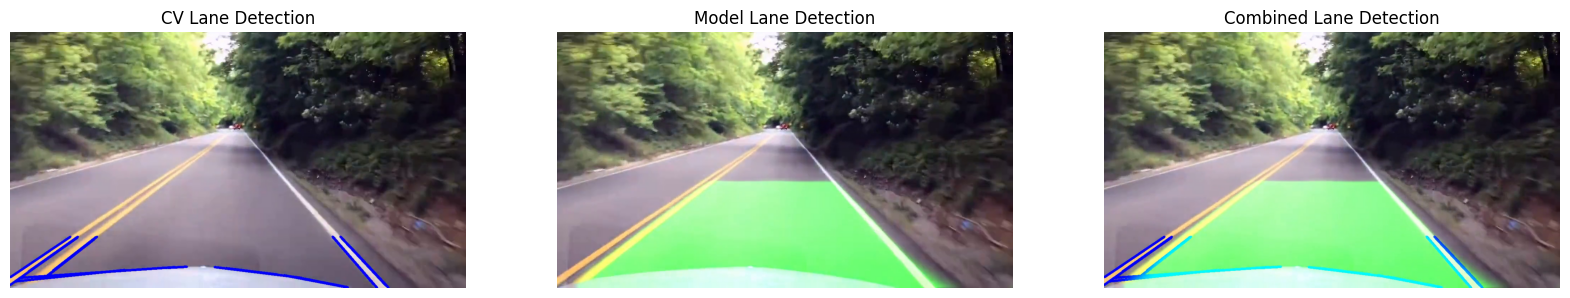

In [ ]:
import cv2
import matplotlib.pyplot as plt
from moviepy.editor import VideoFileClip

def extract_frame(video_path, time=10):
    """Extract a frame from a video at a specified time."""
    clip = VideoFileClip(video_path)
    frame = clip.get_frame(time)
    return frame

def display_images(images, titles):
    plt.figure(figsize=(20, 10))
    for i, (image, title) in enumerate(zip(images, titles)):
        plt.subplot(1, 3, i+1)
        plt.imshow(image)
        plt.title(title)
        plt.axis('off')
    plt.show()

if __name__ == "__main__":
    # Paths to the output videos
    cv_output = 'cv_lane_output.mp4'
    model_output = 'model_lane_output.mp4'
    combined_output = 'combined_lane_output.mp4'

    # Extract a frame at the 9-second mark from each video
    time_stamp = 25
    cv_frame = extract_frame(cv_output, time_stamp)
    model_frame = extract_frame(model_output, time_stamp)
    combined_frame = extract_frame(combined_output, time_stamp)

    # Display the images
    images = [cv_frame, model_frame, combined_frame]
    titles = ["CV Lane Detection", "Model Lane Detection", "Combined Lane Detection"]
    display_images(images, titles)


Comparison video

In [ ]:
import numpy as np
import cv2
from skimage.transform import resize
from moviepy.editor import VideoFileClip, clips_array
from keras.models import load_model

# Load Keras model
model = load_model('lanemodel.h5')

class Lanes():
    def __init__(self):
        self.recent_fit = []
        self.avg_fit = []

lanes = Lanes()

def road_lines(image):
    """ Takes in a road image, re-sizes for the model,
    predicts the lane to be drawn from the model in G color,
    recreates an RGB image of a lane and merges with the
    original road image.
    """
    image_shape = image.shape
    # Get image ready for feeding into model
    small_img = resize(image, (80, 160, 3), preserve_range=True)
    small_img = np.array(small_img)
    small_img = small_img[None, :, :, :]

    # Make prediction with neural network (un-normalize value by multiplying by 255)
    prediction = model.predict(small_img)[0] * 255
    # Add lane prediction to list for averaging
    lanes.recent_fit.append(prediction)

    # Only using last five for average
    if len(lanes.recent_fit) > 5:
        lanes.recent_fit = lanes.recent_fit[1:]

    # Calculate average detection
    lanes.avg_fit = np.mean(np.array([i for i in lanes.recent_fit]), axis=0)

    # Generate fake R & B color dimensions, stack with G
    blanks = np.zeros_like(lanes.avg_fit).astype(np.uint8)

    # for setting different color for the detection (Green color)
    lane_drawn = np.dstack((blanks, lanes.avg_fit, blanks))

    # Re-size to match the original image
    lane_image = resize(lane_drawn, image_shape, preserve_range=True).astype(np.uint8)

    return lane_image

def process_frame(frame):
    # Convert the frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian Blur to reduce noise and smoothen the image
    blur = cv2.GaussianBlur(gray, (5, 5), 0)

    # Use Canny Edge Detector to detect edges
    edges = cv2.Canny(blur, 50, 150)

    return edges

def region_of_interest(edges):
    height, width = edges.shape
    mask = np.zeros_like(edges)

    # Define a polygonal region of interest
    polygon = np.array([[
        (0, height * 0.8),
        (width, height * 0.8),
        (width, height),
        (0, height),
    ]], np.int32)

    cv2.fillPoly(mask, polygon, 255)

    # Mask the edges image to only keep the region of interest
    cropped_edges = cv2.bitwise_and(edges, mask)
    return cropped_edges

def detect_lines(cropped_edges):
    # Detect lines using HoughLinesP
    lines = cv2.HoughLinesP(cropped_edges,
                            rho=1,
                            theta=np.pi/180,
                            threshold=50,
                            lines=np.array([]),
                            minLineLength=50,
                            maxLineGap=150)
    return lines

def draw_lines(frame, lines):
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(frame, (x1, y1), (x2, y2), (0, 0, 255), 5)  # Red lines for CV detection
    return frame

def cv_lane_detection(image):
    # Process the image for traditional computer vision lane detection
    edges = process_frame(image)
    cropped_edges = region_of_interest(edges)
    lines = detect_lines(cropped_edges)
    image_with_lines = draw_lines(image.copy(), lines)  # Ensure original image is not modified
    return image_with_lines

def model_lane_detection(image):
    # Get the lane image from deep learning model
    lane_image = road_lines(image)
    # Combine the lane image with the original image
    result = cv2.addWeighted(image, 1, lane_image, 1, 0)
    return result

# Define input and output videos
input_video = "test_3.mp4"
cv_output_video = "cv_lane_output.mp4"
model_output_video = "model_lane_output.mp4"
comparison_output_video = "comparison_lane_detection.mp4"

# Process video with computer vision lane detection
clip1 = VideoFileClip(input_video)
cv_clip = clip1.fl_image(cv_lane_detection)
#cv_clip.write_videofile(cv_output_video, audio=False)

# Process video with model lane detection
clip2 = VideoFileClip(input_video)
model_clip = clip2.fl_image(model_lane_detection)
#model_clip.write_videofile(model_output_video, audio=False)

# Load processed videos
cv_clip = VideoFileClip(cv_output_video)
model_clip = VideoFileClip(model_output_video)

# Create side-by-side comparison video
comparison_clip = clips_array([[cv_clip, model_clip]])
comparison_clip.write_videofile(comparison_output_video, audio=False)


1/1 [==============================] - 0s 412ms/step
Moviepy - Building video comparison_lane_detection.mp4.
Moviepy - Writing video comparison_lane_detection.mp4



Moviepy - Done !
Moviepy - video ready comparison_lane_detection.mp4


Computer Vision Image Processing Results

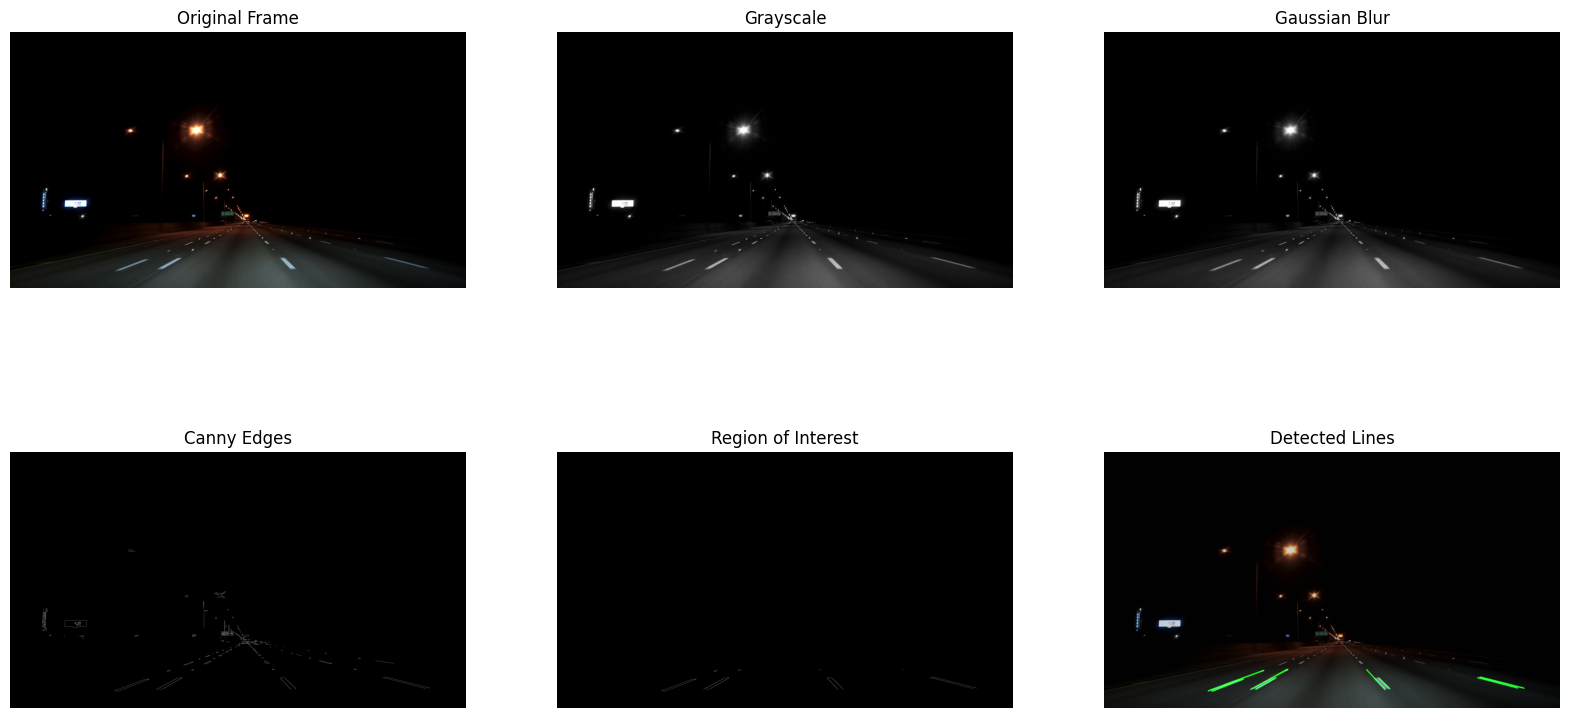

In [ ]:
import cv2
import numpy as np
from moviepy.editor import VideoFileClip
import matplotlib.pyplot as plt

def process_frame(frame):
    # Convert the frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    return gray

def apply_gaussian_blur(gray):
    # Apply Gaussian Blur to reduce noise and smoothen the image
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    return blur

def apply_canny(blur):
    # Use Canny Edge Detector to detect edges
    edges = cv2.Canny(blur, 50, 150)
    return edges

def region_of_interest(edges):
    height, width = edges.shape
    mask = np.zeros_like(edges)

    # Define a polygonal region of interest starting from 0.85 * height
    polygon = np.array([[
        (0, int(height * 0.85)),
        (width, int(height * 0.85)),
        (width, height),
        (0, height),
    ]], np.int32)

    cv2.fillPoly(mask, polygon, 255)

    # Mask the edges image to only keep the region of interest
    cropped_edges = cv2.bitwise_and(edges, mask)
    return cropped_edges

def detect_lines(cropped_edges):
    # Detect lines using HoughLinesP
    lines = cv2.HoughLinesP(cropped_edges,
                            rho=1,
                            theta=np.pi/180,
                            threshold=30,
                            lines=np.array([]),
                            minLineLength=50,
                            maxLineGap=200)
    return lines

def draw_lines(frame, lines):
    line_image = np.zeros_like(frame)

    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(line_image, (x1, y1), (x2, y2), (0, 255, 0), 10)

    # Combine the original frame with the line image
    frame_with_lines = cv2.addWeighted(frame, 0.8, line_image, 1, 1)
    return frame_with_lines

def display_images(images, titles, cmap=None):
    plt.figure(figsize=(20, 10))
    for i, (image, title) in enumerate(zip(images, titles)):
        plt.subplot(2, 3, i+1)
        plt.imshow(image, cmap=cmap if i != 0 else None)  # Use 'gray' cmap for grayscale images
        plt.title(title)
        plt.axis('off')
    plt.show()

if __name__ == "__main__":
    input_path = 'night_lane.mp4'

    # Load the video clip
    clip = VideoFileClip(input_path)

    # Randomly select a frame
    frame = clip.get_frame(10)  # Get the frame at 10 seconds

    # Process the frame through each stage
    gray = process_frame(frame)
    blur = apply_gaussian_blur(gray)
    edges = apply_canny(blur)
    cropped_edges = region_of_interest(edges)
    lines = detect_lines(cropped_edges)
    frame_with_lines = draw_lines(frame, lines)

    # Display the images
    images = [frame, gray, blur, edges, cropped_edges, frame_with_lines]
    titles = ["Original Frame", "Grayscale", "Gaussian Blur", "Canny Edges", "Region of Interest", "Detected Lines"]
    display_images(images, titles, cmap='gray')
